## This notebook aims to visualize and test the EONIA distribution produced by GAN

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import scipy.stats as stats


from dotenv.main import load_dotenv
load_dotenv(override=True)

import os

## Note to self -- We only test EONIA

In [2]:
def fetch_data_df():
    # Load the data
    df = pd.read_csv('../data/final_daily_returns_asset_classes.csv', index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index)
    start_test_date = os.getenv("START_TEST_DATE")
    
    if start_test_date is None:
        raise ValueError("Environment variable 'START_TEST_DATE' is not set.")

    start_test_date = pd.to_datetime(start_test_date)
    
    # Select only the third, sixth, and seventh columns

    # 2, 5, 6
    selected_columns = df.iloc[:, [6]]  # Remember: Python uses 0-based indexing

    pre_test_df = selected_columns[selected_columns.index < start_test_date]
    test_df = selected_columns[selected_columns.index >= start_test_date].iloc[:252]
    
    return pre_test_df, test_df

returns_df, test_returns_df = fetch_data_df()

In [3]:
asset_names = returns_df.columns

## Define a Measure of Success

What constetutes a good generated distribution for EONIA.

This is due to the fact that on Mondays you factor in the weekend.

<Axes: title={'center': 'EONIA Returns for 2006-05'}, xlabel='Date'>

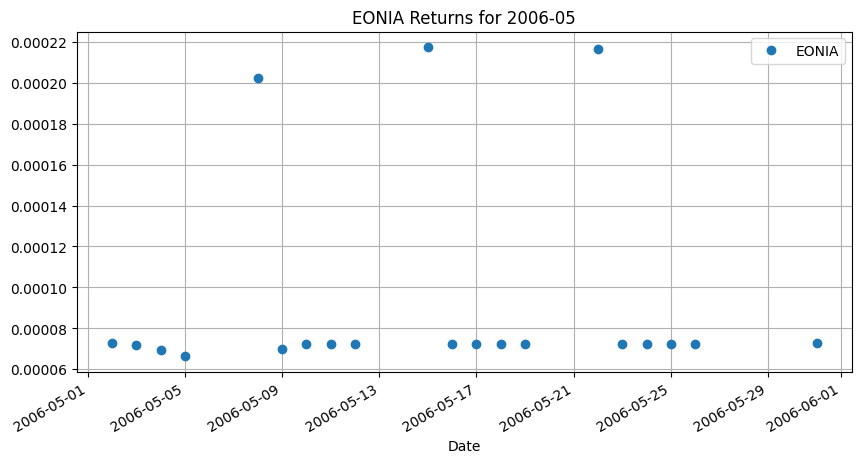

In [4]:
month = '2006-05'  # Change this to the desired year and month (YYYY-MM)
filtered_df = returns_df.loc[month]

# Plot
filtered_df.plot(y='EONIA', marker='o', linestyle='', figsize=(10, 5), grid=True, title=f"EONIA Returns for {month}")



<Axes: xlabel='Date'>

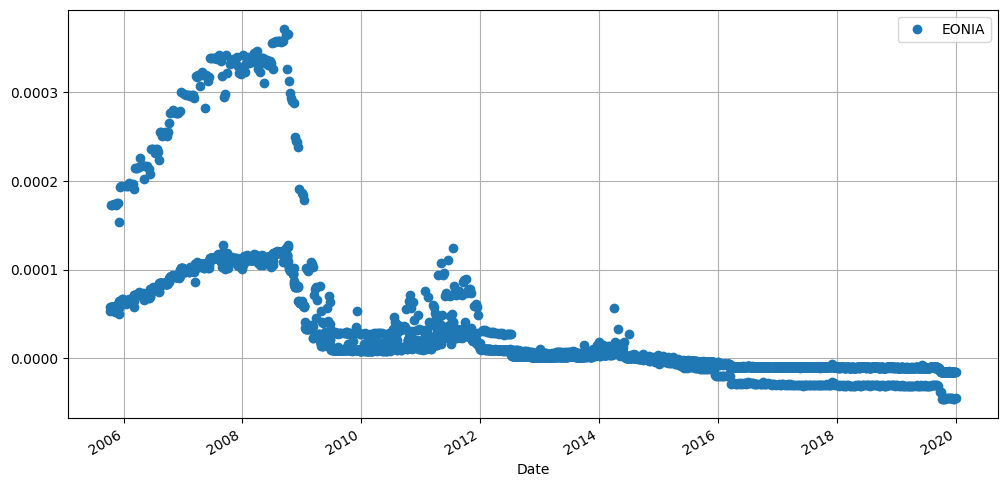

In [5]:
returns_df.plot(y='EONIA', marker='o', linestyle='', figsize=(12,6), grid=True)

In [6]:
from gan10 import GAN10


for asset_name in returns_df.columns:
    print(f"Training WGAN for {asset_name}...")
    asset_returns = returns_df[asset_name]
    
    # Create WGAN instance for the current asset
    gan = GAN10(asset_returns, asset_name)
    
    # Train WGAN for this asset
    gan.train()
    
    print(f"Finished training WGAN for {asset_name}.\n")


Training WGAN for EONIA...


C:\Users\nicka\compute-farm\machine_2\gan10.py:87: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  recency_loss = F.mse_loss(gen_returns.mean(dim=1), real_returns.mean(dim=1))  # Match recent mean trend


[Epoch 0/1000] [Batch 0/25] [D loss: -0.21885186433792114] [G loss: -0.05679625645279884] [Recency Loss: 1.2587391138076782]
[Epoch 0/1000] [Batch 10/25] [D loss: -0.2597373127937317] [G loss: 0.06925041973590851] [Recency Loss: 1.2576485872268677]


[Epoch 0/1000] [Batch 20/25] [D loss: -0.4910527467727661] [G loss: 0.11873277276754379] [Recency Loss: 1.2563927173614502]
[Epoch 1/1000] [Batch 0/25] [D loss: 0.035247474908828735] [G loss: -0.06960959732532501] [Recency Loss: 1.2548633813858032]


C:\Users\nicka\compute-farm\machine_2\gan10.py:87: UserWarning: Using a target size (torch.Size([115, 1])) that is different to the input size (torch.Size([115])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  recency_loss = F.mse_loss(gen_returns.mean(dim=1), real_returns.mean(dim=1))  # Match recent mean trend


[Epoch 1/1000] [Batch 10/25] [D loss: -0.17742332816123962] [G loss: 0.13213393092155457] [Recency Loss: 1.2529306411743164]
[Epoch 1/1000] [Batch 20/25] [D loss: -0.0510263666510582] [G loss: 0.11429497599601746] [Recency Loss: 1.2513129711151123]


[Epoch 2/1000] [Batch 0/25] [D loss: -0.08838242292404175] [G loss: 0.080799400806427] [Recency Loss: 1.2501299381256104]
[Epoch 2/1000] [Batch 10/25] [D loss: -0.1665561944246292] [G loss: 0.1440371572971344] [Recency Loss: 1.2494361400604248]


[Epoch 2/1000] [Batch 20/25] [D loss: 0.0976405069231987] [G loss: 0.4419960677623749] [Recency Loss: 1.24672269821167]
[Epoch 3/1000] [Batch 0/25] [D loss: -0.04170797020196915] [G loss: 0.06996408104896545] [Recency Loss: 1.2461345195770264]


[Epoch 3/1000] [Batch 10/25] [D loss: 0.18149641156196594] [G loss: 0.098955899477005] [Recency Loss: 1.2444167137145996]
[Epoch 3/1000] [Batch 20/25] [D loss: 0.12875288724899292] [G loss: 0.48228129744529724] [Recency Loss: 1.2434879541397095]


[Epoch 4/1000] [Batch 0/25] [D loss: -0.044742994010448456] [G loss: 0.15384143590927124] [Recency Loss: 1.2420873641967773]
[Epoch 4/1000] [Batch 10/25] [D loss: -0.3453029990196228] [G loss: 0.4891902804374695] [Recency Loss: 1.240195393562317]


[Epoch 4/1000] [Batch 20/25] [D loss: -0.0695500373840332] [G loss: 0.20183095335960388] [Recency Loss: 1.2393239736557007]
[Epoch 5/1000] [Batch 0/25] [D loss: 0.28064966201782227] [G loss: 0.30974656343460083] [Recency Loss: 1.2385706901550293]


[Epoch 5/1000] [Batch 10/25] [D loss: -0.5308467149734497] [G loss: 0.09689249098300934] [Recency Loss: 1.2369352579116821]
[Epoch 5/1000] [Batch 20/25] [D loss: 0.08390431106090546] [G loss: 0.2574986517429352] [Recency Loss: 1.2349261045455933]


[Epoch 6/1000] [Batch 0/25] [D loss: 0.08953431248664856] [G loss: 0.09038089960813522] [Recency Loss: 1.2326829433441162]
[Epoch 6/1000] [Batch 10/25] [D loss: -0.11394917964935303] [G loss: 0.2609383761882782] [Recency Loss: 1.2325083017349243]


[Epoch 6/1000] [Batch 20/25] [D loss: -0.0675971657037735] [G loss: 0.18972398340702057] [Recency Loss: 1.2310184240341187]
[Epoch 7/1000] [Batch 0/25] [D loss: -0.1238827109336853] [G loss: 0.3159164786338806] [Recency Loss: 1.2302850484848022]


[Epoch 7/1000] [Batch 10/25] [D loss: -0.15690243244171143] [G loss: 0.18682007491588593] [Recency Loss: 1.2287232875823975]
[Epoch 7/1000] [Batch 20/25] [D loss: 0.11380970478057861] [G loss: 0.17287644743919373] [Recency Loss: 1.2266473770141602]


[Epoch 8/1000] [Batch 0/25] [D loss: -0.02582913637161255] [G loss: 0.4744955897331238] [Recency Loss: 1.224764347076416]
[Epoch 8/1000] [Batch 10/25] [D loss: -0.29630225896835327] [G loss: 0.3133615255355835] [Recency Loss: 1.2240747213363647]


[Epoch 8/1000] [Batch 20/25] [D loss: 0.15548980236053467] [G loss: 0.6628668308258057] [Recency Loss: 1.2216238975524902]
[Epoch 9/1000] [Batch 0/25] [D loss: -0.50214022397995] [G loss: 0.4909902811050415] [Recency Loss: 1.2214100360870361]


[Epoch 9/1000] [Batch 10/25] [D loss: 0.09079140424728394] [G loss: 0.5781665444374084] [Recency Loss: 1.2200067043304443]
[Epoch 9/1000] [Batch 20/25] [D loss: -0.09969902038574219] [G loss: 0.591609001159668] [Recency Loss: 1.2189407348632812]


[Epoch 10/1000] [Batch 0/25] [D loss: -0.0808851420879364] [G loss: 0.8029590845108032] [Recency Loss: 1.217153787612915]
[Epoch 10/1000] [Batch 10/25] [D loss: 0.0394345223903656] [G loss: 0.6081787347793579] [Recency Loss: 1.2152928113937378]


[Epoch 10/1000] [Batch 20/25] [D loss: -0.14816659688949585] [G loss: 0.7305647730827332] [Recency Loss: 1.214714527130127]
[Epoch 11/1000] [Batch 0/25] [D loss: 0.022702395915985107] [G loss: 0.4048868715763092] [Recency Loss: 1.2136212587356567]


[Epoch 11/1000] [Batch 10/25] [D loss: -0.01592463254928589] [G loss: 0.46809858083724976] [Recency Loss: 1.2109460830688477]
[Epoch 11/1000] [Batch 20/25] [D loss: -0.3028055727481842] [G loss: 0.5165966749191284] [Recency Loss: 1.2104206085205078]


[Epoch 12/1000] [Batch 0/25] [D loss: -0.32518696784973145] [G loss: 0.32997211813926697] [Recency Loss: 1.2084457874298096]
[Epoch 12/1000] [Batch 10/25] [D loss: -0.13746380805969238] [G loss: 0.6260868310928345] [Recency Loss: 1.206733226776123]


[Epoch 12/1000] [Batch 20/25] [D loss: -0.3077462911605835] [G loss: 0.7139954566955566] [Recency Loss: 1.2056186199188232]
[Epoch 13/1000] [Batch 0/25] [D loss: -0.450916051864624] [G loss: 0.7100706100463867] [Recency Loss: 1.2043527364730835]


[Epoch 13/1000] [Batch 10/25] [D loss: 0.09558433294296265] [G loss: 0.8937535881996155] [Recency Loss: 1.2032946348190308]
[Epoch 13/1000] [Batch 20/25] [D loss: -0.2899641990661621] [G loss: 0.4921218752861023] [Recency Loss: 1.2011281251907349]


[Epoch 14/1000] [Batch 0/25] [D loss: 0.11809486150741577] [G loss: 0.6132756471633911] [Recency Loss: 1.200346827507019]
[Epoch 14/1000] [Batch 10/25] [D loss: 0.18330788612365723] [G loss: 0.943227231502533] [Recency Loss: 1.1992132663726807]


[Epoch 14/1000] [Batch 20/25] [D loss: -0.10959386825561523] [G loss: 0.8408594727516174] [Recency Loss: 1.198460340499878]
[Epoch 15/1000] [Batch 0/25] [D loss: -0.2625361680984497] [G loss: 0.6851959824562073] [Recency Loss: 1.197333812713623]


[Epoch 15/1000] [Batch 10/25] [D loss: -0.26019221544265747] [G loss: 0.7076662182807922] [Recency Loss: 1.1948779821395874]
[Epoch 15/1000] [Batch 20/25] [D loss: -0.35653650760650635] [G loss: 1.0563595294952393] [Recency Loss: 1.1934934854507446]


[Epoch 16/1000] [Batch 0/25] [D loss: 0.03416180610656738] [G loss: 0.6449047327041626] [Recency Loss: 1.1919718980789185]
[Epoch 16/1000] [Batch 10/25] [D loss: -0.04716825485229492] [G loss: 0.95611572265625] [Recency Loss: 1.191954493522644]


[Epoch 16/1000] [Batch 20/25] [D loss: -0.16437560319900513] [G loss: 0.9454647898674011] [Recency Loss: 1.1894129514694214]
[Epoch 17/1000] [Batch 0/25] [D loss: -0.2138010859489441] [G loss: 0.7967169284820557] [Recency Loss: 1.1878942251205444]


[Epoch 17/1000] [Batch 10/25] [D loss: -0.21447265148162842] [G loss: 0.7804335355758667] [Recency Loss: 1.1868919134140015]
[Epoch 17/1000] [Batch 20/25] [D loss: -0.34138405323028564] [G loss: 1.1396068334579468] [Recency Loss: 1.1856647729873657]


[Epoch 18/1000] [Batch 0/25] [D loss: -0.3362569808959961] [G loss: 1.2322062253952026] [Recency Loss: 1.1844288110733032]
[Epoch 18/1000] [Batch 10/25] [D loss: -0.41922974586486816] [G loss: 0.9962217211723328] [Recency Loss: 1.1829646825790405]


[Epoch 18/1000] [Batch 20/25] [D loss: 0.14136451482772827] [G loss: 1.1526432037353516] [Recency Loss: 1.18253493309021]
[Epoch 19/1000] [Batch 0/25] [D loss: -0.016973018646240234] [G loss: 1.0565439462661743] [Recency Loss: 1.179473638534546]


[Epoch 19/1000] [Batch 10/25] [D loss: -0.3279428482055664] [G loss: 0.9524598121643066] [Recency Loss: 1.1794939041137695]
[Epoch 19/1000] [Batch 20/25] [D loss: -0.4283209443092346] [G loss: 1.1959065198898315] [Recency Loss: 1.1776313781738281]


[Epoch 20/1000] [Batch 0/25] [D loss: -0.5343520045280457] [G loss: 1.513337254524231] [Recency Loss: 1.1765203475952148]
[Epoch 20/1000] [Batch 10/25] [D loss: -0.2733280062675476] [G loss: 1.2674527168273926] [Recency Loss: 1.1745249032974243]


[Epoch 20/1000] [Batch 20/25] [D loss: -0.1644958257675171] [G loss: 1.1753369569778442] [Recency Loss: 1.172912836074829]
[Epoch 21/1000] [Batch 0/25] [D loss: -0.2726861238479614] [G loss: 1.3268805742263794] [Recency Loss: 1.1728020906448364]


[Epoch 21/1000] [Batch 10/25] [D loss: -0.43692612648010254] [G loss: 1.4335565567016602] [Recency Loss: 1.1701741218566895]
[Epoch 21/1000] [Batch 20/25] [D loss: -0.18645739555358887] [G loss: 1.1204949617385864] [Recency Loss: 1.1695479154586792]


[Epoch 22/1000] [Batch 0/25] [D loss: 0.07282841205596924] [G loss: 1.4547679424285889] [Recency Loss: 1.1670970916748047]
[Epoch 22/1000] [Batch 10/25] [D loss: -0.14049756526947021] [G loss: 1.6423691511154175] [Recency Loss: 1.1664142608642578]


[Epoch 22/1000] [Batch 20/25] [D loss: -0.42545413970947266] [G loss: 1.6119048595428467] [Recency Loss: 1.165589690208435]
[Epoch 23/1000] [Batch 0/25] [D loss: -0.18817448616027832] [G loss: 1.833364725112915] [Recency Loss: 1.1629825830459595]


[Epoch 23/1000] [Batch 10/25] [D loss: -0.5254852771759033] [G loss: 1.610589861869812] [Recency Loss: 1.1627869606018066]
[Epoch 23/1000] [Batch 20/25] [D loss: -0.6492552757263184] [G loss: 1.765091061592102] [Recency Loss: 1.1609498262405396]


[Epoch 24/1000] [Batch 0/25] [D loss: -0.20672059059143066] [G loss: 1.5705903768539429] [Recency Loss: 1.15936279296875]
[Epoch 24/1000] [Batch 10/25] [D loss: -0.1860949993133545] [G loss: 1.8682096004486084] [Recency Loss: 1.157860279083252]


[Epoch 24/1000] [Batch 20/25] [D loss: -0.8178919553756714] [G loss: 1.9286020994186401] [Recency Loss: 1.1573963165283203]
[Epoch 25/1000] [Batch 0/25] [D loss: -0.13366055488586426] [G loss: 2.026531457901001] [Recency Loss: 1.1559209823608398]


[Epoch 25/1000] [Batch 10/25] [D loss: -0.5140143632888794] [G loss: 1.8357752561569214] [Recency Loss: 1.1551969051361084]
[Epoch 25/1000] [Batch 20/25] [D loss: -0.4445219039916992] [G loss: 1.6282097101211548] [Recency Loss: 1.152632713317871]


[Epoch 26/1000] [Batch 0/25] [D loss: -0.4088430404663086] [G loss: 1.538744568824768] [Recency Loss: 1.1519166231155396]
[Epoch 26/1000] [Batch 10/25] [D loss: -0.7200170755386353] [G loss: 2.0805816650390625] [Recency Loss: 1.1513500213623047]


[Epoch 26/1000] [Batch 20/25] [D loss: -0.713630199432373] [G loss: 2.369770050048828] [Recency Loss: 1.149918556213379]
[Epoch 27/1000] [Batch 0/25] [D loss: -0.8294157981872559] [G loss: 2.28350567817688] [Recency Loss: 1.1480295658111572]


[Epoch 27/1000] [Batch 10/25] [D loss: -0.823373556137085] [G loss: 2.4015135765075684] [Recency Loss: 1.1474436521530151]
[Epoch 27/1000] [Batch 20/25] [D loss: -0.44333362579345703] [G loss: 2.173396587371826] [Recency Loss: 1.1453747749328613]


[Epoch 28/1000] [Batch 0/25] [D loss: -0.6471683979034424] [G loss: 2.3020687103271484] [Recency Loss: 1.1437726020812988]
[Epoch 28/1000] [Batch 10/25] [D loss: -0.9922921657562256] [G loss: 2.8375821113586426] [Recency Loss: 1.1435370445251465]


[Epoch 28/1000] [Batch 20/25] [D loss: -0.5272358655929565] [G loss: 2.182959794998169] [Recency Loss: 1.1418522596359253]
[Epoch 29/1000] [Batch 0/25] [D loss: -0.6452431678771973] [G loss: 2.465965747833252] [Recency Loss: 1.1403064727783203]


[Epoch 29/1000] [Batch 10/25] [D loss: -1.1140480041503906] [G loss: 2.5535802841186523] [Recency Loss: 1.1388580799102783]
[Epoch 29/1000] [Batch 20/25] [D loss: -0.6859657764434814] [G loss: 2.8075544834136963] [Recency Loss: 1.1379847526550293]


[Epoch 30/1000] [Batch 0/25] [D loss: -1.0126209259033203] [G loss: 3.001690626144409] [Recency Loss: 1.1364061832427979]
[Epoch 30/1000] [Batch 10/25] [D loss: -1.0427498817443848] [G loss: 3.11258602142334] [Recency Loss: 1.1344904899597168]


[Epoch 30/1000] [Batch 20/25] [D loss: -1.0568552017211914] [G loss: 3.3445422649383545] [Recency Loss: 1.1335889101028442]
[Epoch 31/1000] [Batch 0/25] [D loss: -0.7443275451660156] [G loss: 2.9108476638793945] [Recency Loss: 1.1325726509094238]


[Epoch 31/1000] [Batch 10/25] [D loss: -0.5050523281097412] [G loss: 2.9893150329589844] [Recency Loss: 1.1308802366256714]
[Epoch 31/1000] [Batch 20/25] [D loss: -1.1331901550292969] [G loss: 3.1637208461761475] [Recency Loss: 1.1301708221435547]


[Epoch 32/1000] [Batch 0/25] [D loss: -1.0052804946899414] [G loss: 3.474081039428711] [Recency Loss: 1.128300428390503]
[Epoch 32/1000] [Batch 10/25] [D loss: -0.8097078800201416] [G loss: 3.219947338104248] [Recency Loss: 1.127524495124817]


[Epoch 32/1000] [Batch 20/25] [D loss: -1.315509557723999] [G loss: 3.6527884006500244] [Recency Loss: 1.125978946685791]
[Epoch 33/1000] [Batch 0/25] [D loss: -0.8590941429138184] [G loss: 3.5977978706359863] [Recency Loss: 1.124704122543335]


[Epoch 33/1000] [Batch 10/25] [D loss: -1.4857139587402344] [G loss: 4.033830642700195] [Recency Loss: 1.1237010955810547]
[Epoch 33/1000] [Batch 20/25] [D loss: -1.2368619441986084] [G loss: 3.907928228378296] [Recency Loss: 1.1220840215682983]


[Epoch 34/1000] [Batch 0/25] [D loss: -1.8456037044525146] [G loss: 4.331596851348877] [Recency Loss: 1.1204824447631836]
[Epoch 34/1000] [Batch 10/25] [D loss: -0.879892110824585] [G loss: 4.2622833251953125] [Recency Loss: 1.119106650352478]


[Epoch 34/1000] [Batch 20/25] [D loss: -2.072385787963867] [G loss: 4.6609601974487305] [Recency Loss: 1.1181896924972534]
[Epoch 35/1000] [Batch 0/25] [D loss: -1.3294239044189453] [G loss: 4.20054292678833] [Recency Loss: 1.1169133186340332]


[Epoch 35/1000] [Batch 10/25] [D loss: -1.4263577461242676] [G loss: 4.319163799285889] [Recency Loss: 1.1156084537506104]
[Epoch 35/1000] [Batch 20/25] [D loss: -1.6156210899353027] [G loss: 4.642605304718018] [Recency Loss: 1.1140319108963013]


[Epoch 36/1000] [Batch 0/25] [D loss: -2.2143714427948] [G loss: 5.1460394859313965] [Recency Loss: 1.1126396656036377]
[Epoch 36/1000] [Batch 10/25] [D loss: -2.300757884979248] [G loss: 5.099677085876465] [Recency Loss: 1.1119229793548584]


[Epoch 36/1000] [Batch 20/25] [D loss: -2.5181922912597656] [G loss: 4.880978584289551] [Recency Loss: 1.1108728647232056]
[Epoch 37/1000] [Batch 0/25] [D loss: -2.5209801197052] [G loss: 5.520484924316406] [Recency Loss: 1.1089733839035034]


[Epoch 37/1000] [Batch 10/25] [D loss: -1.4491808414459229] [G loss: 5.183239459991455] [Recency Loss: 1.108182430267334]
[Epoch 37/1000] [Batch 20/25] [D loss: -1.1927881240844727] [G loss: 5.278083324432373] [Recency Loss: 1.1069560050964355]


[Epoch 38/1000] [Batch 0/25] [D loss: -1.936166763305664] [G loss: 5.4653425216674805] [Recency Loss: 1.1051595211029053]
[Epoch 38/1000] [Batch 10/25] [D loss: -2.6422982215881348] [G loss: 5.702890872955322] [Recency Loss: 1.1036429405212402]


[Epoch 38/1000] [Batch 20/25] [D loss: -3.1814537048339844] [G loss: 5.372365951538086] [Recency Loss: 1.103025197982788]
[Epoch 39/1000] [Batch 0/25] [D loss: -2.4511497020721436] [G loss: 6.194423198699951] [Recency Loss: 1.1010808944702148]


[Epoch 39/1000] [Batch 10/25] [D loss: -2.3520636558532715] [G loss: 6.527463912963867] [Recency Loss: 1.1000345945358276]
[Epoch 39/1000] [Batch 20/25] [D loss: -2.3738152980804443] [G loss: 6.556728363037109] [Recency Loss: 1.0989000797271729]


[Epoch 40/1000] [Batch 0/25] [D loss: -3.2809557914733887] [G loss: 6.5154500007629395] [Recency Loss: 1.0971959829330444]
[Epoch 40/1000] [Batch 10/25] [D loss: -3.1926350593566895] [G loss: 6.657275199890137] [Recency Loss: 1.0968800783157349]


[Epoch 40/1000] [Batch 20/25] [D loss: -2.762409210205078] [G loss: 6.421471118927002] [Recency Loss: 1.095928430557251]
[Epoch 41/1000] [Batch 0/25] [D loss: -3.0828824043273926] [G loss: 6.599486351013184] [Recency Loss: 1.0942833423614502]


[Epoch 41/1000] [Batch 10/25] [D loss: -3.4283528327941895] [G loss: 8.077974319458008] [Recency Loss: 1.0917857885360718]
[Epoch 41/1000] [Batch 20/25] [D loss: -3.829637050628662] [G loss: 7.011873245239258] [Recency Loss: 1.0915334224700928]


[Epoch 42/1000] [Batch 0/25] [D loss: -3.3492445945739746] [G loss: 7.054776191711426] [Recency Loss: 1.0901029109954834]
[Epoch 42/1000] [Batch 10/25] [D loss: -4.957087516784668] [G loss: 7.7637152671813965] [Recency Loss: 1.0890841484069824]


[Epoch 42/1000] [Batch 20/25] [D loss: -3.8675246238708496] [G loss: 7.8935136795043945] [Recency Loss: 1.087794542312622]
[Epoch 43/1000] [Batch 0/25] [D loss: -3.3427000045776367] [G loss: 8.46112060546875] [Recency Loss: 1.0867440700531006]


[Epoch 43/1000] [Batch 10/25] [D loss: -4.203927993774414] [G loss: 8.900461196899414] [Recency Loss: 1.085081934928894]
[Epoch 43/1000] [Batch 20/25] [D loss: -4.346139430999756] [G loss: 9.022089004516602] [Recency Loss: 1.083640694618225]


[Epoch 44/1000] [Batch 0/25] [D loss: -4.507844924926758] [G loss: 8.906246185302734] [Recency Loss: 1.0827357769012451]
[Epoch 44/1000] [Batch 10/25] [D loss: -5.519038200378418] [G loss: 9.693205833435059] [Recency Loss: 1.0816456079483032]


[Epoch 44/1000] [Batch 20/25] [D loss: -4.561971187591553] [G loss: 9.702921867370605] [Recency Loss: 1.0802650451660156]
[Epoch 45/1000] [Batch 0/25] [D loss: -4.574701309204102] [G loss: 10.275321960449219] [Recency Loss: 1.0782045125961304]


[Epoch 45/1000] [Batch 10/25] [D loss: -4.515919208526611] [G loss: 10.212772369384766] [Recency Loss: 1.077749490737915]
[Epoch 45/1000] [Batch 20/25] [D loss: -5.960034370422363] [G loss: 11.635993957519531] [Recency Loss: 1.076263189315796]


[Epoch 46/1000] [Batch 0/25] [D loss: -5.1632585525512695] [G loss: 10.890359878540039] [Recency Loss: 1.0749249458312988]
[Epoch 46/1000] [Batch 10/25] [D loss: -6.031464099884033] [G loss: 11.651814460754395] [Recency Loss: 1.0736393928527832]


[Epoch 46/1000] [Batch 20/25] [D loss: -6.166909217834473] [G loss: 11.768274307250977] [Recency Loss: 1.072479009628296]
[Epoch 47/1000] [Batch 0/25] [D loss: -7.158458709716797] [G loss: 11.292027473449707] [Recency Loss: 1.0711294412612915]


[Epoch 47/1000] [Batch 10/25] [D loss: -6.198843479156494] [G loss: 12.1154203414917] [Recency Loss: 1.0696659088134766]
[Epoch 47/1000] [Batch 20/25] [D loss: -6.156276702880859] [G loss: 12.898508071899414] [Recency Loss: 1.068544626235962]


[Epoch 48/1000] [Batch 0/25] [D loss: -6.533204555511475] [G loss: 12.13698959350586] [Recency Loss: 1.067602515220642]
[Epoch 48/1000] [Batch 10/25] [D loss: -6.3452558517456055] [G loss: 12.498820304870605] [Recency Loss: 1.0663442611694336]


[Epoch 48/1000] [Batch 20/25] [D loss: -6.780614852905273] [G loss: 14.396172523498535] [Recency Loss: 1.065313696861267]
[Epoch 49/1000] [Batch 0/25] [D loss: -6.5766730308532715] [G loss: 14.830610275268555] [Recency Loss: 1.0631800889968872]


[Epoch 49/1000] [Batch 10/25] [D loss: -8.691366195678711] [G loss: 14.443055152893066] [Recency Loss: 1.0617502927780151]
[Epoch 49/1000] [Batch 20/25] [D loss: -8.046445846557617] [G loss: 15.710671424865723] [Recency Loss: 1.0608181953430176]


[Epoch 50/1000] [Batch 0/25] [D loss: -7.479659080505371] [G loss: 15.222293853759766] [Recency Loss: 1.0589699745178223]
[Epoch 50/1000] [Batch 10/25] [D loss: -8.507139205932617] [G loss: 16.328502655029297] [Recency Loss: 1.0587109327316284]


[Epoch 50/1000] [Batch 20/25] [D loss: -9.346813201904297] [G loss: 15.863446235656738] [Recency Loss: 1.057667851448059]
[Epoch 51/1000] [Batch 0/25] [D loss: -10.603246688842773] [G loss: 15.658063888549805] [Recency Loss: 1.055986762046814]


[Epoch 51/1000] [Batch 10/25] [D loss: -10.614921569824219] [G loss: 15.77001953125] [Recency Loss: 1.0562158823013306]
[Epoch 51/1000] [Batch 20/25] [D loss: -9.074981689453125] [G loss: 16.882183074951172] [Recency Loss: 1.053263545036316]


[Epoch 52/1000] [Batch 0/25] [D loss: -7.4391984939575195] [G loss: 18.318946838378906] [Recency Loss: 1.052422285079956]
[Epoch 52/1000] [Batch 10/25] [D loss: -10.59192180633545] [G loss: 18.767221450805664] [Recency Loss: 1.051292896270752]


[Epoch 52/1000] [Batch 20/25] [D loss: -10.503206253051758] [G loss: 17.89440155029297] [Recency Loss: 1.0510175228118896]
[Epoch 53/1000] [Batch 0/25] [D loss: -11.37787914276123] [G loss: 19.95330047607422] [Recency Loss: 1.0493829250335693]


[Epoch 53/1000] [Batch 10/25] [D loss: -10.972640991210938] [G loss: 20.16299057006836] [Recency Loss: 1.0483312606811523]
[Epoch 53/1000] [Batch 20/25] [D loss: -8.825918197631836] [G loss: 21.792016983032227] [Recency Loss: 1.0465894937515259]


[Epoch 54/1000] [Batch 0/25] [D loss: -10.831327438354492] [G loss: 21.58929443359375] [Recency Loss: 1.0459574460983276]
[Epoch 54/1000] [Batch 10/25] [D loss: -9.75490665435791] [G loss: 21.50140953063965] [Recency Loss: 1.044599175453186]


[Epoch 54/1000] [Batch 20/25] [D loss: -8.574021339416504] [G loss: 21.708404541015625] [Recency Loss: 1.043954849243164]
[Epoch 55/1000] [Batch 0/25] [D loss: -11.66427230834961] [G loss: 22.095766067504883] [Recency Loss: 1.0421453714370728]


[Epoch 55/1000] [Batch 10/25] [D loss: -13.265022277832031] [G loss: 23.38204574584961] [Recency Loss: 1.0401105880737305]
[Epoch 55/1000] [Batch 20/25] [D loss: -13.372858047485352] [G loss: 22.255815505981445] [Recency Loss: 1.0389988422393799]


[Epoch 56/1000] [Batch 0/25] [D loss: -11.866552352905273] [G loss: 24.014060974121094] [Recency Loss: 1.0383375883102417]
[Epoch 56/1000] [Batch 10/25] [D loss: -13.591316223144531] [G loss: 26.09213638305664] [Recency Loss: 1.0380687713623047]


[Epoch 56/1000] [Batch 20/25] [D loss: -15.188077926635742] [G loss: 25.56533432006836] [Recency Loss: 1.0358790159225464]
[Epoch 57/1000] [Batch 0/25] [D loss: -13.768823623657227] [G loss: 25.019481658935547] [Recency Loss: 1.0352602005004883]


[Epoch 57/1000] [Batch 10/25] [D loss: -14.942678451538086] [G loss: 27.531232833862305] [Recency Loss: 1.033728003501892]
[Epoch 57/1000] [Batch 20/25] [D loss: -15.221210479736328] [G loss: 26.46996307373047] [Recency Loss: 1.033179521560669]


[Epoch 58/1000] [Batch 0/25] [D loss: -13.291435241699219] [G loss: 27.718215942382812] [Recency Loss: 1.0304834842681885]
[Epoch 58/1000] [Batch 10/25] [D loss: -19.203943252563477] [G loss: 28.961894989013672] [Recency Loss: 1.0304687023162842]


[Epoch 58/1000] [Batch 20/25] [D loss: -15.126741409301758] [G loss: 30.477088928222656] [Recency Loss: 1.0297414064407349]
[Epoch 59/1000] [Batch 0/25] [D loss: -15.73962116241455] [G loss: 30.5539493560791] [Recency Loss: 1.0279282331466675]


[Epoch 59/1000] [Batch 10/25] [D loss: -17.29898452758789] [G loss: 30.325210571289062] [Recency Loss: 1.0268747806549072]
[Epoch 59/1000] [Batch 20/25] [D loss: -15.788793563842773] [G loss: 30.004098892211914] [Recency Loss: 1.0254367589950562]


[Epoch 60/1000] [Batch 0/25] [D loss: -19.681854248046875] [G loss: 31.71851348876953] [Recency Loss: 1.0243991613388062]
[Epoch 60/1000] [Batch 10/25] [D loss: -16.7789306640625] [G loss: 32.597320556640625] [Recency Loss: 1.0230587720870972]


[Epoch 60/1000] [Batch 20/25] [D loss: -14.756664276123047] [G loss: 33.8529052734375] [Recency Loss: 1.0217481851577759]
[Epoch 61/1000] [Batch 0/25] [D loss: -13.946327209472656] [G loss: 33.9432373046875] [Recency Loss: 1.0201939344406128]


[Epoch 61/1000] [Batch 10/25] [D loss: -20.177560806274414] [G loss: 31.77280616760254] [Recency Loss: 1.0207875967025757]
[Epoch 61/1000] [Batch 20/25] [D loss: -19.81273078918457] [G loss: 37.62073516845703] [Recency Loss: 1.0175052881240845]


[Epoch 62/1000] [Batch 0/25] [D loss: -18.327407836914062] [G loss: 37.090492248535156] [Recency Loss: 1.0171973705291748]
[Epoch 62/1000] [Batch 10/25] [D loss: -22.30525779724121] [G loss: 34.187313079833984] [Recency Loss: 1.0159636735916138]


[Epoch 62/1000] [Batch 20/25] [D loss: -24.01815414428711] [G loss: 38.35805892944336] [Recency Loss: 1.0152645111083984]
[Epoch 63/1000] [Batch 0/25] [D loss: -25.816200256347656] [G loss: 37.90412139892578] [Recency Loss: 1.0132267475128174]


[Epoch 63/1000] [Batch 10/25] [D loss: -23.85877799987793] [G loss: 40.317047119140625] [Recency Loss: 1.0115972757339478]
[Epoch 63/1000] [Batch 20/25] [D loss: -21.08341407775879] [G loss: 41.020999908447266] [Recency Loss: 1.011191725730896]


[Epoch 64/1000] [Batch 0/25] [D loss: -23.561086654663086] [G loss: 40.8233642578125] [Recency Loss: 1.0096218585968018]
[Epoch 64/1000] [Batch 10/25] [D loss: -28.78079605102539] [G loss: 43.27100372314453] [Recency Loss: 1.0081437826156616]


[Epoch 64/1000] [Batch 20/25] [D loss: -24.21210289001465] [G loss: 43.921775817871094] [Recency Loss: 1.0079500675201416]
[Epoch 65/1000] [Batch 0/25] [D loss: -27.07541847229004] [G loss: 43.79175567626953] [Recency Loss: 1.0065158605575562]


[Epoch 65/1000] [Batch 10/25] [D loss: -28.965307235717773] [G loss: 47.42850875854492] [Recency Loss: 1.0050512552261353]
[Epoch 65/1000] [Batch 20/25] [D loss: -23.9420166015625] [G loss: 48.811729431152344] [Recency Loss: 1.003456711769104]


[Epoch 66/1000] [Batch 0/25] [D loss: -27.685081481933594] [G loss: 45.054561614990234] [Recency Loss: 1.002683162689209]
[Epoch 66/1000] [Batch 10/25] [D loss: -26.552547454833984] [G loss: 45.485660552978516] [Recency Loss: 1.001961350440979]


[Epoch 66/1000] [Batch 20/25] [D loss: -26.826189041137695] [G loss: 49.366275787353516] [Recency Loss: 1.0010221004486084]
[Epoch 67/1000] [Batch 0/25] [D loss: -25.10826301574707] [G loss: 52.43315505981445] [Recency Loss: 0.9989425539970398]


[Epoch 67/1000] [Batch 10/25] [D loss: -30.811546325683594] [G loss: 51.868438720703125] [Recency Loss: 0.9981542229652405]
[Epoch 67/1000] [Batch 20/25] [D loss: -31.744020462036133] [G loss: 49.65630340576172] [Recency Loss: 0.9970583319664001]


[Epoch 68/1000] [Batch 0/25] [D loss: -30.113872528076172] [G loss: 53.87253952026367] [Recency Loss: 0.9956966042518616]
[Epoch 68/1000] [Batch 10/25] [D loss: -34.808128356933594] [G loss: 54.70378494262695] [Recency Loss: 0.9948409795761108]


[Epoch 68/1000] [Batch 20/25] [D loss: -32.50428771972656] [G loss: 54.58134078979492] [Recency Loss: 0.9933825135231018]
[Epoch 69/1000] [Batch 0/25] [D loss: -36.63738250732422] [G loss: 53.836647033691406] [Recency Loss: 0.9924971461296082]


[Epoch 69/1000] [Batch 10/25] [D loss: -33.338172912597656] [G loss: 61.18027877807617] [Recency Loss: 0.9907980561256409]
[Epoch 69/1000] [Batch 20/25] [D loss: -33.08033752441406] [G loss: 60.073219299316406] [Recency Loss: 0.9900505542755127]


[Epoch 70/1000] [Batch 0/25] [D loss: -37.248802185058594] [G loss: 57.225425720214844] [Recency Loss: 0.9884459376335144]
[Epoch 70/1000] [Batch 10/25] [D loss: -29.30428695678711] [G loss: 63.7470817565918] [Recency Loss: 0.9865267276763916]


[Epoch 70/1000] [Batch 20/25] [D loss: -42.5994873046875] [G loss: 59.841529846191406] [Recency Loss: 0.9866922497749329]
[Epoch 71/1000] [Batch 0/25] [D loss: -35.00942611694336] [G loss: 58.30638885498047] [Recency Loss: 0.9857462644577026]


[Epoch 71/1000] [Batch 10/25] [D loss: -32.36315155029297] [G loss: 64.63121032714844] [Recency Loss: 0.9840655326843262]
[Epoch 71/1000] [Batch 20/25] [D loss: -45.97502136230469] [G loss: 63.87899398803711] [Recency Loss: 0.9825206398963928]


[Epoch 72/1000] [Batch 0/25] [D loss: -37.616615295410156] [G loss: 66.5750503540039] [Recency Loss: 0.9826340675354004]
[Epoch 72/1000] [Batch 10/25] [D loss: -45.16669464111328] [G loss: 66.67745971679688] [Recency Loss: 0.980925977230072]


[Epoch 72/1000] [Batch 20/25] [D loss: -46.38788604736328] [G loss: 67.7408447265625] [Recency Loss: 0.9797393083572388]
[Epoch 73/1000] [Batch 0/25] [D loss: -39.58415985107422] [G loss: 64.71183776855469] [Recency Loss: 0.9789942502975464]


[Epoch 73/1000] [Batch 10/25] [D loss: -44.81947708129883] [G loss: 73.94880676269531] [Recency Loss: 0.9776672124862671]
[Epoch 73/1000] [Batch 20/25] [D loss: -47.00621032714844] [G loss: 70.61759185791016] [Recency Loss: 0.9760873913764954]


[Epoch 74/1000] [Batch 0/25] [D loss: -44.95064926147461] [G loss: 71.96588134765625] [Recency Loss: 0.975007176399231]
[Epoch 74/1000] [Batch 10/25] [D loss: -43.12942886352539] [G loss: 69.9264144897461] [Recency Loss: 0.973713219165802]


[Epoch 74/1000] [Batch 20/25] [D loss: -47.721923828125] [G loss: 78.3668441772461] [Recency Loss: 0.971949577331543]
[Epoch 75/1000] [Batch 0/25] [D loss: -48.239044189453125] [G loss: 72.22317504882812] [Recency Loss: 0.9717963337898254]


[Epoch 75/1000] [Batch 10/25] [D loss: -51.03388977050781] [G loss: 77.92501068115234] [Recency Loss: 0.9709363579750061]
[Epoch 75/1000] [Batch 20/25] [D loss: -52.85057067871094] [G loss: 78.04510498046875] [Recency Loss: 0.9689610004425049]


[Epoch 76/1000] [Batch 0/25] [D loss: -51.75023651123047] [G loss: 81.47883605957031] [Recency Loss: 0.9671069383621216]
[Epoch 76/1000] [Batch 10/25] [D loss: -43.59285354614258] [G loss: 83.13397216796875] [Recency Loss: 0.9668563604354858]


[Epoch 76/1000] [Batch 20/25] [D loss: -58.83956527709961] [G loss: 80.07041931152344] [Recency Loss: 0.9647474884986877]
[Epoch 77/1000] [Batch 0/25] [D loss: -48.61264419555664] [G loss: 76.24710845947266] [Recency Loss: 0.9639761447906494]


[Epoch 77/1000] [Batch 10/25] [D loss: -48.49116516113281] [G loss: 86.90055084228516] [Recency Loss: 0.9623364806175232]
[Epoch 77/1000] [Batch 20/25] [D loss: -47.233612060546875] [G loss: 83.11781311035156] [Recency Loss: 0.9611525535583496]


[Epoch 78/1000] [Batch 0/25] [D loss: -49.5011100769043] [G loss: 84.9448471069336] [Recency Loss: 0.9613825082778931]
[Epoch 78/1000] [Batch 10/25] [D loss: -62.12250900268555] [G loss: 85.93940734863281] [Recency Loss: 0.9592516422271729]


[Epoch 78/1000] [Batch 20/25] [D loss: -60.62367248535156] [G loss: 89.70690155029297] [Recency Loss: 0.9580602645874023]
[Epoch 79/1000] [Batch 0/25] [D loss: -62.514869689941406] [G loss: 90.45891571044922] [Recency Loss: 0.9562911987304688]


[Epoch 79/1000] [Batch 10/25] [D loss: -59.56254577636719] [G loss: 94.06784057617188] [Recency Loss: 0.9559170603752136]
[Epoch 79/1000] [Batch 20/25] [D loss: -54.80387496948242] [G loss: 93.41798400878906] [Recency Loss: 0.9540990591049194]


[Epoch 80/1000] [Batch 0/25] [D loss: -57.92037582397461] [G loss: 102.73222351074219] [Recency Loss: 0.9530094265937805]
[Epoch 80/1000] [Batch 10/25] [D loss: -56.06386947631836] [G loss: 101.66641235351562] [Recency Loss: 0.9506947994232178]


[Epoch 80/1000] [Batch 20/25] [D loss: -67.30477905273438] [G loss: 89.90630340576172] [Recency Loss: 0.9508481025695801]
[Epoch 81/1000] [Batch 0/25] [D loss: -69.12078857421875] [G loss: 99.09133911132812] [Recency Loss: 0.9487231969833374]


[Epoch 81/1000] [Batch 10/25] [D loss: -61.17875289916992] [G loss: 103.99353790283203] [Recency Loss: 0.9472310543060303]
[Epoch 81/1000] [Batch 20/25] [D loss: -55.34566116333008] [G loss: 93.36661529541016] [Recency Loss: 0.9474529027938843]


[Epoch 82/1000] [Batch 0/25] [D loss: -75.53759765625] [G loss: 104.30075073242188] [Recency Loss: 0.9453990459442139]
[Epoch 82/1000] [Batch 10/25] [D loss: -60.66954803466797] [G loss: 109.56642150878906] [Recency Loss: 0.9438278079032898]


[Epoch 82/1000] [Batch 20/25] [D loss: -64.27179718017578] [G loss: 106.50645446777344] [Recency Loss: 0.9418455362319946]
[Epoch 83/1000] [Batch 0/25] [D loss: -72.29340362548828] [G loss: 105.89369201660156] [Recency Loss: 0.9411580562591553]


[Epoch 83/1000] [Batch 10/25] [D loss: -67.59890747070312] [G loss: 105.61222076416016] [Recency Loss: 0.9386738538742065]
[Epoch 83/1000] [Batch 20/25] [D loss: -74.93983459472656] [G loss: 115.64341735839844] [Recency Loss: 0.9377825856208801]


[Epoch 84/1000] [Batch 0/25] [D loss: -73.9420166015625] [G loss: 115.5372543334961] [Recency Loss: 0.9360753893852234]
[Epoch 84/1000] [Batch 10/25] [D loss: -63.083858489990234] [G loss: 118.68663024902344] [Recency Loss: 0.9342519640922546]


[Epoch 84/1000] [Batch 20/25] [D loss: -65.40438842773438] [G loss: 117.3660659790039] [Recency Loss: 0.932424008846283]
[Epoch 85/1000] [Batch 0/25] [D loss: -84.30125427246094] [G loss: 108.88477325439453] [Recency Loss: 0.93056321144104]


[Epoch 85/1000] [Batch 10/25] [D loss: -69.52798461914062] [G loss: 114.49681854248047] [Recency Loss: 0.9272152185440063]
[Epoch 85/1000] [Batch 20/25] [D loss: -79.89031982421875] [G loss: 126.46261596679688] [Recency Loss: 0.9281832575798035]


[Epoch 86/1000] [Batch 0/25] [D loss: -66.78919982910156] [G loss: 121.99735260009766] [Recency Loss: 0.9246171712875366]
[Epoch 86/1000] [Batch 10/25] [D loss: -65.58699798583984] [G loss: 113.22469329833984] [Recency Loss: 0.9247032403945923]


[Epoch 86/1000] [Batch 20/25] [D loss: -72.09797668457031] [G loss: 116.71334075927734] [Recency Loss: 0.920407772064209]
[Epoch 87/1000] [Batch 0/25] [D loss: -91.08271026611328] [G loss: 126.84798431396484] [Recency Loss: 0.9185182452201843]


[Epoch 87/1000] [Batch 10/25] [D loss: -85.43513488769531] [G loss: 117.32186889648438] [Recency Loss: 0.9172629117965698]
[Epoch 87/1000] [Batch 20/25] [D loss: -98.59855651855469] [G loss: 125.13197326660156] [Recency Loss: 0.911378026008606]


[Epoch 88/1000] [Batch 0/25] [D loss: -77.08973693847656] [G loss: 126.56981658935547] [Recency Loss: 0.9127782583236694]
[Epoch 88/1000] [Batch 10/25] [D loss: -72.15428924560547] [G loss: 123.75396728515625] [Recency Loss: 0.9096462726593018]


[Epoch 88/1000] [Batch 20/25] [D loss: -77.1596908569336] [G loss: 131.07745361328125] [Recency Loss: 0.9080384373664856]
[Epoch 89/1000] [Batch 0/25] [D loss: -79.0893325805664] [G loss: 134.0193328857422] [Recency Loss: 0.9028512835502625]


[Epoch 89/1000] [Batch 10/25] [D loss: -90.31211853027344] [G loss: 138.82833862304688] [Recency Loss: 0.9004175066947937]
[Epoch 89/1000] [Batch 20/25] [D loss: -85.16822814941406] [G loss: 135.97280883789062] [Recency Loss: 0.8927737474441528]


[Epoch 90/1000] [Batch 0/25] [D loss: -93.47212219238281] [G loss: 141.46463012695312] [Recency Loss: 0.8895392417907715]
[Epoch 90/1000] [Batch 10/25] [D loss: -79.47097778320312] [G loss: 139.3527069091797] [Recency Loss: 0.8901796340942383]


[Epoch 90/1000] [Batch 20/25] [D loss: -85.64564514160156] [G loss: 143.4551544189453] [Recency Loss: 0.8834748864173889]
[Epoch 91/1000] [Batch 0/25] [D loss: -90.560791015625] [G loss: 133.9827117919922] [Recency Loss: 0.8825907111167908]


[Epoch 91/1000] [Batch 10/25] [D loss: -95.20421600341797] [G loss: 147.2159881591797] [Recency Loss: 0.8698813319206238]
[Epoch 91/1000] [Batch 20/25] [D loss: -88.8511734008789] [G loss: 145.94775390625] [Recency Loss: 0.8694027662277222]


[Epoch 92/1000] [Batch 0/25] [D loss: -78.81529235839844] [G loss: 151.1502685546875] [Recency Loss: 0.870637834072113]
[Epoch 92/1000] [Batch 10/25] [D loss: -89.16157531738281] [G loss: 152.8202667236328] [Recency Loss: 0.868338406085968]


[Epoch 92/1000] [Batch 20/25] [D loss: -97.6722183227539] [G loss: 145.01077270507812] [Recency Loss: 0.867196798324585]
[Epoch 93/1000] [Batch 0/25] [D loss: -93.92721557617188] [G loss: 142.3707733154297] [Recency Loss: 0.8574590086936951]


[Epoch 93/1000] [Batch 10/25] [D loss: -100.949951171875] [G loss: 153.82012939453125] [Recency Loss: 0.8534142374992371]
[Epoch 93/1000] [Batch 20/25] [D loss: -76.7557601928711] [G loss: 149.69956970214844] [Recency Loss: 0.8695365190505981]


[Epoch 94/1000] [Batch 0/25] [D loss: -86.05915832519531] [G loss: 144.99459838867188] [Recency Loss: 0.8648562431335449]
[Epoch 94/1000] [Batch 10/25] [D loss: -103.05101776123047] [G loss: 156.4568328857422] [Recency Loss: 0.8544918894767761]


[Epoch 94/1000] [Batch 20/25] [D loss: -107.99938201904297] [G loss: 152.7607879638672] [Recency Loss: 0.8513468503952026]
[Epoch 95/1000] [Batch 0/25] [D loss: -101.82931518554688] [G loss: 160.94366455078125] [Recency Loss: 0.8525877594947815]


[Epoch 95/1000] [Batch 10/25] [D loss: -89.51380157470703] [G loss: 159.47801208496094] [Recency Loss: 0.8618834018707275]
[Epoch 95/1000] [Batch 20/25] [D loss: -98.67374420166016] [G loss: 155.189697265625] [Recency Loss: 0.8545187711715698]


[Epoch 96/1000] [Batch 0/25] [D loss: -107.41536712646484] [G loss: 172.23057556152344] [Recency Loss: 0.8538047671318054]
[Epoch 96/1000] [Batch 10/25] [D loss: -65.97443389892578] [G loss: 158.80670166015625] [Recency Loss: 0.8612342476844788]


[Epoch 96/1000] [Batch 20/25] [D loss: -101.56269073486328] [G loss: 161.18128967285156] [Recency Loss: 0.8536605834960938]
[Epoch 97/1000] [Batch 0/25] [D loss: -86.13876342773438] [G loss: 163.75393676757812] [Recency Loss: 0.8527383804321289]


[Epoch 97/1000] [Batch 10/25] [D loss: -73.38872528076172] [G loss: 174.9750518798828] [Recency Loss: 0.8572977781295776]
[Epoch 97/1000] [Batch 20/25] [D loss: -102.99974060058594] [G loss: 164.43576049804688] [Recency Loss: 0.8478013277053833]


[Epoch 98/1000] [Batch 0/25] [D loss: -108.06253814697266] [G loss: 175.85296630859375] [Recency Loss: 0.8596341013908386]
[Epoch 98/1000] [Batch 10/25] [D loss: -85.27721405029297] [G loss: 175.40065002441406] [Recency Loss: 0.8467828035354614]


[Epoch 98/1000] [Batch 20/25] [D loss: -97.11471557617188] [G loss: 170.25619506835938] [Recency Loss: 0.8521441221237183]
[Epoch 99/1000] [Batch 0/25] [D loss: -93.77239227294922] [G loss: 169.19622802734375] [Recency Loss: 0.8636490106582642]


[Epoch 99/1000] [Batch 10/25] [D loss: -101.66107940673828] [G loss: 173.9271697998047] [Recency Loss: 0.8542763590812683]
[Epoch 99/1000] [Batch 20/25] [D loss: -93.18771362304688] [G loss: 161.58448791503906] [Recency Loss: 0.8602579236030579]


[Epoch 100/1000] [Batch 0/25] [D loss: -103.73678588867188] [G loss: 168.73855590820312] [Recency Loss: 0.8612755537033081]
[Epoch 100/1000] [Batch 10/25] [D loss: -95.1627426147461] [G loss: 172.49070739746094] [Recency Loss: 0.869090735912323]


[Epoch 100/1000] [Batch 20/25] [D loss: -83.95391082763672] [G loss: 174.56072998046875] [Recency Loss: 0.8704681396484375]
[Epoch 101/1000] [Batch 0/25] [D loss: -91.8856201171875] [G loss: 180.1571044921875] [Recency Loss: 0.8708953261375427]


[Epoch 101/1000] [Batch 10/25] [D loss: -88.41566467285156] [G loss: 170.84356689453125] [Recency Loss: 0.8740472793579102]
[Epoch 101/1000] [Batch 20/25] [D loss: -102.96748352050781] [G loss: 171.59945678710938] [Recency Loss: 0.8768115639686584]


[Epoch 102/1000] [Batch 0/25] [D loss: -106.84004211425781] [G loss: 190.1702880859375] [Recency Loss: 0.8791362047195435]
[Epoch 102/1000] [Batch 10/25] [D loss: -88.51773071289062] [G loss: 171.09275817871094] [Recency Loss: 0.8763248920440674]


[Epoch 102/1000] [Batch 20/25] [D loss: -96.08602142333984] [G loss: 176.5195770263672] [Recency Loss: 0.8809887766838074]
[Epoch 103/1000] [Batch 0/25] [D loss: -108.85978698730469] [G loss: 185.0160675048828] [Recency Loss: 0.8779060244560242]


[Epoch 103/1000] [Batch 10/25] [D loss: -105.4181900024414] [G loss: 188.47474670410156] [Recency Loss: 0.8806905746459961]
[Epoch 103/1000] [Batch 20/25] [D loss: -98.72357177734375] [G loss: 168.85801696777344] [Recency Loss: 0.8798960447311401]


[Epoch 104/1000] [Batch 0/25] [D loss: -92.89091491699219] [G loss: 178.8473358154297] [Recency Loss: 0.8833639621734619]
[Epoch 104/1000] [Batch 10/25] [D loss: -58.43534851074219] [G loss: 190.8399658203125] [Recency Loss: 0.8826941251754761]


[Epoch 104/1000] [Batch 20/25] [D loss: -84.55797576904297] [G loss: 183.39027404785156] [Recency Loss: 0.8823623061180115]
[Epoch 105/1000] [Batch 0/25] [D loss: -103.42571258544922] [G loss: 180.42013549804688] [Recency Loss: 0.8820375800132751]


[Epoch 105/1000] [Batch 10/25] [D loss: -138.846923828125] [G loss: 182.1909942626953] [Recency Loss: 0.8813078999519348]
[Epoch 105/1000] [Batch 20/25] [D loss: -106.54344940185547] [G loss: 184.5099334716797] [Recency Loss: 0.8813497424125671]


[Epoch 106/1000] [Batch 0/25] [D loss: -97.4802017211914] [G loss: 169.53677368164062] [Recency Loss: 0.8810140490531921]
[Epoch 106/1000] [Batch 10/25] [D loss: -118.93145751953125] [G loss: 196.92071533203125] [Recency Loss: 0.88019198179245]


[Epoch 106/1000] [Batch 20/25] [D loss: -99.60052490234375] [G loss: 173.67945861816406] [Recency Loss: 0.8803266286849976]
[Epoch 107/1000] [Batch 0/25] [D loss: -142.73133850097656] [G loss: 184.8074951171875] [Recency Loss: 0.8830486536026001]


[Epoch 107/1000] [Batch 10/25] [D loss: -137.6529083251953] [G loss: 183.20388793945312] [Recency Loss: 0.8794481754302979]
[Epoch 107/1000] [Batch 20/25] [D loss: -133.79173278808594] [G loss: 190.46080017089844] [Recency Loss: 0.8796775937080383]


[Epoch 108/1000] [Batch 0/25] [D loss: -112.93865966796875] [G loss: 190.96702575683594] [Recency Loss: 0.8718769550323486]
[Epoch 108/1000] [Batch 10/25] [D loss: -141.84783935546875] [G loss: 195.02554321289062] [Recency Loss: 0.8738599419593811]


[Epoch 108/1000] [Batch 20/25] [D loss: -120.3658218383789] [G loss: 203.74801635742188] [Recency Loss: 0.8748398423194885]
[Epoch 109/1000] [Batch 0/25] [D loss: -109.91226196289062] [G loss: 181.0003204345703] [Recency Loss: 0.874807596206665]


[Epoch 109/1000] [Batch 10/25] [D loss: -100.05384826660156] [G loss: 210.80145263671875] [Recency Loss: 0.8661713004112244]
[Epoch 109/1000] [Batch 20/25] [D loss: -80.60413360595703] [G loss: 193.62374877929688] [Recency Loss: 0.8693751096725464]


[Epoch 110/1000] [Batch 0/25] [D loss: -88.79557800292969] [G loss: 186.2889404296875] [Recency Loss: 0.8641955256462097]
[Epoch 110/1000] [Batch 10/25] [D loss: -128.8837432861328] [G loss: 196.14622497558594] [Recency Loss: 0.868248462677002]


[Epoch 110/1000] [Batch 20/25] [D loss: -121.30199432373047] [G loss: 225.95095825195312] [Recency Loss: 0.863385796546936]
[Epoch 111/1000] [Batch 0/25] [D loss: -107.37694549560547] [G loss: 219.66331481933594] [Recency Loss: 0.8690626621246338]


[Epoch 111/1000] [Batch 10/25] [D loss: -107.55511474609375] [G loss: 209.57493591308594] [Recency Loss: 0.8595705628395081]
[Epoch 111/1000] [Batch 20/25] [D loss: -132.44992065429688] [G loss: 202.12928771972656] [Recency Loss: 0.8648058772087097]


[Epoch 112/1000] [Batch 0/25] [D loss: -112.23802947998047] [G loss: 196.33425903320312] [Recency Loss: 0.8617900013923645]
[Epoch 112/1000] [Batch 10/25] [D loss: -115.59809112548828] [G loss: 221.92611694335938] [Recency Loss: 0.8520019054412842]


[Epoch 112/1000] [Batch 20/25] [D loss: -146.27645874023438] [G loss: 226.3216094970703] [Recency Loss: 0.8573019504547119]
[Epoch 113/1000] [Batch 0/25] [D loss: -131.72894287109375] [G loss: 227.36492919921875] [Recency Loss: 0.8632161617279053]


[Epoch 113/1000] [Batch 10/25] [D loss: -127.54090881347656] [G loss: 208.47364807128906] [Recency Loss: 0.8560225963592529]
[Epoch 113/1000] [Batch 20/25] [D loss: -119.23725128173828] [G loss: 195.96279907226562] [Recency Loss: 0.8514441847801208]


[Epoch 114/1000] [Batch 0/25] [D loss: -142.62863159179688] [G loss: 231.3324737548828] [Recency Loss: 0.85625821352005]
[Epoch 114/1000] [Batch 10/25] [D loss: -135.18704223632812] [G loss: 227.8973388671875] [Recency Loss: 0.86122727394104]


[Epoch 114/1000] [Batch 20/25] [D loss: -143.2003173828125] [G loss: 247.27740478515625] [Recency Loss: 0.8409269452095032]
[Epoch 115/1000] [Batch 0/25] [D loss: -124.38799285888672] [G loss: 250.309814453125] [Recency Loss: 0.8473447561264038]


[Epoch 115/1000] [Batch 10/25] [D loss: -141.25279235839844] [G loss: 230.8230438232422] [Recency Loss: 0.8529492020606995]
[Epoch 115/1000] [Batch 20/25] [D loss: -115.68397521972656] [G loss: 248.7486114501953] [Recency Loss: 0.851388156414032]


[Epoch 116/1000] [Batch 0/25] [D loss: -154.90310668945312] [G loss: 234.44435119628906] [Recency Loss: 0.8392845988273621]
[Epoch 116/1000] [Batch 10/25] [D loss: -152.85682678222656] [G loss: 249.22149658203125] [Recency Loss: 0.8383146524429321]


[Epoch 116/1000] [Batch 20/25] [D loss: -131.98013305664062] [G loss: 240.80091857910156] [Recency Loss: 0.8356977105140686]
[Epoch 117/1000] [Batch 0/25] [D loss: -123.5744857788086] [G loss: 242.56407165527344] [Recency Loss: 0.843265950679779]


[Epoch 117/1000] [Batch 10/25] [D loss: -115.48251342773438] [G loss: 253.66763305664062] [Recency Loss: 0.8396349549293518]
[Epoch 117/1000] [Batch 20/25] [D loss: -172.48883056640625] [G loss: 255.5387725830078] [Recency Loss: 0.8342366218566895]


[Epoch 118/1000] [Batch 0/25] [D loss: -137.90618896484375] [G loss: 258.7425231933594] [Recency Loss: 0.8485018610954285]
[Epoch 118/1000] [Batch 10/25] [D loss: -128.51705932617188] [G loss: 244.03370666503906] [Recency Loss: 0.8459548950195312]


[Epoch 118/1000] [Batch 20/25] [D loss: -112.2540283203125] [G loss: 245.42849731445312] [Recency Loss: 0.8389748334884644]
[Epoch 119/1000] [Batch 0/25] [D loss: -148.01902770996094] [G loss: 243.54559326171875] [Recency Loss: 0.8339323997497559]


[Epoch 119/1000] [Batch 10/25] [D loss: -153.65757751464844] [G loss: 246.161865234375] [Recency Loss: 0.8458578586578369]
[Epoch 119/1000] [Batch 20/25] [D loss: -127.51180267333984] [G loss: 243.88162231445312] [Recency Loss: 0.8377442955970764]


[Epoch 120/1000] [Batch 0/25] [D loss: -135.87039184570312] [G loss: 249.20254516601562] [Recency Loss: 0.8361684083938599]
[Epoch 120/1000] [Batch 10/25] [D loss: -177.99481201171875] [G loss: 275.068359375] [Recency Loss: 0.8270106315612793]


[Epoch 120/1000] [Batch 20/25] [D loss: -157.05068969726562] [G loss: 262.9609375] [Recency Loss: 0.837277352809906]
[Epoch 121/1000] [Batch 0/25] [D loss: -164.09051513671875] [G loss: 270.2054443359375] [Recency Loss: 0.8354472517967224]


[Epoch 121/1000] [Batch 10/25] [D loss: -118.09303283691406] [G loss: 277.837890625] [Recency Loss: 0.8333297967910767]
[Epoch 121/1000] [Batch 20/25] [D loss: -146.16957092285156] [G loss: 277.1622314453125] [Recency Loss: 0.8365522623062134]


[Epoch 122/1000] [Batch 0/25] [D loss: -123.38029479980469] [G loss: 259.64453125] [Recency Loss: 0.8296800851821899]
[Epoch 122/1000] [Batch 10/25] [D loss: -172.72218322753906] [G loss: 288.26312255859375] [Recency Loss: 0.8250865340232849]


[Epoch 122/1000] [Batch 20/25] [D loss: -124.605224609375] [G loss: 241.79605102539062] [Recency Loss: 0.8259565830230713]
[Epoch 123/1000] [Batch 0/25] [D loss: -115.16140747070312] [G loss: 260.40521240234375] [Recency Loss: 0.8225632905960083]


[Epoch 123/1000] [Batch 10/25] [D loss: -157.44329833984375] [G loss: 270.80389404296875] [Recency Loss: 0.8200393319129944]
[Epoch 123/1000] [Batch 20/25] [D loss: -109.40957641601562] [G loss: 281.94134521484375] [Recency Loss: 0.8251326084136963]


[Epoch 124/1000] [Batch 0/25] [D loss: -163.9420166015625] [G loss: 281.22161865234375] [Recency Loss: 0.8219719529151917]
[Epoch 124/1000] [Batch 10/25] [D loss: -168.65713500976562] [G loss: 275.32513427734375] [Recency Loss: 0.8217068314552307]


[Epoch 124/1000] [Batch 20/25] [D loss: -144.01943969726562] [G loss: 277.5812683105469] [Recency Loss: 0.81807941198349]
[Epoch 125/1000] [Batch 0/25] [D loss: -151.68966674804688] [G loss: 273.1472473144531] [Recency Loss: 0.8203424215316772]


[Epoch 125/1000] [Batch 10/25] [D loss: -118.12286376953125] [G loss: 272.2491149902344] [Recency Loss: 0.819164514541626]
[Epoch 125/1000] [Batch 20/25] [D loss: -146.81304931640625] [G loss: 289.85003662109375] [Recency Loss: 0.8139032125473022]


[Epoch 126/1000] [Batch 0/25] [D loss: -105.2357177734375] [G loss: 260.9941711425781] [Recency Loss: 0.8151873350143433]
[Epoch 126/1000] [Batch 10/25] [D loss: -145.77935791015625] [G loss: 281.8131103515625] [Recency Loss: 0.8141381740570068]


[Epoch 126/1000] [Batch 20/25] [D loss: -116.34416198730469] [G loss: 264.3280029296875] [Recency Loss: 0.813057541847229]
[Epoch 127/1000] [Batch 0/25] [D loss: -84.93829345703125] [G loss: 243.09854125976562] [Recency Loss: 0.8113530874252319]


[Epoch 127/1000] [Batch 10/25] [D loss: -74.61167907714844] [G loss: 272.2892150878906] [Recency Loss: 0.808918297290802]
[Epoch 127/1000] [Batch 20/25] [D loss: -148.26393127441406] [G loss: 262.23406982421875] [Recency Loss: 0.8075070977210999]


[Epoch 128/1000] [Batch 0/25] [D loss: -108.177001953125] [G loss: 284.45013427734375] [Recency Loss: 0.8021343350410461]
[Epoch 128/1000] [Batch 10/25] [D loss: -161.8531036376953] [G loss: 270.08489990234375] [Recency Loss: 0.8111819624900818]


[Epoch 128/1000] [Batch 20/25] [D loss: -101.61959838867188] [G loss: 266.6803283691406] [Recency Loss: 0.806731104850769]
[Epoch 129/1000] [Batch 0/25] [D loss: -136.95489501953125] [G loss: 279.5227966308594] [Recency Loss: 0.8032211661338806]


[Epoch 129/1000] [Batch 10/25] [D loss: -138.47238159179688] [G loss: 287.3094177246094] [Recency Loss: 0.7995973825454712]
[Epoch 129/1000] [Batch 20/25] [D loss: -119.12773132324219] [G loss: 256.8216857910156] [Recency Loss: 0.8062775731086731]


[Epoch 130/1000] [Batch 0/25] [D loss: -188.4071044921875] [G loss: 280.19512939453125] [Recency Loss: 0.8029195666313171]
[Epoch 130/1000] [Batch 10/25] [D loss: -147.76864624023438] [G loss: 271.91705322265625] [Recency Loss: 0.797146201133728]


[Epoch 130/1000] [Batch 20/25] [D loss: -162.60804748535156] [G loss: 278.5824890136719] [Recency Loss: 0.7888320088386536]
[Epoch 131/1000] [Batch 0/25] [D loss: -98.73651123046875] [G loss: 309.484130859375] [Recency Loss: 0.7977977395057678]


[Epoch 131/1000] [Batch 10/25] [D loss: -162.00144958496094] [G loss: 302.4689636230469] [Recency Loss: 0.7992600202560425]
[Epoch 131/1000] [Batch 20/25] [D loss: -101.68391418457031] [G loss: 306.230712890625] [Recency Loss: 0.7916953563690186]


[Epoch 132/1000] [Batch 0/25] [D loss: -147.794921875] [G loss: 282.6415710449219] [Recency Loss: 0.7990145683288574]
[Epoch 132/1000] [Batch 10/25] [D loss: -175.67213439941406] [G loss: 251.9695587158203] [Recency Loss: 0.8038004636764526]


[Epoch 132/1000] [Batch 20/25] [D loss: -149.24270629882812] [G loss: 294.7099914550781] [Recency Loss: 0.7955416440963745]
[Epoch 133/1000] [Batch 0/25] [D loss: -131.13246154785156] [G loss: 277.81982421875] [Recency Loss: 0.7905113101005554]


[Epoch 133/1000] [Batch 10/25] [D loss: -162.5547637939453] [G loss: 287.72552490234375] [Recency Loss: 0.7947902679443359]
[Epoch 133/1000] [Batch 20/25] [D loss: -182.49642944335938] [G loss: 292.52288818359375] [Recency Loss: 0.7918962836265564]


[Epoch 134/1000] [Batch 0/25] [D loss: -88.30618286132812] [G loss: 301.7735900878906] [Recency Loss: 0.7902516722679138]
[Epoch 134/1000] [Batch 10/25] [D loss: -158.09970092773438] [G loss: 284.3201599121094] [Recency Loss: 0.7952435612678528]


[Epoch 134/1000] [Batch 20/25] [D loss: -90.84738159179688] [G loss: 273.9244384765625] [Recency Loss: 0.7838132977485657]
[Epoch 135/1000] [Batch 0/25] [D loss: -112.57420349121094] [G loss: 286.5818176269531] [Recency Loss: 0.7942579984664917]


[Epoch 135/1000] [Batch 10/25] [D loss: -156.31724548339844] [G loss: 308.4018859863281] [Recency Loss: 0.7906994819641113]
[Epoch 135/1000] [Batch 20/25] [D loss: -141.7704315185547] [G loss: 296.67889404296875] [Recency Loss: 0.7891288995742798]


[Epoch 136/1000] [Batch 0/25] [D loss: -150.296630859375] [G loss: 312.7286071777344] [Recency Loss: 0.7801942825317383]
[Epoch 136/1000] [Batch 10/25] [D loss: -160.440673828125] [G loss: 299.8217468261719] [Recency Loss: 0.7854421138763428]


[Epoch 136/1000] [Batch 20/25] [D loss: -144.2893829345703] [G loss: 327.08526611328125] [Recency Loss: 0.7917355298995972]
[Epoch 137/1000] [Batch 0/25] [D loss: -138.83384704589844] [G loss: 293.9461364746094] [Recency Loss: 0.7843409776687622]


[Epoch 137/1000] [Batch 10/25] [D loss: -169.320556640625] [G loss: 318.1574401855469] [Recency Loss: 0.7852921485900879]
[Epoch 137/1000] [Batch 20/25] [D loss: -167.54299926757812] [G loss: 337.5735778808594] [Recency Loss: 0.7844287157058716]


[Epoch 138/1000] [Batch 0/25] [D loss: -219.7384033203125] [G loss: 282.60430908203125] [Recency Loss: 0.7794607281684875]
[Epoch 138/1000] [Batch 10/25] [D loss: -132.5386199951172] [G loss: 330.2879333496094] [Recency Loss: 0.7798924446105957]


[Epoch 138/1000] [Batch 20/25] [D loss: -173.27691650390625] [G loss: 321.4920959472656] [Recency Loss: 0.7798072099685669]
[Epoch 139/1000] [Batch 0/25] [D loss: -192.95713806152344] [G loss: 348.56903076171875] [Recency Loss: 0.7822976112365723]


[Epoch 139/1000] [Batch 10/25] [D loss: -193.30943298339844] [G loss: 332.8842468261719] [Recency Loss: 0.7824559211730957]
[Epoch 139/1000] [Batch 20/25] [D loss: -133.38589477539062] [G loss: 324.738037109375] [Recency Loss: 0.7816362380981445]


[Epoch 140/1000] [Batch 0/25] [D loss: -201.57369995117188] [G loss: 339.9096984863281] [Recency Loss: 0.7710809111595154]
[Epoch 140/1000] [Batch 10/25] [D loss: -170.1637420654297] [G loss: 304.39404296875] [Recency Loss: 0.7725884914398193]


[Epoch 140/1000] [Batch 20/25] [D loss: -178.0096435546875] [G loss: 343.76483154296875] [Recency Loss: 0.770348310470581]
[Epoch 141/1000] [Batch 0/25] [D loss: -159.73548889160156] [G loss: 319.91943359375] [Recency Loss: 0.771098792552948]


[Epoch 141/1000] [Batch 10/25] [D loss: -211.45286560058594] [G loss: 315.7702941894531] [Recency Loss: 0.7725843191146851]
[Epoch 141/1000] [Batch 20/25] [D loss: -157.2096405029297] [G loss: 321.5011901855469] [Recency Loss: 0.769990086555481]


[Epoch 142/1000] [Batch 0/25] [D loss: -203.43190002441406] [G loss: 334.6575927734375] [Recency Loss: 0.7695198655128479]
[Epoch 142/1000] [Batch 10/25] [D loss: -221.04345703125] [G loss: 317.4571228027344] [Recency Loss: 0.7717427611351013]


[Epoch 142/1000] [Batch 20/25] [D loss: -223.53506469726562] [G loss: 351.45025634765625] [Recency Loss: 0.7672863602638245]
[Epoch 143/1000] [Batch 0/25] [D loss: -202.47157287597656] [G loss: 354.8392333984375] [Recency Loss: 0.7644994854927063]


[Epoch 143/1000] [Batch 10/25] [D loss: -167.9768524169922] [G loss: 352.5044250488281] [Recency Loss: 0.7655728459358215]
[Epoch 143/1000] [Batch 20/25] [D loss: -206.1972198486328] [G loss: 370.0440979003906] [Recency Loss: 0.7668603658676147]


[Epoch 144/1000] [Batch 0/25] [D loss: -246.351318359375] [G loss: 350.4142761230469] [Recency Loss: 0.7668634057044983]
[Epoch 144/1000] [Batch 10/25] [D loss: -212.08753967285156] [G loss: 361.8642578125] [Recency Loss: 0.7648378610610962]


[Epoch 144/1000] [Batch 20/25] [D loss: -244.04336547851562] [G loss: 384.3584899902344] [Recency Loss: 0.7642183899879456]
[Epoch 145/1000] [Batch 0/25] [D loss: -228.22531127929688] [G loss: 355.0185241699219] [Recency Loss: 0.7629122734069824]


[Epoch 145/1000] [Batch 10/25] [D loss: -219.71885681152344] [G loss: 396.0191345214844] [Recency Loss: 0.7567727565765381]
[Epoch 145/1000] [Batch 20/25] [D loss: -251.29684448242188] [G loss: 354.63568115234375] [Recency Loss: 0.7620276808738708]


[Epoch 146/1000] [Batch 0/25] [D loss: -182.10523986816406] [G loss: 370.0205993652344] [Recency Loss: 0.7528529167175293]
[Epoch 146/1000] [Batch 10/25] [D loss: -228.67266845703125] [G loss: 380.1602783203125] [Recency Loss: 0.7569628953933716]


[Epoch 146/1000] [Batch 20/25] [D loss: -220.0592498779297] [G loss: 396.7342529296875] [Recency Loss: 0.7553280591964722]
[Epoch 147/1000] [Batch 0/25] [D loss: -274.4937744140625] [G loss: 403.1214294433594] [Recency Loss: 0.7515789270401001]


[Epoch 147/1000] [Batch 10/25] [D loss: -187.5414276123047] [G loss: 397.51141357421875] [Recency Loss: 0.7602828145027161]
[Epoch 147/1000] [Batch 20/25] [D loss: -247.39340209960938] [G loss: 397.49725341796875] [Recency Loss: 0.7539127469062805]


[Epoch 148/1000] [Batch 0/25] [D loss: -220.53872680664062] [G loss: 401.55047607421875] [Recency Loss: 0.7535693645477295]
[Epoch 148/1000] [Batch 10/25] [D loss: -237.13153076171875] [G loss: 371.6188659667969] [Recency Loss: 0.7476984262466431]


[Epoch 148/1000] [Batch 20/25] [D loss: -279.38568115234375] [G loss: 418.6440124511719] [Recency Loss: 0.7513989806175232]
[Epoch 149/1000] [Batch 0/25] [D loss: -246.38922119140625] [G loss: 411.9796447753906] [Recency Loss: 0.7493822574615479]


[Epoch 149/1000] [Batch 10/25] [D loss: -262.0335693359375] [G loss: 390.02337646484375] [Recency Loss: 0.7518928647041321]
[Epoch 149/1000] [Batch 20/25] [D loss: -209.95611572265625] [G loss: 402.7028503417969] [Recency Loss: 0.7503625750541687]


[Epoch 150/1000] [Batch 0/25] [D loss: -235.66697692871094] [G loss: 421.03662109375] [Recency Loss: 0.7494320273399353]
[Epoch 150/1000] [Batch 10/25] [D loss: -225.0666961669922] [G loss: 436.9362487792969] [Recency Loss: 0.7420560121536255]


[Epoch 150/1000] [Batch 20/25] [D loss: -269.1596374511719] [G loss: 422.4195556640625] [Recency Loss: 0.7456258535385132]
[Epoch 151/1000] [Batch 0/25] [D loss: -241.96885681152344] [G loss: 403.1765441894531] [Recency Loss: 0.7367253303527832]


[Epoch 151/1000] [Batch 10/25] [D loss: -264.3745422363281] [G loss: 401.3841552734375] [Recency Loss: 0.7388591766357422]
[Epoch 151/1000] [Batch 20/25] [D loss: -256.69000244140625] [G loss: 422.27606201171875] [Recency Loss: 0.740986168384552]


[Epoch 152/1000] [Batch 0/25] [D loss: -271.80767822265625] [G loss: 425.18450927734375] [Recency Loss: 0.73762047290802]
[Epoch 152/1000] [Batch 10/25] [D loss: -241.8179473876953] [G loss: 431.1380310058594] [Recency Loss: 0.736506462097168]


[Epoch 152/1000] [Batch 20/25] [D loss: -305.769287109375] [G loss: 439.8580017089844] [Recency Loss: 0.7359762787818909]
[Epoch 153/1000] [Batch 0/25] [D loss: -233.28753662109375] [G loss: 454.6436767578125] [Recency Loss: 0.7379981875419617]


[Epoch 153/1000] [Batch 10/25] [D loss: -201.9239044189453] [G loss: 440.04376220703125] [Recency Loss: 0.7389400601387024]
[Epoch 153/1000] [Batch 20/25] [D loss: -308.7519836425781] [G loss: 459.8789978027344] [Recency Loss: 0.7282512187957764]


[Epoch 154/1000] [Batch 0/25] [D loss: -218.04574584960938] [G loss: 443.5911865234375] [Recency Loss: 0.7410835027694702]
[Epoch 154/1000] [Batch 10/25] [D loss: -261.35394287109375] [G loss: 442.6732177734375] [Recency Loss: 0.7309145331382751]


[Epoch 154/1000] [Batch 20/25] [D loss: -279.74847412109375] [G loss: 461.6057434082031] [Recency Loss: 0.7248915433883667]
[Epoch 155/1000] [Batch 0/25] [D loss: -287.341064453125] [G loss: 467.3918151855469] [Recency Loss: 0.7316184043884277]


[Epoch 155/1000] [Batch 10/25] [D loss: -170.085205078125] [G loss: 436.99615478515625] [Recency Loss: 0.7367833852767944]
[Epoch 155/1000] [Batch 20/25] [D loss: -281.476318359375] [G loss: 507.116943359375] [Recency Loss: 0.7387679815292358]


[Epoch 156/1000] [Batch 0/25] [D loss: -248.6970672607422] [G loss: 487.41180419921875] [Recency Loss: 0.7175763249397278]
[Epoch 156/1000] [Batch 10/25] [D loss: -262.3539733886719] [G loss: 463.1172790527344] [Recency Loss: 0.7240369319915771]


[Epoch 156/1000] [Batch 20/25] [D loss: -301.6368408203125] [G loss: 467.40985107421875] [Recency Loss: 0.7180829644203186]
[Epoch 157/1000] [Batch 0/25] [D loss: -298.56719970703125] [G loss: 480.3287048339844] [Recency Loss: 0.7219244837760925]


[Epoch 157/1000] [Batch 10/25] [D loss: -270.03851318359375] [G loss: 459.8438415527344] [Recency Loss: 0.7145636677742004]
[Epoch 157/1000] [Batch 20/25] [D loss: -351.397705078125] [G loss: 484.8272399902344] [Recency Loss: 0.7141891717910767]


[Epoch 158/1000] [Batch 0/25] [D loss: -275.36322021484375] [G loss: 477.4586181640625] [Recency Loss: 0.7310378551483154]
[Epoch 158/1000] [Batch 10/25] [D loss: -296.3258361816406] [G loss: 478.9869689941406] [Recency Loss: 0.731695830821991]


[Epoch 158/1000] [Batch 20/25] [D loss: -265.1576232910156] [G loss: 475.1424560546875] [Recency Loss: 0.7283258438110352]
[Epoch 159/1000] [Batch 0/25] [D loss: -268.74993896484375] [G loss: 486.5068664550781] [Recency Loss: 0.714004635810852]


[Epoch 159/1000] [Batch 10/25] [D loss: -348.7641296386719] [G loss: 513.447265625] [Recency Loss: 0.7174081206321716]
[Epoch 159/1000] [Batch 20/25] [D loss: -289.95965576171875] [G loss: 477.53021240234375] [Recency Loss: 0.7269234657287598]


[Epoch 160/1000] [Batch 0/25] [D loss: -258.28424072265625] [G loss: 493.93536376953125] [Recency Loss: 0.7357109785079956]
[Epoch 160/1000] [Batch 10/25] [D loss: -291.4215087890625] [G loss: 474.9834899902344] [Recency Loss: 0.7044945955276489]


[Epoch 160/1000] [Batch 20/25] [D loss: -289.96209716796875] [G loss: 466.0240478515625] [Recency Loss: 0.7051019072532654]
[Epoch 161/1000] [Batch 0/25] [D loss: -314.04620361328125] [G loss: 500.91473388671875] [Recency Loss: 0.7309768199920654]


[Epoch 161/1000] [Batch 10/25] [D loss: -318.4237060546875] [G loss: 484.6112365722656] [Recency Loss: 0.7315483093261719]
[Epoch 161/1000] [Batch 20/25] [D loss: -361.782958984375] [G loss: 515.1651000976562] [Recency Loss: 0.7291747331619263]


[Epoch 162/1000] [Batch 0/25] [D loss: -298.4395751953125] [G loss: 504.93548583984375] [Recency Loss: 0.7068614959716797]
[Epoch 162/1000] [Batch 10/25] [D loss: -346.12762451171875] [G loss: 501.9754943847656] [Recency Loss: 0.7217954397201538]


[Epoch 162/1000] [Batch 20/25] [D loss: -323.59869384765625] [G loss: 506.0992736816406] [Recency Loss: 0.7469534277915955]
[Epoch 163/1000] [Batch 0/25] [D loss: -306.3907775878906] [G loss: 504.9480895996094] [Recency Loss: 0.7204169034957886]


[Epoch 163/1000] [Batch 10/25] [D loss: -373.229736328125] [G loss: 504.24188232421875] [Recency Loss: 0.7189393639564514]
[Epoch 163/1000] [Batch 20/25] [D loss: -257.8377380371094] [G loss: 489.7638854980469] [Recency Loss: 0.7358347177505493]


[Epoch 164/1000] [Batch 0/25] [D loss: -368.95965576171875] [G loss: 562.5946044921875] [Recency Loss: 0.7008594870567322]
[Epoch 164/1000] [Batch 10/25] [D loss: -279.90631103515625] [G loss: 539.4651489257812] [Recency Loss: 0.7276436686515808]


[Epoch 164/1000] [Batch 20/25] [D loss: -329.55560302734375] [G loss: 545.7601318359375] [Recency Loss: 0.7261713147163391]
[Epoch 165/1000] [Batch 0/25] [D loss: -402.2037658691406] [G loss: 515.69091796875] [Recency Loss: 0.7151849865913391]


[Epoch 165/1000] [Batch 10/25] [D loss: -325.596435546875] [G loss: 519.5611572265625] [Recency Loss: 0.6970728635787964]
[Epoch 165/1000] [Batch 20/25] [D loss: -361.16107177734375] [G loss: 526.639404296875] [Recency Loss: 0.71369469165802]


[Epoch 166/1000] [Batch 0/25] [D loss: -372.7611389160156] [G loss: 566.196044921875] [Recency Loss: 0.7310591340065002]
[Epoch 166/1000] [Batch 10/25] [D loss: -324.36712646484375] [G loss: 546.9949340820312] [Recency Loss: 0.7258288860321045]


[Epoch 166/1000] [Batch 20/25] [D loss: -360.5074462890625] [G loss: 518.1327514648438] [Recency Loss: 0.7253165245056152]
[Epoch 167/1000] [Batch 0/25] [D loss: -309.442626953125] [G loss: 531.2160034179688] [Recency Loss: 0.7110456824302673]


[Epoch 167/1000] [Batch 10/25] [D loss: -328.5952453613281] [G loss: 557.0487060546875] [Recency Loss: 0.7123606204986572]
[Epoch 167/1000] [Batch 20/25] [D loss: -332.74737548828125] [G loss: 535.5882568359375] [Recency Loss: 0.732144296169281]


[Epoch 168/1000] [Batch 0/25] [D loss: -298.47454833984375] [G loss: 583.1483154296875] [Recency Loss: 0.6988765001296997]
[Epoch 168/1000] [Batch 10/25] [D loss: -304.4712219238281] [G loss: 576.4020385742188] [Recency Loss: 0.7406361699104309]


[Epoch 168/1000] [Batch 20/25] [D loss: -284.59820556640625] [G loss: 550.4105224609375] [Recency Loss: 0.7034745216369629]
[Epoch 169/1000] [Batch 0/25] [D loss: -265.3164978027344] [G loss: 579.53369140625] [Recency Loss: 0.7312303781509399]


[Epoch 169/1000] [Batch 10/25] [D loss: -316.73968505859375] [G loss: 581.0105590820312] [Recency Loss: 0.7261976003646851]
[Epoch 169/1000] [Batch 20/25] [D loss: -328.1591491699219] [G loss: 528.2840576171875] [Recency Loss: 0.7178585529327393]


[Epoch 170/1000] [Batch 0/25] [D loss: -303.5725402832031] [G loss: 572.25244140625] [Recency Loss: 0.725105345249176]
[Epoch 170/1000] [Batch 10/25] [D loss: -304.5025634765625] [G loss: 571.12939453125] [Recency Loss: 0.7398449182510376]


[Epoch 170/1000] [Batch 20/25] [D loss: -353.1212158203125] [G loss: 583.3197021484375] [Recency Loss: 0.7202306985855103]
[Epoch 171/1000] [Batch 0/25] [D loss: -412.6090087890625] [G loss: 599.0296630859375] [Recency Loss: 0.7393812537193298]


[Epoch 171/1000] [Batch 10/25] [D loss: -286.013427734375] [G loss: 565.1103515625] [Recency Loss: 0.7186117768287659]
[Epoch 171/1000] [Batch 20/25] [D loss: -329.01751708984375] [G loss: 575.485107421875] [Recency Loss: 0.728204071521759]


[Epoch 172/1000] [Batch 0/25] [D loss: -367.40057373046875] [G loss: 569.63330078125] [Recency Loss: 0.7447376251220703]
[Epoch 172/1000] [Batch 10/25] [D loss: -345.2719421386719] [G loss: 551.0693359375] [Recency Loss: 0.7338111400604248]


[Epoch 172/1000] [Batch 20/25] [D loss: -327.637939453125] [G loss: 573.1841430664062] [Recency Loss: 0.7314228415489197]
[Epoch 173/1000] [Batch 0/25] [D loss: -370.431884765625] [G loss: 571.0824584960938] [Recency Loss: 0.7249491810798645]


[Epoch 173/1000] [Batch 10/25] [D loss: -403.3602600097656] [G loss: 584.9970092773438] [Recency Loss: 0.7206504344940186]
[Epoch 173/1000] [Batch 20/25] [D loss: -290.222412109375] [G loss: 572.3820190429688] [Recency Loss: 0.718137800693512]


[Epoch 174/1000] [Batch 0/25] [D loss: -391.57501220703125] [G loss: 591.2395629882812] [Recency Loss: 0.7412351965904236]
[Epoch 174/1000] [Batch 10/25] [D loss: -380.53509521484375] [G loss: 593.259765625] [Recency Loss: 0.7378808259963989]


[Epoch 174/1000] [Batch 20/25] [D loss: -280.5230712890625] [G loss: 535.9002075195312] [Recency Loss: 0.749270498752594]
[Epoch 175/1000] [Batch 0/25] [D loss: -265.8038024902344] [G loss: 497.08258056640625] [Recency Loss: 0.7485235929489136]


[Epoch 175/1000] [Batch 10/25] [D loss: -280.26708984375] [G loss: 573.08056640625] [Recency Loss: 0.7472331523895264]
[Epoch 175/1000] [Batch 20/25] [D loss: -305.41583251953125] [G loss: 575.2578735351562] [Recency Loss: 0.7544808983802795]


[Epoch 176/1000] [Batch 0/25] [D loss: -274.4394226074219] [G loss: 581.2930297851562] [Recency Loss: 0.7678579092025757]
[Epoch 176/1000] [Batch 10/25] [D loss: 122.80755615234375] [G loss: 594.846923828125] [Recency Loss: 0.7572108507156372]


[Epoch 176/1000] [Batch 20/25] [D loss: -257.28900146484375] [G loss: 621.150634765625] [Recency Loss: 0.7546682953834534]
[Epoch 177/1000] [Batch 0/25] [D loss: -287.0256652832031] [G loss: 570.9388427734375] [Recency Loss: 0.758979320526123]


[Epoch 177/1000] [Batch 10/25] [D loss: -286.8849182128906] [G loss: 597.4549560546875] [Recency Loss: 0.7688882350921631]
[Epoch 177/1000] [Batch 20/25] [D loss: -255.13824462890625] [G loss: 610.8218994140625] [Recency Loss: 0.7568124532699585]


[Epoch 178/1000] [Batch 0/25] [D loss: -334.996337890625] [G loss: 567.297119140625] [Recency Loss: 0.7658600807189941]
[Epoch 178/1000] [Batch 10/25] [D loss: -334.9180603027344] [G loss: 528.5924072265625] [Recency Loss: 0.7680602073669434]


[Epoch 178/1000] [Batch 20/25] [D loss: -332.20794677734375] [G loss: 568.0731811523438] [Recency Loss: 0.7681276798248291]
[Epoch 179/1000] [Batch 0/25] [D loss: -391.34735107421875] [G loss: 551.5429077148438] [Recency Loss: 0.7814057469367981]


[Epoch 179/1000] [Batch 10/25] [D loss: -326.97113037109375] [G loss: 569.6870727539062] [Recency Loss: 0.7682089805603027]
[Epoch 179/1000] [Batch 20/25] [D loss: -270.64459228515625] [G loss: 581.0098876953125] [Recency Loss: 0.786134660243988]


[Epoch 180/1000] [Batch 0/25] [D loss: -226.333740234375] [G loss: 584.8150024414062] [Recency Loss: 0.7780197858810425]
[Epoch 180/1000] [Batch 10/25] [D loss: -204.30938720703125] [G loss: 522.0587768554688] [Recency Loss: 0.7640429735183716]


[Epoch 180/1000] [Batch 20/25] [D loss: -287.72369384765625] [G loss: 598.7196655273438] [Recency Loss: 0.7779901027679443]
[Epoch 181/1000] [Batch 0/25] [D loss: -340.0287780761719] [G loss: 579.1561279296875] [Recency Loss: 0.8170534372329712]


[Epoch 181/1000] [Batch 10/25] [D loss: -310.0672912597656] [G loss: 611.3762817382812] [Recency Loss: 0.7848058938980103]
[Epoch 181/1000] [Batch 20/25] [D loss: -220.59173583984375] [G loss: 609.4780883789062] [Recency Loss: 0.7691610455513]


[Epoch 182/1000] [Batch 0/25] [D loss: -305.7934875488281] [G loss: 599.5427856445312] [Recency Loss: 0.8037803173065186]
[Epoch 182/1000] [Batch 10/25] [D loss: -320.9271240234375] [G loss: 615.7939453125] [Recency Loss: 0.7974612712860107]


[Epoch 182/1000] [Batch 20/25] [D loss: -261.99609375] [G loss: 606.5431518554688] [Recency Loss: 0.7791939973831177]
[Epoch 183/1000] [Batch 0/25] [D loss: -304.6736755371094] [G loss: 616.9426879882812] [Recency Loss: 0.7805085778236389]


[Epoch 183/1000] [Batch 10/25] [D loss: -327.67413330078125] [G loss: 568.6240234375] [Recency Loss: 0.7421109676361084]
[Epoch 183/1000] [Batch 20/25] [D loss: -342.71514892578125] [G loss: 615.9505004882812] [Recency Loss: 0.7595646381378174]


[Epoch 184/1000] [Batch 0/25] [D loss: -322.34112548828125] [G loss: 608.6077270507812] [Recency Loss: 0.771855890750885]
[Epoch 184/1000] [Batch 10/25] [D loss: -355.3912658691406] [G loss: 534.3831176757812] [Recency Loss: 0.7627772688865662]


[Epoch 184/1000] [Batch 20/25] [D loss: -333.6832275390625] [G loss: 582.2900390625] [Recency Loss: 0.7519470453262329]
[Epoch 185/1000] [Batch 0/25] [D loss: -349.77978515625] [G loss: 579.3665161132812] [Recency Loss: 0.7699345946311951]


[Epoch 185/1000] [Batch 10/25] [D loss: -300.7694396972656] [G loss: 641.0347900390625] [Recency Loss: 0.734171986579895]
[Epoch 185/1000] [Batch 20/25] [D loss: -296.7908630371094] [G loss: 587.5750732421875] [Recency Loss: 0.7405422925949097]


[Epoch 186/1000] [Batch 0/25] [D loss: -296.3179931640625] [G loss: 592.05078125] [Recency Loss: 0.733535647392273]
[Epoch 186/1000] [Batch 10/25] [D loss: -263.67449951171875] [G loss: 613.9747314453125] [Recency Loss: 0.7492635846138]


[Epoch 186/1000] [Batch 20/25] [D loss: -358.20733642578125] [G loss: 627.6802978515625] [Recency Loss: 0.7568363547325134]
[Epoch 187/1000] [Batch 0/25] [D loss: -322.4286193847656] [G loss: 651.3007202148438] [Recency Loss: 0.7552171945571899]


[Epoch 187/1000] [Batch 10/25] [D loss: -290.04443359375] [G loss: 606.5030517578125] [Recency Loss: 0.7436459064483643]
[Epoch 187/1000] [Batch 20/25] [D loss: -272.86114501953125] [G loss: 624.9708251953125] [Recency Loss: 0.725435733795166]


[Epoch 188/1000] [Batch 0/25] [D loss: -352.4071044921875] [G loss: 677.1522216796875] [Recency Loss: 0.7171315550804138]
[Epoch 188/1000] [Batch 10/25] [D loss: -326.48016357421875] [G loss: 662.1893310546875] [Recency Loss: 0.7029618620872498]


[Epoch 188/1000] [Batch 20/25] [D loss: -319.15228271484375] [G loss: 673.2286987304688] [Recency Loss: 0.7186053991317749]
[Epoch 189/1000] [Batch 0/25] [D loss: -283.3235168457031] [G loss: 687.834716796875] [Recency Loss: 0.7295783758163452]


[Epoch 189/1000] [Batch 10/25] [D loss: -352.51947021484375] [G loss: 661.4580688476562] [Recency Loss: 0.7333746552467346]
[Epoch 189/1000] [Batch 20/25] [D loss: -401.96331787109375] [G loss: 652.1768798828125] [Recency Loss: 0.7445499897003174]


[Epoch 190/1000] [Batch 0/25] [D loss: -378.235107421875] [G loss: 624.6194458007812] [Recency Loss: 0.7563391923904419]
[Epoch 190/1000] [Batch 10/25] [D loss: -410.72479248046875] [G loss: 636.0469970703125] [Recency Loss: 0.7364177107810974]


[Epoch 190/1000] [Batch 20/25] [D loss: -275.61859130859375] [G loss: 643.7452392578125] [Recency Loss: 0.7123383283615112]
[Epoch 191/1000] [Batch 0/25] [D loss: -404.74383544921875] [G loss: 656.9227294921875] [Recency Loss: 0.72825688123703]


[Epoch 191/1000] [Batch 10/25] [D loss: -393.0477600097656] [G loss: 650.7982177734375] [Recency Loss: 0.7374045252799988]
[Epoch 191/1000] [Batch 20/25] [D loss: -297.6691589355469] [G loss: 667.6558837890625] [Recency Loss: 0.7657663226127625]


[Epoch 192/1000] [Batch 0/25] [D loss: -357.697998046875] [G loss: 683.5316772460938] [Recency Loss: 0.736228883266449]
[Epoch 192/1000] [Batch 10/25] [D loss: -322.2415771484375] [G loss: 659.847900390625] [Recency Loss: 0.7001485824584961]


[Epoch 192/1000] [Batch 20/25] [D loss: -243.397705078125] [G loss: 685.7471923828125] [Recency Loss: 0.7086624503135681]
[Epoch 193/1000] [Batch 0/25] [D loss: -381.80218505859375] [G loss: 628.1173095703125] [Recency Loss: 0.7371541261672974]


[Epoch 193/1000] [Batch 10/25] [D loss: -412.0024719238281] [G loss: 675.9526977539062] [Recency Loss: 0.72288578748703]
[Epoch 193/1000] [Batch 20/25] [D loss: -274.9522705078125] [G loss: 702.7136840820312] [Recency Loss: 0.7219586372375488]


[Epoch 194/1000] [Batch 0/25] [D loss: -326.6236267089844] [G loss: 661.6146850585938] [Recency Loss: 0.7151210904121399]
[Epoch 194/1000] [Batch 10/25] [D loss: -436.1275634765625] [G loss: 680.7828369140625] [Recency Loss: 0.6932326555252075]


[Epoch 194/1000] [Batch 20/25] [D loss: -361.4439392089844] [G loss: 612.6189575195312] [Recency Loss: 0.7137612700462341]
[Epoch 195/1000] [Batch 0/25] [D loss: -304.4864501953125] [G loss: 655.7274169921875] [Recency Loss: 0.7439438104629517]


[Epoch 195/1000] [Batch 10/25] [D loss: -328.0749206542969] [G loss: 651.6200561523438] [Recency Loss: 0.6877545714378357]
[Epoch 195/1000] [Batch 20/25] [D loss: -344.6581115722656] [G loss: 638.7986450195312] [Recency Loss: 0.765317440032959]


[Epoch 196/1000] [Batch 0/25] [D loss: -247.91055297851562] [G loss: 567.546875] [Recency Loss: 0.7039985656738281]
[Epoch 196/1000] [Batch 10/25] [D loss: -315.7018127441406] [G loss: 756.003662109375] [Recency Loss: 0.7013622522354126]


[Epoch 196/1000] [Batch 20/25] [D loss: -398.50128173828125] [G loss: 649.4115600585938] [Recency Loss: 0.7360203266143799]
[Epoch 197/1000] [Batch 0/25] [D loss: -193.68753051757812] [G loss: 651.39208984375] [Recency Loss: 0.7001690864562988]


[Epoch 197/1000] [Batch 10/25] [D loss: -311.6383056640625] [G loss: 610.700439453125] [Recency Loss: 0.6960694193840027]
[Epoch 197/1000] [Batch 20/25] [D loss: -331.2440185546875] [G loss: 641.9764404296875] [Recency Loss: 0.6979414820671082]


[Epoch 198/1000] [Batch 0/25] [D loss: -253.7095947265625] [G loss: 607.1708374023438] [Recency Loss: 0.6949918270111084]
[Epoch 198/1000] [Batch 10/25] [D loss: -314.96636962890625] [G loss: 643.848876953125] [Recency Loss: 0.71033775806427]


[Epoch 198/1000] [Batch 20/25] [D loss: -400.07147216796875] [G loss: 661.4745483398438] [Recency Loss: 0.7070019841194153]
[Epoch 199/1000] [Batch 0/25] [D loss: -331.22210693359375] [G loss: 720.18115234375] [Recency Loss: 0.7404689788818359]


[Epoch 199/1000] [Batch 10/25] [D loss: -182.77035522460938] [G loss: 572.0076904296875] [Recency Loss: 0.7073272466659546]
[Epoch 199/1000] [Batch 20/25] [D loss: -295.156982421875] [G loss: 695.0608520507812] [Recency Loss: 0.7154613733291626]


[Epoch 200/1000] [Batch 0/25] [D loss: -348.66314697265625] [G loss: 618.7152099609375] [Recency Loss: 0.7300091981887817]
[Epoch 200/1000] [Batch 10/25] [D loss: -357.4549560546875] [G loss: 662.1730346679688] [Recency Loss: 0.7098584771156311]


[Epoch 200/1000] [Batch 20/25] [D loss: -361.3370361328125] [G loss: 677.35302734375] [Recency Loss: 0.6931634545326233]
[Epoch 201/1000] [Batch 0/25] [D loss: -279.5662841796875] [G loss: 622.2177734375] [Recency Loss: 0.695003867149353]


[Epoch 201/1000] [Batch 10/25] [D loss: -365.5868835449219] [G loss: 655.4169311523438] [Recency Loss: 0.6830072999000549]
[Epoch 201/1000] [Batch 20/25] [D loss: -389.43792724609375] [G loss: 685.549072265625] [Recency Loss: 0.6890311241149902]


[Epoch 202/1000] [Batch 0/25] [D loss: -288.06878662109375] [G loss: 709.7959594726562] [Recency Loss: 0.6817066669464111]
[Epoch 202/1000] [Batch 10/25] [D loss: -323.5718688964844] [G loss: 669.3281860351562] [Recency Loss: 0.7098171710968018]


[Epoch 202/1000] [Batch 20/25] [D loss: -346.20751953125] [G loss: 668.002685546875] [Recency Loss: 0.6773024797439575]
[Epoch 203/1000] [Batch 0/25] [D loss: -335.328857421875] [G loss: 633.6815795898438] [Recency Loss: 0.6664830446243286]


[Epoch 203/1000] [Batch 10/25] [D loss: -343.66253662109375] [G loss: 688.1444091796875] [Recency Loss: 0.6911737322807312]
[Epoch 203/1000] [Batch 20/25] [D loss: -392.52691650390625] [G loss: 731.1716918945312] [Recency Loss: 0.6912026405334473]


[Epoch 204/1000] [Batch 0/25] [D loss: -419.1141662597656] [G loss: 699.163818359375] [Recency Loss: 0.6744298338890076]
[Epoch 204/1000] [Batch 10/25] [D loss: -325.08721923828125] [G loss: 676.9783325195312] [Recency Loss: 0.674720287322998]


[Epoch 204/1000] [Batch 20/25] [D loss: -291.92724609375] [G loss: 677.951904296875] [Recency Loss: 0.7174006104469299]
[Epoch 205/1000] [Batch 0/25] [D loss: -369.29266357421875] [G loss: 740.2013549804688] [Recency Loss: 0.6604120135307312]


[Epoch 205/1000] [Batch 10/25] [D loss: -412.223388671875] [G loss: 692.2496337890625] [Recency Loss: 0.6661926507949829]
[Epoch 205/1000] [Batch 20/25] [D loss: -335.16180419921875] [G loss: 699.9393310546875] [Recency Loss: 0.6776384711265564]


[Epoch 206/1000] [Batch 0/25] [D loss: -357.3329772949219] [G loss: 652.8870239257812] [Recency Loss: 0.6698877215385437]
[Epoch 206/1000] [Batch 10/25] [D loss: -261.11627197265625] [G loss: 668.1166381835938] [Recency Loss: 0.6827084422111511]


[Epoch 206/1000] [Batch 20/25] [D loss: -257.1313171386719] [G loss: 617.6014404296875] [Recency Loss: 0.6944057941436768]
[Epoch 207/1000] [Batch 0/25] [D loss: -348.2093200683594] [G loss: 627.3326416015625] [Recency Loss: 0.6865407824516296]


[Epoch 207/1000] [Batch 10/25] [D loss: -164.375] [G loss: 715.96142578125] [Recency Loss: 0.6688373684883118]
[Epoch 207/1000] [Batch 20/25] [D loss: -314.2670593261719] [G loss: 676.3942260742188] [Recency Loss: 0.6629362106323242]


[Epoch 208/1000] [Batch 0/25] [D loss: -323.82342529296875] [G loss: 633.268310546875] [Recency Loss: 0.6597743630409241]
[Epoch 208/1000] [Batch 10/25] [D loss: -359.0802001953125] [G loss: 713.8988647460938] [Recency Loss: 0.6693529486656189]


[Epoch 208/1000] [Batch 20/25] [D loss: -278.14166259765625] [G loss: 699.4176635742188] [Recency Loss: 0.6481643915176392]
[Epoch 209/1000] [Batch 0/25] [D loss: -389.166259765625] [G loss: 667.0072021484375] [Recency Loss: 0.6857641935348511]


[Epoch 209/1000] [Batch 10/25] [D loss: -326.07403564453125] [G loss: 665.911376953125] [Recency Loss: 0.6553723216056824]


[Epoch 209/1000] [Batch 20/25] [D loss: -321.06524658203125] [G loss: 674.1439208984375] [Recency Loss: 0.6374416351318359]
[Epoch 210/1000] [Batch 0/25] [D loss: -368.7154541015625] [G loss: 723.5625] [Recency Loss: 0.649314284324646]


[Epoch 210/1000] [Batch 10/25] [D loss: -199.46768188476562] [G loss: 620.4133911132812] [Recency Loss: 0.6570738554000854]
[Epoch 210/1000] [Batch 20/25] [D loss: -281.0233459472656] [G loss: 639.1385498046875] [Recency Loss: 0.6615423560142517]


[Epoch 211/1000] [Batch 0/25] [D loss: -218.70370483398438] [G loss: 647.9450073242188] [Recency Loss: 0.6700588464736938]
[Epoch 211/1000] [Batch 10/25] [D loss: -307.0215759277344] [G loss: 564.1312866210938] [Recency Loss: 0.6712996959686279]


[Epoch 211/1000] [Batch 20/25] [D loss: -326.4817199707031] [G loss: 702.5887451171875] [Recency Loss: 0.6175736784934998]
[Epoch 212/1000] [Batch 0/25] [D loss: -237.27459716796875] [G loss: 649.8070678710938] [Recency Loss: 0.6350705623626709]


[Epoch 212/1000] [Batch 10/25] [D loss: -225.14126586914062] [G loss: 686.0955810546875] [Recency Loss: 0.6338313817977905]
[Epoch 212/1000] [Batch 20/25] [D loss: -313.9114074707031] [G loss: 659.53369140625] [Recency Loss: 0.658061683177948]


[Epoch 213/1000] [Batch 0/25] [D loss: -377.28729248046875] [G loss: 648.5586547851562] [Recency Loss: 0.6358813047409058]
[Epoch 213/1000] [Batch 10/25] [D loss: -280.4003601074219] [G loss: 780.5975341796875] [Recency Loss: 0.6273497343063354]


[Epoch 213/1000] [Batch 20/25] [D loss: -331.8096923828125] [G loss: 735.4605712890625] [Recency Loss: 0.6254523396492004]
[Epoch 214/1000] [Batch 0/25] [D loss: -327.9700012207031] [G loss: 622.5507202148438] [Recency Loss: 0.6354215145111084]


[Epoch 214/1000] [Batch 10/25] [D loss: 274.9864501953125] [G loss: 618.3545532226562] [Recency Loss: 0.6433053016662598]
[Epoch 214/1000] [Batch 20/25] [D loss: -229.80999755859375] [G loss: 717.4028930664062] [Recency Loss: 0.627802848815918]


[Epoch 215/1000] [Batch 0/25] [D loss: -236.19647216796875] [G loss: 626.4863891601562] [Recency Loss: 0.6454823613166809]
[Epoch 215/1000] [Batch 10/25] [D loss: -258.2490539550781] [G loss: 652.758544921875] [Recency Loss: 0.6258842945098877]


[Epoch 215/1000] [Batch 20/25] [D loss: -234.80673217773438] [G loss: 712.8085327148438] [Recency Loss: 0.6468673944473267]
[Epoch 216/1000] [Batch 0/25] [D loss: -215.626953125] [G loss: 648.1227416992188] [Recency Loss: 0.6353881359100342]


[Epoch 216/1000] [Batch 10/25] [D loss: -311.64141845703125] [G loss: 684.1047973632812] [Recency Loss: 0.628750741481781]
[Epoch 216/1000] [Batch 20/25] [D loss: -208.3558349609375] [G loss: 744.8856811523438] [Recency Loss: 0.6417569518089294]


[Epoch 217/1000] [Batch 0/25] [D loss: -164.15252685546875] [G loss: 699.7147827148438] [Recency Loss: 0.6219508051872253]
[Epoch 217/1000] [Batch 10/25] [D loss: -255.44314575195312] [G loss: 670.9996948242188] [Recency Loss: 0.6264058351516724]


[Epoch 217/1000] [Batch 20/25] [D loss: -227.40802001953125] [G loss: 674.042724609375] [Recency Loss: 0.6145529747009277]
[Epoch 218/1000] [Batch 0/25] [D loss: -358.659912109375] [G loss: 665.169677734375] [Recency Loss: 0.6168618202209473]


[Epoch 218/1000] [Batch 10/25] [D loss: -300.9326477050781] [G loss: 720.924560546875] [Recency Loss: 0.6157166361808777]
[Epoch 218/1000] [Batch 20/25] [D loss: -199.16864013671875] [G loss: 705.1576538085938] [Recency Loss: 0.6141693592071533]


[Epoch 219/1000] [Batch 0/25] [D loss: -337.3918762207031] [G loss: 665.4819946289062] [Recency Loss: 0.6171684861183167]
[Epoch 219/1000] [Batch 10/25] [D loss: -263.1497497558594] [G loss: 668.9501342773438] [Recency Loss: 0.6146498322486877]


[Epoch 219/1000] [Batch 20/25] [D loss: -248.38381958007812] [G loss: 683.8968505859375] [Recency Loss: 0.613311767578125]
[Epoch 220/1000] [Batch 0/25] [D loss: -134.12152099609375] [G loss: 647.126708984375] [Recency Loss: 0.6112877130508423]


[Epoch 220/1000] [Batch 10/25] [D loss: -155.8924560546875] [G loss: 682.7416381835938] [Recency Loss: 0.6094375252723694]
[Epoch 220/1000] [Batch 20/25] [D loss: -273.3513488769531] [G loss: 691.0186767578125] [Recency Loss: 0.6101017594337463]


[Epoch 221/1000] [Batch 0/25] [D loss: -192.17404174804688] [G loss: 659.4024658203125] [Recency Loss: 0.6128451824188232]
[Epoch 221/1000] [Batch 10/25] [D loss: -196.39291381835938] [G loss: 607.7734375] [Recency Loss: 0.6116520762443542]


[Epoch 221/1000] [Batch 20/25] [D loss: -220.9063720703125] [G loss: 655.52587890625] [Recency Loss: 0.6102682948112488]
[Epoch 222/1000] [Batch 0/25] [D loss: -258.0325012207031] [G loss: 679.0892944335938] [Recency Loss: 0.6073755025863647]


[Epoch 222/1000] [Batch 10/25] [D loss: -180.104736328125] [G loss: 636.077392578125] [Recency Loss: 0.6126295328140259]
[Epoch 222/1000] [Batch 20/25] [D loss: -160.1627197265625] [G loss: 649.5318603515625] [Recency Loss: 0.607960045337677]


[Epoch 223/1000] [Batch 0/25] [D loss: -223.35845947265625] [G loss: 686.12109375] [Recency Loss: 0.6117839813232422]
[Epoch 223/1000] [Batch 10/25] [D loss: -253.51104736328125] [G loss: 592.9489135742188] [Recency Loss: 0.604949414730072]


[Epoch 223/1000] [Batch 20/25] [D loss: -180.33773803710938] [G loss: 638.4549560546875] [Recency Loss: 0.6037329435348511]
[Epoch 224/1000] [Batch 0/25] [D loss: -285.9493408203125] [G loss: 749.5809326171875] [Recency Loss: 0.5998671054840088]


[Epoch 224/1000] [Batch 10/25] [D loss: -172.92782592773438] [G loss: 585.4750366210938] [Recency Loss: 0.5994783639907837]
[Epoch 224/1000] [Batch 20/25] [D loss: -68.77630615234375] [G loss: 666.5804443359375] [Recency Loss: 0.6036508083343506]


[Epoch 225/1000] [Batch 0/25] [D loss: -256.3354797363281] [G loss: 701.5745239257812] [Recency Loss: 0.6045795679092407]
[Epoch 225/1000] [Batch 10/25] [D loss: -206.09957885742188] [G loss: 679.740966796875] [Recency Loss: 0.5977143049240112]


[Epoch 225/1000] [Batch 20/25] [D loss: -210.24258422851562] [G loss: 717.3208618164062] [Recency Loss: 0.5894967913627625]
[Epoch 226/1000] [Batch 0/25] [D loss: -137.7474365234375] [G loss: 627.1217651367188] [Recency Loss: 0.6035771369934082]


[Epoch 226/1000] [Batch 10/25] [D loss: -159.3857421875] [G loss: 662.1228637695312] [Recency Loss: 0.5963578224182129]
[Epoch 226/1000] [Batch 20/25] [D loss: -256.9822998046875] [G loss: 666.1913452148438] [Recency Loss: 0.598543107509613]


[Epoch 227/1000] [Batch 0/25] [D loss: -297.7528076171875] [G loss: 601.8196411132812] [Recency Loss: 0.5969557762145996]
[Epoch 227/1000] [Batch 10/25] [D loss: -98.63003540039062] [G loss: 632.4664306640625] [Recency Loss: 0.5962041616439819]


[Epoch 227/1000] [Batch 20/25] [D loss: -268.24444580078125] [G loss: 624.1046142578125] [Recency Loss: 0.5916174054145813]
[Epoch 228/1000] [Batch 0/25] [D loss: -266.4483337402344] [G loss: 654.1826171875] [Recency Loss: 0.5902230739593506]


[Epoch 228/1000] [Batch 10/25] [D loss: -189.78314208984375] [G loss: 709.6116333007812] [Recency Loss: 0.5956255197525024]
[Epoch 228/1000] [Batch 20/25] [D loss: -218.26675415039062] [G loss: 683.5889282226562] [Recency Loss: 0.59297776222229]


[Epoch 229/1000] [Batch 0/25] [D loss: -326.3668518066406] [G loss: 689.748046875] [Recency Loss: 0.5927945375442505]
[Epoch 229/1000] [Batch 10/25] [D loss: -287.54766845703125] [G loss: 666.2886962890625] [Recency Loss: 0.5918186902999878]


[Epoch 229/1000] [Batch 20/25] [D loss: -233.572509765625] [G loss: 704.589111328125] [Recency Loss: 0.584020733833313]
[Epoch 230/1000] [Batch 0/25] [D loss: -207.2513427734375] [G loss: 628.6682739257812] [Recency Loss: 0.5898877382278442]


[Epoch 230/1000] [Batch 10/25] [D loss: -335.70562744140625] [G loss: 652.635986328125] [Recency Loss: 0.5893191695213318]
[Epoch 230/1000] [Batch 20/25] [D loss: -218.13824462890625] [G loss: 806.2838134765625] [Recency Loss: 0.58132004737854]


[Epoch 231/1000] [Batch 0/25] [D loss: -151.53738403320312] [G loss: 675.6231689453125] [Recency Loss: 0.5862634778022766]
[Epoch 231/1000] [Batch 10/25] [D loss: -182.38323974609375] [G loss: 695.4534301757812] [Recency Loss: 0.5808585286140442]


[Epoch 231/1000] [Batch 20/25] [D loss: -311.665771484375] [G loss: 772.3394775390625] [Recency Loss: 0.577228307723999]
[Epoch 232/1000] [Batch 0/25] [D loss: -263.14605712890625] [G loss: 661.8902587890625] [Recency Loss: 0.5858766436576843]


[Epoch 232/1000] [Batch 10/25] [D loss: -315.0895080566406] [G loss: 650.4412841796875] [Recency Loss: 0.581182599067688]
[Epoch 232/1000] [Batch 20/25] [D loss: -214.42910766601562] [G loss: 665.034423828125] [Recency Loss: 0.5887559652328491]


[Epoch 233/1000] [Batch 0/25] [D loss: -287.14593505859375] [G loss: 677.8173828125] [Recency Loss: 0.5824527740478516]
[Epoch 233/1000] [Batch 10/25] [D loss: -222.84890747070312] [G loss: 825.3245849609375] [Recency Loss: 0.5802726745605469]


[Epoch 233/1000] [Batch 20/25] [D loss: -255.0408935546875] [G loss: 796.284912109375] [Recency Loss: 0.5798258781433105]
[Epoch 234/1000] [Batch 0/25] [D loss: -192.45431518554688] [G loss: 641.4113159179688] [Recency Loss: 0.574764609336853]


[Epoch 234/1000] [Batch 10/25] [D loss: -204.02349853515625] [G loss: 717.544189453125] [Recency Loss: 0.577795147895813]
[Epoch 234/1000] [Batch 20/25] [D loss: -366.9718322753906] [G loss: 707.998046875] [Recency Loss: 0.5783904194831848]


[Epoch 235/1000] [Batch 0/25] [D loss: -157.6021728515625] [G loss: 593.9819946289062] [Recency Loss: 0.5763344168663025]
[Epoch 235/1000] [Batch 10/25] [D loss: -150.98834228515625] [G loss: 759.0068969726562] [Recency Loss: 0.5692833662033081]


[Epoch 235/1000] [Batch 20/25] [D loss: -117.80242919921875] [G loss: 660.3138427734375] [Recency Loss: 0.5711395740509033]
[Epoch 236/1000] [Batch 0/25] [D loss: -284.1827392578125] [G loss: 673.699951171875] [Recency Loss: 0.5758731365203857]


[Epoch 236/1000] [Batch 10/25] [D loss: -234.49880981445312] [G loss: 699.6690673828125] [Recency Loss: 0.5725841522216797]
[Epoch 236/1000] [Batch 20/25] [D loss: -261.2572021484375] [G loss: 664.1568603515625] [Recency Loss: 0.5727766752243042]


[Epoch 237/1000] [Batch 0/25] [D loss: -346.11871337890625] [G loss: 631.8944091796875] [Recency Loss: 0.5762214660644531]
[Epoch 237/1000] [Batch 10/25] [D loss: -331.5572509765625] [G loss: 714.7252807617188] [Recency Loss: 0.5763086676597595]


[Epoch 237/1000] [Batch 20/25] [D loss: -273.4158935546875] [G loss: 668.637939453125] [Recency Loss: 0.5743715763092041]
[Epoch 238/1000] [Batch 0/25] [D loss: -306.78955078125] [G loss: 651.909912109375] [Recency Loss: 0.5717564821243286]


[Epoch 238/1000] [Batch 10/25] [D loss: -230.21859741210938] [G loss: 650.9651489257812] [Recency Loss: 0.5669945478439331]
[Epoch 238/1000] [Batch 20/25] [D loss: -292.8123779296875] [G loss: 630.7662963867188] [Recency Loss: 0.5717592239379883]


[Epoch 239/1000] [Batch 0/25] [D loss: -318.6644287109375] [G loss: 722.821533203125] [Recency Loss: 0.5707341432571411]
[Epoch 239/1000] [Batch 10/25] [D loss: -211.21527099609375] [G loss: 680.6397094726562] [Recency Loss: 0.561802089214325]


[Epoch 239/1000] [Batch 20/25] [D loss: -109.93402099609375] [G loss: 746.7479248046875] [Recency Loss: 0.5630682706832886]
[Epoch 240/1000] [Batch 0/25] [D loss: -274.39276123046875] [G loss: 746.5128173828125] [Recency Loss: 0.5645286440849304]


[Epoch 240/1000] [Batch 10/25] [D loss: -250.09262084960938] [G loss: 695.73974609375] [Recency Loss: 0.5696289539337158]
[Epoch 240/1000] [Batch 20/25] [D loss: -315.98309326171875] [G loss: 638.6773681640625] [Recency Loss: 0.5724979639053345]


[Epoch 241/1000] [Batch 0/25] [D loss: -194.22183227539062] [G loss: 676.4613037109375] [Recency Loss: 0.5636077523231506]
[Epoch 241/1000] [Batch 10/25] [D loss: -218.67486572265625] [G loss: 643.3938598632812] [Recency Loss: 0.5627436637878418]


[Epoch 241/1000] [Batch 20/25] [D loss: -176.42706298828125] [G loss: 656.3648681640625] [Recency Loss: 0.5644708275794983]
[Epoch 242/1000] [Batch 0/25] [D loss: -229.75051879882812] [G loss: 672.8966674804688] [Recency Loss: 0.560711681842804]


[Epoch 242/1000] [Batch 10/25] [D loss: -374.34539794921875] [G loss: 739.9613647460938] [Recency Loss: 0.559339165687561]
[Epoch 242/1000] [Batch 20/25] [D loss: -245.30224609375] [G loss: 860.9461669921875] [Recency Loss: 0.5664330720901489]


[Epoch 243/1000] [Batch 0/25] [D loss: -325.0744323730469] [G loss: 760.5881958007812] [Recency Loss: 0.5548073649406433]
[Epoch 243/1000] [Batch 10/25] [D loss: -262.50152587890625] [G loss: 652.8303833007812] [Recency Loss: 0.5605770349502563]


[Epoch 243/1000] [Batch 20/25] [D loss: -337.87396240234375] [G loss: 622.1446533203125] [Recency Loss: 0.5622477531433105]
[Epoch 244/1000] [Batch 0/25] [D loss: -286.8431701660156] [G loss: 677.1716918945312] [Recency Loss: 0.5610492825508118]


[Epoch 244/1000] [Batch 10/25] [D loss: -181.0975341796875] [G loss: 667.4877319335938] [Recency Loss: 0.5590190887451172]
[Epoch 244/1000] [Batch 20/25] [D loss: -363.15985107421875] [G loss: 692.14794921875] [Recency Loss: 0.5564387440681458]


[Epoch 245/1000] [Batch 0/25] [D loss: -337.0372009277344] [G loss: 714.9718017578125] [Recency Loss: 0.559544563293457]
[Epoch 245/1000] [Batch 10/25] [D loss: -248.43106079101562] [G loss: 752.6488037109375] [Recency Loss: 0.5562903881072998]


[Epoch 245/1000] [Batch 20/25] [D loss: -343.8861999511719] [G loss: 720.2564697265625] [Recency Loss: 0.5540666580200195]
[Epoch 246/1000] [Batch 0/25] [D loss: -271.8538818359375] [G loss: 701.31640625] [Recency Loss: 0.550395667552948]


[Epoch 246/1000] [Batch 10/25] [D loss: -168.6927490234375] [G loss: 665.1841430664062] [Recency Loss: 0.5578789710998535]
[Epoch 246/1000] [Batch 20/25] [D loss: -425.9245300292969] [G loss: 752.6210327148438] [Recency Loss: 0.5516462922096252]


[Epoch 247/1000] [Batch 0/25] [D loss: -227.53543090820312] [G loss: 660.1677856445312] [Recency Loss: 0.5553455948829651]
[Epoch 247/1000] [Batch 10/25] [D loss: -262.88238525390625] [G loss: 712.114013671875] [Recency Loss: 0.5474790334701538]


[Epoch 247/1000] [Batch 20/25] [D loss: -242.09222412109375] [G loss: 728.6477661132812] [Recency Loss: 0.5507339239120483]
[Epoch 248/1000] [Batch 0/25] [D loss: -347.6493835449219] [G loss: 792.452880859375] [Recency Loss: 0.5426163673400879]


[Epoch 248/1000] [Batch 10/25] [D loss: -180.99334716796875] [G loss: 755.4586181640625] [Recency Loss: 0.5494161248207092]
[Epoch 248/1000] [Batch 20/25] [D loss: -274.4124450683594] [G loss: 703.6762084960938] [Recency Loss: 0.5515668988227844]


[Epoch 249/1000] [Batch 0/25] [D loss: -352.9075927734375] [G loss: 774.0408325195312] [Recency Loss: 0.547754168510437]
[Epoch 249/1000] [Batch 10/25] [D loss: -101.3338623046875] [G loss: 734.5621948242188] [Recency Loss: 0.545033872127533]


[Epoch 249/1000] [Batch 20/25] [D loss: -343.4333190917969] [G loss: 812.2877197265625] [Recency Loss: 0.5421144366264343]
[Epoch 250/1000] [Batch 0/25] [D loss: -230.046142578125] [G loss: 807.2982177734375] [Recency Loss: 0.547692060470581]


[Epoch 250/1000] [Batch 10/25] [D loss: -256.4201965332031] [G loss: 801.9149169921875] [Recency Loss: 0.5460293292999268]
[Epoch 250/1000] [Batch 20/25] [D loss: -273.3076477050781] [G loss: 842.7525634765625] [Recency Loss: 0.539755642414093]


[Epoch 251/1000] [Batch 0/25] [D loss: -430.20391845703125] [G loss: 758.4080810546875] [Recency Loss: 0.5464451313018799]
[Epoch 251/1000] [Batch 10/25] [D loss: -215.6756591796875] [G loss: 792.4721069335938] [Recency Loss: 0.5427855849266052]


[Epoch 251/1000] [Batch 20/25] [D loss: -202.59747314453125] [G loss: 824.6123046875] [Recency Loss: 0.5384812951087952]
[Epoch 252/1000] [Batch 0/25] [D loss: -392.44573974609375] [G loss: 805.6663208007812] [Recency Loss: 0.5399625897407532]


[Epoch 252/1000] [Batch 10/25] [D loss: -368.57733154296875] [G loss: 840.8954467773438] [Recency Loss: 0.5436378121376038]
[Epoch 252/1000] [Batch 20/25] [D loss: -274.9281005859375] [G loss: 876.5396728515625] [Recency Loss: 0.5409454107284546]


[Epoch 253/1000] [Batch 0/25] [D loss: -344.75531005859375] [G loss: 785.67431640625] [Recency Loss: 0.5395150780677795]
[Epoch 253/1000] [Batch 10/25] [D loss: -278.6917724609375] [G loss: 760.0717163085938] [Recency Loss: 0.5396881103515625]


[Epoch 253/1000] [Batch 20/25] [D loss: -223.53656005859375] [G loss: 710.9022827148438] [Recency Loss: 0.5351314544677734]
[Epoch 254/1000] [Batch 0/25] [D loss: -295.24200439453125] [G loss: 772.3676147460938] [Recency Loss: 0.54466313123703]


[Epoch 254/1000] [Batch 10/25] [D loss: -276.2525634765625] [G loss: 792.9489135742188] [Recency Loss: 0.5361897349357605]
[Epoch 254/1000] [Batch 20/25] [D loss: -327.4006652832031] [G loss: 730.3880615234375] [Recency Loss: 0.5318108797073364]


[Epoch 255/1000] [Batch 0/25] [D loss: -387.86114501953125] [G loss: 837.246337890625] [Recency Loss: 0.5314404964447021]
[Epoch 255/1000] [Batch 10/25] [D loss: -244.33282470703125] [G loss: 804.792724609375] [Recency Loss: 0.538816511631012]


[Epoch 255/1000] [Batch 20/25] [D loss: -483.2204895019531] [G loss: 885.205810546875] [Recency Loss: 0.5233506560325623]
[Epoch 256/1000] [Batch 0/25] [D loss: -276.6391906738281] [G loss: 799.202880859375] [Recency Loss: 0.5347309708595276]


[Epoch 256/1000] [Batch 10/25] [D loss: -236.7166748046875] [G loss: 813.20068359375] [Recency Loss: 0.5351779460906982]
[Epoch 256/1000] [Batch 20/25] [D loss: -288.4656982421875] [G loss: 841.5889282226562] [Recency Loss: 0.5374650955200195]


[Epoch 257/1000] [Batch 0/25] [D loss: -303.68109130859375] [G loss: 739.8804931640625] [Recency Loss: 0.5346952676773071]
[Epoch 257/1000] [Batch 10/25] [D loss: -275.5850830078125] [G loss: 816.1139526367188] [Recency Loss: 0.5322803854942322]


[Epoch 257/1000] [Batch 20/25] [D loss: -329.0526123046875] [G loss: 839.9697875976562] [Recency Loss: 0.5327503085136414]
[Epoch 258/1000] [Batch 0/25] [D loss: -297.8601379394531] [G loss: 766.1884155273438] [Recency Loss: 0.5319900512695312]


[Epoch 258/1000] [Batch 10/25] [D loss: -371.1335754394531] [G loss: 903.5763549804688] [Recency Loss: 0.5328183174133301]
[Epoch 258/1000] [Batch 20/25] [D loss: -337.0556640625] [G loss: 854.755859375] [Recency Loss: 0.529424250125885]


[Epoch 259/1000] [Batch 0/25] [D loss: -302.964111328125] [G loss: 794.8803100585938] [Recency Loss: 0.5303002595901489]
[Epoch 259/1000] [Batch 10/25] [D loss: -189.294677734375] [G loss: 847.73876953125] [Recency Loss: 0.5282760262489319]


[Epoch 259/1000] [Batch 20/25] [D loss: -386.49072265625] [G loss: 769.1884765625] [Recency Loss: 0.5297822952270508]
[Epoch 260/1000] [Batch 0/25] [D loss: -357.5181579589844] [G loss: 793.8346557617188] [Recency Loss: 0.5254762768745422]


[Epoch 260/1000] [Batch 10/25] [D loss: -434.4892883300781] [G loss: 811.8167724609375] [Recency Loss: 0.5266188383102417]
[Epoch 260/1000] [Batch 20/25] [D loss: -226.1297607421875] [G loss: 759.445556640625] [Recency Loss: 0.5249963402748108]


[Epoch 261/1000] [Batch 0/25] [D loss: -346.07757568359375] [G loss: 879.9998779296875] [Recency Loss: 0.5325194001197815]
[Epoch 261/1000] [Batch 10/25] [D loss: -332.51007080078125] [G loss: 853.0469970703125] [Recency Loss: 0.5235523581504822]


[Epoch 261/1000] [Batch 20/25] [D loss: -202.1514892578125] [G loss: 869.1976318359375] [Recency Loss: 0.5220808982849121]
[Epoch 262/1000] [Batch 0/25] [D loss: -265.8319091796875] [G loss: 902.2003784179688] [Recency Loss: 0.5207722187042236]


[Epoch 262/1000] [Batch 10/25] [D loss: -270.05975341796875] [G loss: 838.70947265625] [Recency Loss: 0.5218013525009155]
[Epoch 262/1000] [Batch 20/25] [D loss: -322.9490966796875] [G loss: 839.0894775390625] [Recency Loss: 0.5189735293388367]


[Epoch 263/1000] [Batch 0/25] [D loss: -414.3004150390625] [G loss: 848.93212890625] [Recency Loss: 0.527534544467926]
[Epoch 263/1000] [Batch 10/25] [D loss: -395.334716796875] [G loss: 912.0579223632812] [Recency Loss: 0.5163052678108215]


[Epoch 263/1000] [Batch 20/25] [D loss: -381.094970703125] [G loss: 943.612548828125] [Recency Loss: 0.5191158056259155]
[Epoch 264/1000] [Batch 0/25] [D loss: -273.5292053222656] [G loss: 804.2276611328125] [Recency Loss: 0.5239719748497009]


[Epoch 264/1000] [Batch 10/25] [D loss: -294.7858581542969] [G loss: 926.2294311523438] [Recency Loss: 0.5174853801727295]
[Epoch 264/1000] [Batch 20/25] [D loss: -414.5694580078125] [G loss: 892.841796875] [Recency Loss: 0.5239522457122803]


[Epoch 265/1000] [Batch 0/25] [D loss: -196.75543212890625] [G loss: 871.5003662109375] [Recency Loss: 0.5192296504974365]
[Epoch 265/1000] [Batch 10/25] [D loss: -375.6922912597656] [G loss: 864.9651489257812] [Recency Loss: 0.5191534161567688]


[Epoch 265/1000] [Batch 20/25] [D loss: -158.3997802734375] [G loss: 817.4884033203125] [Recency Loss: 0.5200694799423218]
[Epoch 266/1000] [Batch 0/25] [D loss: -141.377685546875] [G loss: 826.13720703125] [Recency Loss: 0.5132904648780823]


[Epoch 266/1000] [Batch 10/25] [D loss: -423.5003356933594] [G loss: 915.589111328125] [Recency Loss: 0.5105910301208496]
[Epoch 266/1000] [Batch 20/25] [D loss: -175.3748779296875] [G loss: 925.9468994140625] [Recency Loss: 0.5168443322181702]


[Epoch 267/1000] [Batch 0/25] [D loss: -259.41156005859375] [G loss: 857.611572265625] [Recency Loss: 0.5126661658287048]
[Epoch 267/1000] [Batch 10/25] [D loss: -353.20855712890625] [G loss: 920.3475952148438] [Recency Loss: 0.5088889002799988]


[Epoch 267/1000] [Batch 20/25] [D loss: -109.39752197265625] [G loss: 925.080810546875] [Recency Loss: 0.5136061906814575]
[Epoch 268/1000] [Batch 0/25] [D loss: -308.61279296875] [G loss: 799.7576904296875] [Recency Loss: 0.5106024742126465]


[Epoch 268/1000] [Batch 10/25] [D loss: -340.705078125] [G loss: 841.173828125] [Recency Loss: 0.5108178853988647]
[Epoch 268/1000] [Batch 20/25] [D loss: -522.8523559570312] [G loss: 879.9813232421875] [Recency Loss: 0.5060436725616455]


[Epoch 269/1000] [Batch 0/25] [D loss: -406.8652038574219] [G loss: 921.290283203125] [Recency Loss: 0.5064018964767456]
[Epoch 269/1000] [Batch 10/25] [D loss: -332.08331298828125] [G loss: 950.9479370117188] [Recency Loss: 0.5061384439468384]


[Epoch 269/1000] [Batch 20/25] [D loss: -390.57940673828125] [G loss: 921.2381591796875] [Recency Loss: 0.5052792429924011]
[Epoch 270/1000] [Batch 0/25] [D loss: -388.46185302734375] [G loss: 880.174560546875] [Recency Loss: 0.5095669031143188]


[Epoch 270/1000] [Batch 10/25] [D loss: -422.1564636230469] [G loss: 890.2293701171875] [Recency Loss: 0.5043794512748718]
[Epoch 270/1000] [Batch 20/25] [D loss: -502.91265869140625] [G loss: 1006.86181640625] [Recency Loss: 0.5102291703224182]


[Epoch 271/1000] [Batch 0/25] [D loss: -278.21502685546875] [G loss: 960.8546142578125] [Recency Loss: 0.5077793002128601]
[Epoch 271/1000] [Batch 10/25] [D loss: -265.36090087890625] [G loss: 955.3358764648438] [Recency Loss: 0.4997372627258301]


[Epoch 271/1000] [Batch 20/25] [D loss: -265.7427978515625] [G loss: 804.2056274414062] [Recency Loss: 0.5056375861167908]
[Epoch 272/1000] [Batch 0/25] [D loss: -415.36444091796875] [G loss: 926.2234497070312] [Recency Loss: 0.4978916049003601]


[Epoch 272/1000] [Batch 10/25] [D loss: -266.1343994140625] [G loss: 1002.0108032226562] [Recency Loss: 0.5016809701919556]
[Epoch 272/1000] [Batch 20/25] [D loss: -397.02264404296875] [G loss: 906.4930419921875] [Recency Loss: 0.5034502148628235]


[Epoch 273/1000] [Batch 0/25] [D loss: -184.77423095703125] [G loss: 846.8286743164062] [Recency Loss: 0.5031095743179321]
[Epoch 273/1000] [Batch 10/25] [D loss: -451.0289306640625] [G loss: 968.5880737304688] [Recency Loss: 0.5042617917060852]


[Epoch 273/1000] [Batch 20/25] [D loss: -358.45782470703125] [G loss: 963.53271484375] [Recency Loss: 0.5018734335899353]
[Epoch 274/1000] [Batch 0/25] [D loss: -375.912109375] [G loss: 927.734375] [Recency Loss: 0.5003947019577026]


[Epoch 274/1000] [Batch 10/25] [D loss: -449.3890380859375] [G loss: 1021.603515625] [Recency Loss: 0.4949079751968384]
[Epoch 274/1000] [Batch 20/25] [D loss: -464.70098876953125] [G loss: 791.6746826171875] [Recency Loss: 0.5040290355682373]


[Epoch 275/1000] [Batch 0/25] [D loss: -282.70556640625] [G loss: 1048.9591064453125] [Recency Loss: 0.4971177279949188]
[Epoch 275/1000] [Batch 10/25] [D loss: -342.2733154296875] [G loss: 937.866455078125] [Recency Loss: 0.49911436438560486]


[Epoch 275/1000] [Batch 20/25] [D loss: -309.41424560546875] [G loss: 1019.2639770507812] [Recency Loss: 0.5011979341506958]
[Epoch 276/1000] [Batch 0/25] [D loss: -240.466064453125] [G loss: 896.9317016601562] [Recency Loss: 0.5073114633560181]


[Epoch 276/1000] [Batch 10/25] [D loss: -371.33111572265625] [G loss: 991.2252197265625] [Recency Loss: 0.49622660875320435]
[Epoch 276/1000] [Batch 20/25] [D loss: -485.7193603515625] [G loss: 1012.3167114257812] [Recency Loss: 0.49857717752456665]


[Epoch 277/1000] [Batch 0/25] [D loss: -405.79193115234375] [G loss: 911.8550415039062] [Recency Loss: 0.49769338965415955]
[Epoch 277/1000] [Batch 10/25] [D loss: -489.2904052734375] [G loss: 967.364013671875] [Recency Loss: 0.5036808848381042]


[Epoch 277/1000] [Batch 20/25] [D loss: -371.07244873046875] [G loss: 1064.832275390625] [Recency Loss: 0.49403929710388184]
[Epoch 278/1000] [Batch 0/25] [D loss: -364.09954833984375] [G loss: 1036.2174072265625] [Recency Loss: 0.49268844723701477]


[Epoch 278/1000] [Batch 10/25] [D loss: -464.17791748046875] [G loss: 903.1148681640625] [Recency Loss: 0.49309688806533813]
[Epoch 278/1000] [Batch 20/25] [D loss: -497.8544616699219] [G loss: 1071.5897216796875] [Recency Loss: 0.4906625747680664]


[Epoch 279/1000] [Batch 0/25] [D loss: -502.79541015625] [G loss: 1003.3602294921875] [Recency Loss: 0.4927353262901306]
[Epoch 279/1000] [Batch 10/25] [D loss: -429.49310302734375] [G loss: 910.873046875] [Recency Loss: 0.5007600784301758]


[Epoch 279/1000] [Batch 20/25] [D loss: -597.7254638671875] [G loss: 902.2984619140625] [Recency Loss: 0.4975234270095825]
[Epoch 280/1000] [Batch 0/25] [D loss: -473.0761413574219] [G loss: 1013.5166015625] [Recency Loss: 0.48859506845474243]


[Epoch 280/1000] [Batch 10/25] [D loss: -536.532470703125] [G loss: 1100.4259033203125] [Recency Loss: 0.48642808198928833]
[Epoch 280/1000] [Batch 20/25] [D loss: -430.4940185546875] [G loss: 1022.018310546875] [Recency Loss: 0.4872317612171173]


[Epoch 281/1000] [Batch 0/25] [D loss: -463.17645263671875] [G loss: 1015.4219970703125] [Recency Loss: 0.492318719625473]
[Epoch 281/1000] [Batch 10/25] [D loss: -577.23779296875] [G loss: 1126.55859375] [Recency Loss: 0.4997512996196747]


[Epoch 281/1000] [Batch 20/25] [D loss: -475.94757080078125] [G loss: 1126.008544921875] [Recency Loss: 0.48683440685272217]
[Epoch 282/1000] [Batch 0/25] [D loss: -445.9808349609375] [G loss: 1038.7137451171875] [Recency Loss: 0.48154711723327637]


[Epoch 282/1000] [Batch 10/25] [D loss: -473.7559814453125] [G loss: 1089.947509765625] [Recency Loss: 0.4869629144668579]
[Epoch 282/1000] [Batch 20/25] [D loss: -518.8182373046875] [G loss: 1035.2484130859375] [Recency Loss: 0.49024343490600586]


[Epoch 283/1000] [Batch 0/25] [D loss: -328.8406982421875] [G loss: 1140.14501953125] [Recency Loss: 0.4887790083885193]
[Epoch 283/1000] [Batch 10/25] [D loss: -75.96234130859375] [G loss: 989.8636474609375] [Recency Loss: 0.4906890392303467]


[Epoch 283/1000] [Batch 20/25] [D loss: -518.97509765625] [G loss: 1145.2239990234375] [Recency Loss: 0.4825744330883026]
[Epoch 284/1000] [Batch 0/25] [D loss: -179.66693115234375] [G loss: 1027.3172607421875] [Recency Loss: 0.48793137073516846]


[Epoch 284/1000] [Batch 10/25] [D loss: -302.818603515625] [G loss: 1062.732666015625] [Recency Loss: 0.4975545108318329]
[Epoch 284/1000] [Batch 20/25] [D loss: -479.3065185546875] [G loss: 1087.636474609375] [Recency Loss: 0.4818266034126282]


[Epoch 285/1000] [Batch 0/25] [D loss: -430.3695068359375] [G loss: 1034.98046875] [Recency Loss: 0.49048030376434326]
[Epoch 285/1000] [Batch 10/25] [D loss: -596.65380859375] [G loss: 1121.102783203125] [Recency Loss: 0.48528003692626953]


[Epoch 285/1000] [Batch 20/25] [D loss: -423.6759033203125] [G loss: 1073.4730224609375] [Recency Loss: 0.48740753531455994]
[Epoch 286/1000] [Batch 0/25] [D loss: -518.6934204101562] [G loss: 1147.177490234375] [Recency Loss: 0.48245859146118164]


[Epoch 286/1000] [Batch 10/25] [D loss: -537.482177734375] [G loss: 1030.72119140625] [Recency Loss: 0.47894540429115295]
[Epoch 286/1000] [Batch 20/25] [D loss: -567.4405517578125] [G loss: 956.6143798828125] [Recency Loss: 0.47996991872787476]


[Epoch 287/1000] [Batch 0/25] [D loss: -559.9109497070312] [G loss: 1118.9439697265625] [Recency Loss: 0.4814659059047699]
[Epoch 287/1000] [Batch 10/25] [D loss: -440.33026123046875] [G loss: 1044.189453125] [Recency Loss: 0.4818607270717621]


[Epoch 287/1000] [Batch 20/25] [D loss: -494.33978271484375] [G loss: 1056.5714111328125] [Recency Loss: 0.4765334129333496]
[Epoch 288/1000] [Batch 0/25] [D loss: -517.2825927734375] [G loss: 1109.41796875] [Recency Loss: 0.47675231099128723]


[Epoch 288/1000] [Batch 10/25] [D loss: -607.614013671875] [G loss: 1054.696044921875] [Recency Loss: 0.47566723823547363]
[Epoch 288/1000] [Batch 20/25] [D loss: -634.477783203125] [G loss: 974.408447265625] [Recency Loss: 0.4809097945690155]


[Epoch 289/1000] [Batch 0/25] [D loss: -550.743896484375] [G loss: 1181.3310546875] [Recency Loss: 0.4837021231651306]
[Epoch 289/1000] [Batch 10/25] [D loss: -459.39605712890625] [G loss: 1122.996826171875] [Recency Loss: 0.47977763414382935]


[Epoch 289/1000] [Batch 20/25] [D loss: -491.90313720703125] [G loss: 1124.3770751953125] [Recency Loss: 0.47197726368904114]
[Epoch 290/1000] [Batch 0/25] [D loss: -582.2305297851562] [G loss: 1133.77734375] [Recency Loss: 0.4694502055644989]


[Epoch 290/1000] [Batch 10/25] [D loss: -481.48480224609375] [G loss: 1068.1102294921875] [Recency Loss: 0.4701361060142517]
[Epoch 290/1000] [Batch 20/25] [D loss: -675.2655029296875] [G loss: 1225.9791259765625] [Recency Loss: 0.47478002309799194]


[Epoch 291/1000] [Batch 0/25] [D loss: -533.130615234375] [G loss: 1125.381103515625] [Recency Loss: 0.4722224175930023]
[Epoch 291/1000] [Batch 10/25] [D loss: -225.014892578125] [G loss: 1150.3758544921875] [Recency Loss: 0.45861726999282837]


[Epoch 291/1000] [Batch 20/25] [D loss: -674.7990112304688] [G loss: 1086.9442138671875] [Recency Loss: 0.47078317403793335]
[Epoch 292/1000] [Batch 0/25] [D loss: -561.2115478515625] [G loss: 1109.0216064453125] [Recency Loss: 0.4718437194824219]


[Epoch 292/1000] [Batch 10/25] [D loss: -449.6512451171875] [G loss: 1045.3443603515625] [Recency Loss: 0.4746677279472351]
[Epoch 292/1000] [Batch 20/25] [D loss: -607.6919555664062] [G loss: 1129.8111572265625] [Recency Loss: 0.467256635427475]


[Epoch 293/1000] [Batch 0/25] [D loss: -423.76171875] [G loss: 1111.6876220703125] [Recency Loss: 0.4667874872684479]
[Epoch 293/1000] [Batch 10/25] [D loss: -590.44140625] [G loss: 1112.76953125] [Recency Loss: 0.4749303162097931]


[Epoch 293/1000] [Batch 20/25] [D loss: -429.6787109375] [G loss: 1196.8311767578125] [Recency Loss: 0.4648238718509674]
[Epoch 294/1000] [Batch 0/25] [D loss: -459.2816162109375] [G loss: 1225.5877685546875] [Recency Loss: 0.4726268947124481]


[Epoch 294/1000] [Batch 10/25] [D loss: -508.7904052734375] [G loss: 1066.87158203125] [Recency Loss: 0.4783642888069153]
[Epoch 294/1000] [Batch 20/25] [D loss: -485.55657958984375] [G loss: 1130.8109130859375] [Recency Loss: 0.466732919216156]


[Epoch 295/1000] [Batch 0/25] [D loss: -597.0703735351562] [G loss: 1131.2242431640625] [Recency Loss: 0.4573870599269867]
[Epoch 295/1000] [Batch 10/25] [D loss: -658.5606689453125] [G loss: 1146.250732421875] [Recency Loss: 0.47151389718055725]


[Epoch 295/1000] [Batch 20/25] [D loss: -562.1605224609375] [G loss: 1133.0419921875] [Recency Loss: 0.47112053632736206]
[Epoch 296/1000] [Batch 0/25] [D loss: -558.6885375976562] [G loss: 1066.71044921875] [Recency Loss: 0.47260263562202454]


[Epoch 296/1000] [Batch 10/25] [D loss: -35.62255859375] [G loss: 1114.348876953125] [Recency Loss: 0.472597599029541]
[Epoch 296/1000] [Batch 20/25] [D loss: -591.514892578125] [G loss: 1265.924072265625] [Recency Loss: 0.4691294729709625]


[Epoch 297/1000] [Batch 0/25] [D loss: -390.83349609375] [G loss: 1207.708251953125] [Recency Loss: 0.4684956669807434]
[Epoch 297/1000] [Batch 10/25] [D loss: -499.64483642578125] [G loss: 1150.11279296875] [Recency Loss: 0.46855854988098145]


[Epoch 297/1000] [Batch 20/25] [D loss: -559.9010009765625] [G loss: 1229.8804931640625] [Recency Loss: 0.4620652496814728]
[Epoch 298/1000] [Batch 0/25] [D loss: -662.541259765625] [G loss: 1264.8956298828125] [Recency Loss: 0.4690067172050476]


[Epoch 298/1000] [Batch 10/25] [D loss: -682.9889526367188] [G loss: 1143.1519775390625] [Recency Loss: 0.45763537287712097]
[Epoch 298/1000] [Batch 20/25] [D loss: -566.2305908203125] [G loss: 1132.72216796875] [Recency Loss: 0.4678681194782257]


[Epoch 299/1000] [Batch 0/25] [D loss: -614.9219360351562] [G loss: 1235.0777587890625] [Recency Loss: 0.4702703356742859]
[Epoch 299/1000] [Batch 10/25] [D loss: -580.0791015625] [G loss: 1298.5992431640625] [Recency Loss: 0.45150166749954224]


[Epoch 299/1000] [Batch 20/25] [D loss: -187.0977783203125] [G loss: 1208.962158203125] [Recency Loss: 0.4674808084964752]
[Epoch 300/1000] [Batch 0/25] [D loss: -646.4586791992188] [G loss: 1190.584716796875] [Recency Loss: 0.4553912878036499]


[Epoch 300/1000] [Batch 10/25] [D loss: -830.895263671875] [G loss: 1228.46484375] [Recency Loss: 0.4564523994922638]
[Epoch 300/1000] [Batch 20/25] [D loss: -723.7952270507812] [G loss: 1309.3232421875] [Recency Loss: 0.4742211103439331]


[Epoch 301/1000] [Batch 0/25] [D loss: -459.8797607421875] [G loss: 1264.17724609375] [Recency Loss: 0.4651252031326294]
[Epoch 301/1000] [Batch 10/25] [D loss: -637.687255859375] [G loss: 1300.177490234375] [Recency Loss: 0.4649130403995514]


[Epoch 301/1000] [Batch 20/25] [D loss: -632.9907836914062] [G loss: 1292.4830322265625] [Recency Loss: 0.45431599020957947]
[Epoch 302/1000] [Batch 0/25] [D loss: -706.971923828125] [G loss: 1179.892333984375] [Recency Loss: 0.47147810459136963]


[Epoch 302/1000] [Batch 10/25] [D loss: -746.3724365234375] [G loss: 1228.4583740234375] [Recency Loss: 0.4460141062736511]
[Epoch 302/1000] [Batch 20/25] [D loss: -459.959228515625] [G loss: 1186.947021484375] [Recency Loss: 0.4637826681137085]


[Epoch 303/1000] [Batch 0/25] [D loss: -648.5365600585938] [G loss: 1328.7435302734375] [Recency Loss: 0.4452369213104248]
[Epoch 303/1000] [Batch 10/25] [D loss: -499.99139404296875] [G loss: 1296.7076416015625] [Recency Loss: 0.453665167093277]


[Epoch 303/1000] [Batch 20/25] [D loss: -661.3777465820312] [G loss: 1327.0147705078125] [Recency Loss: 0.4461561143398285]
[Epoch 304/1000] [Batch 0/25] [D loss: -432.0377197265625] [G loss: 1291.3575439453125] [Recency Loss: 0.43868201971054077]


[Epoch 304/1000] [Batch 10/25] [D loss: -772.0388793945312] [G loss: 1342.373779296875] [Recency Loss: 0.4599365293979645]
[Epoch 304/1000] [Batch 20/25] [D loss: -487.35113525390625] [G loss: 1232.32080078125] [Recency Loss: 0.4627363085746765]


[Epoch 305/1000] [Batch 0/25] [D loss: -749.7113037109375] [G loss: 1194.02978515625] [Recency Loss: 0.4337901175022125]
[Epoch 305/1000] [Batch 10/25] [D loss: -425.88671875] [G loss: 1295.93310546875] [Recency Loss: 0.4486250579357147]


[Epoch 305/1000] [Batch 20/25] [D loss: -558.276123046875] [G loss: 1256.64794921875] [Recency Loss: 0.45645493268966675]
[Epoch 306/1000] [Batch 0/25] [D loss: -645.5413208007812] [G loss: 1248.356201171875] [Recency Loss: 0.4439564347267151]


[Epoch 306/1000] [Batch 10/25] [D loss: -628.2386474609375] [G loss: 1159.7408447265625] [Recency Loss: 0.4564574360847473]
[Epoch 306/1000] [Batch 20/25] [D loss: -488.287109375] [G loss: 1309.2825927734375] [Recency Loss: 0.4588311016559601]


[Epoch 307/1000] [Batch 0/25] [D loss: -552.1451416015625] [G loss: 1236.9312744140625] [Recency Loss: 0.4438133239746094]
[Epoch 307/1000] [Batch 10/25] [D loss: 66.6661376953125] [G loss: 1178.390625] [Recency Loss: 0.4376937448978424]


[Epoch 307/1000] [Batch 20/25] [D loss: -517.3356323242188] [G loss: 1136.2772216796875] [Recency Loss: 0.43601492047309875]
[Epoch 308/1000] [Batch 0/25] [D loss: -477.296875] [G loss: 1275.462646484375] [Recency Loss: 0.44696980714797974]


[Epoch 308/1000] [Batch 10/25] [D loss: -535.125244140625] [G loss: 1275.990234375] [Recency Loss: 0.4473469853401184]
[Epoch 308/1000] [Batch 20/25] [D loss: -782.03125] [G loss: 1213.0546875] [Recency Loss: 0.44431498646736145]


[Epoch 309/1000] [Batch 0/25] [D loss: -492.3818359375] [G loss: 1230.5958251953125] [Recency Loss: 0.4526582360267639]
[Epoch 309/1000] [Batch 10/25] [D loss: -620.0010986328125] [G loss: 1241.9527587890625] [Recency Loss: 0.4450300335884094]


[Epoch 309/1000] [Batch 20/25] [D loss: -310.200927734375] [G loss: 1237.3558349609375] [Recency Loss: 0.44192397594451904]
[Epoch 310/1000] [Batch 0/25] [D loss: -506.0916748046875] [G loss: 1294.8580322265625] [Recency Loss: 0.44262605905532837]


[Epoch 310/1000] [Batch 10/25] [D loss: -660.53369140625] [G loss: 1185.5072021484375] [Recency Loss: 0.4504428505897522]
[Epoch 310/1000] [Batch 20/25] [D loss: -450.1063232421875] [G loss: 1222.4642333984375] [Recency Loss: 0.43380311131477356]


[Epoch 311/1000] [Batch 0/25] [D loss: -362.490966796875] [G loss: 1190.576904296875] [Recency Loss: 0.44551289081573486]
[Epoch 311/1000] [Batch 10/25] [D loss: -527.6849975585938] [G loss: 1109.400390625] [Recency Loss: 0.456245481967926]


[Epoch 311/1000] [Batch 20/25] [D loss: -463.01947021484375] [G loss: 1202.580810546875] [Recency Loss: 0.44635090231895447]
[Epoch 312/1000] [Batch 0/25] [D loss: -637.6343383789062] [G loss: 1218.93798828125] [Recency Loss: 0.45821961760520935]


[Epoch 312/1000] [Batch 10/25] [D loss: -727.5750732421875] [G loss: 1165.0037841796875] [Recency Loss: 0.4584556519985199]
[Epoch 312/1000] [Batch 20/25] [D loss: -210.66357421875] [G loss: 1153.8402099609375] [Recency Loss: 0.43410030007362366]


[Epoch 313/1000] [Batch 0/25] [D loss: -671.478271484375] [G loss: 1230.4307861328125] [Recency Loss: 0.44160595536231995]
[Epoch 313/1000] [Batch 10/25] [D loss: 120.109130859375] [G loss: 1252.6380615234375] [Recency Loss: 0.4654415547847748]


[Epoch 313/1000] [Batch 20/25] [D loss: -285.89825439453125] [G loss: 1111.0833740234375] [Recency Loss: 0.4554378390312195]
[Epoch 314/1000] [Batch 0/25] [D loss: -392.69012451171875] [G loss: 1066.43212890625] [Recency Loss: 0.44939932227134705]


[Epoch 314/1000] [Batch 10/25] [D loss: -514.4810791015625] [G loss: 1194.8468017578125] [Recency Loss: 0.44606122374534607]
[Epoch 314/1000] [Batch 20/25] [D loss: -330.66925048828125] [G loss: 1294.2431640625] [Recency Loss: 0.4206218719482422]


[Epoch 315/1000] [Batch 0/25] [D loss: -341.18267822265625] [G loss: 1121.187744140625] [Recency Loss: 0.45334941148757935]
[Epoch 315/1000] [Batch 10/25] [D loss: -449.36712646484375] [G loss: 1076.734375] [Recency Loss: 0.4606893062591553]


[Epoch 315/1000] [Batch 20/25] [D loss: -626.4814453125] [G loss: 1090.9390869140625] [Recency Loss: 0.4473625719547272]
[Epoch 316/1000] [Batch 0/25] [D loss: -524.1851196289062] [G loss: 1226.2791748046875] [Recency Loss: 0.4604405164718628]


[Epoch 316/1000] [Batch 10/25] [D loss: -553.4549560546875] [G loss: 1154.1109619140625] [Recency Loss: 0.45416203141212463]
[Epoch 316/1000] [Batch 20/25] [D loss: -543.093017578125] [G loss: 1264.1575927734375] [Recency Loss: 0.4386681616306305]


[Epoch 317/1000] [Batch 0/25] [D loss: -33.257568359375] [G loss: 1286.29931640625] [Recency Loss: 0.445080429315567]
[Epoch 317/1000] [Batch 10/25] [D loss: -264.55584716796875] [G loss: 1016.1641845703125] [Recency Loss: 0.4540367126464844]


[Epoch 317/1000] [Batch 20/25] [D loss: -505.96502685546875] [G loss: 1128.9635009765625] [Recency Loss: 0.4503955841064453]
[Epoch 318/1000] [Batch 0/25] [D loss: -537.8712768554688] [G loss: 1226.202392578125] [Recency Loss: 0.46104928851127625]


[Epoch 318/1000] [Batch 10/25] [D loss: -26.4942626953125] [G loss: 1286.4107666015625] [Recency Loss: 0.4360506534576416]
[Epoch 318/1000] [Batch 20/25] [D loss: -443.634521484375] [G loss: 1166.131103515625] [Recency Loss: 0.4489169120788574]


[Epoch 319/1000] [Batch 0/25] [D loss: -478.3218994140625] [G loss: 1164.6424560546875] [Recency Loss: 0.46967336535453796]
[Epoch 319/1000] [Batch 10/25] [D loss: -602.8397216796875] [G loss: 1158.4757080078125] [Recency Loss: 0.4472055733203888]


[Epoch 319/1000] [Batch 20/25] [D loss: -477.557861328125] [G loss: 1113.8472900390625] [Recency Loss: 0.4507567584514618]
[Epoch 320/1000] [Batch 0/25] [D loss: -297.4339599609375] [G loss: 1190.9630126953125] [Recency Loss: 0.4559580087661743]


[Epoch 320/1000] [Batch 10/25] [D loss: -443.8486328125] [G loss: 1180.5189208984375] [Recency Loss: 0.44783875346183777]
[Epoch 320/1000] [Batch 20/25] [D loss: -511.68463134765625] [G loss: 1094.497802734375] [Recency Loss: 0.4589991271495819]


[Epoch 321/1000] [Batch 0/25] [D loss: -204.4969482421875] [G loss: 1256.273681640625] [Recency Loss: 0.43641993403434753]
[Epoch 321/1000] [Batch 10/25] [D loss: -67.940185546875] [G loss: 1087.636962890625] [Recency Loss: 0.4553622305393219]


[Epoch 321/1000] [Batch 20/25] [D loss: -326.085205078125] [G loss: 1164.41259765625] [Recency Loss: 0.4465295970439911]
[Epoch 322/1000] [Batch 0/25] [D loss: -119.73016357421875] [G loss: 1057.155517578125] [Recency Loss: 0.4536534249782562]


[Epoch 322/1000] [Batch 10/25] [D loss: -445.22705078125] [G loss: 1124.0330810546875] [Recency Loss: 0.45045262575149536]
[Epoch 322/1000] [Batch 20/25] [D loss: -460.8212890625] [G loss: 1073.6787109375] [Recency Loss: 0.45347076654434204]


[Epoch 323/1000] [Batch 0/25] [D loss: -477.3150634765625] [G loss: 1200.5654296875] [Recency Loss: 0.45283105969429016]
[Epoch 323/1000] [Batch 10/25] [D loss: -563.605712890625] [G loss: 1088.68603515625] [Recency Loss: 0.45654308795928955]


[Epoch 323/1000] [Batch 20/25] [D loss: -476.5057373046875] [G loss: 1193.949462890625] [Recency Loss: 0.4510346055030823]
[Epoch 324/1000] [Batch 0/25] [D loss: -399.41644287109375] [G loss: 1204.7606201171875] [Recency Loss: 0.45887845754623413]


[Epoch 324/1000] [Batch 10/25] [D loss: -586.0469970703125] [G loss: 1151.812744140625] [Recency Loss: 0.4558213949203491]
[Epoch 324/1000] [Batch 20/25] [D loss: -260.3338623046875] [G loss: 1217.911376953125] [Recency Loss: 0.4478866755962372]


[Epoch 325/1000] [Batch 0/25] [D loss: -84.6217041015625] [G loss: 1160.098876953125] [Recency Loss: 0.4495958089828491]
[Epoch 325/1000] [Batch 10/25] [D loss: -9.2158203125] [G loss: 1115.26953125] [Recency Loss: 0.4440157413482666]


[Epoch 325/1000] [Batch 20/25] [D loss: -475.6669921875] [G loss: 1175.8424072265625] [Recency Loss: 0.449253648519516]
[Epoch 326/1000] [Batch 0/25] [D loss: -350.86175537109375] [G loss: 1109.75048828125] [Recency Loss: 0.4405873417854309]


[Epoch 326/1000] [Batch 10/25] [D loss: -99.2596435546875] [G loss: 982.2040405273438] [Recency Loss: 0.455394446849823]
[Epoch 326/1000] [Batch 20/25] [D loss: -264.92803955078125] [G loss: 1312.634521484375] [Recency Loss: 0.43314841389656067]


[Epoch 327/1000] [Batch 0/25] [D loss: -63.0260009765625] [G loss: 1122.403564453125] [Recency Loss: 0.4474860429763794]
[Epoch 327/1000] [Batch 10/25] [D loss: -232.10589599609375] [G loss: 1052.4163818359375] [Recency Loss: 0.4478442668914795]


[Epoch 327/1000] [Batch 20/25] [D loss: -562.837158203125] [G loss: 1147.3155517578125] [Recency Loss: 0.43800726532936096]
[Epoch 328/1000] [Batch 0/25] [D loss: -345.74298095703125] [G loss: 1061.286865234375] [Recency Loss: 0.4424481987953186]


[Epoch 328/1000] [Batch 10/25] [D loss: -661.5704956054688] [G loss: 1157.203369140625] [Recency Loss: 0.44843339920043945]
[Epoch 328/1000] [Batch 20/25] [D loss: -429.6976318359375] [G loss: 1209.774169921875] [Recency Loss: 0.43530094623565674]


[Epoch 329/1000] [Batch 0/25] [D loss: -508.06671142578125] [G loss: 1215.55029296875] [Recency Loss: 0.44294291734695435]
[Epoch 329/1000] [Batch 10/25] [D loss: -24.4970703125] [G loss: 1135.5517578125] [Recency Loss: 0.4362625777721405]


[Epoch 329/1000] [Batch 20/25] [D loss: -345.94622802734375] [G loss: 1164.57763671875] [Recency Loss: 0.45213016867637634]
[Epoch 330/1000] [Batch 0/25] [D loss: -462.49005126953125] [G loss: 1194.9884033203125] [Recency Loss: 0.42937591671943665]


[Epoch 330/1000] [Batch 10/25] [D loss: -442.55731201171875] [G loss: 1122.676025390625] [Recency Loss: 0.44985431432724]
[Epoch 330/1000] [Batch 20/25] [D loss: -667.23193359375] [G loss: 1076.165283203125] [Recency Loss: 0.43853759765625]


[Epoch 331/1000] [Batch 0/25] [D loss: -455.962158203125] [G loss: 1138.5745849609375] [Recency Loss: 0.4432738721370697]
[Epoch 331/1000] [Batch 10/25] [D loss: -488.14459228515625] [G loss: 1056.4990234375] [Recency Loss: 0.43954652547836304]


[Epoch 331/1000] [Batch 20/25] [D loss: -571.8034057617188] [G loss: 1223.3875732421875] [Recency Loss: 0.44539543986320496]
[Epoch 332/1000] [Batch 0/25] [D loss: -311.350341796875] [G loss: 1143.260498046875] [Recency Loss: 0.438382625579834]


[Epoch 332/1000] [Batch 10/25] [D loss: -301.8548583984375] [G loss: 1134.0755615234375] [Recency Loss: 0.4336687922477722]
[Epoch 332/1000] [Batch 20/25] [D loss: -576.9139404296875] [G loss: 1062.578125] [Recency Loss: 0.4398084282875061]


[Epoch 333/1000] [Batch 0/25] [D loss: -317.2266845703125] [G loss: 1125.5107421875] [Recency Loss: 0.44610095024108887]
[Epoch 333/1000] [Batch 10/25] [D loss: -603.4876098632812] [G loss: 1346.080078125] [Recency Loss: 0.4368939995765686]


[Epoch 333/1000] [Batch 20/25] [D loss: -528.3955688476562] [G loss: 1182.14453125] [Recency Loss: 0.42198190093040466]
[Epoch 334/1000] [Batch 0/25] [D loss: -387.47747802734375] [G loss: 1255.2513427734375] [Recency Loss: 0.4344250559806824]


[Epoch 334/1000] [Batch 10/25] [D loss: -465.12939453125] [G loss: 1056.3370361328125] [Recency Loss: 0.4412592649459839]
[Epoch 334/1000] [Batch 20/25] [D loss: -509.288818359375] [G loss: 1262.846923828125] [Recency Loss: 0.4417549967765808]


[Epoch 335/1000] [Batch 0/25] [D loss: -397.4697265625] [G loss: 1028.72509765625] [Recency Loss: 0.44404447078704834]
[Epoch 335/1000] [Batch 10/25] [D loss: -491.823486328125] [G loss: 1249.83203125] [Recency Loss: 0.44537925720214844]


[Epoch 335/1000] [Batch 20/25] [D loss: -335.8184814453125] [G loss: 1232.754150390625] [Recency Loss: 0.4166792333126068]
[Epoch 336/1000] [Batch 0/25] [D loss: -571.6799926757812] [G loss: 1138.33740234375] [Recency Loss: 0.43550577759742737]


[Epoch 336/1000] [Batch 10/25] [D loss: -499.69451904296875] [G loss: 1268.985107421875] [Recency Loss: 0.43463411927223206]
[Epoch 336/1000] [Batch 20/25] [D loss: -363.5587158203125] [G loss: 1257.1483154296875] [Recency Loss: 0.4435296952724457]


[Epoch 337/1000] [Batch 0/25] [D loss: -469.490234375] [G loss: 1208.5810546875] [Recency Loss: 0.4298664927482605]
[Epoch 337/1000] [Batch 10/25] [D loss: -515.0858154296875] [G loss: 1212.528564453125] [Recency Loss: 0.43049171566963196]


[Epoch 337/1000] [Batch 20/25] [D loss: -146.0198974609375] [G loss: 1216.6634521484375] [Recency Loss: 0.4305590093135834]
[Epoch 338/1000] [Batch 0/25] [D loss: -454.054931640625] [G loss: 1178.7010498046875] [Recency Loss: 0.4280399680137634]


[Epoch 338/1000] [Batch 10/25] [D loss: -525.8026733398438] [G loss: 1229.7437744140625] [Recency Loss: 0.4377264082431793]
[Epoch 338/1000] [Batch 20/25] [D loss: -27.8658447265625] [G loss: 1296.3319091796875] [Recency Loss: 0.4300932288169861]


[Epoch 339/1000] [Batch 0/25] [D loss: -190.240966796875] [G loss: 1207.9287109375] [Recency Loss: 0.4326855540275574]
[Epoch 339/1000] [Batch 10/25] [D loss: -585.4552612304688] [G loss: 1188.163818359375] [Recency Loss: 0.42661651968955994]


[Epoch 339/1000] [Batch 20/25] [D loss: -317.3082275390625] [G loss: 1263.75732421875] [Recency Loss: 0.43141353130340576]
[Epoch 340/1000] [Batch 0/25] [D loss: -533.8466186523438] [G loss: 1187.93408203125] [Recency Loss: 0.4225957691669464]


[Epoch 340/1000] [Batch 10/25] [D loss: -223.89691162109375] [G loss: 1203.5947265625] [Recency Loss: 0.4182422459125519]


[Epoch 340/1000] [Batch 20/25] [D loss: 438.87548828125] [G loss: 1083.9849853515625] [Recency Loss: 0.425526887178421]
[Epoch 341/1000] [Batch 0/25] [D loss: -495.44830322265625] [G loss: 1178.0609130859375] [Recency Loss: 0.4318905770778656]


[Epoch 341/1000] [Batch 10/25] [D loss: -254.27044677734375] [G loss: 1220.9661865234375] [Recency Loss: 0.42314690351486206]
[Epoch 341/1000] [Batch 20/25] [D loss: -269.99609375] [G loss: 1270.8585205078125] [Recency Loss: 0.42326581478118896]


[Epoch 342/1000] [Batch 0/25] [D loss: -183.572265625] [G loss: 1128.1591796875] [Recency Loss: 0.4218129515647888]
[Epoch 342/1000] [Batch 10/25] [D loss: -495.79608154296875] [G loss: 1245.6839599609375] [Recency Loss: 0.42185312509536743]


[Epoch 342/1000] [Batch 20/25] [D loss: -498.48822021484375] [G loss: 1135.0860595703125] [Recency Loss: 0.4070054888725281]
[Epoch 343/1000] [Batch 0/25] [D loss: -464.93572998046875] [G loss: 1377.119873046875] [Recency Loss: 0.42154306173324585]


[Epoch 343/1000] [Batch 10/25] [D loss: -719.8842163085938] [G loss: 1213.1373291015625] [Recency Loss: 0.4204961359500885]
[Epoch 343/1000] [Batch 20/25] [D loss: -482.13336181640625] [G loss: 1291.663330078125] [Recency Loss: 0.4151407480239868]


[Epoch 344/1000] [Batch 0/25] [D loss: -490.12567138671875] [G loss: 1094.1617431640625] [Recency Loss: 0.41020429134368896]
[Epoch 344/1000] [Batch 10/25] [D loss: -422.7130126953125] [G loss: 1235.4600830078125] [Recency Loss: 0.42168188095092773]


[Epoch 344/1000] [Batch 20/25] [D loss: -641.5885009765625] [G loss: 1101.6895751953125] [Recency Loss: 0.42189663648605347]
[Epoch 345/1000] [Batch 0/25] [D loss: -723.7590942382812] [G loss: 1117.1680908203125] [Recency Loss: 0.41902846097946167]


[Epoch 345/1000] [Batch 10/25] [D loss: 157.4134521484375] [G loss: 1274.5777587890625] [Recency Loss: 0.4117949903011322]
[Epoch 345/1000] [Batch 20/25] [D loss: -629.6878662109375] [G loss: 1239.7843017578125] [Recency Loss: 0.4143305718898773]


[Epoch 346/1000] [Batch 0/25] [D loss: -508.14324951171875] [G loss: 1164.89697265625] [Recency Loss: 0.41146302223205566]
[Epoch 346/1000] [Batch 10/25] [D loss: -421.8614501953125] [G loss: 1290.8602294921875] [Recency Loss: 0.4119729697704315]


[Epoch 346/1000] [Batch 20/25] [D loss: -32.979736328125] [G loss: 1098.1768798828125] [Recency Loss: 0.4072609841823578]
[Epoch 347/1000] [Batch 0/25] [D loss: -434.6710205078125] [G loss: 1285.5596923828125] [Recency Loss: 0.4062727689743042]


[Epoch 347/1000] [Batch 10/25] [D loss: -435.1904296875] [G loss: 1147.90185546875] [Recency Loss: 0.4084097146987915]
[Epoch 347/1000] [Batch 20/25] [D loss: -16.7872314453125] [G loss: 1272.866943359375] [Recency Loss: 0.4110162854194641]


[Epoch 348/1000] [Batch 0/25] [D loss: -526.0284423828125] [G loss: 1353.204345703125] [Recency Loss: 0.41030746698379517]
[Epoch 348/1000] [Batch 10/25] [D loss: -726.7151489257812] [G loss: 1234.0025634765625] [Recency Loss: 0.40756678581237793]


[Epoch 348/1000] [Batch 20/25] [D loss: -270.33734130859375] [G loss: 1189.2841796875] [Recency Loss: 0.40796762704849243]
[Epoch 349/1000] [Batch 0/25] [D loss: -516.5669555664062] [G loss: 1207.06201171875] [Recency Loss: 0.41166844964027405]


[Epoch 349/1000] [Batch 10/25] [D loss: -559.39892578125] [G loss: 1246.153076171875] [Recency Loss: 0.4111061990261078]
[Epoch 349/1000] [Batch 20/25] [D loss: -492.9674072265625] [G loss: 1081.6181640625] [Recency Loss: 0.4031217098236084]


[Epoch 350/1000] [Batch 0/25] [D loss: -503.94732666015625] [G loss: 1348.3001708984375] [Recency Loss: 0.4041081964969635]
[Epoch 350/1000] [Batch 10/25] [D loss: -369.46630859375] [G loss: 1247.7744140625] [Recency Loss: 0.4043896496295929]


[Epoch 350/1000] [Batch 20/25] [D loss: -282.6875] [G loss: 1323.9376220703125] [Recency Loss: 0.40149590373039246]
[Epoch 351/1000] [Batch 0/25] [D loss: -560.0394897460938] [G loss: 1341.0556640625] [Recency Loss: 0.40167784690856934]


[Epoch 351/1000] [Batch 10/25] [D loss: -458.17327880859375] [G loss: 1234.11376953125] [Recency Loss: 0.4053945243358612]
[Epoch 351/1000] [Batch 20/25] [D loss: -279.7559814453125] [G loss: 1308.752197265625] [Recency Loss: 0.4079882800579071]


[Epoch 352/1000] [Batch 0/25] [D loss: -524.9518432617188] [G loss: 1197.85205078125] [Recency Loss: 0.4020954966545105]
[Epoch 352/1000] [Batch 10/25] [D loss: -470.98101806640625] [G loss: 1289.90673828125] [Recency Loss: 0.40599676966667175]


[Epoch 352/1000] [Batch 20/25] [D loss: -549.6342163085938] [G loss: 1363.8458251953125] [Recency Loss: 0.40144670009613037]
[Epoch 353/1000] [Batch 0/25] [D loss: -400.63720703125] [G loss: 1335.770751953125] [Recency Loss: 0.3948743939399719]


[Epoch 353/1000] [Batch 10/25] [D loss: -615.8629150390625] [G loss: 1326.9249267578125] [Recency Loss: 0.39421504735946655]
[Epoch 353/1000] [Batch 20/25] [D loss: -97.29443359375] [G loss: 1107.806640625] [Recency Loss: 0.3974953591823578]


[Epoch 354/1000] [Batch 0/25] [D loss: -442.585205078125] [G loss: 1254.982177734375] [Recency Loss: 0.4045245051383972]
[Epoch 354/1000] [Batch 10/25] [D loss: -654.9483642578125] [G loss: 1374.0260009765625] [Recency Loss: 0.4003719985485077]


[Epoch 354/1000] [Batch 20/25] [D loss: -405.97174072265625] [G loss: 1283.599609375] [Recency Loss: 0.39646703004837036]
[Epoch 355/1000] [Batch 0/25] [D loss: -509.425537109375] [G loss: 1314.50830078125] [Recency Loss: 0.398141473531723]


[Epoch 355/1000] [Batch 10/25] [D loss: -483.07037353515625] [G loss: 1546.308349609375] [Recency Loss: 0.394303560256958]
[Epoch 355/1000] [Batch 20/25] [D loss: -390.5032958984375] [G loss: 1317.2200927734375] [Recency Loss: 0.3909229040145874]


[Epoch 356/1000] [Batch 0/25] [D loss: -498.68896484375] [G loss: 1432.0535888671875] [Recency Loss: 0.39648663997650146]
[Epoch 356/1000] [Batch 10/25] [D loss: -582.8951416015625] [G loss: 1320.5040283203125] [Recency Loss: 0.39472004771232605]


[Epoch 356/1000] [Batch 20/25] [D loss: -486.787841796875] [G loss: 1275.8134765625] [Recency Loss: 0.3947390913963318]
[Epoch 357/1000] [Batch 0/25] [D loss: -262.416015625] [G loss: 1367.2392578125] [Recency Loss: 0.3912888467311859]


[Epoch 357/1000] [Batch 10/25] [D loss: -60.8897705078125] [G loss: 1367.4906005859375] [Recency Loss: 0.39072391390800476]
[Epoch 357/1000] [Batch 20/25] [D loss: -398.019775390625] [G loss: 1477.6070556640625] [Recency Loss: 0.38694295287132263]


[Epoch 358/1000] [Batch 0/25] [D loss: -629.8674926757812] [G loss: 1524.009033203125] [Recency Loss: 0.39271804690361023]
[Epoch 358/1000] [Batch 10/25] [D loss: -795.3087158203125] [G loss: 1061.872802734375] [Recency Loss: 0.38305631279945374]


[Epoch 358/1000] [Batch 20/25] [D loss: -562.7221069335938] [G loss: 1469.4462890625] [Recency Loss: 0.39312154054641724]
[Epoch 359/1000] [Batch 0/25] [D loss: -538.7122192382812] [G loss: 1283.9674072265625] [Recency Loss: 0.390493243932724]


[Epoch 359/1000] [Batch 10/25] [D loss: -634.4303588867188] [G loss: 1391.2869873046875] [Recency Loss: 0.3907061815261841]
[Epoch 359/1000] [Batch 20/25] [D loss: -395.53790283203125] [G loss: 1378.1612548828125] [Recency Loss: 0.3822770118713379]


[Epoch 360/1000] [Batch 0/25] [D loss: -338.95318603515625] [G loss: 1422.503173828125] [Recency Loss: 0.384915292263031]
[Epoch 360/1000] [Batch 10/25] [D loss: -604.2882080078125] [G loss: 1439.385009765625] [Recency Loss: 0.3864014744758606]


[Epoch 360/1000] [Batch 20/25] [D loss: -270.5604248046875] [G loss: 1355.911376953125] [Recency Loss: 0.38206586241722107]
[Epoch 361/1000] [Batch 0/25] [D loss: -399.29193115234375] [G loss: 1202.418701171875] [Recency Loss: 0.3810614347457886]


[Epoch 361/1000] [Batch 10/25] [D loss: -367.4951171875] [G loss: 1199.1715087890625] [Recency Loss: 0.3804401755332947]
[Epoch 361/1000] [Batch 20/25] [D loss: -625.521240234375] [G loss: 1537.9205322265625] [Recency Loss: 0.3801552653312683]


[Epoch 362/1000] [Batch 0/25] [D loss: -134.7147216796875] [G loss: 1352.9697265625] [Recency Loss: 0.3839525282382965]
[Epoch 362/1000] [Batch 10/25] [D loss: -423.9276123046875] [G loss: 1261.0482177734375] [Recency Loss: 0.3835231363773346]


[Epoch 362/1000] [Batch 20/25] [D loss: -615.0942993164062] [G loss: 1352.3177490234375] [Recency Loss: 0.3832443356513977]
[Epoch 363/1000] [Batch 0/25] [D loss: -644.068603515625] [G loss: 1396.6961669921875] [Recency Loss: 0.3822605013847351]


[Epoch 363/1000] [Batch 10/25] [D loss: -407.55487060546875] [G loss: 1458.60791015625] [Recency Loss: 0.3760850727558136]
[Epoch 363/1000] [Batch 20/25] [D loss: -697.4727783203125] [G loss: 1181.2132568359375] [Recency Loss: 0.3738369941711426]


[Epoch 364/1000] [Batch 0/25] [D loss: -436.3270263671875] [G loss: 1400.8446044921875] [Recency Loss: 0.37230148911476135]
[Epoch 364/1000] [Batch 10/25] [D loss: -545.2739868164062] [G loss: 1347.606689453125] [Recency Loss: 0.37455475330352783]


[Epoch 364/1000] [Batch 20/25] [D loss: -619.017578125] [G loss: 1434.87158203125] [Recency Loss: 0.3732485771179199]
[Epoch 365/1000] [Batch 0/25] [D loss: -540.63916015625] [G loss: 1305.25390625] [Recency Loss: 0.37009596824645996]


[Epoch 365/1000] [Batch 10/25] [D loss: -532.75830078125] [G loss: 1490.784423828125] [Recency Loss: 0.3748302757740021]
[Epoch 365/1000] [Batch 20/25] [D loss: -557.14208984375] [G loss: 1413.334228515625] [Recency Loss: 0.37769457697868347]


[Epoch 366/1000] [Batch 0/25] [D loss: -729.2393798828125] [G loss: 1341.9205322265625] [Recency Loss: 0.3729323744773865]
[Epoch 366/1000] [Batch 10/25] [D loss: -549.3062133789062] [G loss: 1334.6766357421875] [Recency Loss: 0.3740019202232361]


[Epoch 366/1000] [Batch 20/25] [D loss: -618.7228393554688] [G loss: 1381.58984375] [Recency Loss: 0.3773519992828369]
[Epoch 367/1000] [Batch 0/25] [D loss: -408.2215576171875] [G loss: 1480.8792724609375] [Recency Loss: 0.3754192292690277]


[Epoch 367/1000] [Batch 10/25] [D loss: -560.3133544921875] [G loss: 1352.6634521484375] [Recency Loss: 0.3728611469268799]
[Epoch 367/1000] [Batch 20/25] [D loss: -542.1585083007812] [G loss: 1230.9818115234375] [Recency Loss: 0.36924076080322266]


[Epoch 368/1000] [Batch 0/25] [D loss: -927.7611694335938] [G loss: 1595.2852783203125] [Recency Loss: 0.36775103211402893]
[Epoch 368/1000] [Batch 10/25] [D loss: -666.045654296875] [G loss: 1559.576904296875] [Recency Loss: 0.36480265855789185]


[Epoch 368/1000] [Batch 20/25] [D loss: -225.4178466796875] [G loss: 1474.997802734375] [Recency Loss: 0.35915902256965637]
[Epoch 369/1000] [Batch 0/25] [D loss: -637.1027221679688] [G loss: 1449.9156494140625] [Recency Loss: 0.36956867575645447]


[Epoch 369/1000] [Batch 10/25] [D loss: -292.060791015625] [G loss: 1381.4237060546875] [Recency Loss: 0.36216413974761963]
[Epoch 369/1000] [Batch 20/25] [D loss: -151.01806640625] [G loss: 1491.6497802734375] [Recency Loss: 0.36799368262290955]


[Epoch 370/1000] [Batch 0/25] [D loss: -669.6598510742188] [G loss: 1564.4580078125] [Recency Loss: 0.3639412522315979]
[Epoch 370/1000] [Batch 10/25] [D loss: -311.525390625] [G loss: 1775.3955078125] [Recency Loss: 0.3667842745780945]


[Epoch 370/1000] [Batch 20/25] [D loss: -758.4754638671875] [G loss: 1574.647705078125] [Recency Loss: 0.36207666993141174]
[Epoch 371/1000] [Batch 0/25] [D loss: -625.3308715820312] [G loss: 1460.3629150390625] [Recency Loss: 0.35715505480766296]


[Epoch 371/1000] [Batch 10/25] [D loss: -73.0245361328125] [G loss: 1298.876708984375] [Recency Loss: 0.3592989444732666]
[Epoch 371/1000] [Batch 20/25] [D loss: -766.4620971679688] [G loss: 1623.2156982421875] [Recency Loss: 0.3642714321613312]


[Epoch 372/1000] [Batch 0/25] [D loss: -592.097900390625] [G loss: 1600.9931640625] [Recency Loss: 0.34983953833580017]
[Epoch 372/1000] [Batch 10/25] [D loss: -537.5142211914062] [G loss: 1445.862548828125] [Recency Loss: 0.36351871490478516]


[Epoch 372/1000] [Batch 20/25] [D loss: -702.5374755859375] [G loss: 1363.396240234375] [Recency Loss: 0.3636506199836731]
[Epoch 373/1000] [Batch 0/25] [D loss: -586.2971801757812] [G loss: 1607.256591796875] [Recency Loss: 0.36207377910614014]


[Epoch 373/1000] [Batch 10/25] [D loss: -489.859130859375] [G loss: 1369.5594482421875] [Recency Loss: 0.3589719831943512]
[Epoch 373/1000] [Batch 20/25] [D loss: -534.7301025390625] [G loss: 1473.467529296875] [Recency Loss: 0.34956094622612]


[Epoch 374/1000] [Batch 0/25] [D loss: -481.58380126953125] [G loss: 1398.6165771484375] [Recency Loss: 0.35258999466896057]
[Epoch 374/1000] [Batch 10/25] [D loss: -425.8082275390625] [G loss: 1433.155029296875] [Recency Loss: 0.3484676778316498]


[Epoch 374/1000] [Batch 20/25] [D loss: -635.4364013671875] [G loss: 1303.533203125] [Recency Loss: 0.35792747139930725]
[Epoch 375/1000] [Batch 0/25] [D loss: -698.7483520507812] [G loss: 1409.596435546875] [Recency Loss: 0.35006093978881836]


[Epoch 375/1000] [Batch 10/25] [D loss: -620.2955932617188] [G loss: 1547.7093505859375] [Recency Loss: 0.3548509180545807]
[Epoch 375/1000] [Batch 20/25] [D loss: -718.694580078125] [G loss: 1510.2861328125] [Recency Loss: 0.3508374094963074]


[Epoch 376/1000] [Batch 0/25] [D loss: -448.9578857421875] [G loss: 1335.884765625] [Recency Loss: 0.3486906588077545]
[Epoch 376/1000] [Batch 10/25] [D loss: -413.508056640625] [G loss: 1559.97216796875] [Recency Loss: 0.34676477313041687]


[Epoch 376/1000] [Batch 20/25] [D loss: -639.5794067382812] [G loss: 1439.09521484375] [Recency Loss: 0.3482976257801056]
[Epoch 377/1000] [Batch 0/25] [D loss: -702.0303344726562] [G loss: 1586.1273193359375] [Recency Loss: 0.34965407848358154]


[Epoch 377/1000] [Batch 10/25] [D loss: -730.9362182617188] [G loss: 1622.41650390625] [Recency Loss: 0.34461238980293274]
[Epoch 377/1000] [Batch 20/25] [D loss: -617.0484619140625] [G loss: 1503.773681640625] [Recency Loss: 0.35018694400787354]


[Epoch 378/1000] [Batch 0/25] [D loss: -625.3330078125] [G loss: 1482.953125] [Recency Loss: 0.3503931760787964]
[Epoch 378/1000] [Batch 10/25] [D loss: -814.3719482421875] [G loss: 1535.7777099609375] [Recency Loss: 0.3464905321598053]


[Epoch 378/1000] [Batch 20/25] [D loss: -618.3087158203125] [G loss: 1550.5372314453125] [Recency Loss: 0.34604546427726746]
[Epoch 379/1000] [Batch 0/25] [D loss: -711.898193359375] [G loss: 1602.28173828125] [Recency Loss: 0.33919429779052734]


[Epoch 379/1000] [Batch 10/25] [D loss: -923.1627197265625] [G loss: 1472.7373046875] [Recency Loss: 0.3378863036632538]
[Epoch 379/1000] [Batch 20/25] [D loss: -500.6021728515625] [G loss: 1415.80322265625] [Recency Loss: 0.34510207176208496]


[Epoch 380/1000] [Batch 0/25] [D loss: -465.61138916015625] [G loss: 1485.516845703125] [Recency Loss: 0.34738272428512573]
[Epoch 380/1000] [Batch 10/25] [D loss: -666.73388671875] [G loss: 1379.48486328125] [Recency Loss: 0.3369179368019104]


[Epoch 380/1000] [Batch 20/25] [D loss: -672.52587890625] [G loss: 1425.727783203125] [Recency Loss: 0.34203213453292847]
[Epoch 381/1000] [Batch 0/25] [D loss: -709.2122192382812] [G loss: 1591.3270263671875] [Recency Loss: 0.34230849146842957]


[Epoch 381/1000] [Batch 10/25] [D loss: -828.6932983398438] [G loss: 1556.3707275390625] [Recency Loss: 0.3397911787033081]
[Epoch 381/1000] [Batch 20/25] [D loss: -376.14794921875] [G loss: 1728.8363037109375] [Recency Loss: 0.336788535118103]


[Epoch 382/1000] [Batch 0/25] [D loss: -764.870361328125] [G loss: 1509.427490234375] [Recency Loss: 0.3352791368961334]
[Epoch 382/1000] [Batch 10/25] [D loss: -937.330322265625] [G loss: 1412.7393798828125] [Recency Loss: 0.33490145206451416]


[Epoch 382/1000] [Batch 20/25] [D loss: -772.5639038085938] [G loss: 1574.91064453125] [Recency Loss: 0.3320292532444]
[Epoch 383/1000] [Batch 0/25] [D loss: -650.7949829101562] [G loss: 1576.40869140625] [Recency Loss: 0.3356989622116089]


[Epoch 383/1000] [Batch 10/25] [D loss: -942.5289916992188] [G loss: 1430.4859619140625] [Recency Loss: 0.3337709903717041]
[Epoch 383/1000] [Batch 20/25] [D loss: -605.5322265625] [G loss: 1616.7470703125] [Recency Loss: 0.32780224084854126]


[Epoch 384/1000] [Batch 0/25] [D loss: -676.2302856445312] [G loss: 1504.9095458984375] [Recency Loss: 0.33472222089767456]
[Epoch 384/1000] [Batch 10/25] [D loss: -621.1725463867188] [G loss: 1775.3182373046875] [Recency Loss: 0.3320002257823944]


[Epoch 384/1000] [Batch 20/25] [D loss: -476.1246337890625] [G loss: 1348.0867919921875] [Recency Loss: 0.33198148012161255]
[Epoch 385/1000] [Batch 0/25] [D loss: -487.1268310546875] [G loss: 1584.137451171875] [Recency Loss: 0.3303717076778412]


[Epoch 385/1000] [Batch 10/25] [D loss: -363.9832763671875] [G loss: 1547.42138671875] [Recency Loss: 0.3300858438014984]
[Epoch 385/1000] [Batch 20/25] [D loss: -524.3553466796875] [G loss: 1510.3704833984375] [Recency Loss: 0.3277997672557831]


[Epoch 386/1000] [Batch 0/25] [D loss: -582.0916748046875] [G loss: 1593.6116943359375] [Recency Loss: 0.32698318362236023]
[Epoch 386/1000] [Batch 10/25] [D loss: -664.97607421875] [G loss: 1730.19873046875] [Recency Loss: 0.3255186378955841]


[Epoch 386/1000] [Batch 20/25] [D loss: -679.4908447265625] [G loss: 1464.91064453125] [Recency Loss: 0.33059096336364746]
[Epoch 387/1000] [Batch 0/25] [D loss: -568.7456665039062] [G loss: 1747.63818359375] [Recency Loss: 0.32263022661209106]


[Epoch 387/1000] [Batch 10/25] [D loss: -470.879638671875] [G loss: 1695.520263671875] [Recency Loss: 0.3231015205383301]
[Epoch 387/1000] [Batch 20/25] [D loss: -448.516357421875] [G loss: 1437.4935302734375] [Recency Loss: 0.3282265067100525]


[Epoch 388/1000] [Batch 0/25] [D loss: -474.312744140625] [G loss: 1457.46533203125] [Recency Loss: 0.32782289385795593]
[Epoch 388/1000] [Batch 10/25] [D loss: -849.43603515625] [G loss: 1576.0968017578125] [Recency Loss: 0.32740721106529236]


[Epoch 388/1000] [Batch 20/25] [D loss: -637.5399169921875] [G loss: 1560.720947265625] [Recency Loss: 0.32168978452682495]
[Epoch 389/1000] [Batch 0/25] [D loss: -1007.0475463867188] [G loss: 1603.156005859375] [Recency Loss: 0.3204262852668762]


[Epoch 389/1000] [Batch 10/25] [D loss: -903.137939453125] [G loss: 1512.410400390625] [Recency Loss: 0.32516735792160034]
[Epoch 389/1000] [Batch 20/25] [D loss: -447.01611328125] [G loss: 1348.8724365234375] [Recency Loss: 0.3236410617828369]


[Epoch 390/1000] [Batch 0/25] [D loss: -706.625732421875] [G loss: 1698.722412109375] [Recency Loss: 0.3133162260055542]
[Epoch 390/1000] [Batch 10/25] [D loss: -800.0643310546875] [G loss: 1686.334228515625] [Recency Loss: 0.32976630330085754]


[Epoch 390/1000] [Batch 20/25] [D loss: -733.2843017578125] [G loss: 1609.9183349609375] [Recency Loss: 0.32179340720176697]
[Epoch 391/1000] [Batch 0/25] [D loss: -452.50408935546875] [G loss: 1370.29638671875] [Recency Loss: 0.32315027713775635]


[Epoch 391/1000] [Batch 10/25] [D loss: -441.3048095703125] [G loss: 1668.206787109375] [Recency Loss: 0.3160555064678192]
[Epoch 391/1000] [Batch 20/25] [D loss: -545.5723876953125] [G loss: 1704.8665771484375] [Recency Loss: 0.3126966953277588]


[Epoch 392/1000] [Batch 0/25] [D loss: -74.296630859375] [G loss: 1521.908935546875] [Recency Loss: 0.3322932720184326]
[Epoch 392/1000] [Batch 10/25] [D loss: -562.1655883789062] [G loss: 1475.970703125] [Recency Loss: 0.33067768812179565]


[Epoch 392/1000] [Batch 20/25] [D loss: -715.498779296875] [G loss: 1843.7236328125] [Recency Loss: 0.3118649125099182]
[Epoch 393/1000] [Batch 0/25] [D loss: -847.4313354492188] [G loss: 1694.0933837890625] [Recency Loss: 0.3105088472366333]


[Epoch 393/1000] [Batch 10/25] [D loss: -669.617919921875] [G loss: 1695.231689453125] [Recency Loss: 0.30451691150665283]
[Epoch 393/1000] [Batch 20/25] [D loss: -871.3428344726562] [G loss: 1435.275390625] [Recency Loss: 0.31722211837768555]


[Epoch 394/1000] [Batch 0/25] [D loss: -816.34326171875] [G loss: 1578.3375244140625] [Recency Loss: 0.3091907799243927]
[Epoch 394/1000] [Batch 10/25] [D loss: -602.7155151367188] [G loss: 1639.0498046875] [Recency Loss: 0.32050663232803345]


[Epoch 394/1000] [Batch 20/25] [D loss: -709.8053588867188] [G loss: 1622.33056640625] [Recency Loss: 0.3074173033237457]
[Epoch 395/1000] [Batch 0/25] [D loss: -614.6348876953125] [G loss: 1648.63720703125] [Recency Loss: 0.30828219652175903]


[Epoch 395/1000] [Batch 10/25] [D loss: -684.9947509765625] [G loss: 1611.9683837890625] [Recency Loss: 0.3174792230129242]
[Epoch 395/1000] [Batch 20/25] [D loss: -586.5642700195312] [G loss: 1600.47314453125] [Recency Loss: 0.3091897964477539]


[Epoch 396/1000] [Batch 0/25] [D loss: -590.7057495117188] [G loss: 1540.739501953125] [Recency Loss: 0.3157656490802765]
[Epoch 396/1000] [Batch 10/25] [D loss: -285.6251220703125] [G loss: 1911.052001953125] [Recency Loss: 0.3048153519630432]


[Epoch 396/1000] [Batch 20/25] [D loss: -659.452392578125] [G loss: 1585.90576171875] [Recency Loss: 0.2985934615135193]
[Epoch 397/1000] [Batch 0/25] [D loss: -680.1288452148438] [G loss: 1529.2864990234375] [Recency Loss: 0.32072144746780396]


[Epoch 397/1000] [Batch 10/25] [D loss: -622.8375244140625] [G loss: 1658.015380859375] [Recency Loss: 0.31364625692367554]
[Epoch 397/1000] [Batch 20/25] [D loss: -727.3856201171875] [G loss: 1646.896240234375] [Recency Loss: 0.29786863923072815]


[Epoch 398/1000] [Batch 0/25] [D loss: -971.58203125] [G loss: 1594.8807373046875] [Recency Loss: 0.2967410385608673]
[Epoch 398/1000] [Batch 10/25] [D loss: -318.3814697265625] [G loss: 1419.3074951171875] [Recency Loss: 0.31987085938453674]


[Epoch 398/1000] [Batch 20/25] [D loss: -437.4249267578125] [G loss: 1492.4990234375] [Recency Loss: 0.31123512983322144]
[Epoch 399/1000] [Batch 0/25] [D loss: -406.5875244140625] [G loss: 1673.7105712890625] [Recency Loss: 0.3060518205165863]


[Epoch 399/1000] [Batch 10/25] [D loss: -607.66943359375] [G loss: 1552.337646484375] [Recency Loss: 0.29814666509628296]
[Epoch 399/1000] [Batch 20/25] [D loss: -678.236328125] [G loss: 1608.12939453125] [Recency Loss: 0.2951893210411072]


[Epoch 400/1000] [Batch 0/25] [D loss: -363.9398193359375] [G loss: 1810.0009765625] [Recency Loss: 0.31108543276786804]
[Epoch 400/1000] [Batch 10/25] [D loss: -788.4895629882812] [G loss: 1711.57568359375] [Recency Loss: 0.3066660165786743]


[Epoch 400/1000] [Batch 20/25] [D loss: -694.0306396484375] [G loss: 1693.27783203125] [Recency Loss: 0.30727899074554443]
[Epoch 401/1000] [Batch 0/25] [D loss: -655.9185791015625] [G loss: 1626.42236328125] [Recency Loss: 0.30331024527549744]


[Epoch 401/1000] [Batch 10/25] [D loss: -637.5804443359375] [G loss: 1737.2508544921875] [Recency Loss: 0.29792535305023193]
[Epoch 401/1000] [Batch 20/25] [D loss: -512.2089233398438] [G loss: 1472.4068603515625] [Recency Loss: 0.31318163871765137]


[Epoch 402/1000] [Batch 0/25] [D loss: -877.7774047851562] [G loss: 1670.1953125] [Recency Loss: 0.30548402667045593]
[Epoch 402/1000] [Batch 10/25] [D loss: -828.0050048828125] [G loss: 1738.832275390625] [Recency Loss: 0.3044862151145935]


[Epoch 402/1000] [Batch 20/25] [D loss: -539.1224365234375] [G loss: 1698.921142578125] [Recency Loss: 0.2934567928314209]
[Epoch 403/1000] [Batch 0/25] [D loss: -96.2464599609375] [G loss: 1765.8836669921875] [Recency Loss: 0.2975943684577942]


[Epoch 403/1000] [Batch 10/25] [D loss: -1060.083251953125] [G loss: 1644.4544677734375] [Recency Loss: 0.30804723501205444]
[Epoch 403/1000] [Batch 20/25] [D loss: -396.5423583984375] [G loss: 1732.9056396484375] [Recency Loss: 0.30620819330215454]


[Epoch 404/1000] [Batch 0/25] [D loss: -731.2371826171875] [G loss: 1661.8917236328125] [Recency Loss: 0.2992129921913147]
[Epoch 404/1000] [Batch 10/25] [D loss: -697.6221923828125] [G loss: 1703.9378662109375] [Recency Loss: 0.30039623379707336]


[Epoch 404/1000] [Batch 20/25] [D loss: -673.0545654296875] [G loss: 1607.9183349609375] [Recency Loss: 0.2981066405773163]
[Epoch 405/1000] [Batch 0/25] [D loss: -929.8844604492188] [G loss: 1795.366943359375] [Recency Loss: 0.29354798793792725]


[Epoch 405/1000] [Batch 10/25] [D loss: -608.787109375] [G loss: 1656.9501953125] [Recency Loss: 0.2978906035423279]
[Epoch 405/1000] [Batch 20/25] [D loss: -754.2662963867188] [G loss: 2008.46923828125] [Recency Loss: 0.2914491295814514]


[Epoch 406/1000] [Batch 0/25] [D loss: -870.931640625] [G loss: 1725.02978515625] [Recency Loss: 0.2904021143913269]
[Epoch 406/1000] [Batch 10/25] [D loss: -709.302978515625] [G loss: 1665.3934326171875] [Recency Loss: 0.3011466860771179]


[Epoch 406/1000] [Batch 20/25] [D loss: -884.2224731445312] [G loss: 1526.9869384765625] [Recency Loss: 0.28983286023139954]
[Epoch 407/1000] [Batch 0/25] [D loss: -653.1262817382812] [G loss: 1595.890625] [Recency Loss: 0.2951478362083435]


[Epoch 407/1000] [Batch 10/25] [D loss: -764.6775512695312] [G loss: 1768.701171875] [Recency Loss: 0.2906883656978607]
[Epoch 407/1000] [Batch 20/25] [D loss: -602.6954345703125] [G loss: 1811.7880859375] [Recency Loss: 0.30794787406921387]


[Epoch 408/1000] [Batch 0/25] [D loss: -887.9794921875] [G loss: 1882.39404296875] [Recency Loss: 0.2909918427467346]
[Epoch 408/1000] [Batch 10/25] [D loss: -446.631103515625] [G loss: 1821.8463134765625] [Recency Loss: 0.290676474571228]


[Epoch 408/1000] [Batch 20/25] [D loss: -654.3239135742188] [G loss: 1885.2591552734375] [Recency Loss: 0.2911614775657654]
[Epoch 409/1000] [Batch 0/25] [D loss: -835.6466064453125] [G loss: 1991.03466796875] [Recency Loss: 0.28435078263282776]


[Epoch 409/1000] [Batch 10/25] [D loss: -1044.465087890625] [G loss: 1608.9072265625] [Recency Loss: 0.29349905252456665]
[Epoch 409/1000] [Batch 20/25] [D loss: -711.3941650390625] [G loss: 1834.335205078125] [Recency Loss: 0.2894517481327057]


[Epoch 410/1000] [Batch 0/25] [D loss: -744.052978515625] [G loss: 1695.199951171875] [Recency Loss: 0.2883784770965576]
[Epoch 410/1000] [Batch 10/25] [D loss: -464.2437744140625] [G loss: 1823.031494140625] [Recency Loss: 0.30788853764533997]


[Epoch 410/1000] [Batch 20/25] [D loss: -470.73046875] [G loss: 1785.685791015625] [Recency Loss: 0.2790534496307373]
[Epoch 411/1000] [Batch 0/25] [D loss: -734.6089477539062] [G loss: 1888.628173828125] [Recency Loss: 0.28156742453575134]


[Epoch 411/1000] [Batch 10/25] [D loss: -985.746337890625] [G loss: 1776.2000732421875] [Recency Loss: 0.30681660771369934]
[Epoch 411/1000] [Batch 20/25] [D loss: -834.150390625] [G loss: 1792.08984375] [Recency Loss: 0.2959548234939575]


[Epoch 412/1000] [Batch 0/25] [D loss: -808.1669311523438] [G loss: 1770.3861083984375] [Recency Loss: 0.29529500007629395]
[Epoch 412/1000] [Batch 10/25] [D loss: -913.33544921875] [G loss: 1918.05029296875] [Recency Loss: 0.28558778762817383]


[Epoch 412/1000] [Batch 20/25] [D loss: -955.0850830078125] [G loss: 1857.092529296875] [Recency Loss: 0.29387712478637695]
[Epoch 413/1000] [Batch 0/25] [D loss: -429.313720703125] [G loss: 1887.878662109375] [Recency Loss: 0.2870327830314636]


[Epoch 413/1000] [Batch 10/25] [D loss: -616.2388916015625] [G loss: 1737.0152587890625] [Recency Loss: 0.29279789328575134]
[Epoch 413/1000] [Batch 20/25] [D loss: -605.84521484375] [G loss: 1882.527099609375] [Recency Loss: 0.2881883680820465]


[Epoch 414/1000] [Batch 0/25] [D loss: -610.5582275390625] [G loss: 1589.81884765625] [Recency Loss: 0.29484641551971436]
[Epoch 414/1000] [Batch 10/25] [D loss: -643.482177734375] [G loss: 1661.4669189453125] [Recency Loss: 0.2803528904914856]


[Epoch 414/1000] [Batch 20/25] [D loss: -660.7193603515625] [G loss: 1821.36669921875] [Recency Loss: 0.2841239273548126]
[Epoch 415/1000] [Batch 0/25] [D loss: -694.1962890625] [G loss: 1987.12744140625] [Recency Loss: 0.286773681640625]


[Epoch 415/1000] [Batch 10/25] [D loss: -725.6217041015625] [G loss: 1646.383544921875] [Recency Loss: 0.2871238887310028]
[Epoch 415/1000] [Batch 20/25] [D loss: -707.6043701171875] [G loss: 1900.831787109375] [Recency Loss: 0.28961092233657837]


[Epoch 416/1000] [Batch 0/25] [D loss: -824.6590576171875] [G loss: 1757.6849365234375] [Recency Loss: 0.28266584873199463]
[Epoch 416/1000] [Batch 10/25] [D loss: -936.63232421875] [G loss: 2013.867919921875] [Recency Loss: 0.2802220582962036]


[Epoch 416/1000] [Batch 20/25] [D loss: -963.9191284179688] [G loss: 1998.087890625] [Recency Loss: 0.28918349742889404]
[Epoch 417/1000] [Batch 0/25] [D loss: -899.9427490234375] [G loss: 1873.7750244140625] [Recency Loss: 0.2771926820278168]


[Epoch 417/1000] [Batch 10/25] [D loss: -525.6058349609375] [G loss: 1992.397216796875] [Recency Loss: 0.28238123655319214]
[Epoch 417/1000] [Batch 20/25] [D loss: -789.495849609375] [G loss: 1890.486083984375] [Recency Loss: 0.2828182578086853]


[Epoch 418/1000] [Batch 0/25] [D loss: -926.614501953125] [G loss: 1789.947998046875] [Recency Loss: 0.29843670129776]
[Epoch 418/1000] [Batch 10/25] [D loss: -586.87646484375] [G loss: 1667.497802734375] [Recency Loss: 0.2860237658023834]


[Epoch 418/1000] [Batch 20/25] [D loss: -883.776123046875] [G loss: 1682.5526123046875] [Recency Loss: 0.2902642488479614]
[Epoch 419/1000] [Batch 0/25] [D loss: -743.9581298828125] [G loss: 1826.00732421875] [Recency Loss: 0.27885526418685913]


[Epoch 419/1000] [Batch 10/25] [D loss: -299.655029296875] [G loss: 2020.03076171875] [Recency Loss: 0.28775328397750854]
[Epoch 419/1000] [Batch 20/25] [D loss: -379.6016845703125] [G loss: 1913.8607177734375] [Recency Loss: 0.28274551033973694]


[Epoch 420/1000] [Batch 0/25] [D loss: -623.6221923828125] [G loss: 2055.65234375] [Recency Loss: 0.2827361524105072]
[Epoch 420/1000] [Batch 10/25] [D loss: -640.8067626953125] [G loss: 1793.167236328125] [Recency Loss: 0.28623101115226746]


[Epoch 420/1000] [Batch 20/25] [D loss: -849.27734375] [G loss: 2118.2470703125] [Recency Loss: 0.27943262457847595]
[Epoch 421/1000] [Batch 0/25] [D loss: -582.10498046875] [G loss: 1926.0101318359375] [Recency Loss: 0.27340608835220337]


[Epoch 421/1000] [Batch 10/25] [D loss: -509.1142578125] [G loss: 1856.8311767578125] [Recency Loss: 0.2749626636505127]
[Epoch 421/1000] [Batch 20/25] [D loss: -833.918701171875] [G loss: 1931.140625] [Recency Loss: 0.2816236913204193]


[Epoch 422/1000] [Batch 0/25] [D loss: -791.4285888671875] [G loss: 1884.166015625] [Recency Loss: 0.2944798171520233]
[Epoch 422/1000] [Batch 10/25] [D loss: -1146.079833984375] [G loss: 1891.456298828125] [Recency Loss: 0.2799505889415741]


[Epoch 422/1000] [Batch 20/25] [D loss: -793.0264892578125] [G loss: 1957.171630859375] [Recency Loss: 0.2850896418094635]
[Epoch 423/1000] [Batch 0/25] [D loss: -771.8558349609375] [G loss: 2147.852294921875] [Recency Loss: 0.27833622694015503]


[Epoch 423/1000] [Batch 10/25] [D loss: -687.5938720703125] [G loss: 1984.929443359375] [Recency Loss: 0.27695074677467346]
[Epoch 423/1000] [Batch 20/25] [D loss: -391.022216796875] [G loss: 1842.4312744140625] [Recency Loss: 0.2797122001647949]


[Epoch 424/1000] [Batch 0/25] [D loss: -969.8587646484375] [G loss: 2096.652099609375] [Recency Loss: 0.2729727625846863]
[Epoch 424/1000] [Batch 10/25] [D loss: -527.46875] [G loss: 1917.6954345703125] [Recency Loss: 0.2747056782245636]


[Epoch 424/1000] [Batch 20/25] [D loss: -272.99560546875] [G loss: 1964.0999755859375] [Recency Loss: 0.2855969965457916]
[Epoch 425/1000] [Batch 0/25] [D loss: -833.7366943359375] [G loss: 2048.063720703125] [Recency Loss: 0.2878340780735016]


[Epoch 425/1000] [Batch 10/25] [D loss: -506.565185546875] [G loss: 2110.9033203125] [Recency Loss: 0.2758626639842987]
[Epoch 425/1000] [Batch 20/25] [D loss: -596.599609375] [G loss: 2145.2734375] [Recency Loss: 0.27314144372940063]


[Epoch 426/1000] [Batch 0/25] [D loss: -1238.00439453125] [G loss: 2135.8408203125] [Recency Loss: 0.27513065934181213]
[Epoch 426/1000] [Batch 10/25] [D loss: -848.6016845703125] [G loss: 1892.291015625] [Recency Loss: 0.2811029851436615]


[Epoch 426/1000] [Batch 20/25] [D loss: -1099.280517578125] [G loss: 2057.4638671875] [Recency Loss: 0.27579766511917114]
[Epoch 427/1000] [Batch 0/25] [D loss: -563.8675537109375] [G loss: 1806.083251953125] [Recency Loss: 0.2787134051322937]


[Epoch 427/1000] [Batch 10/25] [D loss: -876.761474609375] [G loss: 2010.409423828125] [Recency Loss: 0.2749096155166626]
[Epoch 427/1000] [Batch 20/25] [D loss: -1140.4952392578125] [G loss: 2176.464599609375] [Recency Loss: 0.2786087393760681]


[Epoch 428/1000] [Batch 0/25] [D loss: -1103.3271484375] [G loss: 1993.5933837890625] [Recency Loss: 0.28257954120635986]
[Epoch 428/1000] [Batch 10/25] [D loss: -919.42333984375] [G loss: 1829.0106201171875] [Recency Loss: 0.27347397804260254]


[Epoch 428/1000] [Batch 20/25] [D loss: -824.8486328125] [G loss: 2148.951416015625] [Recency Loss: 0.27704331278800964]
[Epoch 429/1000] [Batch 0/25] [D loss: -994.7908935546875] [G loss: 2140.08447265625] [Recency Loss: 0.27000847458839417]


[Epoch 429/1000] [Batch 10/25] [D loss: -725.8060302734375] [G loss: 1980.5093994140625] [Recency Loss: 0.2679573595523834]
[Epoch 429/1000] [Batch 20/25] [D loss: -963.9752197265625] [G loss: 2169.233154296875] [Recency Loss: 0.26882654428482056]


[Epoch 430/1000] [Batch 0/25] [D loss: -814.1837158203125] [G loss: 2088.207763671875] [Recency Loss: 0.2737962007522583]
[Epoch 430/1000] [Batch 10/25] [D loss: -1197.3536376953125] [G loss: 2032.42724609375] [Recency Loss: 0.272847980260849]


[Epoch 430/1000] [Batch 20/25] [D loss: -911.960693359375] [G loss: 1897.3182373046875] [Recency Loss: 0.25926220417022705]
[Epoch 431/1000] [Batch 0/25] [D loss: -542.3309326171875] [G loss: 2249.65185546875] [Recency Loss: 0.27127254009246826]


[Epoch 431/1000] [Batch 10/25] [D loss: -547.391357421875] [G loss: 2053.599609375] [Recency Loss: 0.27334165573120117]
[Epoch 431/1000] [Batch 20/25] [D loss: -865.718505859375] [G loss: 2331.777099609375] [Recency Loss: 0.27036669850349426]


[Epoch 432/1000] [Batch 0/25] [D loss: -584.8466796875] [G loss: 2020.452392578125] [Recency Loss: 0.26738473773002625]
[Epoch 432/1000] [Batch 10/25] [D loss: -952.3861083984375] [G loss: 2059.71044921875] [Recency Loss: 0.2657542824745178]


[Epoch 432/1000] [Batch 20/25] [D loss: -928.739501953125] [G loss: 2098.406982421875] [Recency Loss: 0.2610839009284973]
[Epoch 433/1000] [Batch 0/25] [D loss: -1207.99951171875] [G loss: 2084.244384765625] [Recency Loss: 0.2630871534347534]


[Epoch 433/1000] [Batch 10/25] [D loss: -825.115966796875] [G loss: 2150.97802734375] [Recency Loss: 0.26849669218063354]
[Epoch 433/1000] [Batch 20/25] [D loss: -634.9515380859375] [G loss: 2136.24853515625] [Recency Loss: 0.26608067750930786]


[Epoch 434/1000] [Batch 0/25] [D loss: -926.976806640625] [G loss: 2142.85791015625] [Recency Loss: 0.26398345828056335]
[Epoch 434/1000] [Batch 10/25] [D loss: -604.9866943359375] [G loss: 2003.111083984375] [Recency Loss: 0.27092254161834717]


[Epoch 434/1000] [Batch 20/25] [D loss: -895.9544677734375] [G loss: 1920.487060546875] [Recency Loss: 0.27020126581192017]
[Epoch 435/1000] [Batch 0/25] [D loss: -1097.0447998046875] [G loss: 2348.57666015625] [Recency Loss: 0.2680865526199341]


[Epoch 435/1000] [Batch 10/25] [D loss: -614.861328125] [G loss: 1877.6661376953125] [Recency Loss: 0.26505208015441895]
[Epoch 435/1000] [Batch 20/25] [D loss: -613.9976806640625] [G loss: 2260.790283203125] [Recency Loss: 0.2702561914920807]


[Epoch 436/1000] [Batch 0/25] [D loss: -741.9532470703125] [G loss: 2258.9443359375] [Recency Loss: 0.2688494920730591]
[Epoch 436/1000] [Batch 10/25] [D loss: -944.040771484375] [G loss: 2271.634765625] [Recency Loss: 0.25994402170181274]


[Epoch 436/1000] [Batch 20/25] [D loss: -865.5966796875] [G loss: 2216.413330078125] [Recency Loss: 0.2628194987773895]
[Epoch 437/1000] [Batch 0/25] [D loss: -1243.84521484375] [G loss: 2147.63818359375] [Recency Loss: 0.2533634305000305]


[Epoch 437/1000] [Batch 10/25] [D loss: -738.685546875] [G loss: 2306.144775390625] [Recency Loss: 0.2634880244731903]
[Epoch 437/1000] [Batch 20/25] [D loss: -1187.515869140625] [G loss: 2022.2606201171875] [Recency Loss: 0.265345960855484]


[Epoch 438/1000] [Batch 0/25] [D loss: -959.270263671875] [G loss: 2266.45068359375] [Recency Loss: 0.26184114813804626]
[Epoch 438/1000] [Batch 10/25] [D loss: -964.240966796875] [G loss: 2212.6708984375] [Recency Loss: 0.25258663296699524]


[Epoch 438/1000] [Batch 20/25] [D loss: -1077.3714599609375] [G loss: 2194.37109375] [Recency Loss: 0.26089534163475037]
[Epoch 439/1000] [Batch 0/25] [D loss: -1138.459716796875] [G loss: 2154.5966796875] [Recency Loss: 0.26638445258140564]


[Epoch 439/1000] [Batch 10/25] [D loss: -951.060546875] [G loss: 2326.56640625] [Recency Loss: 0.25633740425109863]
[Epoch 439/1000] [Batch 20/25] [D loss: -998.40283203125] [G loss: 2212.755615234375] [Recency Loss: 0.26188990473747253]


[Epoch 440/1000] [Batch 0/25] [D loss: -957.3828125] [G loss: 2194.099609375] [Recency Loss: 0.25972694158554077]
[Epoch 440/1000] [Batch 10/25] [D loss: -992.6168212890625] [G loss: 2280.450439453125] [Recency Loss: 0.24928101897239685]


[Epoch 440/1000] [Batch 20/25] [D loss: -1082.0284423828125] [G loss: 2477.7265625] [Recency Loss: 0.26083171367645264]
[Epoch 441/1000] [Batch 0/25] [D loss: -937.93603515625] [G loss: 1979.8677978515625] [Recency Loss: 0.2615671157836914]


[Epoch 441/1000] [Batch 10/25] [D loss: -828.49072265625] [G loss: 2336.425048828125] [Recency Loss: 0.25469693541526794]
[Epoch 441/1000] [Batch 20/25] [D loss: -608.505615234375] [G loss: 2248.998779296875] [Recency Loss: 0.25943538546562195]


[Epoch 442/1000] [Batch 0/25] [D loss: -879.149658203125] [G loss: 2240.46875] [Recency Loss: 0.25653427839279175]
[Epoch 442/1000] [Batch 10/25] [D loss: -861.6229248046875] [G loss: 2375.312744140625] [Recency Loss: 0.25413817167282104]


[Epoch 442/1000] [Batch 20/25] [D loss: -956.822021484375] [G loss: 2336.64990234375] [Recency Loss: 0.256507933139801]
[Epoch 443/1000] [Batch 0/25] [D loss: -838.9815673828125] [G loss: 2540.7109375] [Recency Loss: 0.2513529062271118]


[Epoch 443/1000] [Batch 10/25] [D loss: -939.9395751953125] [G loss: 2363.02294921875] [Recency Loss: 0.25792601704597473]
[Epoch 443/1000] [Batch 20/25] [D loss: -422.29833984375] [G loss: 2322.223388671875] [Recency Loss: 0.24997533857822418]


[Epoch 444/1000] [Batch 0/25] [D loss: -664.087646484375] [G loss: 2312.40185546875] [Recency Loss: 0.24931344389915466]
[Epoch 444/1000] [Batch 10/25] [D loss: -628.3125] [G loss: 2289.31494140625] [Recency Loss: 0.25076261162757874]


[Epoch 444/1000] [Batch 20/25] [D loss: -983.4232177734375] [G loss: 2359.4599609375] [Recency Loss: 0.24968057870864868]
[Epoch 445/1000] [Batch 0/25] [D loss: -1130.024169921875] [G loss: 2406.83349609375] [Recency Loss: 0.23981818556785583]


[Epoch 445/1000] [Batch 10/25] [D loss: -1291.0003662109375] [G loss: 2323.465087890625] [Recency Loss: 0.24762731790542603]
[Epoch 445/1000] [Batch 20/25] [D loss: -831.692138671875] [G loss: 2322.80908203125] [Recency Loss: 0.2452099770307541]


[Epoch 446/1000] [Batch 0/25] [D loss: -782.738525390625] [G loss: 2469.06201171875] [Recency Loss: 0.24918438494205475]
[Epoch 446/1000] [Batch 10/25] [D loss: -1009.94873046875] [G loss: 2328.484619140625] [Recency Loss: 0.24107743799686432]


[Epoch 446/1000] [Batch 20/25] [D loss: -555.288330078125] [G loss: 2199.2548828125] [Recency Loss: 0.2552890181541443]
[Epoch 447/1000] [Batch 0/25] [D loss: -1177.625244140625] [G loss: 2510.57275390625] [Recency Loss: 0.23707212507724762]


[Epoch 447/1000] [Batch 10/25] [D loss: -1396.5621337890625] [G loss: 2488.89892578125] [Recency Loss: 0.24291175603866577]
[Epoch 447/1000] [Batch 20/25] [D loss: -427.5743408203125] [G loss: 2418.89111328125] [Recency Loss: 0.24427351355552673]


[Epoch 448/1000] [Batch 0/25] [D loss: -1217.994140625] [G loss: 2309.143798828125] [Recency Loss: 0.23772530257701874]
[Epoch 448/1000] [Batch 10/25] [D loss: -1170.473876953125] [G loss: 2593.660888671875] [Recency Loss: 0.23755604028701782]


[Epoch 448/1000] [Batch 20/25] [D loss: -1105.246337890625] [G loss: 2215.54150390625] [Recency Loss: 0.23810820281505585]
[Epoch 449/1000] [Batch 0/25] [D loss: -1174.2117919921875] [G loss: 2523.525390625] [Recency Loss: 0.2351846843957901]


[Epoch 449/1000] [Batch 10/25] [D loss: -963.8516845703125] [G loss: 2262.439453125] [Recency Loss: 0.23392921686172485]
[Epoch 449/1000] [Batch 20/25] [D loss: -914.054931640625] [G loss: 2643.955810546875] [Recency Loss: 0.2400776743888855]


[Epoch 450/1000] [Batch 0/25] [D loss: -1166.8592529296875] [G loss: 2311.072265625] [Recency Loss: 0.2334049493074417]
[Epoch 450/1000] [Batch 10/25] [D loss: -898.736083984375] [G loss: 2358.265625] [Recency Loss: 0.23228292167186737]


[Epoch 450/1000] [Batch 20/25] [D loss: -947.0406494140625] [G loss: 2516.850830078125] [Recency Loss: 0.2357788234949112]
[Epoch 451/1000] [Batch 0/25] [D loss: -1057.1939697265625] [G loss: 2438.155517578125] [Recency Loss: 0.22924384474754333]


[Epoch 451/1000] [Batch 10/25] [D loss: -208.76025390625] [G loss: 2567.662109375] [Recency Loss: 0.23219913244247437]
[Epoch 451/1000] [Batch 20/25] [D loss: -959.3212890625] [G loss: 2228.06103515625] [Recency Loss: 0.23141148686408997]


[Epoch 452/1000] [Batch 0/25] [D loss: -996.7803955078125] [G loss: 2537.676025390625] [Recency Loss: 0.2292206883430481]
[Epoch 452/1000] [Batch 10/25] [D loss: -1067.5634765625] [G loss: 2431.072265625] [Recency Loss: 0.23108869791030884]


[Epoch 452/1000] [Batch 20/25] [D loss: -1053.5657958984375] [G loss: 2367.726318359375] [Recency Loss: 0.23051577806472778]
[Epoch 453/1000] [Batch 0/25] [D loss: -1432.026611328125] [G loss: 2364.659423828125] [Recency Loss: 0.2251657098531723]


[Epoch 453/1000] [Batch 10/25] [D loss: -955.6368408203125] [G loss: 2788.14453125] [Recency Loss: 0.228013813495636]
[Epoch 453/1000] [Batch 20/25] [D loss: -830.7745361328125] [G loss: 2265.4970703125] [Recency Loss: 0.22712810337543488]


[Epoch 454/1000] [Batch 0/25] [D loss: -1042.779296875] [G loss: 2542.051025390625] [Recency Loss: 0.21981187164783478]
[Epoch 454/1000] [Batch 10/25] [D loss: -1217.9769287109375] [G loss: 2617.6025390625] [Recency Loss: 0.22209414839744568]


[Epoch 454/1000] [Batch 20/25] [D loss: -687.779296875] [G loss: 2451.771728515625] [Recency Loss: 0.2193111777305603]
[Epoch 455/1000] [Batch 0/25] [D loss: -562.7080078125] [G loss: 2485.838134765625] [Recency Loss: 0.22805148363113403]


[Epoch 455/1000] [Batch 10/25] [D loss: -557.9119873046875] [G loss: 2122.429443359375] [Recency Loss: 0.21232838928699493]
[Epoch 455/1000] [Batch 20/25] [D loss: -1092.27197265625] [G loss: 2642.27392578125] [Recency Loss: 0.2180183231830597]


[Epoch 456/1000] [Batch 0/25] [D loss: -1050.0157470703125] [G loss: 2529.08984375] [Recency Loss: 0.2258029580116272]
[Epoch 456/1000] [Batch 10/25] [D loss: -577.1446533203125] [G loss: 2532.912841796875] [Recency Loss: 0.2229975014925003]


[Epoch 456/1000] [Batch 20/25] [D loss: -1331.86279296875] [G loss: 2636.954833984375] [Recency Loss: 0.21736770868301392]
[Epoch 457/1000] [Batch 0/25] [D loss: -249.70654296875] [G loss: 2562.0400390625] [Recency Loss: 0.22019833326339722]


[Epoch 457/1000] [Batch 10/25] [D loss: -727.1376953125] [G loss: 2692.48486328125] [Recency Loss: 0.21204741299152374]
[Epoch 457/1000] [Batch 20/25] [D loss: -1108.8017578125] [G loss: 2491.476318359375] [Recency Loss: 0.21287845075130463]


[Epoch 458/1000] [Batch 0/25] [D loss: -1033.159423828125] [G loss: 2374.212890625] [Recency Loss: 0.21656563878059387]
[Epoch 458/1000] [Batch 10/25] [D loss: -990.797119140625] [G loss: 2378.310302734375] [Recency Loss: 0.2178020030260086]


[Epoch 458/1000] [Batch 20/25] [D loss: -1069.0811767578125] [G loss: 2568.495361328125] [Recency Loss: 0.21450689435005188]
[Epoch 459/1000] [Batch 0/25] [D loss: -1279.77294921875] [G loss: 2501.726806640625] [Recency Loss: 0.21475115418434143]


[Epoch 459/1000] [Batch 10/25] [D loss: -884.753173828125] [G loss: 2374.227294921875] [Recency Loss: 0.21597403287887573]
[Epoch 459/1000] [Batch 20/25] [D loss: -1051.0234375] [G loss: 2631.05029296875] [Recency Loss: 0.21150082349777222]


[Epoch 460/1000] [Batch 0/25] [D loss: -1299.1268310546875] [G loss: 2664.030029296875] [Recency Loss: 0.2136935144662857]
[Epoch 460/1000] [Batch 10/25] [D loss: -892.42578125] [G loss: 2536.391357421875] [Recency Loss: 0.20796027779579163]


[Epoch 460/1000] [Batch 20/25] [D loss: -1140.0526123046875] [G loss: 2508.830810546875] [Recency Loss: 0.20637333393096924]
[Epoch 461/1000] [Batch 0/25] [D loss: -1231.8028564453125] [G loss: 2637.69873046875] [Recency Loss: 0.20547258853912354]


[Epoch 461/1000] [Batch 10/25] [D loss: -928.055419921875] [G loss: 2521.6201171875] [Recency Loss: 0.20528824627399445]
[Epoch 461/1000] [Batch 20/25] [D loss: -911.2906494140625] [G loss: 2836.82373046875] [Recency Loss: 0.20988798141479492]


[Epoch 462/1000] [Batch 0/25] [D loss: -1108.417236328125] [G loss: 2450.072265625] [Recency Loss: 0.21003490686416626]
[Epoch 462/1000] [Batch 10/25] [D loss: -1387.409423828125] [G loss: 2677.9716796875] [Recency Loss: 0.20545652508735657]


[Epoch 462/1000] [Batch 20/25] [D loss: -1210.5789794921875] [G loss: 2755.337890625] [Recency Loss: 0.20504067838191986]
[Epoch 463/1000] [Batch 0/25] [D loss: -1078.5931396484375] [G loss: 2852.9287109375] [Recency Loss: 0.20403911173343658]


[Epoch 463/1000] [Batch 10/25] [D loss: -1537.9605712890625] [G loss: 2577.786865234375] [Recency Loss: 0.20114310085773468]
[Epoch 463/1000] [Batch 20/25] [D loss: -1321.239013671875] [G loss: 2583.93212890625] [Recency Loss: 0.19510586559772491]


[Epoch 464/1000] [Batch 0/25] [D loss: -982.6785888671875] [G loss: 2625.1650390625] [Recency Loss: 0.20021072030067444]
[Epoch 464/1000] [Batch 10/25] [D loss: -670.693359375] [G loss: 2612.27978515625] [Recency Loss: 0.2023925483226776]


[Epoch 464/1000] [Batch 20/25] [D loss: -712.93115234375] [G loss: 2629.159912109375] [Recency Loss: 0.19906824827194214]
[Epoch 465/1000] [Batch 0/25] [D loss: -903.22705078125] [G loss: 2556.9208984375] [Recency Loss: 0.19800470769405365]


[Epoch 465/1000] [Batch 10/25] [D loss: -1469.20263671875] [G loss: 2765.62939453125] [Recency Loss: 0.19862236082553864]
[Epoch 465/1000] [Batch 20/25] [D loss: -1291.4486083984375] [G loss: 2774.079833984375] [Recency Loss: 0.19905821979045868]


[Epoch 466/1000] [Batch 0/25] [D loss: -998.1370849609375] [G loss: 2586.36279296875] [Recency Loss: 0.2000245600938797]
[Epoch 466/1000] [Batch 10/25] [D loss: -1316.367919921875] [G loss: 2908.901611328125] [Recency Loss: 0.19499936699867249]


[Epoch 466/1000] [Batch 20/25] [D loss: -1265.697509765625] [G loss: 2594.11376953125] [Recency Loss: 0.20347347855567932]
[Epoch 467/1000] [Batch 0/25] [D loss: -1286.2884521484375] [G loss: 2748.31005859375] [Recency Loss: 0.1947219967842102]


[Epoch 467/1000] [Batch 10/25] [D loss: -769.294921875] [G loss: 2779.535888671875] [Recency Loss: 0.19662758708000183]
[Epoch 467/1000] [Batch 20/25] [D loss: -1528.849853515625] [G loss: 2678.463623046875] [Recency Loss: 0.19854924082756042]


[Epoch 468/1000] [Batch 0/25] [D loss: -1247.7886962890625] [G loss: 2738.398681640625] [Recency Loss: 0.20120444893836975]
[Epoch 468/1000] [Batch 10/25] [D loss: -1120.58837890625] [G loss: 2849.7509765625] [Recency Loss: 0.19532671570777893]


[Epoch 468/1000] [Batch 20/25] [D loss: -1642.4765625] [G loss: 2628.212890625] [Recency Loss: 0.1955169141292572]
[Epoch 469/1000] [Batch 0/25] [D loss: -1537.14599609375] [G loss: 2704.13916015625] [Recency Loss: 0.19056786596775055]


[Epoch 469/1000] [Batch 10/25] [D loss: -1107.3873291015625] [G loss: 2842.703369140625] [Recency Loss: 0.1906968504190445]
[Epoch 469/1000] [Batch 20/25] [D loss: -1420.4033203125] [G loss: 2772.77685546875] [Recency Loss: 0.19544799625873566]


[Epoch 470/1000] [Batch 0/25] [D loss: -501.8193359375] [G loss: 2734.478759765625] [Recency Loss: 0.1932612806558609]
[Epoch 470/1000] [Batch 10/25] [D loss: -1446.8138427734375] [G loss: 2560.583984375] [Recency Loss: 0.19420263171195984]


[Epoch 470/1000] [Batch 20/25] [D loss: -441.5830078125] [G loss: 2770.3232421875] [Recency Loss: 0.19338850677013397]
[Epoch 471/1000] [Batch 0/25] [D loss: -1454.2060546875] [G loss: 3034.295654296875] [Recency Loss: 0.18925482034683228]


[Epoch 471/1000] [Batch 10/25] [D loss: -1362.53662109375] [G loss: 2717.4677734375] [Recency Loss: 0.19428810477256775]
[Epoch 471/1000] [Batch 20/25] [D loss: -1049.8626708984375] [G loss: 2812.14501953125] [Recency Loss: 0.18776193261146545]


[Epoch 472/1000] [Batch 0/25] [D loss: -1126.5526123046875] [G loss: 2946.295654296875] [Recency Loss: 0.1875794678926468]
[Epoch 472/1000] [Batch 10/25] [D loss: -1269.202392578125] [G loss: 2867.640625] [Recency Loss: 0.18821392953395844]


[Epoch 472/1000] [Batch 20/25] [D loss: -1400.5693359375] [G loss: 2728.014892578125] [Recency Loss: 0.18731547892093658]
[Epoch 473/1000] [Batch 0/25] [D loss: -1483.651123046875] [G loss: 2908.72216796875] [Recency Loss: 0.19380293786525726]


[Epoch 473/1000] [Batch 10/25] [D loss: -694.93408203125] [G loss: 2555.0966796875] [Recency Loss: 0.1914328634738922]
[Epoch 473/1000] [Batch 20/25] [D loss: -1332.73486328125] [G loss: 3067.38134765625] [Recency Loss: 0.18671321868896484]


[Epoch 474/1000] [Batch 0/25] [D loss: -1440.31201171875] [G loss: 2691.272705078125] [Recency Loss: 0.1868945062160492]


[Epoch 474/1000] [Batch 10/25] [D loss: -1058.03125] [G loss: 2749.697021484375] [Recency Loss: 0.18660187721252441]
[Epoch 474/1000] [Batch 20/25] [D loss: -1234.763671875] [G loss: 2706.8720703125] [Recency Loss: 0.1866704672574997]


[Epoch 475/1000] [Batch 0/25] [D loss: -1275.8619384765625] [G loss: 2872.44677734375] [Recency Loss: 0.1838744580745697]
[Epoch 475/1000] [Batch 10/25] [D loss: -1076.5328369140625] [G loss: 2921.5673828125] [Recency Loss: 0.18675753474235535]


[Epoch 475/1000] [Batch 20/25] [D loss: -1319.171142578125] [G loss: 2782.044921875] [Recency Loss: 0.1909526139497757]
[Epoch 476/1000] [Batch 0/25] [D loss: -1097.8692626953125] [G loss: 2903.603515625] [Recency Loss: 0.18292364478111267]


[Epoch 476/1000] [Batch 10/25] [D loss: -836.4154052734375] [G loss: 2892.646484375] [Recency Loss: 0.1817827820777893]
[Epoch 476/1000] [Batch 20/25] [D loss: -1644.650634765625] [G loss: 3048.14599609375] [Recency Loss: 0.18610091507434845]


[Epoch 477/1000] [Batch 0/25] [D loss: -1445.55712890625] [G loss: 2537.774169921875] [Recency Loss: 0.18674089014530182]
[Epoch 477/1000] [Batch 10/25] [D loss: -954.0] [G loss: 2836.19091796875] [Recency Loss: 0.18156000971794128]


[Epoch 477/1000] [Batch 20/25] [D loss: -1691.2265625] [G loss: 2798.075439453125] [Recency Loss: 0.18256531655788422]
[Epoch 478/1000] [Batch 0/25] [D loss: -1565.4339599609375] [G loss: 2777.30615234375] [Recency Loss: 0.18646222352981567]


[Epoch 478/1000] [Batch 10/25] [D loss: -1562.0081787109375] [G loss: 3023.3193359375] [Recency Loss: 0.18271644413471222]
[Epoch 478/1000] [Batch 20/25] [D loss: -1434.592041015625] [G loss: 2646.366943359375] [Recency Loss: 0.1812094748020172]


[Epoch 479/1000] [Batch 0/25] [D loss: -1168.094970703125] [G loss: 3080.18408203125] [Recency Loss: 0.17847275733947754]
[Epoch 479/1000] [Batch 10/25] [D loss: -1215.853515625] [G loss: 2946.078369140625] [Recency Loss: 0.18053703010082245]


[Epoch 479/1000] [Batch 20/25] [D loss: -1524.8583984375] [G loss: 3099.3193359375] [Recency Loss: 0.17634740471839905]
[Epoch 480/1000] [Batch 0/25] [D loss: -860.859619140625] [G loss: 2887.053955078125] [Recency Loss: 0.17865434288978577]


[Epoch 480/1000] [Batch 10/25] [D loss: -1433.2362060546875] [G loss: 3181.3955078125] [Recency Loss: 0.179412379860878]
[Epoch 480/1000] [Batch 20/25] [D loss: -1225.420654296875] [G loss: 2846.22119140625] [Recency Loss: 0.180344820022583]


[Epoch 481/1000] [Batch 0/25] [D loss: -1430.11474609375] [G loss: 3057.9765625] [Recency Loss: 0.17656025290489197]
[Epoch 481/1000] [Batch 10/25] [D loss: -1293.0677490234375] [G loss: 3219.350341796875] [Recency Loss: 0.18008407950401306]


[Epoch 481/1000] [Batch 20/25] [D loss: -1613.4102783203125] [G loss: 2743.008056640625] [Recency Loss: 0.1743902564048767]
[Epoch 482/1000] [Batch 0/25] [D loss: -1984.66357421875] [G loss: 3437.481689453125] [Recency Loss: 0.17891180515289307]


[Epoch 482/1000] [Batch 10/25] [D loss: -1468.168701171875] [G loss: 2678.942626953125] [Recency Loss: 0.1774103343486786]
[Epoch 482/1000] [Batch 20/25] [D loss: -1107.4168701171875] [G loss: 3111.91552734375] [Recency Loss: 0.18086227774620056]


[Epoch 483/1000] [Batch 0/25] [D loss: -600.3486328125] [G loss: 3110.5869140625] [Recency Loss: 0.17467346787452698]
[Epoch 483/1000] [Batch 10/25] [D loss: -1796.8946533203125] [G loss: 3162.655029296875] [Recency Loss: 0.17620939016342163]


[Epoch 483/1000] [Batch 20/25] [D loss: -1568.0499267578125] [G loss: 3177.42822265625] [Recency Loss: 0.17484994232654572]
[Epoch 484/1000] [Batch 0/25] [D loss: -1244.771728515625] [G loss: 3071.51220703125] [Recency Loss: 0.17313766479492188]


[Epoch 484/1000] [Batch 10/25] [D loss: -1303.857421875] [G loss: 2873.275390625] [Recency Loss: 0.17932307720184326]
[Epoch 484/1000] [Batch 20/25] [D loss: -1579.052734375] [G loss: 3070.89306640625] [Recency Loss: 0.17677076160907745]


[Epoch 485/1000] [Batch 0/25] [D loss: -1427.787353515625] [G loss: 2860.525146484375] [Recency Loss: 0.1737990528345108]
[Epoch 485/1000] [Batch 10/25] [D loss: -1137.359375] [G loss: 3174.9658203125] [Recency Loss: 0.17471790313720703]


[Epoch 485/1000] [Batch 20/25] [D loss: -1054.680419921875] [G loss: 3130.146728515625] [Recency Loss: 0.17318880558013916]
[Epoch 486/1000] [Batch 0/25] [D loss: -785.250732421875] [G loss: 2817.470458984375] [Recency Loss: 0.17252489924430847]


[Epoch 486/1000] [Batch 10/25] [D loss: -1587.008544921875] [G loss: 3115.315673828125] [Recency Loss: 0.16639268398284912]
[Epoch 486/1000] [Batch 20/25] [D loss: -1284.5565185546875] [G loss: 3432.399169921875] [Recency Loss: 0.17402741312980652]


[Epoch 487/1000] [Batch 0/25] [D loss: -1482.9981689453125] [G loss: 2754.796630859375] [Recency Loss: 0.17936131358146667]
[Epoch 487/1000] [Batch 10/25] [D loss: -1294.7012939453125] [G loss: 3311.2744140625] [Recency Loss: 0.17316821217536926]


[Epoch 487/1000] [Batch 20/25] [D loss: -1663.50244140625] [G loss: 3390.775390625] [Recency Loss: 0.17455226182937622]
[Epoch 488/1000] [Batch 0/25] [D loss: -1763.939208984375] [G loss: 3337.7919921875] [Recency Loss: 0.1704295575618744]


[Epoch 488/1000] [Batch 10/25] [D loss: -2201.09619140625] [G loss: 3214.706787109375] [Recency Loss: 0.1649889051914215]
[Epoch 488/1000] [Batch 20/25] [D loss: -842.537841796875] [G loss: 3167.635986328125] [Recency Loss: 0.16470739245414734]


[Epoch 489/1000] [Batch 0/25] [D loss: -1312.9385986328125] [G loss: 2861.3173828125] [Recency Loss: 0.16787201166152954]
[Epoch 489/1000] [Batch 10/25] [D loss: -1538.2066650390625] [G loss: 3263.85888671875] [Recency Loss: 0.16930249333381653]


[Epoch 489/1000] [Batch 20/25] [D loss: -1371.6561279296875] [G loss: 3093.335205078125] [Recency Loss: 0.1713860034942627]
[Epoch 490/1000] [Batch 0/25] [D loss: -1094.35205078125] [G loss: 3102.735107421875] [Recency Loss: 0.16454404592514038]


[Epoch 490/1000] [Batch 10/25] [D loss: -1745.7642822265625] [G loss: 3035.1640625] [Recency Loss: 0.1689888834953308]
[Epoch 490/1000] [Batch 20/25] [D loss: -803.18359375] [G loss: 3495.04052734375] [Recency Loss: 0.16774973273277283]


[Epoch 491/1000] [Batch 0/25] [D loss: -1626.46533203125] [G loss: 3232.122802734375] [Recency Loss: 0.16587892174720764]
[Epoch 491/1000] [Batch 10/25] [D loss: -1604.194580078125] [G loss: 3091.163818359375] [Recency Loss: 0.16861648857593536]


[Epoch 491/1000] [Batch 20/25] [D loss: -1492.5411376953125] [G loss: 3214.582763671875] [Recency Loss: 0.17060047388076782]
[Epoch 492/1000] [Batch 0/25] [D loss: -1268.321044921875] [G loss: 2931.74755859375] [Recency Loss: 0.16729995608329773]


[Epoch 492/1000] [Batch 10/25] [D loss: -1063.420166015625] [G loss: 3126.75439453125] [Recency Loss: 0.1658359169960022]
[Epoch 492/1000] [Batch 20/25] [D loss: -1029.751708984375] [G loss: 3249.41650390625] [Recency Loss: 0.165914386510849]


[Epoch 493/1000] [Batch 0/25] [D loss: -1399.3846435546875] [G loss: 3195.316162109375] [Recency Loss: 0.16646437346935272]
[Epoch 493/1000] [Batch 10/25] [D loss: -1240.6075439453125] [G loss: 3491.2177734375] [Recency Loss: 0.16174612939357758]


[Epoch 493/1000] [Batch 20/25] [D loss: -1563.40234375] [G loss: 3345.11669921875] [Recency Loss: 0.16517624258995056]
[Epoch 494/1000] [Batch 0/25] [D loss: -1464.52392578125] [G loss: 3104.65576171875] [Recency Loss: 0.16985099017620087]


[Epoch 494/1000] [Batch 10/25] [D loss: -1684.1435546875] [G loss: 3254.29345703125] [Recency Loss: 0.16597899794578552]
[Epoch 494/1000] [Batch 20/25] [D loss: -1243.2557373046875] [G loss: 3103.0068359375] [Recency Loss: 0.1657995581626892]


[Epoch 495/1000] [Batch 0/25] [D loss: -957.10107421875] [G loss: 3178.39208984375] [Recency Loss: 0.16898296773433685]
[Epoch 495/1000] [Batch 10/25] [D loss: -1509.9635009765625] [G loss: 3178.769287109375] [Recency Loss: 0.16736921668052673]


[Epoch 495/1000] [Batch 20/25] [D loss: -1314.1103515625] [G loss: 2785.21923828125] [Recency Loss: 0.16726906597614288]
[Epoch 496/1000] [Batch 0/25] [D loss: -1789.2001953125] [G loss: 3042.7919921875] [Recency Loss: 0.15935559570789337]


[Epoch 496/1000] [Batch 10/25] [D loss: -1665.1136474609375] [G loss: 3279.98095703125] [Recency Loss: 0.1653750240802765]
[Epoch 496/1000] [Batch 20/25] [D loss: -1670.311767578125] [G loss: 3222.35205078125] [Recency Loss: 0.1674375832080841]


[Epoch 497/1000] [Batch 0/25] [D loss: -703.9931640625] [G loss: 3182.60791015625] [Recency Loss: 0.15918561816215515]
[Epoch 497/1000] [Batch 10/25] [D loss: -2043.6357421875] [G loss: 3394.98583984375] [Recency Loss: 0.16292868554592133]


[Epoch 497/1000] [Batch 20/25] [D loss: -1241.086181640625] [G loss: 3281.1826171875] [Recency Loss: 0.16185840964317322]
[Epoch 498/1000] [Batch 0/25] [D loss: -1283.7655029296875] [G loss: 3410.103759765625] [Recency Loss: 0.15987463295459747]


[Epoch 498/1000] [Batch 10/25] [D loss: -1356.28662109375] [G loss: 3275.507080078125] [Recency Loss: 0.16625815629959106]
[Epoch 498/1000] [Batch 20/25] [D loss: -1455.7515869140625] [G loss: 3061.068603515625] [Recency Loss: 0.16369709372520447]


[Epoch 499/1000] [Batch 0/25] [D loss: -1539.521240234375] [G loss: 3349.55029296875] [Recency Loss: 0.15830567479133606]
[Epoch 499/1000] [Batch 10/25] [D loss: -2025.4984130859375] [G loss: 3295.09228515625] [Recency Loss: 0.15982292592525482]


[Epoch 499/1000] [Batch 20/25] [D loss: -1108.647216796875] [G loss: 3378.348876953125] [Recency Loss: 0.15691830217838287]
[Epoch 500/1000] [Batch 0/25] [D loss: -1611.2828369140625] [G loss: 3544.89208984375] [Recency Loss: 0.15571001172065735]


[Epoch 500/1000] [Batch 10/25] [D loss: -878.84814453125] [G loss: 3246.791015625] [Recency Loss: 0.15887245535850525]
[Epoch 500/1000] [Batch 20/25] [D loss: -2119.044677734375] [G loss: 3094.290771484375] [Recency Loss: 0.15603560209274292]


[Epoch 501/1000] [Batch 0/25] [D loss: -1851.7681884765625] [G loss: 3223.232421875] [Recency Loss: 0.1593751311302185]
[Epoch 501/1000] [Batch 10/25] [D loss: -995.3271484375] [G loss: 3403.0400390625] [Recency Loss: 0.15825408697128296]


[Epoch 501/1000] [Batch 20/25] [D loss: -1583.009033203125] [G loss: 3311.480712890625] [Recency Loss: 0.1573045551776886]
[Epoch 502/1000] [Batch 0/25] [D loss: -1051.066162109375] [G loss: 3296.067626953125] [Recency Loss: 0.15977898240089417]


[Epoch 502/1000] [Batch 10/25] [D loss: -1761.6202392578125] [G loss: 3408.989501953125] [Recency Loss: 0.1564720869064331]
[Epoch 502/1000] [Batch 20/25] [D loss: -891.35791015625] [G loss: 3038.728515625] [Recency Loss: 0.157387375831604]


[Epoch 503/1000] [Batch 0/25] [D loss: -1160.275634765625] [G loss: 3201.6005859375] [Recency Loss: 0.15723535418510437]
[Epoch 503/1000] [Batch 10/25] [D loss: -1643.704345703125] [G loss: 3421.24072265625] [Recency Loss: 0.15637701749801636]


[Epoch 503/1000] [Batch 20/25] [D loss: -1792.6812744140625] [G loss: 3250.76611328125] [Recency Loss: 0.1587822437286377]
[Epoch 504/1000] [Batch 0/25] [D loss: -1148.09912109375] [G loss: 3825.28759765625] [Recency Loss: 0.15286369621753693]


[Epoch 504/1000] [Batch 10/25] [D loss: -1550.773681640625] [G loss: 3306.25390625] [Recency Loss: 0.15662726759910583]
[Epoch 504/1000] [Batch 20/25] [D loss: -1738.8690185546875] [G loss: 3563.3095703125] [Recency Loss: 0.150117889046669]


[Epoch 505/1000] [Batch 0/25] [D loss: -1258.593505859375] [G loss: 3481.744140625] [Recency Loss: 0.15627531707286835]
[Epoch 505/1000] [Batch 10/25] [D loss: -1283.788818359375] [G loss: 3283.21240234375] [Recency Loss: 0.15317599475383759]


[Epoch 505/1000] [Batch 20/25] [D loss: -1946.536376953125] [G loss: 3680.814453125] [Recency Loss: 0.1554500311613083]
[Epoch 506/1000] [Batch 0/25] [D loss: -1567.6676025390625] [G loss: 3785.233154296875] [Recency Loss: 0.15434829890727997]


[Epoch 506/1000] [Batch 10/25] [D loss: -1550.062744140625] [G loss: 3329.7919921875] [Recency Loss: 0.1521163433790207]
[Epoch 506/1000] [Batch 20/25] [D loss: -1675.134033203125] [G loss: 3500.1669921875] [Recency Loss: 0.15557171404361725]


[Epoch 507/1000] [Batch 0/25] [D loss: -1716.37060546875] [G loss: 3377.5810546875] [Recency Loss: 0.15551935136318207]
[Epoch 507/1000] [Batch 10/25] [D loss: -1633.219482421875] [G loss: 3917.650634765625] [Recency Loss: 0.15089170634746552]


[Epoch 507/1000] [Batch 20/25] [D loss: -1515.66259765625] [G loss: 3660.451904296875] [Recency Loss: 0.15485964715480804]
[Epoch 508/1000] [Batch 0/25] [D loss: -1625.304443359375] [G loss: 3749.484130859375] [Recency Loss: 0.15127381682395935]


[Epoch 508/1000] [Batch 10/25] [D loss: -1188.3134765625] [G loss: 3367.59814453125] [Recency Loss: 0.14864811301231384]
[Epoch 508/1000] [Batch 20/25] [D loss: -1906.452392578125] [G loss: 3663.263427734375] [Recency Loss: 0.1525537222623825]


[Epoch 509/1000] [Batch 0/25] [D loss: -1910.4071044921875] [G loss: 3623.884765625] [Recency Loss: 0.14769259095191956]
[Epoch 509/1000] [Batch 10/25] [D loss: -1498.076416015625] [G loss: 3467.60888671875] [Recency Loss: 0.14976227283477783]


[Epoch 509/1000] [Batch 20/25] [D loss: -1159.943603515625] [G loss: 3510.8857421875] [Recency Loss: 0.15361571311950684]
[Epoch 510/1000] [Batch 0/25] [D loss: -1394.24560546875] [G loss: 3533.5166015625] [Recency Loss: 0.1476372480392456]


[Epoch 510/1000] [Batch 10/25] [D loss: -1718.967041015625] [G loss: 3829.794921875] [Recency Loss: 0.14524361491203308]
[Epoch 510/1000] [Batch 20/25] [D loss: -1383.228515625] [G loss: 3301.761474609375] [Recency Loss: 0.14543183147907257]


[Epoch 511/1000] [Batch 0/25] [D loss: -2433.69677734375] [G loss: 3442.975830078125] [Recency Loss: 0.145422101020813]
[Epoch 511/1000] [Batch 10/25] [D loss: -1889.1153564453125] [G loss: 3810.40625] [Recency Loss: 0.14326459169387817]


[Epoch 511/1000] [Batch 20/25] [D loss: -2013.35498046875] [G loss: 3626.224365234375] [Recency Loss: 0.14801162481307983]
[Epoch 512/1000] [Batch 0/25] [D loss: -1857.475830078125] [G loss: 3497.3681640625] [Recency Loss: 0.14746662974357605]


[Epoch 512/1000] [Batch 10/25] [D loss: -922.090576171875] [G loss: 3716.505615234375] [Recency Loss: 0.14636686444282532]
[Epoch 512/1000] [Batch 20/25] [D loss: -1300.67919921875] [G loss: 3715.21337890625] [Recency Loss: 0.14349573850631714]


[Epoch 513/1000] [Batch 0/25] [D loss: -1657.107421875] [G loss: 3544.96240234375] [Recency Loss: 0.14313927292823792]
[Epoch 513/1000] [Batch 10/25] [D loss: -1825.5948486328125] [G loss: 3758.09423828125] [Recency Loss: 0.14595158398151398]


[Epoch 513/1000] [Batch 20/25] [D loss: -2196.927734375] [G loss: 3560.02587890625] [Recency Loss: 0.14291071891784668]
[Epoch 514/1000] [Batch 0/25] [D loss: -1217.970703125] [G loss: 3711.25927734375] [Recency Loss: 0.14217475056648254]


[Epoch 514/1000] [Batch 10/25] [D loss: -1197.350341796875] [G loss: 3759.05419921875] [Recency Loss: 0.14415410161018372]
[Epoch 514/1000] [Batch 20/25] [D loss: -1683.3851318359375] [G loss: 3729.0908203125] [Recency Loss: 0.14194558560848236]


[Epoch 515/1000] [Batch 0/25] [D loss: -1714.797607421875] [G loss: 3466.59228515625] [Recency Loss: 0.1425412893295288]
[Epoch 515/1000] [Batch 10/25] [D loss: -1874.0323486328125] [G loss: 3407.993408203125] [Recency Loss: 0.1482052057981491]


[Epoch 515/1000] [Batch 20/25] [D loss: -2041.9388427734375] [G loss: 3431.755859375] [Recency Loss: 0.14114318788051605]
[Epoch 516/1000] [Batch 0/25] [D loss: -1941.010986328125] [G loss: 3776.88037109375] [Recency Loss: 0.1429072618484497]


[Epoch 516/1000] [Batch 10/25] [D loss: -1979.2535400390625] [G loss: 3889.103759765625] [Recency Loss: 0.1414031982421875]
[Epoch 516/1000] [Batch 20/25] [D loss: -1800.6741943359375] [G loss: 4003.951171875] [Recency Loss: 0.13933268189430237]


[Epoch 517/1000] [Batch 0/25] [D loss: -707.898193359375] [G loss: 3478.470703125] [Recency Loss: 0.1418871283531189]
[Epoch 517/1000] [Batch 10/25] [D loss: -1669.70947265625] [G loss: 3813.580810546875] [Recency Loss: 0.1396394670009613]


[Epoch 517/1000] [Batch 20/25] [D loss: -1089.142333984375] [G loss: 3651.25439453125] [Recency Loss: 0.1359693855047226]
[Epoch 518/1000] [Batch 0/25] [D loss: -1634.1298828125] [G loss: 3911.972900390625] [Recency Loss: 0.1418764293193817]


[Epoch 518/1000] [Batch 10/25] [D loss: -1893.99951171875] [G loss: 3741.4638671875] [Recency Loss: 0.1381453275680542]
[Epoch 518/1000] [Batch 20/25] [D loss: -1438.2939453125] [G loss: 3326.7919921875] [Recency Loss: 0.13949085772037506]


[Epoch 519/1000] [Batch 0/25] [D loss: -1961.0714111328125] [G loss: 3657.098876953125] [Recency Loss: 0.13919241726398468]
[Epoch 519/1000] [Batch 10/25] [D loss: -1562.171630859375] [G loss: 4098.947265625] [Recency Loss: 0.1327810436487198]


[Epoch 519/1000] [Batch 20/25] [D loss: -1368.3092041015625] [G loss: 3698.1298828125] [Recency Loss: 0.1352304220199585]
[Epoch 520/1000] [Batch 0/25] [D loss: -1976.13427734375] [G loss: 4202.5087890625] [Recency Loss: 0.13776782155036926]


[Epoch 520/1000] [Batch 10/25] [D loss: -1643.635009765625] [G loss: 3858.296875] [Recency Loss: 0.1384328305721283]
[Epoch 520/1000] [Batch 20/25] [D loss: -1875.0555419921875] [G loss: 3813.29052734375] [Recency Loss: 0.14061281085014343]


[Epoch 521/1000] [Batch 0/25] [D loss: -1872.8040771484375] [G loss: 3822.678466796875] [Recency Loss: 0.13720707595348358]
[Epoch 521/1000] [Batch 10/25] [D loss: -1303.012451171875] [G loss: 3884.833251953125] [Recency Loss: 0.1360740065574646]


[Epoch 521/1000] [Batch 20/25] [D loss: -2323.319580078125] [G loss: 4150.37548828125] [Recency Loss: 0.13964954018592834]
[Epoch 522/1000] [Batch 0/25] [D loss: -1630.41748046875] [G loss: 3979.3935546875] [Recency Loss: 0.13363070785999298]


[Epoch 522/1000] [Batch 10/25] [D loss: -1690.953369140625] [G loss: 3805.08154296875] [Recency Loss: 0.13483253121376038]
[Epoch 522/1000] [Batch 20/25] [D loss: -604.670654296875] [G loss: 4004.24365234375] [Recency Loss: 0.13636116683483124]


[Epoch 523/1000] [Batch 0/25] [D loss: -1441.939453125] [G loss: 3838.22998046875] [Recency Loss: 0.13375431299209595]
[Epoch 523/1000] [Batch 10/25] [D loss: -1960.324951171875] [G loss: 3523.86279296875] [Recency Loss: 0.13362377882003784]


[Epoch 523/1000] [Batch 20/25] [D loss: -2143.31494140625] [G loss: 3547.04736328125] [Recency Loss: 0.1380714625120163]
[Epoch 524/1000] [Batch 0/25] [D loss: -1873.8907470703125] [G loss: 3889.67431640625] [Recency Loss: 0.13449737429618835]


[Epoch 524/1000] [Batch 10/25] [D loss: -1698.761474609375] [G loss: 3934.695068359375] [Recency Loss: 0.13683286309242249]
[Epoch 524/1000] [Batch 20/25] [D loss: -1851.4881591796875] [G loss: 3945.166015625] [Recency Loss: 0.13103604316711426]


[Epoch 525/1000] [Batch 0/25] [D loss: -1623.685546875] [G loss: 3946.337646484375] [Recency Loss: 0.1297580897808075]
[Epoch 525/1000] [Batch 10/25] [D loss: -1990.4864501953125] [G loss: 4103.919921875] [Recency Loss: 0.13101419806480408]


[Epoch 525/1000] [Batch 20/25] [D loss: -1297.264404296875] [G loss: 3525.357177734375] [Recency Loss: 0.13469932973384857]
[Epoch 526/1000] [Batch 0/25] [D loss: -1539.080322265625] [G loss: 4043.4462890625] [Recency Loss: 0.13377946615219116]


[Epoch 526/1000] [Batch 10/25] [D loss: -1833.23681640625] [G loss: 3788.280029296875] [Recency Loss: 0.12994787096977234]
[Epoch 526/1000] [Batch 20/25] [D loss: -2005.52392578125] [G loss: 4013.275390625] [Recency Loss: 0.1332060843706131]


[Epoch 527/1000] [Batch 0/25] [D loss: -1652.06298828125] [G loss: 4167.611328125] [Recency Loss: 0.13193483650684357]
[Epoch 527/1000] [Batch 10/25] [D loss: -2180.32421875] [G loss: 3698.336669921875] [Recency Loss: 0.12774114310741425]


[Epoch 527/1000] [Batch 20/25] [D loss: -2162.05908203125] [G loss: 4242.7197265625] [Recency Loss: 0.12738268077373505]
[Epoch 528/1000] [Batch 0/25] [D loss: -1771.282958984375] [G loss: 3867.88037109375] [Recency Loss: 0.12336446344852448]


[Epoch 528/1000] [Batch 10/25] [D loss: -2190.294921875] [G loss: 3946.2060546875] [Recency Loss: 0.12815210223197937]
[Epoch 528/1000] [Batch 20/25] [D loss: -664.634765625] [G loss: 3790.9619140625] [Recency Loss: 0.1344819813966751]


[Epoch 529/1000] [Batch 0/25] [D loss: -2602.909912109375] [G loss: 4037.114013671875] [Recency Loss: 0.1336567997932434]
[Epoch 529/1000] [Batch 10/25] [D loss: -2464.95703125] [G loss: 3900.80029296875] [Recency Loss: 0.13282884657382965]


[Epoch 529/1000] [Batch 20/25] [D loss: -1964.507568359375] [G loss: 3811.54345703125] [Recency Loss: 0.13377058506011963]
[Epoch 530/1000] [Batch 0/25] [D loss: -1791.09814453125] [G loss: 4286.8837890625] [Recency Loss: 0.13185659050941467]


[Epoch 530/1000] [Batch 10/25] [D loss: -1919.151611328125] [G loss: 3836.964111328125] [Recency Loss: 0.12773063778877258]
[Epoch 530/1000] [Batch 20/25] [D loss: -2044.4879150390625] [G loss: 4297.990234375] [Recency Loss: 0.12671180069446564]


[Epoch 531/1000] [Batch 0/25] [D loss: -1756.821533203125] [G loss: 3796.06884765625] [Recency Loss: 0.13567183911800385]
[Epoch 531/1000] [Batch 10/25] [D loss: -1599.376708984375] [G loss: 4049.50732421875] [Recency Loss: 0.12413842231035233]


[Epoch 531/1000] [Batch 20/25] [D loss: -2025.923095703125] [G loss: 3664.201904296875] [Recency Loss: 0.13742125034332275]
[Epoch 532/1000] [Batch 0/25] [D loss: -1114.035888671875] [G loss: 4358.9619140625] [Recency Loss: 0.1327046900987625]


[Epoch 532/1000] [Batch 10/25] [D loss: -838.3076171875] [G loss: 4594.0615234375] [Recency Loss: 0.12668931484222412]
[Epoch 532/1000] [Batch 20/25] [D loss: -2258.656494140625] [G loss: 3817.473388671875] [Recency Loss: 0.12980984151363373]


[Epoch 533/1000] [Batch 0/25] [D loss: -2087.15576171875] [G loss: 4080.6259765625] [Recency Loss: 0.12635329365730286]
[Epoch 533/1000] [Batch 10/25] [D loss: -1514.172119140625] [G loss: 4241.84765625] [Recency Loss: 0.12690818309783936]


[Epoch 533/1000] [Batch 20/25] [D loss: -2014.881103515625] [G loss: 4156.31201171875] [Recency Loss: 0.13292855024337769]
[Epoch 534/1000] [Batch 0/25] [D loss: -2534.496337890625] [G loss: 4412.79638671875] [Recency Loss: 0.12398998439311981]


[Epoch 534/1000] [Batch 10/25] [D loss: -1374.71875] [G loss: 3912.796875] [Recency Loss: 0.131949320435524]
[Epoch 534/1000] [Batch 20/25] [D loss: 63.619140625] [G loss: 4405.52685546875] [Recency Loss: 0.12324248999357224]


[Epoch 535/1000] [Batch 0/25] [D loss: -862.09521484375] [G loss: 4080.8583984375] [Recency Loss: 0.1285858452320099]
[Epoch 535/1000] [Batch 10/25] [D loss: -956.3251953125] [G loss: 3900.34228515625] [Recency Loss: 0.12216704338788986]


[Epoch 535/1000] [Batch 20/25] [D loss: -2253.509765625] [G loss: 4106.3193359375] [Recency Loss: 0.13669933378696442]
[Epoch 536/1000] [Batch 0/25] [D loss: -2172.82421875] [G loss: 4267.56494140625] [Recency Loss: 0.12925298511981964]


[Epoch 536/1000] [Batch 10/25] [D loss: -2008.12744140625] [G loss: 3754.509765625] [Recency Loss: 0.1248919889330864]
[Epoch 536/1000] [Batch 20/25] [D loss: -1703.62890625] [G loss: 3974.039794921875] [Recency Loss: 0.12382425367832184]


[Epoch 537/1000] [Batch 0/25] [D loss: -287.033203125] [G loss: 4458.15087890625] [Recency Loss: 0.12378338724374771]
[Epoch 537/1000] [Batch 10/25] [D loss: -3163.73779296875] [G loss: 3854.8134765625] [Recency Loss: 0.12107919901609421]


[Epoch 537/1000] [Batch 20/25] [D loss: -1650.479736328125] [G loss: 4127.67236328125] [Recency Loss: 0.12584155797958374]
[Epoch 538/1000] [Batch 0/25] [D loss: -2375.280517578125] [G loss: 3415.21923828125] [Recency Loss: 0.12972885370254517]


[Epoch 538/1000] [Batch 10/25] [D loss: -2049.563720703125] [G loss: 4446.41162109375] [Recency Loss: 0.13141733407974243]
[Epoch 538/1000] [Batch 20/25] [D loss: -1593.541259765625] [G loss: 4211.63525390625] [Recency Loss: 0.12043044716119766]


[Epoch 539/1000] [Batch 0/25] [D loss: -2455.71630859375] [G loss: 3929.97265625] [Recency Loss: 0.12119853496551514]
[Epoch 539/1000] [Batch 10/25] [D loss: -1862.9754638671875] [G loss: 4182.390625] [Recency Loss: 0.12316795438528061]


[Epoch 539/1000] [Batch 20/25] [D loss: -2101.87255859375] [G loss: 4242.0029296875] [Recency Loss: 0.12237377464771271]
[Epoch 540/1000] [Batch 0/25] [D loss: -2018.7752685546875] [G loss: 4116.3095703125] [Recency Loss: 0.11942995339632034]


[Epoch 540/1000] [Batch 10/25] [D loss: -2248.87646484375] [G loss: 4280.77099609375] [Recency Loss: 0.12459462881088257]
[Epoch 540/1000] [Batch 20/25] [D loss: -1864.3623046875] [G loss: 4218.4658203125] [Recency Loss: 0.12776924669742584]


[Epoch 541/1000] [Batch 0/25] [D loss: -2242.59814453125] [G loss: 4409.634765625] [Recency Loss: 0.11766282469034195]
[Epoch 541/1000] [Batch 10/25] [D loss: -2415.5927734375] [G loss: 4169.2119140625] [Recency Loss: 0.12334682792425156]


[Epoch 541/1000] [Batch 20/25] [D loss: -2132.89892578125] [G loss: 4111.572265625] [Recency Loss: 0.12533025443553925]
[Epoch 542/1000] [Batch 0/25] [D loss: -2344.798095703125] [G loss: 4389.80126953125] [Recency Loss: 0.12208190560340881]


[Epoch 542/1000] [Batch 10/25] [D loss: -2410.151611328125] [G loss: 4096.205078125] [Recency Loss: 0.12431801110506058]
[Epoch 542/1000] [Batch 20/25] [D loss: -2586.28857421875] [G loss: 3863.900146484375] [Recency Loss: 0.1264207810163498]


[Epoch 543/1000] [Batch 0/25] [D loss: -2384.7958984375] [G loss: 4310.17431640625] [Recency Loss: 0.12253807485103607]
[Epoch 543/1000] [Batch 10/25] [D loss: -2124.3369140625] [G loss: 4160.89453125] [Recency Loss: 0.1305830180644989]


[Epoch 543/1000] [Batch 20/25] [D loss: -2089.796142578125] [G loss: 4004.146728515625] [Recency Loss: 0.13309884071350098]
[Epoch 544/1000] [Batch 0/25] [D loss: -412.55859375] [G loss: 4535.4521484375] [Recency Loss: 0.12396189570426941]


[Epoch 544/1000] [Batch 10/25] [D loss: -2336.2529296875] [G loss: 4537.78173828125] [Recency Loss: 0.11944596469402313]
[Epoch 544/1000] [Batch 20/25] [D loss: -2332.185546875] [G loss: 4111.38525390625] [Recency Loss: 0.12234468013048172]


[Epoch 545/1000] [Batch 0/25] [D loss: -2812.31787109375] [G loss: 4375.21484375] [Recency Loss: 0.1225709617137909]
[Epoch 545/1000] [Batch 10/25] [D loss: -1680.31787109375] [G loss: 3917.22265625] [Recency Loss: 0.12577655911445618]


[Epoch 545/1000] [Batch 20/25] [D loss: 31.084228515625] [G loss: 4785.8759765625] [Recency Loss: 0.1227937713265419]
[Epoch 546/1000] [Batch 0/25] [D loss: -1723.1572265625] [G loss: 3992.509033203125] [Recency Loss: 0.12490180134773254]


[Epoch 546/1000] [Batch 10/25] [D loss: -2048.751708984375] [G loss: 4433.2626953125] [Recency Loss: 0.12511706352233887]
[Epoch 546/1000] [Batch 20/25] [D loss: -2086.976318359375] [G loss: 4809.8369140625] [Recency Loss: 0.1199098452925682]


[Epoch 547/1000] [Batch 0/25] [D loss: -2275.0517578125] [G loss: 4046.0341796875] [Recency Loss: 0.12108051776885986]
[Epoch 547/1000] [Batch 10/25] [D loss: -2344.316162109375] [G loss: 4285.59130859375] [Recency Loss: 0.1218596026301384]


[Epoch 547/1000] [Batch 20/25] [D loss: -1170.9873046875] [G loss: 4150.740234375] [Recency Loss: 0.12488456070423126]
[Epoch 548/1000] [Batch 0/25] [D loss: -2380.756103515625] [G loss: 4659.00634765625] [Recency Loss: 0.13061799108982086]


[Epoch 548/1000] [Batch 10/25] [D loss: -2065.358642578125] [G loss: 4305.29052734375] [Recency Loss: 0.11260950565338135]
[Epoch 548/1000] [Batch 20/25] [D loss: -2350.18798828125] [G loss: 4363.6826171875] [Recency Loss: 0.11767386645078659]


[Epoch 549/1000] [Batch 0/25] [D loss: -2396.764404296875] [G loss: 4329.1220703125] [Recency Loss: 0.11315464228391647]
[Epoch 549/1000] [Batch 10/25] [D loss: -2596.32421875] [G loss: 4664.08935546875] [Recency Loss: 0.12156474590301514]


[Epoch 549/1000] [Batch 20/25] [D loss: -2467.22998046875] [G loss: 4247.81591796875] [Recency Loss: 0.11671453714370728]
[Epoch 550/1000] [Batch 0/25] [D loss: -2397.795654296875] [G loss: 4074.991943359375] [Recency Loss: 0.11315648257732391]


[Epoch 550/1000] [Batch 10/25] [D loss: -2848.67236328125] [G loss: 4535.3583984375] [Recency Loss: 0.1267556995153427]
[Epoch 550/1000] [Batch 20/25] [D loss: -2170.3203125] [G loss: 4529.6240234375] [Recency Loss: 0.1224726140499115]


[Epoch 551/1000] [Batch 0/25] [D loss: -601.277099609375] [G loss: 4278.91455078125] [Recency Loss: 0.11268703639507294]
[Epoch 551/1000] [Batch 10/25] [D loss: -2869.299072265625] [G loss: 4312.42138671875] [Recency Loss: 0.12015499919652939]


[Epoch 551/1000] [Batch 20/25] [D loss: -1685.951171875] [G loss: 4540.99951171875] [Recency Loss: 0.1241607815027237]
[Epoch 552/1000] [Batch 0/25] [D loss: -2088.4560546875] [G loss: 4255.15087890625] [Recency Loss: 0.1072874441742897]


[Epoch 552/1000] [Batch 10/25] [D loss: -1991.913818359375] [G loss: 4640.46337890625] [Recency Loss: 0.1110464483499527]
[Epoch 552/1000] [Batch 20/25] [D loss: -2124.23876953125] [G loss: 4368.35693359375] [Recency Loss: 0.11335483193397522]


[Epoch 553/1000] [Batch 0/25] [D loss: -2334.02197265625] [G loss: 4039.524658203125] [Recency Loss: 0.12022826075553894]
[Epoch 553/1000] [Batch 10/25] [D loss: -2394.0966796875] [G loss: 4543.79345703125] [Recency Loss: 0.11619128286838531]


[Epoch 553/1000] [Batch 20/25] [D loss: -2086.73046875] [G loss: 4474.75390625] [Recency Loss: 0.11614309251308441]
[Epoch 554/1000] [Batch 0/25] [D loss: -1291.426025390625] [G loss: 4643.02099609375] [Recency Loss: 0.11601206660270691]


[Epoch 554/1000] [Batch 10/25] [D loss: -2294.41796875] [G loss: 4439.287109375] [Recency Loss: 0.115280382335186]
[Epoch 554/1000] [Batch 20/25] [D loss: -2219.256103515625] [G loss: 4116.84033203125] [Recency Loss: 0.119883231818676]


[Epoch 555/1000] [Batch 0/25] [D loss: -2244.35693359375] [G loss: 4550.126953125] [Recency Loss: 0.11690127849578857]
[Epoch 555/1000] [Batch 10/25] [D loss: -2601.59912109375] [G loss: 4623.02490234375] [Recency Loss: 0.13346582651138306]


[Epoch 555/1000] [Batch 20/25] [D loss: -2225.0673828125] [G loss: 4379.9755859375] [Recency Loss: 0.10960910469293594]
[Epoch 556/1000] [Batch 0/25] [D loss: -2336.032958984375] [G loss: 4597.93212890625] [Recency Loss: 0.12209675461053848]


[Epoch 556/1000] [Batch 10/25] [D loss: -1574.639404296875] [G loss: 4990.693359375] [Recency Loss: 0.11091707646846771]
[Epoch 556/1000] [Batch 20/25] [D loss: -2659.25341796875] [G loss: 4424.8388671875] [Recency Loss: 0.11980228126049042]


[Epoch 557/1000] [Batch 0/25] [D loss: -2451.11279296875] [G loss: 4374.28955078125] [Recency Loss: 0.11819272488355637]
[Epoch 557/1000] [Batch 10/25] [D loss: -2397.9853515625] [G loss: 4373.12646484375] [Recency Loss: 0.12731841206550598]


[Epoch 557/1000] [Batch 20/25] [D loss: -2298.909912109375] [G loss: 4473.4013671875] [Recency Loss: 0.11350720375776291]
[Epoch 558/1000] [Batch 0/25] [D loss: -2399.90380859375] [G loss: 4573.83935546875] [Recency Loss: 0.1098511591553688]


[Epoch 558/1000] [Batch 10/25] [D loss: -2120.579833984375] [G loss: 4055.70556640625] [Recency Loss: 0.11940859258174896]
[Epoch 558/1000] [Batch 20/25] [D loss: -2592.6904296875] [G loss: 4576.5673828125] [Recency Loss: 0.11454734206199646]


[Epoch 559/1000] [Batch 0/25] [D loss: -2048.916015625] [G loss: 4691.16845703125] [Recency Loss: 0.10051357001066208]
[Epoch 559/1000] [Batch 10/25] [D loss: -2419.830322265625] [G loss: 4616.52978515625] [Recency Loss: 0.11214570701122284]


[Epoch 559/1000] [Batch 20/25] [D loss: -2204.0048828125] [G loss: 4319.7353515625] [Recency Loss: 0.10504139959812164]
[Epoch 560/1000] [Batch 0/25] [D loss: -2375.63232421875] [G loss: 4467.4150390625] [Recency Loss: 0.11786267906427383]


[Epoch 560/1000] [Batch 10/25] [D loss: -2059.630126953125] [G loss: 4426.95361328125] [Recency Loss: 0.11338874697685242]
[Epoch 560/1000] [Batch 20/25] [D loss: -1917.14404296875] [G loss: 4499.197265625] [Recency Loss: 0.11435775458812714]


[Epoch 561/1000] [Batch 0/25] [D loss: -1129.161376953125] [G loss: 4510.7763671875] [Recency Loss: 0.10633610188961029]
[Epoch 561/1000] [Batch 10/25] [D loss: -2473.17529296875] [G loss: 4742.9677734375] [Recency Loss: 0.11122296005487442]


[Epoch 561/1000] [Batch 20/25] [D loss: -2731.12060546875] [G loss: 4457.81591796875] [Recency Loss: 0.10386069118976593]
[Epoch 562/1000] [Batch 0/25] [D loss: -2247.291259765625] [G loss: 4819.21484375] [Recency Loss: 0.10410624742507935]


[Epoch 562/1000] [Batch 10/25] [D loss: -1949.886474609375] [G loss: 4449.4462890625] [Recency Loss: 0.11264152079820633]
[Epoch 562/1000] [Batch 20/25] [D loss: -2319.7919921875] [G loss: 4915.62255859375] [Recency Loss: 0.10509887337684631]


[Epoch 563/1000] [Batch 0/25] [D loss: -896.59423828125] [G loss: 5049.6494140625] [Recency Loss: 0.11070394515991211]
[Epoch 563/1000] [Batch 10/25] [D loss: -2775.89697265625] [G loss: 4504.54833984375] [Recency Loss: 0.12257307767868042]


[Epoch 563/1000] [Batch 20/25] [D loss: -1496.17724609375] [G loss: 4456.9755859375] [Recency Loss: 0.1105896532535553]
[Epoch 564/1000] [Batch 0/25] [D loss: -2440.95068359375] [G loss: 4344.7197265625] [Recency Loss: 0.1084282249212265]


[Epoch 564/1000] [Batch 10/25] [D loss: -2734.227294921875] [G loss: 4502.1708984375] [Recency Loss: 0.12035134434700012]
[Epoch 564/1000] [Batch 20/25] [D loss: -2929.73681640625] [G loss: 4635.76904296875] [Recency Loss: 0.10482631623744965]


[Epoch 565/1000] [Batch 0/25] [D loss: -2222.285888671875] [G loss: 4816.48828125] [Recency Loss: 0.10951824486255646]
[Epoch 565/1000] [Batch 10/25] [D loss: -2305.94873046875] [G loss: 5096.90234375] [Recency Loss: 0.11091060191392899]


[Epoch 565/1000] [Batch 20/25] [D loss: -3406.828369140625] [G loss: 4344.49609375] [Recency Loss: 0.09375862032175064]
[Epoch 566/1000] [Batch 0/25] [D loss: -2159.450927734375] [G loss: 4441.41357421875] [Recency Loss: 0.11491912603378296]


[Epoch 566/1000] [Batch 10/25] [D loss: -2413.18310546875] [G loss: 4659.0400390625] [Recency Loss: 0.11141714453697205]
[Epoch 566/1000] [Batch 20/25] [D loss: -1979.16552734375] [G loss: 4987.2978515625] [Recency Loss: 0.10473648458719254]


[Epoch 567/1000] [Batch 0/25] [D loss: -3046.666259765625] [G loss: 4847.70166015625] [Recency Loss: 0.11517592519521713]
[Epoch 567/1000] [Batch 10/25] [D loss: -1080.7666015625] [G loss: 4894.06640625] [Recency Loss: 0.10526599735021591]


[Epoch 567/1000] [Batch 20/25] [D loss: -2489.6865234375] [G loss: 4427.0078125] [Recency Loss: 0.1103290244936943]
[Epoch 568/1000] [Batch 0/25] [D loss: -1963.640869140625] [G loss: 4999.9423828125] [Recency Loss: 0.12049347907304764]


[Epoch 568/1000] [Batch 10/25] [D loss: -1484.639892578125] [G loss: 4331.79052734375] [Recency Loss: 0.10848938673734665]
[Epoch 568/1000] [Batch 20/25] [D loss: -2459.5498046875] [G loss: 4642.0439453125] [Recency Loss: 0.11287354677915573]


[Epoch 569/1000] [Batch 0/25] [D loss: -1596.021484375] [G loss: 4356.66259765625] [Recency Loss: 0.11492284387350082]
[Epoch 569/1000] [Batch 10/25] [D loss: -1397.453369140625] [G loss: 4848.44775390625] [Recency Loss: 0.1003507524728775]


[Epoch 569/1000] [Batch 20/25] [D loss: -1655.789794921875] [G loss: 4927.36962890625] [Recency Loss: 0.10694703459739685]
[Epoch 570/1000] [Batch 0/25] [D loss: -2410.43994140625] [G loss: 5162.623046875] [Recency Loss: 0.1055794507265091]


[Epoch 570/1000] [Batch 10/25] [D loss: -2623.291015625] [G loss: 4654.76953125] [Recency Loss: 0.11046282947063446]
[Epoch 570/1000] [Batch 20/25] [D loss: -2125.153564453125] [G loss: 4887.14697265625] [Recency Loss: 0.10965876281261444]


[Epoch 571/1000] [Batch 0/25] [D loss: -1255.135986328125] [G loss: 4793.09375] [Recency Loss: 0.09909437596797943]
[Epoch 571/1000] [Batch 10/25] [D loss: -2091.420166015625] [G loss: 4957.69482421875] [Recency Loss: 0.11507278680801392]


[Epoch 571/1000] [Batch 20/25] [D loss: -2400.310791015625] [G loss: 5061.71044921875] [Recency Loss: 0.09065524488687515]
[Epoch 572/1000] [Batch 0/25] [D loss: -2964.44482421875] [G loss: 4948.90625] [Recency Loss: 0.10174864530563354]


[Epoch 572/1000] [Batch 10/25] [D loss: -1130.274169921875] [G loss: 4941.59912109375] [Recency Loss: 0.1036376804113388]
[Epoch 572/1000] [Batch 20/25] [D loss: -2618.59326171875] [G loss: 4765.12890625] [Recency Loss: 0.10515540093183517]


[Epoch 573/1000] [Batch 0/25] [D loss: -2334.87890625] [G loss: 5253.63037109375] [Recency Loss: 0.10100467503070831]
[Epoch 573/1000] [Batch 10/25] [D loss: -2377.26806640625] [G loss: 5156.140625] [Recency Loss: 0.10468457639217377]


[Epoch 573/1000] [Batch 20/25] [D loss: -2625.66845703125] [G loss: 4803.587890625] [Recency Loss: 0.10330435633659363]
[Epoch 574/1000] [Batch 0/25] [D loss: -2103.84326171875] [G loss: 4951.2255859375] [Recency Loss: 0.10502097755670547]


[Epoch 574/1000] [Batch 10/25] [D loss: -2614.2158203125] [G loss: 4801.28125] [Recency Loss: 0.1131354570388794]
[Epoch 574/1000] [Batch 20/25] [D loss: -2154.757080078125] [G loss: 4994.12060546875] [Recency Loss: 0.1066674068570137]


[Epoch 575/1000] [Batch 0/25] [D loss: -2808.753662109375] [G loss: 5191.9482421875] [Recency Loss: 0.10408355295658112]
[Epoch 575/1000] [Batch 10/25] [D loss: -2827.185546875] [G loss: 4656.2041015625] [Recency Loss: 0.09856873005628586]


[Epoch 575/1000] [Batch 20/25] [D loss: -3028.7294921875] [G loss: 4682.4716796875] [Recency Loss: 0.10782499611377716]
[Epoch 576/1000] [Batch 0/25] [D loss: -2994.257080078125] [G loss: 4995.1279296875] [Recency Loss: 0.09420779347419739]


[Epoch 576/1000] [Batch 10/25] [D loss: -2352.3857421875] [G loss: 4372.65234375] [Recency Loss: 0.11444288492202759]
[Epoch 576/1000] [Batch 20/25] [D loss: -1270.2685546875] [G loss: 4978.91650390625] [Recency Loss: 0.10400740057229996]


[Epoch 577/1000] [Batch 0/25] [D loss: -2431.958984375] [G loss: 4822.7236328125] [Recency Loss: 0.10393117368221283]
[Epoch 577/1000] [Batch 10/25] [D loss: -3026.53271484375] [G loss: 5010.1904296875] [Recency Loss: 0.10342216491699219]


[Epoch 577/1000] [Batch 20/25] [D loss: -2836.30419921875] [G loss: 5291.2646484375] [Recency Loss: 0.09567032754421234]
[Epoch 578/1000] [Batch 0/25] [D loss: -2713.07861328125] [G loss: 4632.7060546875] [Recency Loss: 0.10726945102214813]


[Epoch 578/1000] [Batch 10/25] [D loss: -2214.65185546875] [G loss: 4909.7509765625] [Recency Loss: 0.09416399151086807]
[Epoch 578/1000] [Batch 20/25] [D loss: -1735.890625] [G loss: 4947.890625] [Recency Loss: 0.10331625491380692]


[Epoch 579/1000] [Batch 0/25] [D loss: -1747.56005859375] [G loss: 5104.330078125] [Recency Loss: 0.09681643545627594]
[Epoch 579/1000] [Batch 10/25] [D loss: -2866.718017578125] [G loss: 4584.3447265625] [Recency Loss: 0.09786025434732437]


[Epoch 579/1000] [Batch 20/25] [D loss: -2196.990234375] [G loss: 5001.7451171875] [Recency Loss: 0.10691747814416885]
[Epoch 580/1000] [Batch 0/25] [D loss: -3427.662109375] [G loss: 5114.1611328125] [Recency Loss: 0.10027750581502914]


[Epoch 580/1000] [Batch 10/25] [D loss: -3150.37255859375] [G loss: 5050.41162109375] [Recency Loss: 0.09592006355524063]
[Epoch 580/1000] [Batch 20/25] [D loss: -3234.10693359375] [G loss: 4910.68017578125] [Recency Loss: 0.09366022795438766]


[Epoch 581/1000] [Batch 0/25] [D loss: -2612.462158203125] [G loss: 4831.1064453125] [Recency Loss: 0.10287673771381378]
[Epoch 581/1000] [Batch 10/25] [D loss: -2407.1923828125] [G loss: 5539.5341796875] [Recency Loss: 0.08894122391939163]


[Epoch 581/1000] [Batch 20/25] [D loss: -2820.787841796875] [G loss: 5546.70849609375] [Recency Loss: 0.091071717441082]
[Epoch 582/1000] [Batch 0/25] [D loss: -2242.44287109375] [G loss: 5145.263671875] [Recency Loss: 0.09940655529499054]


[Epoch 582/1000] [Batch 10/25] [D loss: -2095.984619140625] [G loss: 4918.32470703125] [Recency Loss: 0.09918462485074997]
[Epoch 582/1000] [Batch 20/25] [D loss: -2444.93359375] [G loss: 4781.486328125] [Recency Loss: 0.10209453850984573]


[Epoch 583/1000] [Batch 0/25] [D loss: -1645.490234375] [G loss: 5337.47705078125] [Recency Loss: 0.09616038203239441]
[Epoch 583/1000] [Batch 10/25] [D loss: -2755.146240234375] [G loss: 5384.6416015625] [Recency Loss: 0.0851186066865921]


[Epoch 583/1000] [Batch 20/25] [D loss: -2796.02587890625] [G loss: 4940.9072265625] [Recency Loss: 0.10259492695331573]
[Epoch 584/1000] [Batch 0/25] [D loss: -2606.70654296875] [G loss: 5012.3408203125] [Recency Loss: 0.09960554540157318]


[Epoch 584/1000] [Batch 10/25] [D loss: -2434.95361328125] [G loss: 5321.55908203125] [Recency Loss: 0.08846534043550491]
[Epoch 584/1000] [Batch 20/25] [D loss: -2013.1259765625] [G loss: 5119.98828125] [Recency Loss: 0.08638185262680054]


[Epoch 585/1000] [Batch 0/25] [D loss: -2778.57080078125] [G loss: 5187.4130859375] [Recency Loss: 0.08410952985286713]
[Epoch 585/1000] [Batch 10/25] [D loss: -2478.760986328125] [G loss: 5145.32080078125] [Recency Loss: 0.10342659056186676]


[Epoch 585/1000] [Batch 20/25] [D loss: -3404.2861328125] [G loss: 5073.29931640625] [Recency Loss: 0.0863422080874443]
[Epoch 586/1000] [Batch 0/25] [D loss: -2149.035888671875] [G loss: 5409.9345703125] [Recency Loss: 0.08567072451114655]


[Epoch 586/1000] [Batch 10/25] [D loss: -2236.726806640625] [G loss: 5207.5810546875] [Recency Loss: 0.0832994282245636]
[Epoch 586/1000] [Batch 20/25] [D loss: -2792.4833984375] [G loss: 5054.3271484375] [Recency Loss: 0.09244634956121445]


[Epoch 587/1000] [Batch 0/25] [D loss: -1591.02880859375] [G loss: 5316.708984375] [Recency Loss: 0.08219577372074127]
[Epoch 587/1000] [Batch 10/25] [D loss: -3365.477783203125] [G loss: 5025.76220703125] [Recency Loss: 0.08348169177770615]


[Epoch 587/1000] [Batch 20/25] [D loss: -2290.1884765625] [G loss: 5335.1748046875] [Recency Loss: 0.08920423686504364]
[Epoch 588/1000] [Batch 0/25] [D loss: -2587.0244140625] [G loss: 5289.0234375] [Recency Loss: 0.0975695550441742]


[Epoch 588/1000] [Batch 10/25] [D loss: -2681.288330078125] [G loss: 5819.64306640625] [Recency Loss: 0.08418716490268707]
[Epoch 588/1000] [Batch 20/25] [D loss: -2984.217041015625] [G loss: 5231.5595703125] [Recency Loss: 0.0842859297990799]


[Epoch 589/1000] [Batch 0/25] [D loss: -3213.9033203125] [G loss: 5396.119140625] [Recency Loss: 0.09507766366004944]
[Epoch 589/1000] [Batch 10/25] [D loss: -1938.503173828125] [G loss: 5238.9677734375] [Recency Loss: 0.0869622677564621]


[Epoch 589/1000] [Batch 20/25] [D loss: -2220.280029296875] [G loss: 5375.27197265625] [Recency Loss: 0.08501463383436203]
[Epoch 590/1000] [Batch 0/25] [D loss: -1519.665771484375] [G loss: 5135.3134765625] [Recency Loss: 0.08601682633161545]


[Epoch 590/1000] [Batch 10/25] [D loss: -1191.947509765625] [G loss: 5652.99267578125] [Recency Loss: 0.09140440821647644]
[Epoch 590/1000] [Batch 20/25] [D loss: -1915.366943359375] [G loss: 5879.0205078125] [Recency Loss: 0.08761719614267349]


[Epoch 591/1000] [Batch 0/25] [D loss: -3687.73193359375] [G loss: 5789.5927734375] [Recency Loss: 0.09019086509943008]
[Epoch 591/1000] [Batch 10/25] [D loss: -2472.633544921875] [G loss: 5106.70361328125] [Recency Loss: 0.09140601754188538]


[Epoch 591/1000] [Batch 20/25] [D loss: -3384.77978515625] [G loss: 5595.64013671875] [Recency Loss: 0.09192033112049103]
[Epoch 592/1000] [Batch 0/25] [D loss: -2770.67431640625] [G loss: 5448.3935546875] [Recency Loss: 0.08977723121643066]


[Epoch 592/1000] [Batch 10/25] [D loss: -3323.18408203125] [G loss: 5279.7958984375] [Recency Loss: 0.08484890311956406]
[Epoch 592/1000] [Batch 20/25] [D loss: -2281.06201171875] [G loss: 5557.3623046875] [Recency Loss: 0.08727992326021194]


[Epoch 593/1000] [Batch 0/25] [D loss: -3060.394287109375] [G loss: 5355.5458984375] [Recency Loss: 0.08591115474700928]
[Epoch 593/1000] [Batch 10/25] [D loss: -3300.223876953125] [G loss: 5723.64794921875] [Recency Loss: 0.0829213410615921]


[Epoch 593/1000] [Batch 20/25] [D loss: -2871.69775390625] [G loss: 5767.5126953125] [Recency Loss: 0.07694675028324127]
[Epoch 594/1000] [Batch 0/25] [D loss: -2291.009033203125] [G loss: 5174.7490234375] [Recency Loss: 0.09215722233057022]


[Epoch 594/1000] [Batch 10/25] [D loss: -3063.91845703125] [G loss: 5554.98291015625] [Recency Loss: 0.08226301521062851]
[Epoch 594/1000] [Batch 20/25] [D loss: -2782.102294921875] [G loss: 5468.59130859375] [Recency Loss: 0.0915193110704422]


[Epoch 595/1000] [Batch 0/25] [D loss: -3555.633056640625] [G loss: 5290.28564453125] [Recency Loss: 0.08583324402570724]
[Epoch 595/1000] [Batch 10/25] [D loss: -1475.39599609375] [G loss: 5600.005859375] [Recency Loss: 0.08369195461273193]


[Epoch 595/1000] [Batch 20/25] [D loss: -2764.70166015625] [G loss: 5637.130859375] [Recency Loss: 0.08787942677736282]
[Epoch 596/1000] [Batch 0/25] [D loss: -2943.98095703125] [G loss: 5555.7265625] [Recency Loss: 0.08186676353216171]


[Epoch 596/1000] [Batch 10/25] [D loss: -3610.69140625] [G loss: 5650.48681640625] [Recency Loss: 0.0866750031709671]
[Epoch 596/1000] [Batch 20/25] [D loss: -1222.74755859375] [G loss: 5273.88037109375] [Recency Loss: 0.07986181229352951]


[Epoch 597/1000] [Batch 0/25] [D loss: -3157.96728515625] [G loss: 5631.86669921875] [Recency Loss: 0.07356780767440796]
[Epoch 597/1000] [Batch 10/25] [D loss: -3155.87890625] [G loss: 5438.1640625] [Recency Loss: 0.07729305326938629]


[Epoch 597/1000] [Batch 20/25] [D loss: -2468.55419921875] [G loss: 5717.09423828125] [Recency Loss: 0.08371429890394211]
[Epoch 598/1000] [Batch 0/25] [D loss: -2681.376220703125] [G loss: 5240.90234375] [Recency Loss: 0.08736322075128555]


[Epoch 598/1000] [Batch 10/25] [D loss: -3285.569580078125] [G loss: 5409.74755859375] [Recency Loss: 0.08362141251564026]
[Epoch 598/1000] [Batch 20/25] [D loss: -2792.34765625] [G loss: 5210.82763671875] [Recency Loss: 0.0866638720035553]


[Epoch 599/1000] [Batch 0/25] [D loss: -2862.91259765625] [G loss: 5570.29345703125] [Recency Loss: 0.07899454981088638]
[Epoch 599/1000] [Batch 10/25] [D loss: -3294.47021484375] [G loss: 5806.1962890625] [Recency Loss: 0.07526835054159164]


[Epoch 599/1000] [Batch 20/25] [D loss: -3567.3935546875] [G loss: 5395.51513671875] [Recency Loss: 0.07592727243900299]
[Epoch 600/1000] [Batch 0/25] [D loss: -3580.211181640625] [G loss: 5970.63525390625] [Recency Loss: 0.07427869737148285]


[Epoch 600/1000] [Batch 10/25] [D loss: -3072.5107421875] [G loss: 5473.15234375] [Recency Loss: 0.08831939101219177]
[Epoch 600/1000] [Batch 20/25] [D loss: -2884.07666015625] [G loss: 5672.47607421875] [Recency Loss: 0.06975672394037247]


[Epoch 601/1000] [Batch 0/25] [D loss: -3434.155517578125] [G loss: 6109.3896484375] [Recency Loss: 0.07710343599319458]
[Epoch 601/1000] [Batch 10/25] [D loss: -2044.32568359375] [G loss: 5910.75048828125] [Recency Loss: 0.07563874870538712]


[Epoch 601/1000] [Batch 20/25] [D loss: -998.9755859375] [G loss: 5366.45361328125] [Recency Loss: 0.07659656554460526]
[Epoch 602/1000] [Batch 0/25] [D loss: -3241.551513671875] [G loss: 5728.6923828125] [Recency Loss: 0.08292227983474731]


[Epoch 602/1000] [Batch 10/25] [D loss: -2624.517822265625] [G loss: 5903.5283203125] [Recency Loss: 0.07883011549711227]
[Epoch 602/1000] [Batch 20/25] [D loss: -3630.700927734375] [G loss: 5948.68212890625] [Recency Loss: 0.0742829293012619]


[Epoch 603/1000] [Batch 0/25] [D loss: -1582.12255859375] [G loss: 5494.896484375] [Recency Loss: 0.07959377765655518]


[Epoch 603/1000] [Batch 10/25] [D loss: -2747.309326171875] [G loss: 5853.427734375] [Recency Loss: 0.07392461597919464]
[Epoch 603/1000] [Batch 20/25] [D loss: -3046.837158203125] [G loss: 5922.419921875] [Recency Loss: 0.06855294108390808]


[Epoch 604/1000] [Batch 0/25] [D loss: -3400.09765625] [G loss: 5275.990234375] [Recency Loss: 0.07354892045259476]
[Epoch 604/1000] [Batch 10/25] [D loss: -3248.67822265625] [G loss: 5571.3427734375] [Recency Loss: 0.07227971404790878]


[Epoch 604/1000] [Batch 20/25] [D loss: -3436.5546875] [G loss: 5959.900390625] [Recency Loss: 0.07497910410165787]
[Epoch 605/1000] [Batch 0/25] [D loss: -2826.882080078125] [G loss: 5730.787109375] [Recency Loss: 0.0690009742975235]


[Epoch 605/1000] [Batch 10/25] [D loss: -2381.833984375] [G loss: 5496.03125] [Recency Loss: 0.06689071655273438]
[Epoch 605/1000] [Batch 20/25] [D loss: -3121.775390625] [G loss: 5517.48046875] [Recency Loss: 0.06940562278032303]


[Epoch 606/1000] [Batch 0/25] [D loss: -1539.185546875] [G loss: 5700.958984375] [Recency Loss: 0.06812553852796555]
[Epoch 606/1000] [Batch 10/25] [D loss: -1164.0439453125] [G loss: 5498.81884765625] [Recency Loss: 0.07978998124599457]


[Epoch 606/1000] [Batch 20/25] [D loss: -3186.27490234375] [G loss: 5901.892578125] [Recency Loss: 0.07292984426021576]
[Epoch 607/1000] [Batch 0/25] [D loss: -3024.12353515625] [G loss: 5374.42041015625] [Recency Loss: 0.07312485575675964]


[Epoch 607/1000] [Batch 10/25] [D loss: -3138.7880859375] [G loss: 5838.10009765625] [Recency Loss: 0.07523820549249649]
[Epoch 607/1000] [Batch 20/25] [D loss: -3694.44384765625] [G loss: 5421.58837890625] [Recency Loss: 0.07929949462413788]


[Epoch 608/1000] [Batch 0/25] [D loss: -1757.09033203125] [G loss: 5675.5830078125] [Recency Loss: 0.07296517491340637]
[Epoch 608/1000] [Batch 10/25] [D loss: -3273.4697265625] [G loss: 5962.67333984375] [Recency Loss: 0.07453864812850952]


[Epoch 608/1000] [Batch 20/25] [D loss: -3375.434326171875] [G loss: 5477.45703125] [Recency Loss: 0.0736602246761322]
[Epoch 609/1000] [Batch 0/25] [D loss: -3591.38037109375] [G loss: 5817.4150390625] [Recency Loss: 0.06282220780849457]


[Epoch 609/1000] [Batch 10/25] [D loss: -3107.037109375] [G loss: 6237.5361328125] [Recency Loss: 0.07414419949054718]
[Epoch 609/1000] [Batch 20/25] [D loss: -3339.830810546875] [G loss: 5822.64453125] [Recency Loss: 0.08128267526626587]


[Epoch 610/1000] [Batch 0/25] [D loss: -2923.056640625] [G loss: 5509.04052734375] [Recency Loss: 0.0705089122056961]
[Epoch 610/1000] [Batch 10/25] [D loss: -3433.591552734375] [G loss: 6056.318359375] [Recency Loss: 0.07330749183893204]


[Epoch 610/1000] [Batch 20/25] [D loss: -3562.375244140625] [G loss: 6096.01953125] [Recency Loss: 0.08647561073303223]
[Epoch 611/1000] [Batch 0/25] [D loss: -960.8125] [G loss: 5787.666015625] [Recency Loss: 0.07261612266302109]


[Epoch 611/1000] [Batch 10/25] [D loss: -2455.827880859375] [G loss: 5745.1513671875] [Recency Loss: 0.06662074476480484]
[Epoch 611/1000] [Batch 20/25] [D loss: -3545.33154296875] [G loss: 5885.0458984375] [Recency Loss: 0.08040368556976318]


[Epoch 612/1000] [Batch 0/25] [D loss: -2968.56005859375] [G loss: 5728.32421875] [Recency Loss: 0.06955540180206299]
[Epoch 612/1000] [Batch 10/25] [D loss: -3240.1123046875] [G loss: 6658.38037109375] [Recency Loss: 0.0680205225944519]


[Epoch 612/1000] [Batch 20/25] [D loss: -4172.88330078125] [G loss: 5901.1328125] [Recency Loss: 0.06493254750967026]
[Epoch 613/1000] [Batch 0/25] [D loss: -2981.08642578125] [G loss: 5621.115234375] [Recency Loss: 0.06334755569696426]


[Epoch 613/1000] [Batch 10/25] [D loss: -3432.493896484375] [G loss: 6072.84814453125] [Recency Loss: 0.06475814431905746]
[Epoch 613/1000] [Batch 20/25] [D loss: -1874.428466796875] [G loss: 5295.80859375] [Recency Loss: 0.07157530635595322]


[Epoch 614/1000] [Batch 0/25] [D loss: -3931.916015625] [G loss: 5895.8994140625] [Recency Loss: 0.07859108597040176]
[Epoch 614/1000] [Batch 10/25] [D loss: -3543.861572265625] [G loss: 5665.16943359375] [Recency Loss: 0.0670093223452568]


[Epoch 614/1000] [Batch 20/25] [D loss: -3425.93359375] [G loss: 5777.587890625] [Recency Loss: 0.07385249435901642]
[Epoch 615/1000] [Batch 0/25] [D loss: -1766.9951171875] [G loss: 6184.04345703125] [Recency Loss: 0.06683678925037384]


[Epoch 615/1000] [Batch 10/25] [D loss: -3498.55908203125] [G loss: 5922.56494140625] [Recency Loss: 0.05983866751194]
[Epoch 615/1000] [Batch 20/25] [D loss: -2685.30712890625] [G loss: 5951.875] [Recency Loss: 0.06961001455783844]


[Epoch 616/1000] [Batch 0/25] [D loss: -3884.3486328125] [G loss: 5702.7890625] [Recency Loss: 0.06973947584629059]
[Epoch 616/1000] [Batch 10/25] [D loss: -3458.366943359375] [G loss: 6239.71337890625] [Recency Loss: 0.06586730480194092]


[Epoch 616/1000] [Batch 20/25] [D loss: -3331.024658203125] [G loss: 6083.46728515625] [Recency Loss: 0.05738833174109459]
[Epoch 617/1000] [Batch 0/25] [D loss: -2568.439453125] [G loss: 5245.5908203125] [Recency Loss: 0.06567114591598511]


[Epoch 617/1000] [Batch 10/25] [D loss: -3833.458984375] [G loss: 6620.4365234375] [Recency Loss: 0.06353284418582916]
[Epoch 617/1000] [Batch 20/25] [D loss: -1837.7509765625] [G loss: 6855.6240234375] [Recency Loss: 0.06347507983446121]


[Epoch 618/1000] [Batch 0/25] [D loss: -2793.317626953125] [G loss: 6237.2802734375] [Recency Loss: 0.06509436666965485]
[Epoch 618/1000] [Batch 10/25] [D loss: -3658.210693359375] [G loss: 6163.52978515625] [Recency Loss: 0.06357499212026596]


[Epoch 618/1000] [Batch 20/25] [D loss: -1786.73291015625] [G loss: 6461.3583984375] [Recency Loss: 0.06776423007249832]
[Epoch 619/1000] [Batch 0/25] [D loss: -4217.27587890625] [G loss: 6548.93701171875] [Recency Loss: 0.06953401863574982]


[Epoch 619/1000] [Batch 10/25] [D loss: -3315.408935546875] [G loss: 6276.61181640625] [Recency Loss: 0.08055020123720169]
[Epoch 619/1000] [Batch 20/25] [D loss: -1930.31884765625] [G loss: 6196.42919921875] [Recency Loss: 0.07035049796104431]


[Epoch 620/1000] [Batch 0/25] [D loss: -3148.099853515625] [G loss: 6362.1884765625] [Recency Loss: 0.06829395890235901]
[Epoch 620/1000] [Batch 10/25] [D loss: -3811.558349609375] [G loss: 6219.54638671875] [Recency Loss: 0.06821369379758835]


[Epoch 620/1000] [Batch 20/25] [D loss: -3869.688720703125] [G loss: 6301.13232421875] [Recency Loss: 0.06668676435947418]
[Epoch 621/1000] [Batch 0/25] [D loss: -2864.705322265625] [G loss: 6342.90234375] [Recency Loss: 0.07572988420724869]


[Epoch 621/1000] [Batch 10/25] [D loss: -2794.506103515625] [G loss: 5739.2822265625] [Recency Loss: 0.07255053520202637]
[Epoch 621/1000] [Batch 20/25] [D loss: -2677.7001953125] [G loss: 6445.95263671875] [Recency Loss: 0.07010066509246826]


[Epoch 622/1000] [Batch 0/25] [D loss: -754.546875] [G loss: 6469.0751953125] [Recency Loss: 0.07144086807966232]
[Epoch 622/1000] [Batch 10/25] [D loss: -3502.537109375] [G loss: 6403.76708984375] [Recency Loss: 0.05795687809586525]


[Epoch 622/1000] [Batch 20/25] [D loss: -3445.5009765625] [G loss: 5592.76904296875] [Recency Loss: 0.07205326110124588]
[Epoch 623/1000] [Batch 0/25] [D loss: -1005.25390625] [G loss: 6237.0908203125] [Recency Loss: 0.06612442433834076]


[Epoch 623/1000] [Batch 10/25] [D loss: -3709.94189453125] [G loss: 6095.03125] [Recency Loss: 0.06382071226835251]
[Epoch 623/1000] [Batch 20/25] [D loss: -3322.861572265625] [G loss: 6108.40771484375] [Recency Loss: 0.06065882742404938]


[Epoch 624/1000] [Batch 0/25] [D loss: -3478.86865234375] [G loss: 6067.5615234375] [Recency Loss: 0.058211855590343475]
[Epoch 624/1000] [Batch 10/25] [D loss: -3608.290771484375] [G loss: 6773.3642578125] [Recency Loss: 0.0649227425456047]


[Epoch 624/1000] [Batch 20/25] [D loss: -3269.29248046875] [G loss: 6263.3251953125] [Recency Loss: 0.06920059770345688]
[Epoch 625/1000] [Batch 0/25] [D loss: -2890.418212890625] [G loss: 5800.62841796875] [Recency Loss: 0.06624871492385864]


[Epoch 625/1000] [Batch 10/25] [D loss: -3223.3056640625] [G loss: 6512.5869140625] [Recency Loss: 0.0665043368935585]
[Epoch 625/1000] [Batch 20/25] [D loss: -3559.21484375] [G loss: 6700.921875] [Recency Loss: 0.06656390428543091]


[Epoch 626/1000] [Batch 0/25] [D loss: -3037.970947265625] [G loss: 6137.85693359375] [Recency Loss: 0.07212208956480026]
[Epoch 626/1000] [Batch 10/25] [D loss: -3774.720458984375] [G loss: 6141.82861328125] [Recency Loss: 0.06331302225589752]


[Epoch 626/1000] [Batch 20/25] [D loss: -2901.8388671875] [G loss: 6475.75439453125] [Recency Loss: 0.06528883427381516]
[Epoch 627/1000] [Batch 0/25] [D loss: -3683.697998046875] [G loss: 6325.2783203125] [Recency Loss: 0.06704430282115936]


[Epoch 627/1000] [Batch 10/25] [D loss: -3255.946533203125] [G loss: 6605.7646484375] [Recency Loss: 0.06519068777561188]
[Epoch 627/1000] [Batch 20/25] [D loss: -3509.55615234375] [G loss: 6243.8193359375] [Recency Loss: 0.07051385939121246]


[Epoch 628/1000] [Batch 0/25] [D loss: -4296.6015625] [G loss: 6650.59423828125] [Recency Loss: 0.060216233134269714]
[Epoch 628/1000] [Batch 10/25] [D loss: -3576.40478515625] [G loss: 6456.9755859375] [Recency Loss: 0.07142007350921631]


[Epoch 628/1000] [Batch 20/25] [D loss: -3666.1875] [G loss: 6552.46630859375] [Recency Loss: 0.0724099725484848]
[Epoch 629/1000] [Batch 0/25] [D loss: -4447.49462890625] [G loss: 6214.76611328125] [Recency Loss: 0.06489737331867218]


[Epoch 629/1000] [Batch 10/25] [D loss: -3344.30615234375] [G loss: 6379.689453125] [Recency Loss: 0.06504283100366592]
[Epoch 629/1000] [Batch 20/25] [D loss: -2513.899658203125] [G loss: 6628.7802734375] [Recency Loss: 0.06437007337808609]


[Epoch 630/1000] [Batch 0/25] [D loss: -3705.734130859375] [G loss: 6543.453125] [Recency Loss: 0.06871300935745239]
[Epoch 630/1000] [Batch 10/25] [D loss: -974.88232421875] [G loss: 6933.537109375] [Recency Loss: 0.06586799025535583]


[Epoch 630/1000] [Batch 20/25] [D loss: -4210.310546875] [G loss: 6753.068359375] [Recency Loss: 0.07326852530241013]
[Epoch 631/1000] [Batch 0/25] [D loss: -1412.46630859375] [G loss: 6665.8935546875] [Recency Loss: 0.062343865633010864]


[Epoch 631/1000] [Batch 10/25] [D loss: -3514.24560546875] [G loss: 6391.7099609375] [Recency Loss: 0.0643557459115982]
[Epoch 631/1000] [Batch 20/25] [D loss: -4013.008056640625] [G loss: 6431.31689453125] [Recency Loss: 0.06333161145448685]


[Epoch 632/1000] [Batch 0/25] [D loss: -3704.426025390625] [G loss: 6289.2802734375] [Recency Loss: 0.0733671709895134]
[Epoch 632/1000] [Batch 10/25] [D loss: -4961.75439453125] [G loss: 7245.521484375] [Recency Loss: 0.07383749634027481]


[Epoch 632/1000] [Batch 20/25] [D loss: -4738.36572265625] [G loss: 6507.32666015625] [Recency Loss: 0.07325535267591476]
[Epoch 633/1000] [Batch 0/25] [D loss: -3718.479736328125] [G loss: 6657.115234375] [Recency Loss: 0.06406579911708832]


[Epoch 633/1000] [Batch 10/25] [D loss: -3139.3671875] [G loss: 6189.80078125] [Recency Loss: 0.06122913956642151]
[Epoch 633/1000] [Batch 20/25] [D loss: -3414.49755859375] [G loss: 6710.69140625] [Recency Loss: 0.07747648656368256]


[Epoch 634/1000] [Batch 0/25] [D loss: -3041.62255859375] [G loss: 6521.38232421875] [Recency Loss: 0.06971032172441483]
[Epoch 634/1000] [Batch 10/25] [D loss: -3088.046875] [G loss: 7100.80078125] [Recency Loss: 0.07377753406763077]


[Epoch 634/1000] [Batch 20/25] [D loss: -3807.53857421875] [G loss: 6881.98291015625] [Recency Loss: 0.061355266720056534]
[Epoch 635/1000] [Batch 0/25] [D loss: -3804.841552734375] [G loss: 6489.1240234375] [Recency Loss: 0.06488046050071716]


[Epoch 635/1000] [Batch 10/25] [D loss: -3801.08154296875] [G loss: 6752.79833984375] [Recency Loss: 0.06601043790578842]
[Epoch 635/1000] [Batch 20/25] [D loss: -2582.9267578125] [G loss: 6752.32421875] [Recency Loss: 0.07421764731407166]


[Epoch 636/1000] [Batch 0/25] [D loss: -3786.04150390625] [G loss: 6448.9912109375] [Recency Loss: 0.06309273093938828]
[Epoch 636/1000] [Batch 10/25] [D loss: -3087.970947265625] [G loss: 6347.33984375] [Recency Loss: 0.07223208993673325]


[Epoch 636/1000] [Batch 20/25] [D loss: -3960.0244140625] [G loss: 6635.22021484375] [Recency Loss: 0.06877773255109787]
[Epoch 637/1000] [Batch 0/25] [D loss: -3879.10400390625] [G loss: 6345.57958984375] [Recency Loss: 0.07087109982967377]


[Epoch 637/1000] [Batch 10/25] [D loss: -3685.7529296875] [G loss: 7137.19873046875] [Recency Loss: 0.061907507479190826]
[Epoch 637/1000] [Batch 20/25] [D loss: -3512.245361328125] [G loss: 6667.43505859375] [Recency Loss: 0.058303043246269226]


[Epoch 638/1000] [Batch 0/25] [D loss: -4745.75830078125] [G loss: 7017.1220703125] [Recency Loss: 0.06461584568023682]
[Epoch 638/1000] [Batch 10/25] [D loss: -4863.59375] [G loss: 7105.54541015625] [Recency Loss: 0.07177987694740295]


[Epoch 638/1000] [Batch 20/25] [D loss: -3173.45849609375] [G loss: 7004.53955078125] [Recency Loss: 0.05837427079677582]
[Epoch 639/1000] [Batch 0/25] [D loss: -4051.645751953125] [G loss: 6526.5908203125] [Recency Loss: 0.061098434031009674]


[Epoch 639/1000] [Batch 10/25] [D loss: -4044.0673828125] [G loss: 6676.029296875] [Recency Loss: 0.05837981030344963]
[Epoch 639/1000] [Batch 20/25] [D loss: -349.4482421875] [G loss: 7118.14599609375] [Recency Loss: 0.06754796952009201]


[Epoch 640/1000] [Batch 0/25] [D loss: -3498.89697265625] [G loss: 6924.45654296875] [Recency Loss: 0.07434291392564774]
[Epoch 640/1000] [Batch 10/25] [D loss: -4844.5244140625] [G loss: 6974.599609375] [Recency Loss: 0.07704697549343109]


[Epoch 640/1000] [Batch 20/25] [D loss: -3938.610595703125] [G loss: 6938.9677734375] [Recency Loss: 0.05591772869229317]
[Epoch 641/1000] [Batch 0/25] [D loss: -3457.966064453125] [G loss: 6652.84716796875] [Recency Loss: 0.05517789348959923]


[Epoch 641/1000] [Batch 10/25] [D loss: -3101.542236328125] [G loss: 6722.130859375] [Recency Loss: 0.06519170105457306]
[Epoch 641/1000] [Batch 20/25] [D loss: -3269.375244140625] [G loss: 6799.94482421875] [Recency Loss: 0.07244563102722168]


[Epoch 642/1000] [Batch 0/25] [D loss: -3860.642578125] [G loss: 6547.72265625] [Recency Loss: 0.07633747160434723]
[Epoch 642/1000] [Batch 10/25] [D loss: -4742.64794921875] [G loss: 6747.14013671875] [Recency Loss: 0.08593377470970154]


[Epoch 642/1000] [Batch 20/25] [D loss: -3924.9267578125] [G loss: 7219.9365234375] [Recency Loss: 0.07228906452655792]
[Epoch 643/1000] [Batch 0/25] [D loss: -4517.0185546875] [G loss: 6497.12451171875] [Recency Loss: 0.06793265789747238]


[Epoch 643/1000] [Batch 10/25] [D loss: -3764.468017578125] [G loss: 7093.27294921875] [Recency Loss: 0.06366106122732162]
[Epoch 643/1000] [Batch 20/25] [D loss: -3224.822265625] [G loss: 6983.45458984375] [Recency Loss: 0.07422447204589844]


[Epoch 644/1000] [Batch 0/25] [D loss: -3608.77880859375] [G loss: 6954.26904296875] [Recency Loss: 0.07840586453676224]
[Epoch 644/1000] [Batch 10/25] [D loss: -3669.274169921875] [G loss: 6781.4248046875] [Recency Loss: 0.06337980926036835]


[Epoch 644/1000] [Batch 20/25] [D loss: -3909.617919921875] [G loss: 6829.0546875] [Recency Loss: 0.07426171004772186]
[Epoch 645/1000] [Batch 0/25] [D loss: -4009.05029296875] [G loss: 6914.111328125] [Recency Loss: 0.059712160378694534]


[Epoch 645/1000] [Batch 10/25] [D loss: -3497.886962890625] [G loss: 6784.85400390625] [Recency Loss: 0.062292419373989105]
[Epoch 645/1000] [Batch 20/25] [D loss: -3744.56640625] [G loss: 6822.1708984375] [Recency Loss: 0.06001446768641472]


[Epoch 646/1000] [Batch 0/25] [D loss: -4211.748046875] [G loss: 6274.42041015625] [Recency Loss: 0.0748373419046402]
[Epoch 646/1000] [Batch 10/25] [D loss: -4448.1201171875] [G loss: 6696.70849609375] [Recency Loss: 0.05214940011501312]


[Epoch 646/1000] [Batch 20/25] [D loss: -1081.1552734375] [G loss: 6606.79052734375] [Recency Loss: 0.0743328332901001]
[Epoch 647/1000] [Batch 0/25] [D loss: -5171.892578125] [G loss: 7717.5791015625] [Recency Loss: 0.06009943410754204]


[Epoch 647/1000] [Batch 10/25] [D loss: -4109.076171875] [G loss: 6502.3193359375] [Recency Loss: 0.0638493150472641]
[Epoch 647/1000] [Batch 20/25] [D loss: -3633.0537109375] [G loss: 6944.9404296875] [Recency Loss: 0.07828468829393387]


[Epoch 648/1000] [Batch 0/25] [D loss: -4567.0771484375] [G loss: 7545.5576171875] [Recency Loss: 0.05956168472766876]
[Epoch 648/1000] [Batch 10/25] [D loss: -597.93115234375] [G loss: 6620.5234375] [Recency Loss: 0.05714881047606468]


[Epoch 648/1000] [Batch 20/25] [D loss: -4168.6640625] [G loss: 6676.89453125] [Recency Loss: 0.08018745481967926]
[Epoch 649/1000] [Batch 0/25] [D loss: -4882.5576171875] [G loss: 6931.89208984375] [Recency Loss: 0.06718097627162933]


[Epoch 649/1000] [Batch 10/25] [D loss: -3972.718017578125] [G loss: 7189.1591796875] [Recency Loss: 0.07622168958187103]
[Epoch 649/1000] [Batch 20/25] [D loss: -5446.8857421875] [G loss: 6808.39794921875] [Recency Loss: 0.06723114848136902]


[Epoch 650/1000] [Batch 0/25] [D loss: -943.15771484375] [G loss: 7035.7958984375] [Recency Loss: 0.06605564057826996]
[Epoch 650/1000] [Batch 10/25] [D loss: -3717.23583984375] [G loss: 7137.51904296875] [Recency Loss: 0.06324448436498642]


[Epoch 650/1000] [Batch 20/25] [D loss: -4262.6455078125] [G loss: 7182.59326171875] [Recency Loss: 0.07322122901678085]
[Epoch 651/1000] [Batch 0/25] [D loss: -4776.16357421875] [G loss: 6818.380859375] [Recency Loss: 0.06748916953802109]


[Epoch 651/1000] [Batch 10/25] [D loss: -4923.7568359375] [G loss: 6662.73876953125] [Recency Loss: 0.07058452069759369]
[Epoch 651/1000] [Batch 20/25] [D loss: -4697.45166015625] [G loss: 7337.93408203125] [Recency Loss: 0.06645649671554565]


[Epoch 652/1000] [Batch 0/25] [D loss: -4530.8955078125] [G loss: 7235.810546875] [Recency Loss: 0.06722970306873322]
[Epoch 652/1000] [Batch 10/25] [D loss: -4023.531494140625] [G loss: 7099.75732421875] [Recency Loss: 0.07260117679834366]


[Epoch 652/1000] [Batch 20/25] [D loss: -4589.6103515625] [G loss: 7767.7021484375] [Recency Loss: 0.05174396559596062]
[Epoch 653/1000] [Batch 0/25] [D loss: -3739.34423828125] [G loss: 7478.36669921875] [Recency Loss: 0.08660229295492172]


[Epoch 653/1000] [Batch 10/25] [D loss: -3029.65673828125] [G loss: 7306.455078125] [Recency Loss: 0.05291011184453964]
[Epoch 653/1000] [Batch 20/25] [D loss: -4888.0029296875] [G loss: 6798.7314453125] [Recency Loss: 0.06219867989420891]


[Epoch 654/1000] [Batch 0/25] [D loss: -3459.201904296875] [G loss: 7174.46630859375] [Recency Loss: 0.06335224956274033]
[Epoch 654/1000] [Batch 10/25] [D loss: -4037.86767578125] [G loss: 6971.2900390625] [Recency Loss: 0.07385236769914627]


[Epoch 654/1000] [Batch 20/25] [D loss: -4075.32861328125] [G loss: 7201.5869140625] [Recency Loss: 0.08097439259290695]
[Epoch 655/1000] [Batch 0/25] [D loss: -4131.3271484375] [G loss: 7386.79443359375] [Recency Loss: 0.07294249534606934]


[Epoch 655/1000] [Batch 10/25] [D loss: -5722.1533203125] [G loss: 7199.0732421875] [Recency Loss: 0.08339539170265198]
[Epoch 655/1000] [Batch 20/25] [D loss: -5256.88427734375] [G loss: 7127.697265625] [Recency Loss: 0.06826114654541016]


[Epoch 656/1000] [Batch 0/25] [D loss: -5856.744140625] [G loss: 7726.2958984375] [Recency Loss: 0.06695601344108582]
[Epoch 656/1000] [Batch 10/25] [D loss: -3760.1171875] [G loss: 7218.5166015625] [Recency Loss: 0.06484342366456985]


[Epoch 656/1000] [Batch 20/25] [D loss: -4132.4921875] [G loss: 7476.080078125] [Recency Loss: 0.0717686116695404]
[Epoch 657/1000] [Batch 0/25] [D loss: -4337.3916015625] [G loss: 7475.7841796875] [Recency Loss: 0.07648161053657532]


[Epoch 657/1000] [Batch 10/25] [D loss: -3850.16162109375] [G loss: 7296.37255859375] [Recency Loss: 0.07364646345376968]
[Epoch 657/1000] [Batch 20/25] [D loss: -4486.375] [G loss: 7907.14794921875] [Recency Loss: 0.06859645992517471]


[Epoch 658/1000] [Batch 0/25] [D loss: -2892.685546875] [G loss: 7201.1494140625] [Recency Loss: 0.07520066201686859]
[Epoch 658/1000] [Batch 10/25] [D loss: -2679.86279296875] [G loss: 8012.16064453125] [Recency Loss: 0.06666117906570435]


[Epoch 658/1000] [Batch 20/25] [D loss: -5133.90625] [G loss: 6872.4169921875] [Recency Loss: 0.08159097284078598]
[Epoch 659/1000] [Batch 0/25] [D loss: -4054.59423828125] [G loss: 7404.28759765625] [Recency Loss: 0.05981283634901047]


[Epoch 659/1000] [Batch 10/25] [D loss: -3760.51904296875] [G loss: 7360.8095703125] [Recency Loss: 0.08190382272005081]
[Epoch 659/1000] [Batch 20/25] [D loss: -3972.137451171875] [G loss: 7599.919921875] [Recency Loss: 0.05397211015224457]


[Epoch 660/1000] [Batch 0/25] [D loss: -6007.3984375] [G loss: 7869.18212890625] [Recency Loss: 0.0691332146525383]
[Epoch 660/1000] [Batch 10/25] [D loss: -4544.255859375] [G loss: 6976.45751953125] [Recency Loss: 0.08664946258068085]


[Epoch 660/1000] [Batch 20/25] [D loss: -4700.36572265625] [G loss: 7261.544921875] [Recency Loss: 0.06726793944835663]
[Epoch 661/1000] [Batch 0/25] [D loss: -4191.3583984375] [G loss: 7637.873046875] [Recency Loss: 0.08960866928100586]


[Epoch 661/1000] [Batch 10/25] [D loss: -4536.650390625] [G loss: 8030.8828125] [Recency Loss: 0.07025296986103058]
[Epoch 661/1000] [Batch 20/25] [D loss: -1237.27978515625] [G loss: 7305.63037109375] [Recency Loss: 0.08459556102752686]


[Epoch 662/1000] [Batch 0/25] [D loss: -3325.22705078125] [G loss: 7685.81298828125] [Recency Loss: 0.06458035856485367]
[Epoch 662/1000] [Batch 10/25] [D loss: -1644.14453125] [G loss: 7748.1025390625] [Recency Loss: 0.07267998158931732]


[Epoch 662/1000] [Batch 20/25] [D loss: -3867.517822265625] [G loss: 7557.75244140625] [Recency Loss: 0.0668138936161995]
[Epoch 663/1000] [Batch 0/25] [D loss: -4380.6025390625] [G loss: 7514.7275390625] [Recency Loss: 0.09902060031890869]


[Epoch 663/1000] [Batch 10/25] [D loss: -4812.759765625] [G loss: 7465.91015625] [Recency Loss: 0.07963963598012924]
[Epoch 663/1000] [Batch 20/25] [D loss: -3520.80078125] [G loss: 7711.5] [Recency Loss: 0.07837724685668945]


[Epoch 664/1000] [Batch 0/25] [D loss: -5196.8701171875] [G loss: 6914.52197265625] [Recency Loss: 0.0959194153547287]
[Epoch 664/1000] [Batch 10/25] [D loss: -4457.646484375] [G loss: 7639.96826171875] [Recency Loss: 0.07175858318805695]


[Epoch 664/1000] [Batch 20/25] [D loss: -4112.63037109375] [G loss: 7672.3916015625] [Recency Loss: 0.08264400064945221]
[Epoch 665/1000] [Batch 0/25] [D loss: -4672.28515625] [G loss: 7126.75390625] [Recency Loss: 0.0693865567445755]


[Epoch 665/1000] [Batch 10/25] [D loss: -5277.3466796875] [G loss: 7855.1943359375] [Recency Loss: 0.07580048590898514]
[Epoch 665/1000] [Batch 20/25] [D loss: -4413.2978515625] [G loss: 7309.16650390625] [Recency Loss: 0.06723959743976593]


[Epoch 666/1000] [Batch 0/25] [D loss: -5197.3291015625] [G loss: 7638.751953125] [Recency Loss: 0.10579419881105423]
[Epoch 666/1000] [Batch 10/25] [D loss: -4004.52392578125] [G loss: 7490.47900390625] [Recency Loss: 0.08306809514760971]


[Epoch 666/1000] [Batch 20/25] [D loss: -4669.44140625] [G loss: 7450.658203125] [Recency Loss: 0.060169897973537445]
[Epoch 667/1000] [Batch 0/25] [D loss: -5060.18115234375] [G loss: 7442.59228515625] [Recency Loss: 0.07762465626001358]


[Epoch 667/1000] [Batch 10/25] [D loss: -4382.232421875] [G loss: 7773.2919921875] [Recency Loss: 0.06503192335367203]
[Epoch 667/1000] [Batch 20/25] [D loss: -4929.01904296875] [G loss: 7388.986328125] [Recency Loss: 0.0861666351556778]


[Epoch 668/1000] [Batch 0/25] [D loss: -4432.041015625] [G loss: 7590.3583984375] [Recency Loss: 0.08135475218296051]
[Epoch 668/1000] [Batch 10/25] [D loss: -4665.02978515625] [G loss: 8040.43359375] [Recency Loss: 0.08289393782615662]


[Epoch 668/1000] [Batch 20/25] [D loss: -4404.77294921875] [G loss: 8047.4072265625] [Recency Loss: 0.07707679271697998]
[Epoch 669/1000] [Batch 0/25] [D loss: -5329.400390625] [G loss: 7968.646484375] [Recency Loss: 0.08173345029354095]


[Epoch 669/1000] [Batch 10/25] [D loss: -4611.23046875] [G loss: 7791.6181640625] [Recency Loss: 0.07485416531562805]
[Epoch 669/1000] [Batch 20/25] [D loss: -3987.382080078125] [G loss: 7979.61865234375] [Recency Loss: 0.09991282224655151]


[Epoch 670/1000] [Batch 0/25] [D loss: -1173.9375] [G loss: 7686.24658203125] [Recency Loss: 0.08606532216072083]
[Epoch 670/1000] [Batch 10/25] [D loss: -2383.2138671875] [G loss: 8035.859375] [Recency Loss: 0.09119461476802826]


[Epoch 670/1000] [Batch 20/25] [D loss: -4021.226806640625] [G loss: 7218.67138671875] [Recency Loss: 0.06854414939880371]
[Epoch 671/1000] [Batch 0/25] [D loss: -1688.91455078125] [G loss: 7870.06689453125] [Recency Loss: 0.08204910159111023]


[Epoch 671/1000] [Batch 10/25] [D loss: -4399.537109375] [G loss: 7973.6240234375] [Recency Loss: 0.08612927794456482]
[Epoch 671/1000] [Batch 20/25] [D loss: -5531.4267578125] [G loss: 7764.46533203125] [Recency Loss: 0.06480539590120316]


[Epoch 672/1000] [Batch 0/25] [D loss: -3760.490234375] [G loss: 7722.7119140625] [Recency Loss: 0.057926665991544724]
[Epoch 672/1000] [Batch 10/25] [D loss: -3753.2255859375] [G loss: 8395.197265625] [Recency Loss: 0.08040494471788406]


[Epoch 672/1000] [Batch 20/25] [D loss: -1110.75927734375] [G loss: 7469.7412109375] [Recency Loss: 0.07875944674015045]
[Epoch 673/1000] [Batch 0/25] [D loss: -4100.330078125] [G loss: 8217.6943359375] [Recency Loss: 0.0894271731376648]


[Epoch 673/1000] [Batch 10/25] [D loss: -286.22607421875] [G loss: 8279.8525390625] [Recency Loss: 0.06585721671581268]
[Epoch 673/1000] [Batch 20/25] [D loss: -4979.908203125] [G loss: 7565.306640625] [Recency Loss: 0.07892069220542908]


[Epoch 674/1000] [Batch 0/25] [D loss: -5088.03515625] [G loss: 7638.55322265625] [Recency Loss: 0.08676134049892426]
[Epoch 674/1000] [Batch 10/25] [D loss: -3807.28173828125] [G loss: 7472.046875] [Recency Loss: 0.06550512462854385]


[Epoch 674/1000] [Batch 20/25] [D loss: -5093.4228515625] [G loss: 7604.19775390625] [Recency Loss: 0.06549426913261414]
[Epoch 675/1000] [Batch 0/25] [D loss: -1637.7109375] [G loss: 8184.421875] [Recency Loss: 0.0542147234082222]


[Epoch 675/1000] [Batch 10/25] [D loss: -3787.55615234375] [G loss: 8069.68359375] [Recency Loss: 0.07718649506568909]
[Epoch 675/1000] [Batch 20/25] [D loss: -4504.4775390625] [G loss: 8192.314453125] [Recency Loss: 0.07654254138469696]


[Epoch 676/1000] [Batch 0/25] [D loss: -3795.626953125] [G loss: 7948.4052734375] [Recency Loss: 0.0743861049413681]
[Epoch 676/1000] [Batch 10/25] [D loss: -4562.15087890625] [G loss: 6820.416015625] [Recency Loss: 0.09008608013391495]


[Epoch 676/1000] [Batch 20/25] [D loss: -5425.79443359375] [G loss: 7643.87548828125] [Recency Loss: 0.062164556235075]
[Epoch 677/1000] [Batch 0/25] [D loss: -4141.84033203125] [G loss: 8171.20703125] [Recency Loss: 0.09465484321117401]


[Epoch 677/1000] [Batch 10/25] [D loss: -5894.673828125] [G loss: 7857.78173828125] [Recency Loss: 0.06680390238761902]
[Epoch 677/1000] [Batch 20/25] [D loss: -4786.8037109375] [G loss: 7772.68408203125] [Recency Loss: 0.08327765762805939]


[Epoch 678/1000] [Batch 0/25] [D loss: -5837.84130859375] [G loss: 8046.9736328125] [Recency Loss: 0.050198450684547424]
[Epoch 678/1000] [Batch 10/25] [D loss: -4919.8447265625] [G loss: 7870.61328125] [Recency Loss: 0.06696832925081253]


[Epoch 678/1000] [Batch 20/25] [D loss: -5554.49072265625] [G loss: 7984.3779296875] [Recency Loss: 0.06450529396533966]
[Epoch 679/1000] [Batch 0/25] [D loss: -4313.96875] [G loss: 7617.4072265625] [Recency Loss: 0.06705552339553833]


[Epoch 679/1000] [Batch 10/25] [D loss: -4884.55859375] [G loss: 8576.6904296875] [Recency Loss: 0.06760302186012268]
[Epoch 679/1000] [Batch 20/25] [D loss: -4691.39453125] [G loss: 8150.8359375] [Recency Loss: 0.06838182359933853]


[Epoch 680/1000] [Batch 0/25] [D loss: -1220.0205078125] [G loss: 7476.6474609375] [Recency Loss: 0.07878661155700684]
[Epoch 680/1000] [Batch 10/25] [D loss: -4515.06298828125] [G loss: 7968.2421875] [Recency Loss: 0.07345546036958694]


[Epoch 680/1000] [Batch 20/25] [D loss: -5018.5634765625] [G loss: 8395.0693359375] [Recency Loss: 0.09958844631910324]
[Epoch 681/1000] [Batch 0/25] [D loss: -5266.7568359375] [G loss: 7902.083984375] [Recency Loss: 0.08074119687080383]


[Epoch 681/1000] [Batch 10/25] [D loss: -4388.9755859375] [G loss: 8483.6318359375] [Recency Loss: 0.09004740417003632]
[Epoch 681/1000] [Batch 20/25] [D loss: -5330.375] [G loss: 7901.0361328125] [Recency Loss: 0.08575084060430527]


[Epoch 682/1000] [Batch 0/25] [D loss: -3998.000732421875] [G loss: 8184.1943359375] [Recency Loss: 0.0803762674331665]
[Epoch 682/1000] [Batch 10/25] [D loss: -4391.46337890625] [G loss: 8100.0810546875] [Recency Loss: 0.07691728323698044]


[Epoch 682/1000] [Batch 20/25] [D loss: -4311.32177734375] [G loss: 8197.052734375] [Recency Loss: 0.0811331570148468]
[Epoch 683/1000] [Batch 0/25] [D loss: -3707.853515625] [G loss: 7964.03857421875] [Recency Loss: 0.07742123305797577]


[Epoch 683/1000] [Batch 10/25] [D loss: -4453.0712890625] [G loss: 8439.142578125] [Recency Loss: 0.08231154084205627]
[Epoch 683/1000] [Batch 20/25] [D loss: -4238.880859375] [G loss: 8114.29638671875] [Recency Loss: 0.07904806733131409]


[Epoch 684/1000] [Batch 0/25] [D loss: -4575.30322265625] [G loss: 8550.1142578125] [Recency Loss: 0.06770645081996918]
[Epoch 684/1000] [Batch 10/25] [D loss: -4253.76708984375] [G loss: 8443.35546875] [Recency Loss: 0.08446576446294785]


[Epoch 684/1000] [Batch 20/25] [D loss: -5940.62060546875] [G loss: 8563.478515625] [Recency Loss: 0.0665292888879776]
[Epoch 685/1000] [Batch 0/25] [D loss: -6108.05322265625] [G loss: 7186.0126953125] [Recency Loss: 0.08045274764299393]


[Epoch 685/1000] [Batch 10/25] [D loss: -3988.218994140625] [G loss: 8179.79638671875] [Recency Loss: 0.06517393887042999]
[Epoch 685/1000] [Batch 20/25] [D loss: -5100.2490234375] [G loss: 8968.728515625] [Recency Loss: 0.0723876953125]


[Epoch 686/1000] [Batch 0/25] [D loss: -3677.34619140625] [G loss: 8776.6328125] [Recency Loss: 0.08021680265665054]
[Epoch 686/1000] [Batch 10/25] [D loss: -5568.6396484375] [G loss: 7980.49560546875] [Recency Loss: 0.06159959360957146]


[Epoch 686/1000] [Batch 20/25] [D loss: -3761.37060546875] [G loss: 8996.669921875] [Recency Loss: 0.06895036995410919]
[Epoch 687/1000] [Batch 0/25] [D loss: -6134.21875] [G loss: 8421.166015625] [Recency Loss: 0.0846259593963623]


[Epoch 687/1000] [Batch 10/25] [D loss: -4553.013671875] [G loss: 8232.5478515625] [Recency Loss: 0.09381920099258423]
[Epoch 687/1000] [Batch 20/25] [D loss: -4961.1162109375] [G loss: 8599.6865234375] [Recency Loss: 0.07791721075773239]


[Epoch 688/1000] [Batch 0/25] [D loss: -5131.064453125] [G loss: 7893.763671875] [Recency Loss: 0.07423026114702225]
[Epoch 688/1000] [Batch 10/25] [D loss: -5415.517578125] [G loss: 8296.4140625] [Recency Loss: 0.08384571224451065]


[Epoch 688/1000] [Batch 20/25] [D loss: -5569.720703125] [G loss: 8351.8037109375] [Recency Loss: 0.07786369323730469]
[Epoch 689/1000] [Batch 0/25] [D loss: -5370.0146484375] [G loss: 8992.5771484375] [Recency Loss: 0.08506565541028976]


[Epoch 689/1000] [Batch 10/25] [D loss: -5709.1376953125] [G loss: 8094.7216796875] [Recency Loss: 0.08142565935850143]
[Epoch 689/1000] [Batch 20/25] [D loss: -4575.48046875] [G loss: 8971.380859375] [Recency Loss: 0.058639563620090485]


[Epoch 690/1000] [Batch 0/25] [D loss: -4563.255859375] [G loss: 8098.81640625] [Recency Loss: 0.05945000797510147]
[Epoch 690/1000] [Batch 10/25] [D loss: -4195.89501953125] [G loss: 7787.71484375] [Recency Loss: 0.07916437089443207]


[Epoch 690/1000] [Batch 20/25] [D loss: -6038.349609375] [G loss: 8206.8720703125] [Recency Loss: 0.09438686072826385]
[Epoch 691/1000] [Batch 0/25] [D loss: -5616.06640625] [G loss: 8080.5615234375] [Recency Loss: 0.07759754359722137]


[Epoch 691/1000] [Batch 10/25] [D loss: -5942.2236328125] [G loss: 7973.86376953125] [Recency Loss: 0.07105010747909546]
[Epoch 691/1000] [Batch 20/25] [D loss: -5730.9912109375] [G loss: 8413.4140625] [Recency Loss: 0.09814044833183289]


[Epoch 692/1000] [Batch 0/25] [D loss: -857.30908203125] [G loss: 8992.5283203125] [Recency Loss: 0.05482599139213562]
[Epoch 692/1000] [Batch 10/25] [D loss: -5157.4482421875] [G loss: 8615.134765625] [Recency Loss: 0.0849980041384697]


[Epoch 692/1000] [Batch 20/25] [D loss: -6657.90478515625] [G loss: 8518.10546875] [Recency Loss: 0.059994906187057495]
[Epoch 693/1000] [Batch 0/25] [D loss: -6472.79541015625] [G loss: 8482.5830078125] [Recency Loss: 0.0775013342499733]


[Epoch 693/1000] [Batch 10/25] [D loss: -4879.8818359375] [G loss: 8620.115234375] [Recency Loss: 0.06525695323944092]
[Epoch 693/1000] [Batch 20/25] [D loss: -5194.9541015625] [G loss: 8414.060546875] [Recency Loss: 0.07897428423166275]


[Epoch 694/1000] [Batch 0/25] [D loss: -6663.0322265625] [G loss: 8819.306640625] [Recency Loss: 0.08952788263559341]
[Epoch 694/1000] [Batch 10/25] [D loss: -4637.6279296875] [G loss: 7453.89306640625] [Recency Loss: 0.11664386838674545]


[Epoch 694/1000] [Batch 20/25] [D loss: -3500.9423828125] [G loss: 8192.3408203125] [Recency Loss: 0.09855247288942337]
[Epoch 695/1000] [Batch 0/25] [D loss: -4659.1455078125] [G loss: 7656.85205078125] [Recency Loss: 0.09075700491666794]


[Epoch 695/1000] [Batch 10/25] [D loss: -5909.1689453125] [G loss: 8810.076171875] [Recency Loss: 0.07318821549415588]
[Epoch 695/1000] [Batch 20/25] [D loss: -5332.8544921875] [G loss: 8701.1826171875] [Recency Loss: 0.09531980752944946]


[Epoch 696/1000] [Batch 0/25] [D loss: -4374.0888671875] [G loss: 8861.666015625] [Recency Loss: 0.061955370008945465]
[Epoch 696/1000] [Batch 10/25] [D loss: -5752.146484375] [G loss: 8678.5224609375] [Recency Loss: 0.06615737080574036]


[Epoch 696/1000] [Batch 20/25] [D loss: -5164.75830078125] [G loss: 8457.82421875] [Recency Loss: 0.061874955892562866]
[Epoch 697/1000] [Batch 0/25] [D loss: -6054.33935546875] [G loss: 8959.1318359375] [Recency Loss: 0.0786510556936264]


[Epoch 697/1000] [Batch 10/25] [D loss: -940.615234375] [G loss: 8528.3935546875] [Recency Loss: 0.08221802860498428]
[Epoch 697/1000] [Batch 20/25] [D loss: -4499.1640625] [G loss: 7608.74609375] [Recency Loss: 0.08344527333974838]


[Epoch 698/1000] [Batch 0/25] [D loss: -4677.0986328125] [G loss: 9047.2626953125] [Recency Loss: 0.0925009474158287]
[Epoch 698/1000] [Batch 10/25] [D loss: -5694.8427734375] [G loss: 8847.1787109375] [Recency Loss: 0.07710782438516617]


[Epoch 698/1000] [Batch 20/25] [D loss: -5308.1494140625] [G loss: 8973.59765625] [Recency Loss: 0.09411226212978363]
[Epoch 699/1000] [Batch 0/25] [D loss: -6033.5712890625] [G loss: 8582.505859375] [Recency Loss: 0.10407101362943649]


[Epoch 699/1000] [Batch 10/25] [D loss: -4866.3662109375] [G loss: 8455.7451171875] [Recency Loss: 0.0925995409488678]
[Epoch 699/1000] [Batch 20/25] [D loss: -6050.8212890625] [G loss: 8553.716796875] [Recency Loss: 0.11724843084812164]


[Epoch 700/1000] [Batch 0/25] [D loss: -4880.98779296875] [G loss: 8245.6201171875] [Recency Loss: 0.10051998496055603]
[Epoch 700/1000] [Batch 10/25] [D loss: -5757.84716796875] [G loss: 8064.81103515625] [Recency Loss: 0.09078191220760345]


[Epoch 700/1000] [Batch 20/25] [D loss: -5279.673828125] [G loss: 9507.9248046875] [Recency Loss: 0.07422123104333878]
[Epoch 701/1000] [Batch 0/25] [D loss: -6002.1171875] [G loss: 8649.46875] [Recency Loss: 0.07073022425174713]


[Epoch 701/1000] [Batch 10/25] [D loss: -3811.3515625] [G loss: 8858.3408203125] [Recency Loss: 0.06504093110561371]
[Epoch 701/1000] [Batch 20/25] [D loss: -5211.931640625] [G loss: 9011.9482421875] [Recency Loss: 0.06748942285776138]


[Epoch 702/1000] [Batch 0/25] [D loss: -5317.6015625] [G loss: 9196.25] [Recency Loss: 0.11216624081134796]
[Epoch 702/1000] [Batch 10/25] [D loss: -4870.10546875] [G loss: 8981.6474609375] [Recency Loss: 0.07279892265796661]


[Epoch 702/1000] [Batch 20/25] [D loss: -1241.666015625] [G loss: 8832.486328125] [Recency Loss: 0.1028330847620964]
[Epoch 703/1000] [Batch 0/25] [D loss: -4893.9072265625] [G loss: 8711.455078125] [Recency Loss: 0.08142760396003723]


[Epoch 703/1000] [Batch 10/25] [D loss: -5089.19140625] [G loss: 9434.26171875] [Recency Loss: 0.08329275250434875]
[Epoch 703/1000] [Batch 20/25] [D loss: -5661.546875] [G loss: 8884.6220703125] [Recency Loss: 0.1038108617067337]


[Epoch 704/1000] [Batch 0/25] [D loss: -6403.671875] [G loss: 8677.990234375] [Recency Loss: 0.07027740031480789]
[Epoch 704/1000] [Batch 10/25] [D loss: -1194.65283203125] [G loss: 9325.71484375] [Recency Loss: 0.10414358228445053]


[Epoch 704/1000] [Batch 20/25] [D loss: -5998.7353515625] [G loss: 9098.986328125] [Recency Loss: 0.07522743195295334]
[Epoch 705/1000] [Batch 0/25] [D loss: -6037.23291015625] [G loss: 8642.0185546875] [Recency Loss: 0.09784997999668121]


[Epoch 705/1000] [Batch 10/25] [D loss: -6596.45849609375] [G loss: 8769.3427734375] [Recency Loss: 0.09292418509721756]
[Epoch 705/1000] [Batch 20/25] [D loss: -1398.50341796875] [G loss: 9432.4560546875] [Recency Loss: 0.08550550788640976]


[Epoch 706/1000] [Batch 0/25] [D loss: -5803.90771484375] [G loss: 9140.580078125] [Recency Loss: 0.06602327525615692]
[Epoch 706/1000] [Batch 10/25] [D loss: -6622.0185546875] [G loss: 8461.859375] [Recency Loss: 0.07963328808546066]


[Epoch 706/1000] [Batch 20/25] [D loss: -2524.2734375] [G loss: 9328.376953125] [Recency Loss: 0.0650482326745987]
[Epoch 707/1000] [Batch 0/25] [D loss: -5105.6298828125] [G loss: 9266.25390625] [Recency Loss: 0.08262341469526291]


[Epoch 707/1000] [Batch 10/25] [D loss: -6459.2568359375] [G loss: 8274.130859375] [Recency Loss: 0.07888541370630264]
[Epoch 707/1000] [Batch 20/25] [D loss: -5712.482421875] [G loss: 9328.3486328125] [Recency Loss: 0.0829465240240097]


[Epoch 708/1000] [Batch 0/25] [D loss: -7218.1484375] [G loss: 9270.4140625] [Recency Loss: 0.09028536081314087]
[Epoch 708/1000] [Batch 10/25] [D loss: -4075.15283203125] [G loss: 9362.916015625] [Recency Loss: 0.11331537365913391]


[Epoch 708/1000] [Batch 20/25] [D loss: -5112.76025390625] [G loss: 9135.42578125] [Recency Loss: 0.10613236576318741]
[Epoch 709/1000] [Batch 0/25] [D loss: -6116.4892578125] [G loss: 8994.9140625] [Recency Loss: 0.059824541211128235]


[Epoch 709/1000] [Batch 10/25] [D loss: -6889.4365234375] [G loss: 9148.4794921875] [Recency Loss: 0.059340350329875946]
[Epoch 709/1000] [Batch 20/25] [D loss: -6880.279296875] [G loss: 9707.2578125] [Recency Loss: 0.09794947504997253]


[Epoch 710/1000] [Batch 0/25] [D loss: -1821.1337890625] [G loss: 8600.8671875] [Recency Loss: 0.09927390515804291]
[Epoch 710/1000] [Batch 10/25] [D loss: -6189.75390625] [G loss: 8637.2802734375] [Recency Loss: 0.11693845689296722]


[Epoch 710/1000] [Batch 20/25] [D loss: -6409.27734375] [G loss: 9477.751953125] [Recency Loss: 0.0745229721069336]
[Epoch 711/1000] [Batch 0/25] [D loss: -5694.720703125] [G loss: 9093.5478515625] [Recency Loss: 0.10832076519727707]


[Epoch 711/1000] [Batch 10/25] [D loss: -5800.0029296875] [G loss: 9039.0634765625] [Recency Loss: 0.08227314054965973]
[Epoch 711/1000] [Batch 20/25] [D loss: -5767.67138671875] [G loss: 8739.103515625] [Recency Loss: 0.11776002496480942]


[Epoch 712/1000] [Batch 0/25] [D loss: -1488.84765625] [G loss: 9375.6328125] [Recency Loss: 0.09855108708143234]
[Epoch 712/1000] [Batch 10/25] [D loss: -6000.04248046875] [G loss: 9181.662109375] [Recency Loss: 0.08145371079444885]


[Epoch 712/1000] [Batch 20/25] [D loss: -7312.43359375] [G loss: 9500.466796875] [Recency Loss: 0.07570987939834595]
[Epoch 713/1000] [Batch 0/25] [D loss: -6890.12109375] [G loss: 9911.57421875] [Recency Loss: 0.06664108484983444]


[Epoch 713/1000] [Batch 10/25] [D loss: -5495.171875] [G loss: 9325.9765625] [Recency Loss: 0.08665395528078079]
[Epoch 713/1000] [Batch 20/25] [D loss: -2541.53466796875] [G loss: 8655.658203125] [Recency Loss: 0.061789195984601974]


[Epoch 714/1000] [Batch 0/25] [D loss: -4126.1708984375] [G loss: 8952.3623046875] [Recency Loss: 0.07612019032239914]
[Epoch 714/1000] [Batch 10/25] [D loss: -5752.08203125] [G loss: 9201.0712890625] [Recency Loss: 0.105514757335186]


[Epoch 714/1000] [Batch 20/25] [D loss: -5251.2607421875] [G loss: 8998.978515625] [Recency Loss: 0.10724177211523056]
[Epoch 715/1000] [Batch 0/25] [D loss: -2224.90283203125] [G loss: 9895.806640625] [Recency Loss: 0.08152350783348083]


[Epoch 715/1000] [Batch 10/25] [D loss: -5351.146484375] [G loss: 8463.287109375] [Recency Loss: 0.09238815307617188]
[Epoch 715/1000] [Batch 20/25] [D loss: -5903.5517578125] [G loss: 9008.6064453125] [Recency Loss: 0.07185659557580948]


[Epoch 716/1000] [Batch 0/25] [D loss: -5548.04296875] [G loss: 8614.6982421875] [Recency Loss: 0.07974909991025925]
[Epoch 716/1000] [Batch 10/25] [D loss: -5396.48046875] [G loss: 9756.4306640625] [Recency Loss: 0.06795315444469452]


[Epoch 716/1000] [Batch 20/25] [D loss: -6732.884765625] [G loss: 10296.35546875] [Recency Loss: 0.08920572698116302]
[Epoch 717/1000] [Batch 0/25] [D loss: -5350.26318359375] [G loss: 9224.705078125] [Recency Loss: 0.06870198994874954]


[Epoch 717/1000] [Batch 10/25] [D loss: -5476.150390625] [G loss: 9824.66015625] [Recency Loss: 0.07994045317173004]
[Epoch 717/1000] [Batch 20/25] [D loss: -1339.521484375] [G loss: 9092.6982421875] [Recency Loss: 0.10166853666305542]


[Epoch 718/1000] [Batch 0/25] [D loss: -2126.4853515625] [G loss: 9649.1669921875] [Recency Loss: 0.07487908750772476]
[Epoch 718/1000] [Batch 10/25] [D loss: -5806.7158203125] [G loss: 9215.533203125] [Recency Loss: 0.08589766919612885]


[Epoch 718/1000] [Batch 20/25] [D loss: -5570.259765625] [G loss: 8737.1083984375] [Recency Loss: 0.09621444344520569]
[Epoch 719/1000] [Batch 0/25] [D loss: -5664.5615234375] [G loss: 9733.3515625] [Recency Loss: 0.08784297108650208]


[Epoch 719/1000] [Batch 10/25] [D loss: -5685.78759765625] [G loss: 9560.0888671875] [Recency Loss: 0.07251264154911041]
[Epoch 719/1000] [Batch 20/25] [D loss: -6418.3076171875] [G loss: 9786.6845703125] [Recency Loss: 0.08307944238185883]


[Epoch 720/1000] [Batch 0/25] [D loss: -2590.6396484375] [G loss: 9249.810546875] [Recency Loss: 0.08745820820331573]
[Epoch 720/1000] [Batch 10/25] [D loss: -5056.93505859375] [G loss: 9788.373046875] [Recency Loss: 0.06789164990186691]


[Epoch 720/1000] [Batch 20/25] [D loss: -5473.86376953125] [G loss: 9681.91796875] [Recency Loss: 0.08187443763017654]
[Epoch 721/1000] [Batch 0/25] [D loss: -4125.029296875] [G loss: 9914.52734375] [Recency Loss: 0.06931065022945404]


[Epoch 721/1000] [Batch 10/25] [D loss: -5733.884765625] [G loss: 9648.64453125] [Recency Loss: 0.06716951727867126]
[Epoch 721/1000] [Batch 20/25] [D loss: -6420.638671875] [G loss: 9823.6689453125] [Recency Loss: 0.09169472008943558]


[Epoch 722/1000] [Batch 0/25] [D loss: -5644.85595703125] [G loss: 9940.126953125] [Recency Loss: 0.08083087205886841]
[Epoch 722/1000] [Batch 10/25] [D loss: -6809.6669921875] [G loss: 10190.83203125] [Recency Loss: 0.06009078398346901]


[Epoch 722/1000] [Batch 20/25] [D loss: -6239.54931640625] [G loss: 9332.6064453125] [Recency Loss: 0.08450327813625336]
[Epoch 723/1000] [Batch 0/25] [D loss: -5351.91552734375] [G loss: 9554.73046875] [Recency Loss: 0.07342462241649628]


[Epoch 723/1000] [Batch 10/25] [D loss: -7296.4326171875] [G loss: 9977.15625] [Recency Loss: 0.0799456387758255]
[Epoch 723/1000] [Batch 20/25] [D loss: -6521.7041015625] [G loss: 9946.2236328125] [Recency Loss: 0.06409662216901779]


[Epoch 724/1000] [Batch 0/25] [D loss: -5653.9638671875] [G loss: 9259.796875] [Recency Loss: 0.06237313151359558]
[Epoch 724/1000] [Batch 10/25] [D loss: -6878.6279296875] [G loss: 9353.3115234375] [Recency Loss: 0.07371304929256439]


[Epoch 724/1000] [Batch 20/25] [D loss: -5395.44140625] [G loss: 9896.2626953125] [Recency Loss: 0.06892278790473938]
[Epoch 725/1000] [Batch 0/25] [D loss: -6331.11474609375] [G loss: 10055.8203125] [Recency Loss: 0.04889605566859245]


[Epoch 725/1000] [Batch 10/25] [D loss: -2834.05126953125] [G loss: 9895.671875] [Recency Loss: 0.08135969936847687]
[Epoch 725/1000] [Batch 20/25] [D loss: -7072.37939453125] [G loss: 9007.5224609375] [Recency Loss: 0.044081296771764755]


[Epoch 726/1000] [Batch 0/25] [D loss: -7919.28759765625] [G loss: 10196.1142578125] [Recency Loss: 0.062455181032419205]
[Epoch 726/1000] [Batch 10/25] [D loss: -5682.9609375] [G loss: 10214.5703125] [Recency Loss: 0.06084034591913223]


[Epoch 726/1000] [Batch 20/25] [D loss: -7408.48095703125] [G loss: 9660.826171875] [Recency Loss: 0.056352827697992325]
[Epoch 727/1000] [Batch 0/25] [D loss: -2028.95556640625] [G loss: 10091.6416015625] [Recency Loss: 0.07880768179893494]


[Epoch 727/1000] [Batch 10/25] [D loss: -6267.0830078125] [G loss: 10093.376953125] [Recency Loss: 0.04778594896197319]
[Epoch 727/1000] [Batch 20/25] [D loss: -7151.0322265625] [G loss: 9522.630859375] [Recency Loss: 0.06889559328556061]


[Epoch 728/1000] [Batch 0/25] [D loss: -6334.3984375] [G loss: 9860.642578125] [Recency Loss: 0.08025198429822922]
[Epoch 728/1000] [Batch 10/25] [D loss: -7178.47705078125] [G loss: 9189.6484375] [Recency Loss: 0.08678600937128067]


[Epoch 728/1000] [Batch 20/25] [D loss: -7058.8056640625] [G loss: 10151.2080078125] [Recency Loss: 0.07573360949754715]
[Epoch 729/1000] [Batch 0/25] [D loss: -6330.61328125] [G loss: 9780.0615234375] [Recency Loss: 0.05026526376605034]


[Epoch 729/1000] [Batch 10/25] [D loss: -6723.900390625] [G loss: 9723.791015625] [Recency Loss: 0.05583721026778221]
[Epoch 729/1000] [Batch 20/25] [D loss: -5706.88671875] [G loss: 9697.7470703125] [Recency Loss: 0.06344267725944519]


[Epoch 730/1000] [Batch 0/25] [D loss: -6268.25] [G loss: 9540.8408203125] [Recency Loss: 0.07599218934774399]
[Epoch 730/1000] [Batch 10/25] [D loss: -5227.3388671875] [G loss: 8889.240234375] [Recency Loss: 0.07861853390932083]


[Epoch 730/1000] [Batch 20/25] [D loss: -7080.818359375] [G loss: 9459.7646484375] [Recency Loss: 0.07359154522418976]
[Epoch 731/1000] [Batch 0/25] [D loss: -5151.68115234375] [G loss: 9738.7119140625] [Recency Loss: 0.09218086302280426]


[Epoch 731/1000] [Batch 10/25] [D loss: -5329.6982421875] [G loss: 9992.90234375] [Recency Loss: 0.07786613702774048]
[Epoch 731/1000] [Batch 20/25] [D loss: -6144.9736328125] [G loss: 9857.2705078125] [Recency Loss: 0.06357134133577347]


[Epoch 732/1000] [Batch 0/25] [D loss: -6429.20751953125] [G loss: 9696.2919921875] [Recency Loss: 0.08620742708444595]
[Epoch 732/1000] [Batch 10/25] [D loss: -6112.728515625] [G loss: 10113.7158203125] [Recency Loss: 0.06843642890453339]


[Epoch 732/1000] [Batch 20/25] [D loss: -4499.369140625] [G loss: 10212.671875] [Recency Loss: 0.07317616045475006]
[Epoch 733/1000] [Batch 0/25] [D loss: -6049.76953125] [G loss: 9522.916015625] [Recency Loss: 0.06254555284976959]


[Epoch 733/1000] [Batch 10/25] [D loss: -1337.29541015625] [G loss: 10147.62109375] [Recency Loss: 0.07655519992113113]
[Epoch 733/1000] [Batch 20/25] [D loss: -5819.36376953125] [G loss: 9765.19140625] [Recency Loss: 0.0704253613948822]


[Epoch 734/1000] [Batch 0/25] [D loss: -6159.005859375] [G loss: 9938.4228515625] [Recency Loss: 0.08088590204715729]
[Epoch 734/1000] [Batch 10/25] [D loss: -6784.82080078125] [G loss: 10185.7294921875] [Recency Loss: 0.06634293496608734]


[Epoch 734/1000] [Batch 20/25] [D loss: -6861.31591796875] [G loss: 9837.6640625] [Recency Loss: 0.07720395922660828]
[Epoch 735/1000] [Batch 0/25] [D loss: -5950.17578125] [G loss: 10364.763671875] [Recency Loss: 0.07546582818031311]


[Epoch 735/1000] [Batch 10/25] [D loss: -6933.76513671875] [G loss: 9933.720703125] [Recency Loss: 0.07951973378658295]
[Epoch 735/1000] [Batch 20/25] [D loss: -3682.99072265625] [G loss: 10564.623046875] [Recency Loss: 0.07588958740234375]


[Epoch 736/1000] [Batch 0/25] [D loss: -2440.30615234375] [G loss: 9528.5458984375] [Recency Loss: 0.0748949944972992]
[Epoch 736/1000] [Batch 10/25] [D loss: -7266.24658203125] [G loss: 10292.375] [Recency Loss: 0.06544432044029236]


[Epoch 736/1000] [Batch 20/25] [D loss: -5987.048828125] [G loss: 10252.3056640625] [Recency Loss: 0.09302464872598648]
[Epoch 737/1000] [Batch 0/25] [D loss: -7379.1494140625] [G loss: 10530.2255859375] [Recency Loss: 0.07322940230369568]


[Epoch 737/1000] [Batch 10/25] [D loss: -5932.810546875] [G loss: 10750.10546875] [Recency Loss: 0.0662023201584816]
[Epoch 737/1000] [Batch 20/25] [D loss: -6676.55712890625] [G loss: 10733.1328125] [Recency Loss: 0.050680458545684814]


[Epoch 738/1000] [Batch 0/25] [D loss: -3062.58984375] [G loss: 9329.740234375] [Recency Loss: 0.06837469339370728]
[Epoch 738/1000] [Batch 10/25] [D loss: -6547.4013671875] [G loss: 10152.2177734375] [Recency Loss: 0.05611829459667206]


[Epoch 738/1000] [Batch 20/25] [D loss: -2682.3876953125] [G loss: 10782.4287109375] [Recency Loss: 0.07743752002716064]
[Epoch 739/1000] [Batch 0/25] [D loss: -6210.728515625] [G loss: 10462.068359375] [Recency Loss: 0.07493970543146133]


[Epoch 739/1000] [Batch 10/25] [D loss: -6330.46484375] [G loss: 10727.8916015625] [Recency Loss: 0.04872222617268562]
[Epoch 739/1000] [Batch 20/25] [D loss: -5260.11181640625] [G loss: 10107.8134765625] [Recency Loss: 0.05377664417028427]


[Epoch 740/1000] [Batch 0/25] [D loss: -6751.94580078125] [G loss: 10027.076171875] [Recency Loss: 0.05984323099255562]
[Epoch 740/1000] [Batch 10/25] [D loss: -6588.98388671875] [G loss: 10970.296875] [Recency Loss: 0.06513311713933945]


[Epoch 740/1000] [Batch 20/25] [D loss: -7250.587890625] [G loss: 9966.0380859375] [Recency Loss: 0.059495072811841965]
[Epoch 741/1000] [Batch 0/25] [D loss: -6193.5068359375] [G loss: 9549.822265625] [Recency Loss: 0.06013241410255432]


[Epoch 741/1000] [Batch 10/25] [D loss: -3161.9921875] [G loss: 9489.4765625] [Recency Loss: 0.06506969034671783]
[Epoch 741/1000] [Batch 20/25] [D loss: -6963.4619140625] [G loss: 10143.0830078125] [Recency Loss: 0.06100878864526749]


[Epoch 742/1000] [Batch 0/25] [D loss: -3792.66796875] [G loss: 10067.263671875] [Recency Loss: 0.06829364597797394]
[Epoch 742/1000] [Batch 10/25] [D loss: -6250.30224609375] [G loss: 9767.9990234375] [Recency Loss: 0.06138140335679054]


[Epoch 742/1000] [Batch 20/25] [D loss: -7539.48095703125] [G loss: 9915.8134765625] [Recency Loss: 0.06530839204788208]
[Epoch 743/1000] [Batch 0/25] [D loss: -7542.84814453125] [G loss: 10600.3681640625] [Recency Loss: 0.06359720230102539]


[Epoch 743/1000] [Batch 10/25] [D loss: -6786.38720703125] [G loss: 11449.2978515625] [Recency Loss: 0.052581530064344406]
[Epoch 743/1000] [Batch 20/25] [D loss: -7761.7099609375] [G loss: 10865.73828125] [Recency Loss: 0.05003037303686142]


[Epoch 744/1000] [Batch 0/25] [D loss: -3510.2294921875] [G loss: 10611.443359375] [Recency Loss: 0.058328986167907715]
[Epoch 744/1000] [Batch 10/25] [D loss: -7658.69482421875] [G loss: 10732.1025390625] [Recency Loss: 0.04565540701150894]


[Epoch 744/1000] [Batch 20/25] [D loss: -6807.4599609375] [G loss: 10469.7822265625] [Recency Loss: 0.06786403059959412]
[Epoch 745/1000] [Batch 0/25] [D loss: -6322.5517578125] [G loss: 10183.5380859375] [Recency Loss: 0.05318310856819153]


[Epoch 745/1000] [Batch 10/25] [D loss: -7602.4296875] [G loss: 10644.3623046875] [Recency Loss: 0.059374623000621796]
[Epoch 745/1000] [Batch 20/25] [D loss: -7818.5166015625] [G loss: 10402.9658203125] [Recency Loss: 0.061509281396865845]


[Epoch 746/1000] [Batch 0/25] [D loss: -7855.3759765625] [G loss: 11035.984375] [Recency Loss: 0.0572914183139801]
[Epoch 746/1000] [Batch 10/25] [D loss: -2559.8876953125] [G loss: 10977.07421875] [Recency Loss: 0.06742756068706512]


[Epoch 746/1000] [Batch 20/25] [D loss: -6766.87548828125] [G loss: 11530.302734375] [Recency Loss: 0.05456643924117088]
[Epoch 747/1000] [Batch 0/25] [D loss: -3538.0029296875] [G loss: 9976.701171875] [Recency Loss: 0.06550651788711548]


[Epoch 747/1000] [Batch 10/25] [D loss: -5031.005859375] [G loss: 11179.0830078125] [Recency Loss: 0.04249738156795502]
[Epoch 747/1000] [Batch 20/25] [D loss: -7212.5380859375] [G loss: 10396.2333984375] [Recency Loss: 0.08241546154022217]


[Epoch 748/1000] [Batch 0/25] [D loss: -6988.8662109375] [G loss: 9846.560546875] [Recency Loss: 0.04943250119686127]
[Epoch 748/1000] [Batch 10/25] [D loss: -8512.0595703125] [G loss: 10363.1787109375] [Recency Loss: 0.054867640137672424]


[Epoch 748/1000] [Batch 20/25] [D loss: -2172.05029296875] [G loss: 10190.513671875] [Recency Loss: 0.0650196373462677]
[Epoch 749/1000] [Batch 0/25] [D loss: -7087.0673828125] [G loss: 11055.4482421875] [Recency Loss: 0.049031812697649]


[Epoch 749/1000] [Batch 10/25] [D loss: -7454.62890625] [G loss: 10785.169921875] [Recency Loss: 0.05167669802904129]
[Epoch 749/1000] [Batch 20/25] [D loss: -6501.66943359375] [G loss: 10392.0693359375] [Recency Loss: 0.053108979016542435]


[Epoch 750/1000] [Batch 0/25] [D loss: -5466.19580078125] [G loss: 11076.5205078125] [Recency Loss: 0.055601444095373154]
[Epoch 750/1000] [Batch 10/25] [D loss: -6422.9423828125] [G loss: 10838.70703125] [Recency Loss: 0.05428808555006981]


[Epoch 750/1000] [Batch 20/25] [D loss: -8141.791015625] [G loss: 10508.04296875] [Recency Loss: 0.05028625950217247]
[Epoch 751/1000] [Batch 0/25] [D loss: -7802.708984375] [G loss: 11364.0107421875] [Recency Loss: 0.04551713168621063]


[Epoch 751/1000] [Batch 10/25] [D loss: -6888.20947265625] [G loss: 10172.1484375] [Recency Loss: 0.05458277463912964]
[Epoch 751/1000] [Batch 20/25] [D loss: -5202.0029296875] [G loss: 9757.400390625] [Recency Loss: 0.0575433149933815]


[Epoch 752/1000] [Batch 0/25] [D loss: -3363.3203125] [G loss: 10744.4599609375] [Recency Loss: 0.06099582463502884]
[Epoch 752/1000] [Batch 10/25] [D loss: -7081.5] [G loss: 10990.943359375] [Recency Loss: 0.04176414757966995]


[Epoch 752/1000] [Batch 20/25] [D loss: -6846.88427734375] [G loss: 11093.125] [Recency Loss: 0.05064227432012558]
[Epoch 753/1000] [Batch 0/25] [D loss: -2480.943359375] [G loss: 10892.34375] [Recency Loss: 0.04873349145054817]


[Epoch 753/1000] [Batch 10/25] [D loss: -6144.82275390625] [G loss: 11433.8505859375] [Recency Loss: 0.04848747327923775]
[Epoch 753/1000] [Batch 20/25] [D loss: -7050.53759765625] [G loss: 11246.88671875] [Recency Loss: 0.037780024111270905]


[Epoch 754/1000] [Batch 0/25] [D loss: -7497.37353515625] [G loss: 11296.6611328125] [Recency Loss: 0.05885889381170273]
[Epoch 754/1000] [Batch 10/25] [D loss: -7502.7783203125] [G loss: 11659.275390625] [Recency Loss: 0.03865280747413635]


[Epoch 754/1000] [Batch 20/25] [D loss: -7479.8759765625] [G loss: 10698.63671875] [Recency Loss: 0.045274995267391205]
[Epoch 755/1000] [Batch 0/25] [D loss: -8613.3798828125] [G loss: 11347.736328125] [Recency Loss: 0.04077138006687164]


[Epoch 755/1000] [Batch 10/25] [D loss: -8205.46484375] [G loss: 10761.158203125] [Recency Loss: 0.04568183049559593]
[Epoch 755/1000] [Batch 20/25] [D loss: -7246.8623046875] [G loss: 10738.150390625] [Recency Loss: 0.03955298289656639]


[Epoch 756/1000] [Batch 0/25] [D loss: -7215.69091796875] [G loss: 12055.8076171875] [Recency Loss: 0.03730899840593338]
[Epoch 756/1000] [Batch 10/25] [D loss: -8208.517578125] [G loss: 11479.630859375] [Recency Loss: 0.03293634206056595]


[Epoch 756/1000] [Batch 20/25] [D loss: -7196.41552734375] [G loss: 10869.3837890625] [Recency Loss: 0.04429356008768082]
[Epoch 757/1000] [Batch 0/25] [D loss: -6894.177734375] [G loss: 10436.2275390625] [Recency Loss: 0.04626355692744255]


[Epoch 757/1000] [Batch 10/25] [D loss: -8366.439453125] [G loss: 11568.720703125] [Recency Loss: 0.04987670108675957]
[Epoch 757/1000] [Batch 20/25] [D loss: -2770.6787109375] [G loss: 10319.17578125] [Recency Loss: 0.043725162744522095]


[Epoch 758/1000] [Batch 0/25] [D loss: -7396.8662109375] [G loss: 10849.93359375] [Recency Loss: 0.0472433902323246]
[Epoch 758/1000] [Batch 10/25] [D loss: -5647.88330078125] [G loss: 10892.9052734375] [Recency Loss: 0.04336673021316528]


[Epoch 758/1000] [Batch 20/25] [D loss: -7369.82275390625] [G loss: 11477.8212890625] [Recency Loss: 0.03814740851521492]
[Epoch 759/1000] [Batch 0/25] [D loss: -2855.162109375] [G loss: 10966.89453125] [Recency Loss: 0.0404423326253891]


[Epoch 759/1000] [Batch 10/25] [D loss: -8999.7197265625] [G loss: 11330.0615234375] [Recency Loss: 0.05275215208530426]
[Epoch 759/1000] [Batch 20/25] [D loss: -6863.4072265625] [G loss: 11063.2138671875] [Recency Loss: 0.047118477523326874]


[Epoch 760/1000] [Batch 0/25] [D loss: -6791.82666015625] [G loss: 11438.9228515625] [Recency Loss: 0.03952784836292267]
[Epoch 760/1000] [Batch 10/25] [D loss: -7350.0556640625] [G loss: 11367.431640625] [Recency Loss: 0.06599021703004837]


[Epoch 760/1000] [Batch 20/25] [D loss: -8140.3369140625] [G loss: 11592.74609375] [Recency Loss: 0.04945415258407593]
[Epoch 761/1000] [Batch 0/25] [D loss: -8270.9599609375] [G loss: 10001.30859375] [Recency Loss: 0.04853598400950432]


[Epoch 761/1000] [Batch 10/25] [D loss: -7872.0400390625] [G loss: 11702.060546875] [Recency Loss: 0.0420478992164135]
[Epoch 761/1000] [Batch 20/25] [D loss: -7403.75927734375] [G loss: 11018.451171875] [Recency Loss: 0.053642429411411285]


[Epoch 762/1000] [Batch 0/25] [D loss: -7070.5283203125] [G loss: 10891.9443359375] [Recency Loss: 0.04369552433490753]
[Epoch 762/1000] [Batch 10/25] [D loss: -8485.2373046875] [G loss: 11526.9150390625] [Recency Loss: 0.04626818746328354]


[Epoch 762/1000] [Batch 20/25] [D loss: -3290.5673828125] [G loss: 10065.0234375] [Recency Loss: 0.0476752370595932]
[Epoch 763/1000] [Batch 0/25] [D loss: -9337.98046875] [G loss: 11211.322265625] [Recency Loss: 0.030801866203546524]


[Epoch 763/1000] [Batch 10/25] [D loss: -7985.61181640625] [G loss: 11620.046875] [Recency Loss: 0.04392201825976372]
[Epoch 763/1000] [Batch 20/25] [D loss: -6233.916015625] [G loss: 11574.955078125] [Recency Loss: 0.04687229171395302]


[Epoch 764/1000] [Batch 0/25] [D loss: -7343.51708984375] [G loss: 11147.6806640625] [Recency Loss: 0.04541797190904617]
[Epoch 764/1000] [Batch 10/25] [D loss: -8341.009765625] [G loss: 11490.404296875] [Recency Loss: 0.02629275992512703]


[Epoch 764/1000] [Batch 20/25] [D loss: -8296.0556640625] [G loss: 11693.3984375] [Recency Loss: 0.03289386257529259]
[Epoch 765/1000] [Batch 0/25] [D loss: -6220.64599609375] [G loss: 11048.8046875] [Recency Loss: 0.04588446766138077]


[Epoch 765/1000] [Batch 10/25] [D loss: -7019.10400390625] [G loss: 10833.884765625] [Recency Loss: 0.04463007673621178]
[Epoch 765/1000] [Batch 20/25] [D loss: -7238.4794921875] [G loss: 11171.3095703125] [Recency Loss: 0.04465252906084061]


[Epoch 766/1000] [Batch 0/25] [D loss: -2704.013671875] [G loss: 10860.8251953125] [Recency Loss: 0.055954426527023315]
[Epoch 766/1000] [Batch 10/25] [D loss: -7722.361328125] [G loss: 11230.1455078125] [Recency Loss: 0.033882781863212585]


[Epoch 766/1000] [Batch 20/25] [D loss: -6393.1728515625] [G loss: 11978.3134765625] [Recency Loss: 0.045489102602005005]
[Epoch 767/1000] [Batch 0/25] [D loss: -6944.74365234375] [G loss: 11458.61328125] [Recency Loss: 0.03418908268213272]


[Epoch 767/1000] [Batch 10/25] [D loss: -7160.283203125] [G loss: 12241.609375] [Recency Loss: 0.04176776483654976]
[Epoch 767/1000] [Batch 20/25] [D loss: -7702.10205078125] [G loss: 11687.1025390625] [Recency Loss: 0.04542015492916107]


[Epoch 768/1000] [Batch 0/25] [D loss: -7873.4423828125] [G loss: 10574.228515625] [Recency Loss: 0.06645102053880692]
[Epoch 768/1000] [Batch 10/25] [D loss: -8080.6328125] [G loss: 11347.6650390625] [Recency Loss: 0.03922344744205475]


[Epoch 768/1000] [Batch 20/25] [D loss: -7842.7119140625] [G loss: 11711.18359375] [Recency Loss: 0.03349142149090767]
[Epoch 769/1000] [Batch 0/25] [D loss: -6642.18017578125] [G loss: 11838.828125] [Recency Loss: 0.034341130405664444]


[Epoch 769/1000] [Batch 10/25] [D loss: -8647.642578125] [G loss: 11966.193359375] [Recency Loss: 0.03286639600992203]
[Epoch 769/1000] [Batch 20/25] [D loss: -6981.44287109375] [G loss: 11387.9345703125] [Recency Loss: 0.03275558724999428]


[Epoch 770/1000] [Batch 0/25] [D loss: -8870.32421875] [G loss: 11940.40625] [Recency Loss: 0.0517302006483078]
[Epoch 770/1000] [Batch 10/25] [D loss: -7712.74951171875] [G loss: 12400.580078125] [Recency Loss: 0.0233730748295784]


[Epoch 770/1000] [Batch 20/25] [D loss: -8508.99609375] [G loss: 12745.521484375] [Recency Loss: 0.021275101229548454]
[Epoch 771/1000] [Batch 0/25] [D loss: -4461.94384765625] [G loss: 11805.7431640625] [Recency Loss: 0.04520008713006973]


[Epoch 771/1000] [Batch 10/25] [D loss: -8620.7265625] [G loss: 12400.5400390625] [Recency Loss: 0.03763989359140396]
[Epoch 771/1000] [Batch 20/25] [D loss: -7562.470703125] [G loss: 10549.0] [Recency Loss: 0.03276476636528969]


[Epoch 772/1000] [Batch 0/25] [D loss: -7891.232421875] [G loss: 11472.966796875] [Recency Loss: 0.03335278481245041]
[Epoch 772/1000] [Batch 10/25] [D loss: -7779.52734375] [G loss: 11296.9921875] [Recency Loss: 0.027391348034143448]


[Epoch 772/1000] [Batch 20/25] [D loss: -7121.12939453125] [G loss: 11621.3564453125] [Recency Loss: 0.030954720452427864]
[Epoch 773/1000] [Batch 0/25] [D loss: -8125.97607421875] [G loss: 11813.5712890625] [Recency Loss: 0.029062798246741295]


[Epoch 773/1000] [Batch 10/25] [D loss: -8483.947265625] [G loss: 12377.052734375] [Recency Loss: 0.03213821351528168]
[Epoch 773/1000] [Batch 20/25] [D loss: -8145.08837890625] [G loss: 11985.8349609375] [Recency Loss: 0.04494515806436539]


[Epoch 774/1000] [Batch 0/25] [D loss: -7118.466796875] [G loss: 11371.1015625] [Recency Loss: 0.03577633202075958]
[Epoch 774/1000] [Batch 10/25] [D loss: -8695.310546875] [G loss: 11236.47265625] [Recency Loss: 0.03910205885767937]


[Epoch 774/1000] [Batch 20/25] [D loss: -8707.564453125] [G loss: 12290.4052734375] [Recency Loss: 0.04783215746283531]
[Epoch 775/1000] [Batch 0/25] [D loss: -7536.79736328125] [G loss: 12153.8740234375] [Recency Loss: 0.04140391945838928]


[Epoch 775/1000] [Batch 10/25] [D loss: -3463.61328125] [G loss: 12392.4033203125] [Recency Loss: 0.039131589233875275]
[Epoch 775/1000] [Batch 20/25] [D loss: -8543.2255859375] [G loss: 11904.599609375] [Recency Loss: 0.03200516104698181]


[Epoch 776/1000] [Batch 0/25] [D loss: -5192.99951171875] [G loss: 11748.4619140625] [Recency Loss: 0.0404360294342041]
[Epoch 776/1000] [Batch 10/25] [D loss: -8418.46484375] [G loss: 12476.4716796875] [Recency Loss: 0.040779054164886475]


[Epoch 776/1000] [Batch 20/25] [D loss: -7877.86572265625] [G loss: 11624.96875] [Recency Loss: 0.03262047842144966]
[Epoch 777/1000] [Batch 0/25] [D loss: -3977.7275390625] [G loss: 12051.6025390625] [Recency Loss: 0.031665995717048645]


[Epoch 777/1000] [Batch 10/25] [D loss: -7926.98291015625] [G loss: 12281.0400390625] [Recency Loss: 0.030754657462239265]
[Epoch 777/1000] [Batch 20/25] [D loss: -7224.76171875] [G loss: 12633.1796875] [Recency Loss: 0.04221705347299576]


[Epoch 778/1000] [Batch 0/25] [D loss: -9388.11328125] [G loss: 12306.36328125] [Recency Loss: 0.039154257625341415]
[Epoch 778/1000] [Batch 10/25] [D loss: -8361.212890625] [G loss: 12709.1015625] [Recency Loss: 0.03146716207265854]


[Epoch 778/1000] [Batch 20/25] [D loss: -8632.4111328125] [G loss: 11905.748046875] [Recency Loss: 0.03665876388549805]
[Epoch 779/1000] [Batch 0/25] [D loss: -7205.17529296875] [G loss: 12369.0791015625] [Recency Loss: 0.029761098325252533]


[Epoch 779/1000] [Batch 10/25] [D loss: -7848.4189453125] [G loss: 12177.9482421875] [Recency Loss: 0.044414058327674866]
[Epoch 779/1000] [Batch 20/25] [D loss: -7443.0185546875] [G loss: 11310.5712890625] [Recency Loss: 0.039315108209848404]


[Epoch 780/1000] [Batch 0/25] [D loss: -6565.30908203125] [G loss: 10385.671875] [Recency Loss: 0.035638995468616486]
[Epoch 780/1000] [Batch 10/25] [D loss: -6643.0400390625] [G loss: 12494.0625] [Recency Loss: 0.03406042233109474]


[Epoch 780/1000] [Batch 20/25] [D loss: -7958.1162109375] [G loss: 12625.7041015625] [Recency Loss: 0.03214876353740692]
[Epoch 781/1000] [Batch 0/25] [D loss: -8838.0048828125] [G loss: 12224.44140625] [Recency Loss: 0.04114456847310066]


[Epoch 781/1000] [Batch 10/25] [D loss: -7312.64306640625] [G loss: 11779.6669921875] [Recency Loss: 0.029925206676125526]
[Epoch 781/1000] [Batch 20/25] [D loss: -8017.3955078125] [G loss: 12531.68359375] [Recency Loss: 0.03780130669474602]


[Epoch 782/1000] [Batch 0/25] [D loss: -7379.0654296875] [G loss: 11661.31640625] [Recency Loss: 0.033731359988451004]
[Epoch 782/1000] [Batch 10/25] [D loss: -7181.12646484375] [G loss: 12988.2744140625] [Recency Loss: 0.02940596640110016]


[Epoch 782/1000] [Batch 20/25] [D loss: -6317.9052734375] [G loss: 12504.548828125] [Recency Loss: 0.038207005709409714]
[Epoch 783/1000] [Batch 0/25] [D loss: -8382.82421875] [G loss: 13320.5322265625] [Recency Loss: 0.03452259302139282]


[Epoch 783/1000] [Batch 10/25] [D loss: -8755.4609375] [G loss: 12051.7421875] [Recency Loss: 0.029461365193128586]
[Epoch 783/1000] [Batch 20/25] [D loss: -2401.607421875] [G loss: 13006.6689453125] [Recency Loss: 0.03404993563890457]


[Epoch 784/1000] [Batch 0/25] [D loss: -7809.50048828125] [G loss: 12507.6953125] [Recency Loss: 0.02234051376581192]
[Epoch 784/1000] [Batch 10/25] [D loss: -9226.279296875] [G loss: 12569.01953125] [Recency Loss: 0.01880965754389763]


[Epoch 784/1000] [Batch 20/25] [D loss: -9471.9482421875] [G loss: 11243.8232421875] [Recency Loss: 0.04552317410707474]
[Epoch 785/1000] [Batch 0/25] [D loss: -8096.49072265625] [G loss: 11951.6796875] [Recency Loss: 0.03348851203918457]


[Epoch 785/1000] [Batch 10/25] [D loss: -6804.27685546875] [G loss: 12528.701171875] [Recency Loss: 0.04052054509520531]
[Epoch 785/1000] [Batch 20/25] [D loss: -7760.25] [G loss: 11718.3447265625] [Recency Loss: 0.047276146709918976]


[Epoch 786/1000] [Batch 0/25] [D loss: -9141.623046875] [G loss: 12718.9140625] [Recency Loss: 0.031791653484106064]
[Epoch 786/1000] [Batch 10/25] [D loss: -9634.158203125] [G loss: 12738.1875] [Recency Loss: 0.05305922403931618]


[Epoch 786/1000] [Batch 20/25] [D loss: -6052.359375] [G loss: 13063.017578125] [Recency Loss: 0.031174015253782272]
[Epoch 787/1000] [Batch 0/25] [D loss: -6502.5322265625] [G loss: 12714.9951171875] [Recency Loss: 0.04626164212822914]


[Epoch 787/1000] [Batch 10/25] [D loss: -2726.703125] [G loss: 12817.19140625] [Recency Loss: 0.021165791898965836]
[Epoch 787/1000] [Batch 20/25] [D loss: -7115.296875] [G loss: 12468.85546875] [Recency Loss: 0.025138098746538162]


[Epoch 788/1000] [Batch 0/25] [D loss: -7607.0546875] [G loss: 12899.0986328125] [Recency Loss: 0.019812803715467453]
[Epoch 788/1000] [Batch 10/25] [D loss: -9321.064453125] [G loss: 13551.94140625] [Recency Loss: 0.033685095608234406]


[Epoch 788/1000] [Batch 20/25] [D loss: -7798.9599609375] [G loss: 13985.615234375] [Recency Loss: 0.0416916161775589]
[Epoch 789/1000] [Batch 0/25] [D loss: -6288.80615234375] [G loss: 12534.44921875] [Recency Loss: 0.02759309485554695]


[Epoch 789/1000] [Batch 10/25] [D loss: -7954.39501953125] [G loss: 12741.5537109375] [Recency Loss: 0.03173859789967537]
[Epoch 789/1000] [Batch 20/25] [D loss: -8214.43359375] [G loss: 12294.755859375] [Recency Loss: 0.04292028769850731]


[Epoch 790/1000] [Batch 0/25] [D loss: -9411.095703125] [G loss: 12145.64453125] [Recency Loss: 0.030479706823825836]
[Epoch 790/1000] [Batch 10/25] [D loss: -8936.6728515625] [G loss: 12726.2890625] [Recency Loss: 0.04205264523625374]


[Epoch 790/1000] [Batch 20/25] [D loss: -7900.7783203125] [G loss: 12242.529296875] [Recency Loss: 0.03421693295240402]
[Epoch 791/1000] [Batch 0/25] [D loss: -8255.5419921875] [G loss: 11753.171875] [Recency Loss: 0.03346605971455574]


[Epoch 791/1000] [Batch 10/25] [D loss: -8227.150390625] [G loss: 13137.6005859375] [Recency Loss: 0.06809157133102417]
[Epoch 791/1000] [Batch 20/25] [D loss: -8787.1318359375] [G loss: 12876.953125] [Recency Loss: 0.03282735496759415]


[Epoch 792/1000] [Batch 0/25] [D loss: -7569.34130859375] [G loss: 13004.5791015625] [Recency Loss: 0.014091147109866142]
[Epoch 792/1000] [Batch 10/25] [D loss: -8333.060546875] [G loss: 11777.1298828125] [Recency Loss: 0.04756632447242737]


[Epoch 792/1000] [Batch 20/25] [D loss: -8793.212890625] [G loss: 13828.51953125] [Recency Loss: 0.03084850125014782]
[Epoch 793/1000] [Batch 0/25] [D loss: -7308.044921875] [G loss: 12338.2626953125] [Recency Loss: 0.032742056995630264]


[Epoch 793/1000] [Batch 10/25] [D loss: -3740.2890625] [G loss: 12607.875] [Recency Loss: 0.03339441493153572]
[Epoch 793/1000] [Batch 20/25] [D loss: -8400.1083984375] [G loss: 12798.203125] [Recency Loss: 0.013451090082526207]


[Epoch 794/1000] [Batch 0/25] [D loss: -7054.22021484375] [G loss: 13483.7275390625] [Recency Loss: 0.03717293590307236]
[Epoch 794/1000] [Batch 10/25] [D loss: -9077.6708984375] [G loss: 13263.1484375] [Recency Loss: 0.025671958923339844]


[Epoch 794/1000] [Batch 20/25] [D loss: -1735.5908203125] [G loss: 14065.662109375] [Recency Loss: 0.033760759979486465]
[Epoch 795/1000] [Batch 0/25] [D loss: -9202.828125] [G loss: 13492.4990234375] [Recency Loss: 0.020674001425504684]


[Epoch 795/1000] [Batch 10/25] [D loss: -10113.298828125] [G loss: 12589.080078125] [Recency Loss: 0.03514544665813446]
[Epoch 795/1000] [Batch 20/25] [D loss: -8423.572265625] [G loss: 12363.015625] [Recency Loss: 0.04094754904508591]


[Epoch 796/1000] [Batch 0/25] [D loss: -8069.97314453125] [G loss: 13299.5390625] [Recency Loss: 0.03447078913450241]
[Epoch 796/1000] [Batch 10/25] [D loss: -8355.75] [G loss: 12634.8349609375] [Recency Loss: 0.037195343524217606]


[Epoch 796/1000] [Batch 20/25] [D loss: -4838.34228515625] [G loss: 13166.60546875] [Recency Loss: 0.017908433452248573]
[Epoch 797/1000] [Batch 0/25] [D loss: -10107.2060546875] [G loss: 13423.345703125] [Recency Loss: 0.04684516414999962]


[Epoch 797/1000] [Batch 10/25] [D loss: -9870.400390625] [G loss: 13000.08984375] [Recency Loss: 0.03771742805838585]
[Epoch 797/1000] [Batch 20/25] [D loss: -8404.1376953125] [G loss: 12569.037109375] [Recency Loss: 0.0299945380538702]


[Epoch 798/1000] [Batch 0/25] [D loss: -9191.3125] [G loss: 12955.6572265625] [Recency Loss: 0.05758146196603775]
[Epoch 798/1000] [Batch 10/25] [D loss: -7018.3984375] [G loss: 13355.302734375] [Recency Loss: 0.052290722727775574]


[Epoch 798/1000] [Batch 20/25] [D loss: -9783.41015625] [G loss: 11822.8779296875] [Recency Loss: 0.02934424579143524]
[Epoch 799/1000] [Batch 0/25] [D loss: -8539.35546875] [G loss: 13172.8173828125] [Recency Loss: 0.04788082093000412]


[Epoch 799/1000] [Batch 10/25] [D loss: -8416.7958984375] [G loss: 13311.953125] [Recency Loss: 0.05604954808950424]
[Epoch 799/1000] [Batch 20/25] [D loss: -7735.328125] [G loss: 12784.076171875] [Recency Loss: 0.04588451236486435]


[Epoch 800/1000] [Batch 0/25] [D loss: -8501.8486328125] [G loss: 12887.8232421875] [Recency Loss: 0.048255644738674164]
[Epoch 800/1000] [Batch 10/25] [D loss: -7335.89208984375] [G loss: 12500.0654296875] [Recency Loss: 0.02327180653810501]


[Epoch 800/1000] [Batch 20/25] [D loss: -8825.533203125] [G loss: 13025.35546875] [Recency Loss: 0.055406127125024796]
[Epoch 801/1000] [Batch 0/25] [D loss: -111.97265625] [G loss: 12787.43359375] [Recency Loss: 0.045880962163209915]


[Epoch 801/1000] [Batch 10/25] [D loss: -7136.4091796875] [G loss: 13628.708984375] [Recency Loss: 0.05389896035194397]
[Epoch 801/1000] [Batch 20/25] [D loss: -1518.0361328125] [G loss: 12223.7548828125] [Recency Loss: 0.0315486341714859]


[Epoch 802/1000] [Batch 0/25] [D loss: -7908.1884765625] [G loss: 12725.9931640625] [Recency Loss: 0.05980116128921509]
[Epoch 802/1000] [Batch 10/25] [D loss: -7714.8876953125] [G loss: 12873.1806640625] [Recency Loss: 0.057599760591983795]


[Epoch 802/1000] [Batch 20/25] [D loss: -3236.54296875] [G loss: 12543.744140625] [Recency Loss: 0.047080252319574356]
[Epoch 803/1000] [Batch 0/25] [D loss: -8940.4580078125] [G loss: 12540.263671875] [Recency Loss: 0.06338868290185928]


[Epoch 803/1000] [Batch 10/25] [D loss: -2407.2353515625] [G loss: 11605.6552734375] [Recency Loss: 0.049000587314367294]
[Epoch 803/1000] [Batch 20/25] [D loss: -7605.8984375] [G loss: 14425.9033203125] [Recency Loss: 0.03161400184035301]


[Epoch 804/1000] [Batch 0/25] [D loss: -8428.626953125] [G loss: 13616.837890625] [Recency Loss: 0.04516711086034775]
[Epoch 804/1000] [Batch 10/25] [D loss: -8982.650390625] [G loss: 12496.5517578125] [Recency Loss: 0.021279603242874146]


[Epoch 804/1000] [Batch 20/25] [D loss: -8122.46337890625] [G loss: 12983.869140625] [Recency Loss: 0.04318152740597725]
[Epoch 805/1000] [Batch 0/25] [D loss: -8685.8720703125] [G loss: 12194.5] [Recency Loss: 0.05003271624445915]


[Epoch 805/1000] [Batch 10/25] [D loss: -8043.8994140625] [G loss: 14795.8759765625] [Recency Loss: 0.07358096539974213]
[Epoch 805/1000] [Batch 20/25] [D loss: -9017.78515625] [G loss: 12595.787109375] [Recency Loss: 0.06908255815505981]


[Epoch 806/1000] [Batch 0/25] [D loss: -5873.142578125] [G loss: 13665.4833984375] [Recency Loss: 0.05636948347091675]
[Epoch 806/1000] [Batch 10/25] [D loss: -10757.232421875] [G loss: 11736.7216796875] [Recency Loss: 0.050411928445100784]


[Epoch 806/1000] [Batch 20/25] [D loss: -8055.58984375] [G loss: 15228.3466796875] [Recency Loss: 0.05949622392654419]
[Epoch 807/1000] [Batch 0/25] [D loss: -8988.890625] [G loss: 11527.1630859375] [Recency Loss: 0.03394075110554695]


[Epoch 807/1000] [Batch 10/25] [D loss: -9347.8134765625] [G loss: 11795.8994140625] [Recency Loss: 0.05068973824381828]
[Epoch 807/1000] [Batch 20/25] [D loss: -9364.548828125] [G loss: 14431.2373046875] [Recency Loss: 0.06715217232704163]


[Epoch 808/1000] [Batch 0/25] [D loss: -2514.9228515625] [G loss: 12405.900390625] [Recency Loss: 0.026983585208654404]
[Epoch 808/1000] [Batch 10/25] [D loss: -8518.8037109375] [G loss: 10634.3935546875] [Recency Loss: 0.05342390388250351]


[Epoch 808/1000] [Batch 20/25] [D loss: -7884.642578125] [G loss: 11551.36328125] [Recency Loss: 0.05094137415289879]
[Epoch 809/1000] [Batch 0/25] [D loss: -8441.7099609375] [G loss: 12749.1865234375] [Recency Loss: 0.07081738859415054]


[Epoch 809/1000] [Batch 10/25] [D loss: -7218.02880859375] [G loss: 14379.7138671875] [Recency Loss: 0.032655585557222366]
[Epoch 809/1000] [Batch 20/25] [D loss: -9258.697265625] [G loss: 11362.8837890625] [Recency Loss: 0.04438111186027527]


[Epoch 810/1000] [Batch 0/25] [D loss: -8586.94921875] [G loss: 12139.2216796875] [Recency Loss: 0.044021349400281906]
[Epoch 810/1000] [Batch 10/25] [D loss: -9270.931640625] [G loss: 13031.5556640625] [Recency Loss: 0.02933499403297901]


[Epoch 810/1000] [Batch 20/25] [D loss: -7037.17578125] [G loss: 11466.935546875] [Recency Loss: 0.05211484432220459]
[Epoch 811/1000] [Batch 0/25] [D loss: -7931.57373046875] [G loss: 12773.7197265625] [Recency Loss: 0.04243907332420349]


[Epoch 811/1000] [Batch 10/25] [D loss: -3590.5458984375] [G loss: 13650.8896484375] [Recency Loss: 0.05127216875553131]
[Epoch 811/1000] [Batch 20/25] [D loss: -8258.4384765625] [G loss: 13050.9775390625] [Recency Loss: 0.04059651494026184]


[Epoch 812/1000] [Batch 0/25] [D loss: -8139.6748046875] [G loss: 13469.2900390625] [Recency Loss: 0.05465345084667206]
[Epoch 812/1000] [Batch 10/25] [D loss: -4883.85107421875] [G loss: 14282.6181640625] [Recency Loss: 0.04420255869626999]


[Epoch 812/1000] [Batch 20/25] [D loss: -6563.89599609375] [G loss: 14634.138671875] [Recency Loss: 0.08025568723678589]
[Epoch 813/1000] [Batch 0/25] [D loss: -9523.0498046875] [G loss: 13246.294921875] [Recency Loss: 0.02575121447443962]


[Epoch 813/1000] [Batch 10/25] [D loss: -6980.81787109375] [G loss: 13221.470703125] [Recency Loss: 0.03335711732506752]
[Epoch 813/1000] [Batch 20/25] [D loss: -10028.28515625] [G loss: 12659.533203125] [Recency Loss: 0.042990542948246]


[Epoch 814/1000] [Batch 0/25] [D loss: -9271.8173828125] [G loss: 11621.5849609375] [Recency Loss: 0.03639182448387146]
[Epoch 814/1000] [Batch 10/25] [D loss: -9457.3291015625] [G loss: 12596.6494140625] [Recency Loss: 0.036458421498537064]


[Epoch 814/1000] [Batch 20/25] [D loss: -8358.9921875] [G loss: 13941.27734375] [Recency Loss: 0.02360161766409874]
[Epoch 815/1000] [Batch 0/25] [D loss: -9411.591796875] [G loss: 14540.6044921875] [Recency Loss: 0.02992921695113182]


[Epoch 815/1000] [Batch 10/25] [D loss: -7276.78173828125] [G loss: 14987.5634765625] [Recency Loss: 0.02590656466782093]
[Epoch 815/1000] [Batch 20/25] [D loss: -8390.67578125] [G loss: 13936.9228515625] [Recency Loss: 0.04301507771015167]


[Epoch 816/1000] [Batch 0/25] [D loss: -10839.134765625] [G loss: 13897.875] [Recency Loss: 0.02098998613655567]
[Epoch 816/1000] [Batch 10/25] [D loss: -10597.37109375] [G loss: 11324.998046875] [Recency Loss: 0.03241860121488571]


[Epoch 816/1000] [Batch 20/25] [D loss: -10727.53515625] [G loss: 13930.380859375] [Recency Loss: 0.04134957864880562]
[Epoch 817/1000] [Batch 0/25] [D loss: -9704.69140625] [G loss: 13797.658203125] [Recency Loss: 0.04187188297510147]


[Epoch 817/1000] [Batch 10/25] [D loss: -8372.197265625] [G loss: 12995.509765625] [Recency Loss: 0.014569896273314953]
[Epoch 817/1000] [Batch 20/25] [D loss: -8180.3671875] [G loss: 14325.9931640625] [Recency Loss: 0.03743394464254379]


[Epoch 818/1000] [Batch 0/25] [D loss: -5522.8955078125] [G loss: 14655.630859375] [Recency Loss: 0.024005921557545662]
[Epoch 818/1000] [Batch 10/25] [D loss: -6711.73046875] [G loss: 13120.1171875] [Recency Loss: 0.020765498280525208]


[Epoch 818/1000] [Batch 20/25] [D loss: -8035.27587890625] [G loss: 11150.2080078125] [Recency Loss: 0.01673954352736473]
[Epoch 819/1000] [Batch 0/25] [D loss: -7224.40087890625] [G loss: 13510.3203125] [Recency Loss: 0.037063583731651306]


[Epoch 819/1000] [Batch 10/25] [D loss: -7098.03076171875] [G loss: 12523.162109375] [Recency Loss: 0.022270675748586655]
[Epoch 819/1000] [Batch 20/25] [D loss: -2633.7353515625] [G loss: 13163.1337890625] [Recency Loss: 0.030041007325053215]


[Epoch 820/1000] [Batch 0/25] [D loss: -1424.9658203125] [G loss: 13615.8544921875] [Recency Loss: 0.018174944445490837]
[Epoch 820/1000] [Batch 10/25] [D loss: -3087.6640625] [G loss: 13559.828125] [Recency Loss: 0.010636093094944954]


[Epoch 820/1000] [Batch 20/25] [D loss: -9335.755859375] [G loss: 13104.1845703125] [Recency Loss: 0.014377553015947342]
[Epoch 821/1000] [Batch 0/25] [D loss: -7549.02734375] [G loss: 14790.572265625] [Recency Loss: 0.035717353224754333]


[Epoch 821/1000] [Batch 10/25] [D loss: -9292.0390625] [G loss: 13040.4951171875] [Recency Loss: 0.01609906181693077]
[Epoch 821/1000] [Batch 20/25] [D loss: -9631.97265625] [G loss: 11883.5078125] [Recency Loss: 0.0199199877679348]


[Epoch 822/1000] [Batch 0/25] [D loss: -6902.78076171875] [G loss: 12774.244140625] [Recency Loss: 0.024058397859334946]
[Epoch 822/1000] [Batch 10/25] [D loss: -7917.1845703125] [G loss: 13139.337890625] [Recency Loss: 0.016284087672829628]


[Epoch 822/1000] [Batch 20/25] [D loss: -10489.4033203125] [G loss: 14599.9267578125] [Recency Loss: 0.019842607900500298]
[Epoch 823/1000] [Batch 0/25] [D loss: -8108.7705078125] [G loss: 13681.638671875] [Recency Loss: 0.024383381009101868]


[Epoch 823/1000] [Batch 10/25] [D loss: -7787.54296875] [G loss: 12410.9150390625] [Recency Loss: 0.016411202028393745]
[Epoch 823/1000] [Batch 20/25] [D loss: -8860.07421875] [G loss: 14462.6201171875] [Recency Loss: 0.011556459590792656]


[Epoch 824/1000] [Batch 0/25] [D loss: -9230.0234375] [G loss: 14320.3759765625] [Recency Loss: 0.018121667206287384]
[Epoch 824/1000] [Batch 10/25] [D loss: -10059.291015625] [G loss: 13735.5458984375] [Recency Loss: 0.01023092307150364]


[Epoch 824/1000] [Batch 20/25] [D loss: -3028.447265625] [G loss: 14577.603515625] [Recency Loss: 0.019985996186733246]
[Epoch 825/1000] [Batch 0/25] [D loss: -8612.25] [G loss: 13204.171875] [Recency Loss: 0.019311465322971344]


[Epoch 825/1000] [Batch 10/25] [D loss: -9614.5234375] [G loss: 12564.0283203125] [Recency Loss: 0.013172230683267117]
[Epoch 825/1000] [Batch 20/25] [D loss: -8108.544921875] [G loss: 11788.8623046875] [Recency Loss: 0.010160150937736034]


[Epoch 826/1000] [Batch 0/25] [D loss: -8214.8515625] [G loss: 12873.36328125] [Recency Loss: 0.017256898805499077]
[Epoch 826/1000] [Batch 10/25] [D loss: -8504.765625] [G loss: 14275.212890625] [Recency Loss: 0.015833310782909393]


[Epoch 826/1000] [Batch 20/25] [D loss: -9649.6142578125] [G loss: 11189.578125] [Recency Loss: 0.009350418113172054]
[Epoch 827/1000] [Batch 0/25] [D loss: -8853.2802734375] [G loss: 15786.5927734375] [Recency Loss: 0.009073062799870968]


[Epoch 827/1000] [Batch 10/25] [D loss: -8579.8984375] [G loss: 13136.654296875] [Recency Loss: 0.009184226393699646]
[Epoch 827/1000] [Batch 20/25] [D loss: -8909.7529296875] [G loss: 13810.775390625] [Recency Loss: 0.016244562342762947]


[Epoch 828/1000] [Batch 0/25] [D loss: -7978.802734375] [G loss: 14105.4375] [Recency Loss: 0.013032463379204273]
[Epoch 828/1000] [Batch 10/25] [D loss: -7915.61376953125] [G loss: 12518.416015625] [Recency Loss: 0.010800259187817574]


[Epoch 828/1000] [Batch 20/25] [D loss: -8380.587890625] [G loss: 14850.2626953125] [Recency Loss: 0.007312985137104988]
[Epoch 829/1000] [Batch 0/25] [D loss: -7608.4443359375] [G loss: 15261.849609375] [Recency Loss: 0.008106234483420849]


[Epoch 829/1000] [Batch 10/25] [D loss: -7865.005859375] [G loss: 13391.6328125] [Recency Loss: 0.010953981429338455]
[Epoch 829/1000] [Batch 20/25] [D loss: -1570.216796875] [G loss: 14962.1171875] [Recency Loss: 0.009591767564415932]


[Epoch 830/1000] [Batch 0/25] [D loss: -6497.54345703125] [G loss: 11186.625] [Recency Loss: 0.010330352000892162]
[Epoch 830/1000] [Batch 10/25] [D loss: -7577.97802734375] [G loss: 13397.779296875] [Recency Loss: 0.008822357282042503]


[Epoch 830/1000] [Batch 20/25] [D loss: -8418.5615234375] [G loss: 13104.0595703125] [Recency Loss: 0.00606861338019371]
[Epoch 831/1000] [Batch 0/25] [D loss: -9258.0966796875] [G loss: 12621.462890625] [Recency Loss: 0.007848273031413555]


[Epoch 831/1000] [Batch 10/25] [D loss: -837.5830078125] [G loss: 13755.81640625] [Recency Loss: 0.010125217027962208]
[Epoch 831/1000] [Batch 20/25] [D loss: -8461.28515625] [G loss: 13479.8603515625] [Recency Loss: 0.008900804445147514]


[Epoch 832/1000] [Batch 0/25] [D loss: -6556.640625] [G loss: 13079.814453125] [Recency Loss: 0.009464393369853497]
[Epoch 832/1000] [Batch 10/25] [D loss: -8194.9140625] [G loss: 12941.1279296875] [Recency Loss: 0.009678230620920658]


[Epoch 832/1000] [Batch 20/25] [D loss: -598.5771484375] [G loss: 14328.875] [Recency Loss: 0.008285843767225742]
[Epoch 833/1000] [Batch 0/25] [D loss: -1152.0712890625] [G loss: 13912.90234375] [Recency Loss: 0.0105042215436697]


[Epoch 833/1000] [Batch 10/25] [D loss: -4627.2939453125] [G loss: 12153.705078125] [Recency Loss: 0.011517923325300217]
[Epoch 833/1000] [Batch 20/25] [D loss: -8518.451171875] [G loss: 15215.28125] [Recency Loss: 0.004472545813769102]


[Epoch 834/1000] [Batch 0/25] [D loss: -7646.6904296875] [G loss: 12852.9296875] [Recency Loss: 0.010449927300214767]
[Epoch 834/1000] [Batch 10/25] [D loss: -8349.873046875] [G loss: 13950.064453125] [Recency Loss: 0.005172490607947111]


[Epoch 834/1000] [Batch 20/25] [D loss: -1176.630859375] [G loss: 14068.552734375] [Recency Loss: 0.01005075965076685]
[Epoch 835/1000] [Batch 0/25] [D loss: -9302.421875] [G loss: 15523.23828125] [Recency Loss: 0.007100269664078951]


[Epoch 835/1000] [Batch 10/25] [D loss: -9740.4658203125] [G loss: 14923.7353515625] [Recency Loss: 0.007477105595171452]
[Epoch 835/1000] [Batch 20/25] [D loss: -5804.13232421875] [G loss: 14404.7685546875] [Recency Loss: 0.0065670739859342575]


[Epoch 836/1000] [Batch 0/25] [D loss: -5510.43359375] [G loss: 13748.6630859375] [Recency Loss: 0.004573008976876736]
[Epoch 836/1000] [Batch 10/25] [D loss: -1850.0986328125] [G loss: 14485.9091796875] [Recency Loss: 0.006231734994798899]


[Epoch 836/1000] [Batch 20/25] [D loss: -1106.490234375] [G loss: 13833.103515625] [Recency Loss: 0.006729341112077236]
[Epoch 837/1000] [Batch 0/25] [D loss: -1761.3994140625] [G loss: 13033.474609375] [Recency Loss: 0.0058202906511723995]


[Epoch 837/1000] [Batch 10/25] [D loss: -9244.2744140625] [G loss: 13189.298828125] [Recency Loss: 0.009308252483606339]
[Epoch 837/1000] [Batch 20/25] [D loss: -2166.52734375] [G loss: 12268.1640625] [Recency Loss: 0.004529506433755159]


[Epoch 838/1000] [Batch 0/25] [D loss: -8228.6279296875] [G loss: 12217.3896484375] [Recency Loss: 0.005245357286185026]
[Epoch 838/1000] [Batch 10/25] [D loss: -9075.20703125] [G loss: 13807.42578125] [Recency Loss: 0.0057287695817649364]


[Epoch 838/1000] [Batch 20/25] [D loss: -8197.18359375] [G loss: 13430.00390625] [Recency Loss: 0.006838308647274971]
[Epoch 839/1000] [Batch 0/25] [D loss: -7641.455078125] [G loss: 12945.859375] [Recency Loss: 0.005370378028601408]


[Epoch 839/1000] [Batch 10/25] [D loss: -6981.97265625] [G loss: 14184.8515625] [Recency Loss: 0.005452586337924004]
[Epoch 839/1000] [Batch 20/25] [D loss: -8640.494140625] [G loss: 14419.970703125] [Recency Loss: 0.007902045734226704]


[Epoch 840/1000] [Batch 0/25] [D loss: -7831.71484375] [G loss: 14486.58203125] [Recency Loss: 0.007697337307035923]
[Epoch 840/1000] [Batch 10/25] [D loss: -6199.4169921875] [G loss: 15134.232421875] [Recency Loss: 0.010581865906715393]


[Epoch 840/1000] [Batch 20/25] [D loss: -9155.962890625] [G loss: 15091.58203125] [Recency Loss: 0.006899578962475061]
[Epoch 841/1000] [Batch 0/25] [D loss: -8440.3935546875] [G loss: 12722.5615234375] [Recency Loss: 0.00640134047716856]


[Epoch 841/1000] [Batch 10/25] [D loss: -8410.5] [G loss: 12757.2978515625] [Recency Loss: 0.0067641837522387505]
[Epoch 841/1000] [Batch 20/25] [D loss: -8751.966796875] [G loss: 13621.810546875] [Recency Loss: 0.0072365403175354]


[Epoch 842/1000] [Batch 0/25] [D loss: -7682.9970703125] [G loss: 14769.298828125] [Recency Loss: 0.00719956262037158]
[Epoch 842/1000] [Batch 10/25] [D loss: -7889.5263671875] [G loss: 14489.7431640625] [Recency Loss: 0.008048423565924168]


[Epoch 842/1000] [Batch 20/25] [D loss: -9467.685546875] [G loss: 15314.837890625] [Recency Loss: 0.010654555633664131]
[Epoch 843/1000] [Batch 0/25] [D loss: -9385.533203125] [G loss: 12950.22265625] [Recency Loss: 0.00855235755443573]


[Epoch 843/1000] [Batch 10/25] [D loss: -8761.3828125] [G loss: 12794.8515625] [Recency Loss: 0.010231956839561462]
[Epoch 843/1000] [Batch 20/25] [D loss: -1184.6416015625] [G loss: 12825.0869140625] [Recency Loss: 0.007140536792576313]


[Epoch 844/1000] [Batch 0/25] [D loss: -2174.40234375] [G loss: 12854.6708984375] [Recency Loss: 0.00953884981572628]
[Epoch 844/1000] [Batch 10/25] [D loss: -6838.99560546875] [G loss: 14609.4599609375] [Recency Loss: 0.009007581509649754]


[Epoch 844/1000] [Batch 20/25] [D loss: -8142.5732421875] [G loss: 15792.0634765625] [Recency Loss: 0.011055657640099525]
[Epoch 845/1000] [Batch 0/25] [D loss: -6333.27734375] [G loss: 15363.5927734375] [Recency Loss: 0.012500032782554626]


[Epoch 845/1000] [Batch 10/25] [D loss: -1189.1474609375] [G loss: 14760.181640625] [Recency Loss: 0.009739956818521023]
[Epoch 845/1000] [Batch 20/25] [D loss: -9454.08203125] [G loss: 11552.1875] [Recency Loss: 0.008710313588380814]


[Epoch 846/1000] [Batch 0/25] [D loss: -5776.197265625] [G loss: 13612.701171875] [Recency Loss: 0.008995926938951015]
[Epoch 846/1000] [Batch 10/25] [D loss: -7134.80078125] [G loss: 10486.255859375] [Recency Loss: 0.009182129055261612]


[Epoch 846/1000] [Batch 20/25] [D loss: -8519.82421875] [G loss: 11840.1533203125] [Recency Loss: 0.00912950187921524]
[Epoch 847/1000] [Batch 0/25] [D loss: -9099.2109375] [G loss: 13980.31640625] [Recency Loss: 0.008241436444222927]


[Epoch 847/1000] [Batch 10/25] [D loss: -8947.4951171875] [G loss: 13415.404296875] [Recency Loss: 0.010240600444376469]
[Epoch 847/1000] [Batch 20/25] [D loss: 1626.400390625] [G loss: 11655.197265625] [Recency Loss: 0.012062334455549717]


[Epoch 848/1000] [Batch 0/25] [D loss: -2558.9990234375] [G loss: 14016.8583984375] [Recency Loss: 0.0135260671377182]
[Epoch 848/1000] [Batch 10/25] [D loss: -7161.4619140625] [G loss: 13971.435546875] [Recency Loss: 0.013656940311193466]


[Epoch 848/1000] [Batch 20/25] [D loss: -11649.8095703125] [G loss: 15492.7275390625] [Recency Loss: 0.013437299989163876]
[Epoch 849/1000] [Batch 0/25] [D loss: -8613.6630859375] [G loss: 14144.48046875] [Recency Loss: 0.009975960478186607]


[Epoch 849/1000] [Batch 10/25] [D loss: -8835.6337890625] [G loss: 14456.7421875] [Recency Loss: 0.0146968187764287]
[Epoch 849/1000] [Batch 20/25] [D loss: -1762.2333984375] [G loss: 12669.7578125] [Recency Loss: 0.01598353683948517]


[Epoch 850/1000] [Batch 0/25] [D loss: -7150.83544921875] [G loss: 13770.158203125] [Recency Loss: 0.0076114400289952755]
[Epoch 850/1000] [Batch 10/25] [D loss: -1727.1591796875] [G loss: 14285.1533203125] [Recency Loss: 0.01515980251133442]


[Epoch 850/1000] [Batch 20/25] [D loss: -10351.974609375] [G loss: 13223.1572265625] [Recency Loss: 0.013088751584291458]
[Epoch 851/1000] [Batch 0/25] [D loss: -7739.55029296875] [G loss: 12655.0654296875] [Recency Loss: 0.017679279670119286]


[Epoch 851/1000] [Batch 10/25] [D loss: -5134.8779296875] [G loss: 14703.2158203125] [Recency Loss: 0.013296283781528473]
[Epoch 851/1000] [Batch 20/25] [D loss: -4585.1298828125] [G loss: 14962.9306640625] [Recency Loss: 0.014208346605300903]


[Epoch 852/1000] [Batch 0/25] [D loss: -8839.787109375] [G loss: 13090.8232421875] [Recency Loss: 0.019330844283103943]
[Epoch 852/1000] [Batch 10/25] [D loss: -6381.6884765625] [G loss: 13311.298828125] [Recency Loss: 0.015125865116715431]


[Epoch 852/1000] [Batch 20/25] [D loss: -7197.21923828125] [G loss: 12196.6220703125] [Recency Loss: 0.017185576260089874]
[Epoch 853/1000] [Batch 0/25] [D loss: -10946.6083984375] [G loss: 13736.6435546875] [Recency Loss: 0.012863803654909134]


[Epoch 853/1000] [Batch 10/25] [D loss: -9814.57421875] [G loss: 15082.9765625] [Recency Loss: 0.02154712565243244]
[Epoch 853/1000] [Batch 20/25] [D loss: -8166.36181640625] [G loss: 13110.5478515625] [Recency Loss: 0.022702863439917564]


[Epoch 854/1000] [Batch 0/25] [D loss: -7866.77099609375] [G loss: 14151.51171875] [Recency Loss: 0.025141872465610504]
[Epoch 854/1000] [Batch 10/25] [D loss: -9090.013671875] [G loss: 12140.7822265625] [Recency Loss: 0.018688878044486046]


[Epoch 854/1000] [Batch 20/25] [D loss: -8949.875] [G loss: 14737.51171875] [Recency Loss: 0.022010672837495804]
[Epoch 855/1000] [Batch 0/25] [D loss: -10680.970703125] [G loss: 14029.326171875] [Recency Loss: 0.01955413445830345]


[Epoch 855/1000] [Batch 10/25] [D loss: -8332.107421875] [G loss: 12387.7744140625] [Recency Loss: 0.023765550926327705]
[Epoch 855/1000] [Batch 20/25] [D loss: -9894.7890625] [G loss: 15347.97265625] [Recency Loss: 0.02715418115258217]


[Epoch 856/1000] [Batch 0/25] [D loss: -1718.6455078125] [G loss: 15318.2314453125] [Recency Loss: 0.02677312307059765]
[Epoch 856/1000] [Batch 10/25] [D loss: -7315.31103515625] [G loss: 14648.552734375] [Recency Loss: 0.026687365025281906]


[Epoch 856/1000] [Batch 20/25] [D loss: -8656.236328125] [G loss: 14781.5986328125] [Recency Loss: 0.02410905994474888]
[Epoch 857/1000] [Batch 0/25] [D loss: -7463.13671875] [G loss: 14417.5390625] [Recency Loss: 0.026410020887851715]


[Epoch 857/1000] [Batch 10/25] [D loss: -1481.3583984375] [G loss: 13262.146484375] [Recency Loss: 0.020123910158872604]
[Epoch 857/1000] [Batch 20/25] [D loss: -5010.53076171875] [G loss: 14793.1806640625] [Recency Loss: 0.021344296634197235]


[Epoch 858/1000] [Batch 0/25] [D loss: -6950.45361328125] [G loss: 14438.697265625] [Recency Loss: 0.03218037635087967]
[Epoch 858/1000] [Batch 10/25] [D loss: -7459.736328125] [G loss: 13875.369140625] [Recency Loss: 0.024372193962335587]


[Epoch 858/1000] [Batch 20/25] [D loss: -7191.9658203125] [G loss: 14466.533203125] [Recency Loss: 0.027481522411108017]
[Epoch 859/1000] [Batch 0/25] [D loss: -7146.9404296875] [G loss: 13013.1455078125] [Recency Loss: 0.031191334128379822]


[Epoch 859/1000] [Batch 10/25] [D loss: -7916.13427734375] [G loss: 12266.73046875] [Recency Loss: 0.040274690836668015]
[Epoch 859/1000] [Batch 20/25] [D loss: -8517.3681640625] [G loss: 13186.7529296875] [Recency Loss: 0.026155386120080948]


[Epoch 860/1000] [Batch 0/25] [D loss: -6389.25146484375] [G loss: 14572.0400390625] [Recency Loss: 0.014676813036203384]
[Epoch 860/1000] [Batch 10/25] [D loss: -541.849609375] [G loss: 15185.5234375] [Recency Loss: 0.020666377618908882]


[Epoch 860/1000] [Batch 20/25] [D loss: -8787.1650390625] [G loss: 15894.1689453125] [Recency Loss: 0.015993792563676834]
[Epoch 861/1000] [Batch 0/25] [D loss: -5749.88671875] [G loss: 12226.166015625] [Recency Loss: 0.023944329470396042]


[Epoch 861/1000] [Batch 10/25] [D loss: -7676.20947265625] [G loss: 14964.75] [Recency Loss: 0.025792092084884644]
[Epoch 861/1000] [Batch 20/25] [D loss: -7728.14404296875] [G loss: 16169.072265625] [Recency Loss: 0.025324203073978424]


[Epoch 862/1000] [Batch 0/25] [D loss: -5727.1982421875] [G loss: 13276.169921875] [Recency Loss: 0.022717859596014023]
[Epoch 862/1000] [Batch 10/25] [D loss: -3647.6923828125] [G loss: 15109.673828125] [Recency Loss: 0.02961818501353264]


[Epoch 862/1000] [Batch 20/25] [D loss: -8267.103515625] [G loss: 13445.47265625] [Recency Loss: 0.023674841970205307]
[Epoch 863/1000] [Batch 0/25] [D loss: -10220.1220703125] [G loss: 13941.5107421875] [Recency Loss: 0.03518136963248253]


[Epoch 863/1000] [Batch 10/25] [D loss: -1090.28125] [G loss: 11407.94921875] [Recency Loss: 0.02278439886868]
[Epoch 863/1000] [Batch 20/25] [D loss: -7844.2060546875] [G loss: 14782.888671875] [Recency Loss: 0.03423868864774704]


[Epoch 864/1000] [Batch 0/25] [D loss: -7021.2802734375] [G loss: 16465.822265625] [Recency Loss: 0.03933225944638252]
[Epoch 864/1000] [Batch 10/25] [D loss: -8768.6640625] [G loss: 14747.0625] [Recency Loss: 0.03250555694103241]


[Epoch 864/1000] [Batch 20/25] [D loss: -7715.8193359375] [G loss: 13693.796875] [Recency Loss: 0.042739205062389374]
[Epoch 865/1000] [Batch 0/25] [D loss: -10637.173828125] [G loss: 14323.5380859375] [Recency Loss: 0.038665253669023514]


[Epoch 865/1000] [Batch 10/25] [D loss: -7565.96923828125] [G loss: 16083.48046875] [Recency Loss: 0.023980088531970978]
[Epoch 865/1000] [Batch 20/25] [D loss: -10603.283203125] [G loss: 14328.2548828125] [Recency Loss: 0.0313994325697422]


[Epoch 866/1000] [Batch 0/25] [D loss: -9270.8828125] [G loss: 14889.7412109375] [Recency Loss: 0.021950215101242065]
[Epoch 866/1000] [Batch 10/25] [D loss: -6569.32568359375] [G loss: 15397.1689453125] [Recency Loss: 0.02902057394385338]


[Epoch 866/1000] [Batch 20/25] [D loss: -9112.1171875] [G loss: 12739.5009765625] [Recency Loss: 0.02669339068233967]
[Epoch 867/1000] [Batch 0/25] [D loss: -7272.9140625] [G loss: 15282.0888671875] [Recency Loss: 0.02782953530550003]


[Epoch 867/1000] [Batch 10/25] [D loss: -9968.099609375] [G loss: 15912.953125] [Recency Loss: 0.028997890651226044]
[Epoch 867/1000] [Batch 20/25] [D loss: -5379.8203125] [G loss: 17076.9765625] [Recency Loss: 0.01539752259850502]


[Epoch 868/1000] [Batch 0/25] [D loss: -9304.9609375] [G loss: 15781.724609375] [Recency Loss: 0.02741614356637001]
[Epoch 868/1000] [Batch 10/25] [D loss: -7612.6953125] [G loss: 13663.0625] [Recency Loss: 0.022837920114398003]


[Epoch 868/1000] [Batch 20/25] [D loss: -11783.9111328125] [G loss: 14503.107421875] [Recency Loss: 0.029084857553243637]
[Epoch 869/1000] [Batch 0/25] [D loss: -8668.5] [G loss: 13891.2373046875] [Recency Loss: 0.025729257613420486]


[Epoch 869/1000] [Batch 10/25] [D loss: -6048.68212890625] [G loss: 14829.11328125] [Recency Loss: 0.033997148275375366]
[Epoch 869/1000] [Batch 20/25] [D loss: -7293.4580078125] [G loss: 16348.056640625] [Recency Loss: 0.023819701746106148]


[Epoch 870/1000] [Batch 0/25] [D loss: -8656.21484375] [G loss: 13733.228515625] [Recency Loss: 0.035317301750183105]
[Epoch 870/1000] [Batch 10/25] [D loss: -9890.56640625] [G loss: 15234.669921875] [Recency Loss: 0.025042496621608734]


[Epoch 870/1000] [Batch 20/25] [D loss: -8085.2841796875] [G loss: 15554.3740234375] [Recency Loss: 0.0216633640229702]
[Epoch 871/1000] [Batch 0/25] [D loss: -7179.873046875] [G loss: 14663.84765625] [Recency Loss: 0.034245193004608154]


[Epoch 871/1000] [Batch 10/25] [D loss: -9716.05078125] [G loss: 14594.1328125] [Recency Loss: 0.022341668605804443]
[Epoch 871/1000] [Batch 20/25] [D loss: -7932.7529296875] [G loss: 13302.8271484375] [Recency Loss: 0.037221480160951614]


[Epoch 872/1000] [Batch 0/25] [D loss: -5632.1455078125] [G loss: 15162.3359375] [Recency Loss: 0.03138887509703636]
[Epoch 872/1000] [Batch 10/25] [D loss: -6989.736328125] [G loss: 13847.7861328125] [Recency Loss: 0.02973405085504055]


[Epoch 872/1000] [Batch 20/25] [D loss: -7985.3154296875] [G loss: 14413.5908203125] [Recency Loss: 0.02494589239358902]
[Epoch 873/1000] [Batch 0/25] [D loss: -4787.4287109375] [G loss: 14033.609375] [Recency Loss: 0.035860802978277206]


[Epoch 873/1000] [Batch 10/25] [D loss: -8423.421875] [G loss: 15747.98828125] [Recency Loss: 0.017076056450605392]
[Epoch 873/1000] [Batch 20/25] [D loss: -4871.3076171875] [G loss: 11822.140625] [Recency Loss: 0.02327292039990425]


[Epoch 874/1000] [Batch 0/25] [D loss: -8538.154296875] [G loss: 15839.55859375] [Recency Loss: 0.030127329751849174]
[Epoch 874/1000] [Batch 10/25] [D loss: -8599.3671875] [G loss: 13762.115234375] [Recency Loss: 0.03258050978183746]


[Epoch 874/1000] [Batch 20/25] [D loss: -9860.802734375] [G loss: 13915.0654296875] [Recency Loss: 0.022620560601353645]
[Epoch 875/1000] [Batch 0/25] [D loss: -7227.947265625] [G loss: 14517.1171875] [Recency Loss: 0.019812079146504402]


[Epoch 875/1000] [Batch 10/25] [D loss: -11463.328125] [G loss: 15992.515625] [Recency Loss: 0.028369178995490074]
[Epoch 875/1000] [Batch 20/25] [D loss: -8636.6640625] [G loss: 12559.91015625] [Recency Loss: 0.03179098665714264]


[Epoch 876/1000] [Batch 0/25] [D loss: -10120.87890625] [G loss: 16506.33984375] [Recency Loss: 0.023506026715040207]
[Epoch 876/1000] [Batch 10/25] [D loss: -8969.2578125] [G loss: 15626.763671875] [Recency Loss: 0.02385631389915943]


[Epoch 876/1000] [Batch 20/25] [D loss: -7861.060546875] [G loss: 12860.9091796875] [Recency Loss: 0.02274792082607746]
[Epoch 877/1000] [Batch 0/25] [D loss: -8630.9765625] [G loss: 14805.3046875] [Recency Loss: 0.039478108286857605]


[Epoch 877/1000] [Batch 10/25] [D loss: -6151.578125] [G loss: 14927.849609375] [Recency Loss: 0.03058341145515442]
[Epoch 877/1000] [Batch 20/25] [D loss: -8612.203125] [G loss: 14686.78515625] [Recency Loss: 0.029236914590001106]


[Epoch 878/1000] [Batch 0/25] [D loss: -11333.88671875] [G loss: 13815.822265625] [Recency Loss: 0.02291315793991089]
[Epoch 878/1000] [Batch 10/25] [D loss: -9561.494140625] [G loss: 13952.0595703125] [Recency Loss: 0.025941556319594383]


[Epoch 878/1000] [Batch 20/25] [D loss: -8009.63134765625] [G loss: 15865.6484375] [Recency Loss: 0.030492492020130157]
[Epoch 879/1000] [Batch 0/25] [D loss: -9390.646484375] [G loss: 15075.84375] [Recency Loss: 0.03071844018995762]


[Epoch 879/1000] [Batch 10/25] [D loss: -9887.2470703125] [G loss: 13911.1494140625] [Recency Loss: 0.02768753468990326]
[Epoch 879/1000] [Batch 20/25] [D loss: -9365.634765625] [G loss: 16615.005859375] [Recency Loss: 0.03070894442498684]


[Epoch 880/1000] [Batch 0/25] [D loss: -5389.046875] [G loss: 14622.041015625] [Recency Loss: 0.022054966539144516]
[Epoch 880/1000] [Batch 10/25] [D loss: -9748.6240234375] [G loss: 15212.0673828125] [Recency Loss: 0.02333211526274681]


[Epoch 880/1000] [Batch 20/25] [D loss: -11038.517578125] [G loss: 15688.111328125] [Recency Loss: 0.018680676817893982]
[Epoch 881/1000] [Batch 0/25] [D loss: -7893.919921875] [G loss: 14521.62109375] [Recency Loss: 0.020961860194802284]


[Epoch 881/1000] [Batch 10/25] [D loss: -9696.8134765625] [G loss: 16501.775390625] [Recency Loss: 0.02487867884337902]
[Epoch 881/1000] [Batch 20/25] [D loss: -11109.8271484375] [G loss: 16673.427734375] [Recency Loss: 0.023053377866744995]


[Epoch 882/1000] [Batch 0/25] [D loss: -8996.93359375] [G loss: 15392.919921875] [Recency Loss: 0.02546587586402893]
[Epoch 882/1000] [Batch 10/25] [D loss: -6903.68603515625] [G loss: 16936.576171875] [Recency Loss: 0.025354525074362755]


[Epoch 882/1000] [Batch 20/25] [D loss: -8264.5341796875] [G loss: 14900.412109375] [Recency Loss: 0.012152411043643951]
[Epoch 883/1000] [Batch 0/25] [D loss: -5569.130859375] [G loss: 15432.5244140625] [Recency Loss: 0.013678278774023056]


[Epoch 883/1000] [Batch 10/25] [D loss: -11208.939453125] [G loss: 14170.587890625] [Recency Loss: 0.034159496426582336]
[Epoch 883/1000] [Batch 20/25] [D loss: -10644.658203125] [G loss: 15254.2734375] [Recency Loss: 0.01675822213292122]


[Epoch 884/1000] [Batch 0/25] [D loss: -6321.953125] [G loss: 16133.4443359375] [Recency Loss: 0.01631077751517296]
[Epoch 884/1000] [Batch 10/25] [D loss: -9440.654296875] [G loss: 14338.3701171875] [Recency Loss: 0.017899809405207634]


[Epoch 884/1000] [Batch 20/25] [D loss: -7625.8359375] [G loss: 18140.865234375] [Recency Loss: 0.005172434262931347]
[Epoch 885/1000] [Batch 0/25] [D loss: -9723.771484375] [G loss: 16094.625] [Recency Loss: 0.02746056392788887]


[Epoch 885/1000] [Batch 10/25] [D loss: -2670.583984375] [G loss: 17280.54296875] [Recency Loss: 0.014744649641215801]
[Epoch 885/1000] [Batch 20/25] [D loss: -12238.232421875] [G loss: 15892.6865234375] [Recency Loss: 0.02328410930931568]


[Epoch 886/1000] [Batch 0/25] [D loss: -2441.12109375] [G loss: 14029.2587890625] [Recency Loss: 0.02121513895690441]
[Epoch 886/1000] [Batch 10/25] [D loss: -9536.3173828125] [G loss: 12599.03125] [Recency Loss: 0.013668692670762539]


[Epoch 886/1000] [Batch 20/25] [D loss: -12559.5400390625] [G loss: 13786.37890625] [Recency Loss: 0.01789003051817417]
[Epoch 887/1000] [Batch 0/25] [D loss: -7357.267578125] [G loss: 16080.3525390625] [Recency Loss: 0.027139659970998764]


[Epoch 887/1000] [Batch 10/25] [D loss: -9268.595703125] [G loss: 15994.431640625] [Recency Loss: 0.01855560950934887]
[Epoch 887/1000] [Batch 20/25] [D loss: -5317.208984375] [G loss: 16519.158203125] [Recency Loss: 0.01412614993751049]


[Epoch 888/1000] [Batch 0/25] [D loss: -11126.3916015625] [G loss: 17951.56640625] [Recency Loss: 0.01923120766878128]
[Epoch 888/1000] [Batch 10/25] [D loss: -7643.4208984375] [G loss: 15280.80078125] [Recency Loss: 0.021719541400671005]


[Epoch 888/1000] [Batch 20/25] [D loss: -9852.876953125] [G loss: 13963.826171875] [Recency Loss: 0.024262821301817894]
[Epoch 889/1000] [Batch 0/25] [D loss: -7245.02783203125] [G loss: 16209.6181640625] [Recency Loss: 0.01744786649942398]


[Epoch 889/1000] [Batch 10/25] [D loss: -9002.732421875] [G loss: 16242.119140625] [Recency Loss: 0.020064158365130424]
[Epoch 889/1000] [Batch 20/25] [D loss: -10429.4111328125] [G loss: 16481.66796875] [Recency Loss: 0.009926174767315388]


[Epoch 890/1000] [Batch 0/25] [D loss: -10175.626953125] [G loss: 15015.4453125] [Recency Loss: 0.017857883125543594]
[Epoch 890/1000] [Batch 10/25] [D loss: -10817.2275390625] [G loss: 16334.98046875] [Recency Loss: 0.02146010659635067]


[Epoch 890/1000] [Batch 20/25] [D loss: -2878.1298828125] [G loss: 16335.00390625] [Recency Loss: 0.023260021582245827]
[Epoch 891/1000] [Batch 0/25] [D loss: -7616.07421875] [G loss: 13424.513671875] [Recency Loss: 0.015590489841997623]


[Epoch 891/1000] [Batch 10/25] [D loss: -12004.6630859375] [G loss: 16100.751953125] [Recency Loss: 0.026344910264015198]
[Epoch 891/1000] [Batch 20/25] [D loss: -12507.5849609375] [G loss: 14218.1484375] [Recency Loss: 0.02926417998969555]


[Epoch 892/1000] [Batch 0/25] [D loss: -7886.70068359375] [G loss: 16281.126953125] [Recency Loss: 0.023567698895931244]
[Epoch 892/1000] [Batch 10/25] [D loss: -7297.18359375] [G loss: 14313.2353515625] [Recency Loss: 0.02434125728905201]


[Epoch 892/1000] [Batch 20/25] [D loss: -12202.8935546875] [G loss: 13152.14453125] [Recency Loss: 0.02565649338066578]
[Epoch 893/1000] [Batch 0/25] [D loss: -6866.64990234375] [G loss: 16419.501953125] [Recency Loss: 0.024833139032125473]


[Epoch 893/1000] [Batch 10/25] [D loss: -11761.1923828125] [G loss: 15336.69140625] [Recency Loss: 0.028977805748581886]
[Epoch 893/1000] [Batch 20/25] [D loss: -3093.39453125] [G loss: 13758.28125] [Recency Loss: 0.02578705921769142]


[Epoch 894/1000] [Batch 0/25] [D loss: -6023.8369140625] [G loss: 13593.8583984375] [Recency Loss: 0.012340107932686806]
[Epoch 894/1000] [Batch 10/25] [D loss: -3936.58203125] [G loss: 16749.46875] [Recency Loss: 0.02279813028872013]


[Epoch 894/1000] [Batch 20/25] [D loss: -11463.169921875] [G loss: 16474.384765625] [Recency Loss: 0.0238130334764719]
[Epoch 895/1000] [Batch 0/25] [D loss: -6444.5869140625] [G loss: 16844.515625] [Recency Loss: 0.020060274749994278]


[Epoch 895/1000] [Batch 10/25] [D loss: -7453.94921875] [G loss: 17019.693359375] [Recency Loss: 0.015132175758481026]
[Epoch 895/1000] [Batch 20/25] [D loss: -8550.1123046875] [G loss: 16505.380859375] [Recency Loss: 0.016849618405103683]


[Epoch 896/1000] [Batch 0/25] [D loss: -9954.7001953125] [G loss: 16734.681640625] [Recency Loss: 0.030107630416750908]
[Epoch 896/1000] [Batch 10/25] [D loss: -9552.78515625] [G loss: 14514.154296875] [Recency Loss: 0.01603659614920616]


[Epoch 896/1000] [Batch 20/25] [D loss: -11147.9228515625] [G loss: 17037.3125] [Recency Loss: 0.018056899309158325]
[Epoch 897/1000] [Batch 0/25] [D loss: -8584.5400390625] [G loss: 16212.751953125] [Recency Loss: 0.013295741751790047]


[Epoch 897/1000] [Batch 10/25] [D loss: -10656.099609375] [G loss: 14047.029296875] [Recency Loss: 0.01754235103726387]
[Epoch 897/1000] [Batch 20/25] [D loss: -11870.779296875] [G loss: 14583.7470703125] [Recency Loss: 0.03313235193490982]


[Epoch 898/1000] [Batch 0/25] [D loss: -8132.09521484375] [G loss: 17141.029296875] [Recency Loss: 0.021662980318069458]
[Epoch 898/1000] [Batch 10/25] [D loss: -7296.626953125] [G loss: 14978.4365234375] [Recency Loss: 0.023723848164081573]


[Epoch 898/1000] [Batch 20/25] [D loss: -6773.5615234375] [G loss: 17705.490234375] [Recency Loss: 0.027367906644940376]
[Epoch 899/1000] [Batch 0/25] [D loss: -3365.9931640625] [G loss: 16492.103515625] [Recency Loss: 0.012691736221313477]


[Epoch 899/1000] [Batch 10/25] [D loss: -8094.0849609375] [G loss: 16253.3095703125] [Recency Loss: 0.014698406681418419]
[Epoch 899/1000] [Batch 20/25] [D loss: -10445.208984375] [G loss: 15991.158203125] [Recency Loss: 0.01772167906165123]


[Epoch 900/1000] [Batch 0/25] [D loss: -12396.57421875] [G loss: 17410.265625] [Recency Loss: 0.012405872344970703]
[Epoch 900/1000] [Batch 10/25] [D loss: -11864.98828125] [G loss: 15523.1689453125] [Recency Loss: 0.017404191195964813]


[Epoch 900/1000] [Batch 20/25] [D loss: -6452.9208984375] [G loss: 17048.984375] [Recency Loss: 0.020707059651613235]
[Epoch 901/1000] [Batch 0/25] [D loss: -9921.564453125] [G loss: 16732.0546875] [Recency Loss: 0.009635337628424168]


[Epoch 901/1000] [Batch 10/25] [D loss: -11217.75] [G loss: 16733.8125] [Recency Loss: 0.017087524756789207]
[Epoch 901/1000] [Batch 20/25] [D loss: -8241.125] [G loss: 18087.013671875] [Recency Loss: 0.020297490060329437]


[Epoch 902/1000] [Batch 0/25] [D loss: -11758.4169921875] [G loss: 16086.71484375] [Recency Loss: 0.016207324340939522]
[Epoch 902/1000] [Batch 10/25] [D loss: -8875.9892578125] [G loss: 16182.73828125] [Recency Loss: 0.01725585199892521]


[Epoch 902/1000] [Batch 20/25] [D loss: -8412.7763671875] [G loss: 16972.95703125] [Recency Loss: 0.01435742899775505]
[Epoch 903/1000] [Batch 0/25] [D loss: -9641.814453125] [G loss: 16145.083984375] [Recency Loss: 0.020604927092790604]


[Epoch 903/1000] [Batch 10/25] [D loss: -7772.611328125] [G loss: 15555.33203125] [Recency Loss: 0.017620939761400223]
[Epoch 903/1000] [Batch 20/25] [D loss: -11267.0419921875] [G loss: 18020.376953125] [Recency Loss: 0.01656178943812847]


[Epoch 904/1000] [Batch 0/25] [D loss: -8698.0888671875] [G loss: 19209.591796875] [Recency Loss: 0.013454877771437168]
[Epoch 904/1000] [Batch 10/25] [D loss: -9056.5078125] [G loss: 17934.6015625] [Recency Loss: 0.02356627769768238]


[Epoch 904/1000] [Batch 20/25] [D loss: -12077.908203125] [G loss: 16732.931640625] [Recency Loss: 0.018181869760155678]
[Epoch 905/1000] [Batch 0/25] [D loss: -9765.48828125] [G loss: 16087.447265625] [Recency Loss: 0.018681973218917847]


[Epoch 905/1000] [Batch 10/25] [D loss: -11083.7783203125] [G loss: 14537.720703125] [Recency Loss: 0.012928415089845657]
[Epoch 905/1000] [Batch 20/25] [D loss: -9327.625] [G loss: 17750.45703125] [Recency Loss: 0.015860114246606827]


[Epoch 906/1000] [Batch 0/25] [D loss: -10270.84375] [G loss: 17841.640625] [Recency Loss: 0.027946235612034798]
[Epoch 906/1000] [Batch 10/25] [D loss: -6341.474609375] [G loss: 17200.908203125] [Recency Loss: 0.014716891571879387]


[Epoch 906/1000] [Batch 20/25] [D loss: -9118.33984375] [G loss: 15806.447265625] [Recency Loss: 0.014769624918699265]
[Epoch 907/1000] [Batch 0/25] [D loss: -10329.365234375] [G loss: 17028.73828125] [Recency Loss: 0.009769436903297901]


[Epoch 907/1000] [Batch 10/25] [D loss: -6746.123046875] [G loss: 17232.69140625] [Recency Loss: 0.021692555397748947]
[Epoch 907/1000] [Batch 20/25] [D loss: -8077.423828125] [G loss: 17020.40625] [Recency Loss: 0.018710903823375702]


[Epoch 908/1000] [Batch 0/25] [D loss: -8898.201171875] [G loss: 16453.009765625] [Recency Loss: 0.016601337119936943]
[Epoch 908/1000] [Batch 10/25] [D loss: -10464.5849609375] [G loss: 17295.15625] [Recency Loss: 0.015046289190649986]


[Epoch 908/1000] [Batch 20/25] [D loss: -9389.2802734375] [G loss: 17609.490234375] [Recency Loss: 0.007014550734311342]
[Epoch 909/1000] [Batch 0/25] [D loss: -11846.328125] [G loss: 18218.13671875] [Recency Loss: 0.01498366054147482]


[Epoch 909/1000] [Batch 10/25] [D loss: -10938.97265625] [G loss: 16105.5419921875] [Recency Loss: 0.01497562788426876]
[Epoch 909/1000] [Batch 20/25] [D loss: -10458.7080078125] [G loss: 19586.68359375] [Recency Loss: 0.013408691622316837]


[Epoch 910/1000] [Batch 0/25] [D loss: -11702.453125] [G loss: 17729.61328125] [Recency Loss: 0.01050335168838501]
[Epoch 910/1000] [Batch 10/25] [D loss: -6497.619140625] [G loss: 17789.75] [Recency Loss: 0.012474862858653069]


[Epoch 910/1000] [Batch 20/25] [D loss: -9872.267578125] [G loss: 15024.0009765625] [Recency Loss: 0.0224253349006176]
[Epoch 911/1000] [Batch 0/25] [D loss: -8276.837890625] [G loss: 16728.37109375] [Recency Loss: 0.010115508921444416]


[Epoch 911/1000] [Batch 10/25] [D loss: -9136.373046875] [G loss: 18496.240234375] [Recency Loss: 0.012354772537946701]
[Epoch 911/1000] [Batch 20/25] [D loss: -10836.2890625] [G loss: 18066.41796875] [Recency Loss: 0.01250874437391758]


[Epoch 912/1000] [Batch 0/25] [D loss: -6613.5458984375] [G loss: 18380.791015625] [Recency Loss: 0.013788050040602684]
[Epoch 912/1000] [Batch 10/25] [D loss: -7026.59375] [G loss: 15255.1962890625] [Recency Loss: 0.01087203063070774]


[Epoch 912/1000] [Batch 20/25] [D loss: -10935.193359375] [G loss: 17102.76953125] [Recency Loss: 0.016047006472945213]
[Epoch 913/1000] [Batch 0/25] [D loss: -11571.283203125] [G loss: 17104.171875] [Recency Loss: 0.02423195168375969]


[Epoch 913/1000] [Batch 10/25] [D loss: -8183.8779296875] [G loss: 18489.755859375] [Recency Loss: 0.01178158912807703]
[Epoch 913/1000] [Batch 20/25] [D loss: -3716.212890625] [G loss: 15092.8984375] [Recency Loss: 0.018790561705827713]


[Epoch 914/1000] [Batch 0/25] [D loss: -11176.23046875] [G loss: 18503.302734375] [Recency Loss: 0.008165130391716957]
[Epoch 914/1000] [Batch 10/25] [D loss: -13011.7861328125] [G loss: 17953.314453125] [Recency Loss: 0.01746881566941738]


[Epoch 914/1000] [Batch 20/25] [D loss: -8145.1474609375] [G loss: 18738.23046875] [Recency Loss: 0.013578531332314014]
[Epoch 915/1000] [Batch 0/25] [D loss: -7406.6533203125] [G loss: 17684.22265625] [Recency Loss: 0.014023235067725182]


[Epoch 915/1000] [Batch 10/25] [D loss: -12143.1298828125] [G loss: 18096.177734375] [Recency Loss: 0.013572272844612598]
[Epoch 915/1000] [Batch 20/25] [D loss: -8225.091796875] [G loss: 18210.107421875] [Recency Loss: 0.018933111801743507]


[Epoch 916/1000] [Batch 0/25] [D loss: -12491.62890625] [G loss: 19034.8203125] [Recency Loss: 0.015035297721624374]
[Epoch 916/1000] [Batch 10/25] [D loss: -12156.220703125] [G loss: 15036.162109375] [Recency Loss: 0.011769872158765793]


[Epoch 916/1000] [Batch 20/25] [D loss: -10427.1494140625] [G loss: 16460.6875] [Recency Loss: 0.01165996864438057]
[Epoch 917/1000] [Batch 0/25] [D loss: -9985.322265625] [G loss: 18835.806640625] [Recency Loss: 0.0054952288046479225]


[Epoch 917/1000] [Batch 10/25] [D loss: -10176.7890625] [G loss: 15897.46484375] [Recency Loss: 0.012285297736525536]
[Epoch 917/1000] [Batch 20/25] [D loss: -7019.9462890625] [G loss: 14710.3515625] [Recency Loss: 0.013039556331932545]


[Epoch 918/1000] [Batch 0/25] [D loss: -11120.400390625] [G loss: 18663.54296875] [Recency Loss: 0.013878236524760723]
[Epoch 918/1000] [Batch 10/25] [D loss: -9135.5263671875] [G loss: 16538.841796875] [Recency Loss: 0.01693248562514782]


[Epoch 918/1000] [Batch 20/25] [D loss: -8411.2705078125] [G loss: 15177.5771484375] [Recency Loss: 0.012163106352090836]
[Epoch 919/1000] [Batch 0/25] [D loss: -10446.3349609375] [G loss: 18067.65234375] [Recency Loss: 0.007855617441236973]


[Epoch 919/1000] [Batch 10/25] [D loss: -5438.0185546875] [G loss: 18194.58203125] [Recency Loss: 0.011276907287538052]
[Epoch 919/1000] [Batch 20/25] [D loss: -7455.9833984375] [G loss: 18065.240234375] [Recency Loss: 0.010590875521302223]


[Epoch 920/1000] [Batch 0/25] [D loss: -8640.6484375] [G loss: 18093.138671875] [Recency Loss: 0.011426766403019428]
[Epoch 920/1000] [Batch 10/25] [D loss: -11694.751953125] [G loss: 18737.65625] [Recency Loss: 0.016091926023364067]


[Epoch 920/1000] [Batch 20/25] [D loss: -9385.2841796875] [G loss: 18614.830078125] [Recency Loss: 0.0216335728764534]
[Epoch 921/1000] [Batch 0/25] [D loss: -11517.3544921875] [G loss: 17637.45703125] [Recency Loss: 0.012914814054965973]


[Epoch 921/1000] [Batch 10/25] [D loss: -15339.5205078125] [G loss: 18485.75] [Recency Loss: 0.010805989615619183]
[Epoch 921/1000] [Batch 20/25] [D loss: -10749.8837890625] [G loss: 16893.29296875] [Recency Loss: 0.008331415243446827]


[Epoch 922/1000] [Batch 0/25] [D loss: -9694.3486328125] [G loss: 17936.2109375] [Recency Loss: 0.006229544058442116]
[Epoch 922/1000] [Batch 10/25] [D loss: -9084.169921875] [G loss: 17477.873046875] [Recency Loss: 0.015694864094257355]


[Epoch 922/1000] [Batch 20/25] [D loss: -9324.99609375] [G loss: 18478.685546875] [Recency Loss: 0.010617573745548725]
[Epoch 923/1000] [Batch 0/25] [D loss: -8714.984375] [G loss: 15604.291015625] [Recency Loss: 0.01653970591723919]


[Epoch 923/1000] [Batch 10/25] [D loss: -11466.51171875] [G loss: 16164.4814453125] [Recency Loss: 0.014463983476161957]
[Epoch 923/1000] [Batch 20/25] [D loss: -8688.25] [G loss: 18791.234375] [Recency Loss: 0.0194945577532053]


[Epoch 924/1000] [Batch 0/25] [D loss: -7864.13525390625] [G loss: 17684.173828125] [Recency Loss: 0.023895282298326492]
[Epoch 924/1000] [Batch 10/25] [D loss: -10116.435546875] [G loss: 17859.4765625] [Recency Loss: 0.015055929310619831]


[Epoch 924/1000] [Batch 20/25] [D loss: -10146.3740234375] [G loss: 18108.8359375] [Recency Loss: 0.017010565847158432]
[Epoch 925/1000] [Batch 0/25] [D loss: -10562.705078125] [G loss: 14393.53125] [Recency Loss: 0.015951842069625854]


[Epoch 925/1000] [Batch 10/25] [D loss: -8262.8544921875] [G loss: 17556.177734375] [Recency Loss: 0.01836373843252659]
[Epoch 925/1000] [Batch 20/25] [D loss: -9512.19921875] [G loss: 18340.099609375] [Recency Loss: 0.01944584585726261]


[Epoch 926/1000] [Batch 0/25] [D loss: -12938.615234375] [G loss: 18774.69921875] [Recency Loss: 0.020046183839440346]
[Epoch 926/1000] [Batch 10/25] [D loss: -8503.837890625] [G loss: 21264.7265625] [Recency Loss: 0.013359662145376205]


[Epoch 926/1000] [Batch 20/25] [D loss: -8991.03125] [G loss: 15582.810546875] [Recency Loss: 0.014957101084291935]
[Epoch 927/1000] [Batch 0/25] [D loss: -9022.9140625] [G loss: 14673.8994140625] [Recency Loss: 0.016580604016780853]


[Epoch 927/1000] [Batch 10/25] [D loss: -6808.39111328125] [G loss: 15399.9091796875] [Recency Loss: 0.014136865735054016]
[Epoch 927/1000] [Batch 20/25] [D loss: -9739.9443359375] [G loss: 18293.921875] [Recency Loss: 0.012267724610865116]


[Epoch 928/1000] [Batch 0/25] [D loss: -10362.373046875] [G loss: 18293.79296875] [Recency Loss: 0.01930108480155468]
[Epoch 928/1000] [Batch 10/25] [D loss: -6995.9560546875] [G loss: 17589.359375] [Recency Loss: 0.02149301953613758]


[Epoch 928/1000] [Batch 20/25] [D loss: -11311.8935546875] [G loss: 18901.2734375] [Recency Loss: 0.013544988818466663]
[Epoch 929/1000] [Batch 0/25] [D loss: -9363.7734375] [G loss: 17815.423828125] [Recency Loss: 0.012424096465110779]


[Epoch 929/1000] [Batch 10/25] [D loss: -10302.36328125] [G loss: 20247.8984375] [Recency Loss: 0.011048553511500359]
[Epoch 929/1000] [Batch 20/25] [D loss: -11047.4423828125] [G loss: 20563.3671875] [Recency Loss: 0.015710264444351196]


[Epoch 930/1000] [Batch 0/25] [D loss: -10678.8232421875] [G loss: 19281.869140625] [Recency Loss: 0.02555018663406372]
[Epoch 930/1000] [Batch 10/25] [D loss: -8226.7509765625] [G loss: 18542.421875] [Recency Loss: 0.02566634677350521]


[Epoch 930/1000] [Batch 20/25] [D loss: -11562.5703125] [G loss: 18413.9375] [Recency Loss: 0.01787969283759594]
[Epoch 931/1000] [Batch 0/25] [D loss: -9569.32421875] [G loss: 19625.7265625] [Recency Loss: 0.021103156730532646]


[Epoch 931/1000] [Batch 10/25] [D loss: -10646.447265625] [G loss: 17391.5234375] [Recency Loss: 0.015192598104476929]
[Epoch 931/1000] [Batch 20/25] [D loss: -8355.625] [G loss: 18704.60546875] [Recency Loss: 0.013841471634805202]


[Epoch 932/1000] [Batch 0/25] [D loss: -9036.5439453125] [G loss: 18181.78515625] [Recency Loss: 0.008013410493731499]
[Epoch 932/1000] [Batch 10/25] [D loss: -10107.275390625] [G loss: 14749.9833984375] [Recency Loss: 0.01613154634833336]


[Epoch 932/1000] [Batch 20/25] [D loss: -9805.451171875] [G loss: 17793.587890625] [Recency Loss: 0.015856528654694557]
[Epoch 933/1000] [Batch 0/25] [D loss: -9402.6767578125] [G loss: 18385.181640625] [Recency Loss: 0.014530777931213379]


[Epoch 933/1000] [Batch 10/25] [D loss: -6826.61474609375] [G loss: 15898.21484375] [Recency Loss: 0.015049695037305355]
[Epoch 933/1000] [Batch 20/25] [D loss: 1220.181640625] [G loss: 19021.865234375] [Recency Loss: 0.010436351411044598]


[Epoch 934/1000] [Batch 0/25] [D loss: -10174.083984375] [G loss: 21804.98828125] [Recency Loss: 0.019252551719546318]
[Epoch 934/1000] [Batch 10/25] [D loss: -11661.447265625] [G loss: 18646.759765625] [Recency Loss: 0.019186148419976234]


[Epoch 934/1000] [Batch 20/25] [D loss: -9604.033203125] [G loss: 17925.705078125] [Recency Loss: 0.006887565832585096]
[Epoch 935/1000] [Batch 0/25] [D loss: -10006.2060546875] [G loss: 15733.8408203125] [Recency Loss: 0.019037192687392235]


[Epoch 935/1000] [Batch 10/25] [D loss: -7284.15234375] [G loss: 20114.634765625] [Recency Loss: 0.007934640161693096]
[Epoch 935/1000] [Batch 20/25] [D loss: -11660.7705078125] [G loss: 21285.755859375] [Recency Loss: 0.018702693283557892]


[Epoch 936/1000] [Batch 0/25] [D loss: -9020.7060546875] [G loss: 18775.3828125] [Recency Loss: 0.009461583569645882]
[Epoch 936/1000] [Batch 10/25] [D loss: -14044.5693359375] [G loss: 19802.953125] [Recency Loss: 0.00849902257323265]


[Epoch 936/1000] [Batch 20/25] [D loss: -12960.37890625] [G loss: 13102.5849609375] [Recency Loss: 0.009007486514747143]
[Epoch 937/1000] [Batch 0/25] [D loss: -11176.4130859375] [G loss: 18853.21875] [Recency Loss: 0.01241384632885456]


[Epoch 937/1000] [Batch 10/25] [D loss: -10448.6064453125] [G loss: 18322.611328125] [Recency Loss: 0.01499380636960268]
[Epoch 937/1000] [Batch 20/25] [D loss: -10864.8203125] [G loss: 14823.93359375] [Recency Loss: 0.014537585899233818]


[Epoch 938/1000] [Batch 0/25] [D loss: -11656.556640625] [G loss: 19910.046875] [Recency Loss: 0.006463534198701382]
[Epoch 938/1000] [Batch 10/25] [D loss: -12996.95703125] [G loss: 20960.890625] [Recency Loss: 0.02256293222308159]


[Epoch 938/1000] [Batch 20/25] [D loss: -12008.34765625] [G loss: 19679.98828125] [Recency Loss: 0.019687948748469353]
[Epoch 939/1000] [Batch 0/25] [D loss: -11635.61328125] [G loss: 18220.59765625] [Recency Loss: 0.009979547001421452]


[Epoch 939/1000] [Batch 10/25] [D loss: -11283.1494140625] [G loss: 19365.71484375] [Recency Loss: 0.015710374340415]
[Epoch 939/1000] [Batch 20/25] [D loss: -10936.48828125] [G loss: 20306.2734375] [Recency Loss: 0.01392672210931778]


[Epoch 940/1000] [Batch 0/25] [D loss: -13067.76171875] [G loss: 18279.021484375] [Recency Loss: 0.010668824426829815]
[Epoch 940/1000] [Batch 10/25] [D loss: -12211.7421875] [G loss: 17345.076171875] [Recency Loss: 0.010769695974886417]


[Epoch 940/1000] [Batch 20/25] [D loss: -7960.9970703125] [G loss: 14119.4072265625] [Recency Loss: 0.017510483041405678]
[Epoch 941/1000] [Batch 0/25] [D loss: -5414.8291015625] [G loss: 17702.453125] [Recency Loss: 0.025586340576410294]


[Epoch 941/1000] [Batch 10/25] [D loss: -12456.62890625] [G loss: 19444.17578125] [Recency Loss: 0.02114551141858101]
[Epoch 941/1000] [Batch 20/25] [D loss: -5699.234375] [G loss: 18600.306640625] [Recency Loss: 0.01590176485478878]


[Epoch 942/1000] [Batch 0/25] [D loss: -8620.4951171875] [G loss: 19144.158203125] [Recency Loss: 0.023119546473026276]
[Epoch 942/1000] [Batch 10/25] [D loss: -9897.18359375] [G loss: 19632.275390625] [Recency Loss: 0.013175351545214653]


[Epoch 942/1000] [Batch 20/25] [D loss: -7113.7509765625] [G loss: 19237.849609375] [Recency Loss: 0.017408214509487152]
[Epoch 943/1000] [Batch 0/25] [D loss: -11444.8662109375] [G loss: 20506.96875] [Recency Loss: 0.010019312612712383]


[Epoch 943/1000] [Batch 10/25] [D loss: -12139.7314453125] [G loss: 19690.18359375] [Recency Loss: 0.020697293803095818]
[Epoch 943/1000] [Batch 20/25] [D loss: -12379.322265625] [G loss: 20220.609375] [Recency Loss: 0.012205897830426693]


[Epoch 944/1000] [Batch 0/25] [D loss: -11241.392578125] [G loss: 18633.697265625] [Recency Loss: 0.02606470137834549]
[Epoch 944/1000] [Batch 10/25] [D loss: -7469.7294921875] [G loss: 13113.2294921875] [Recency Loss: 0.01954628899693489]


[Epoch 944/1000] [Batch 20/25] [D loss: -10711.2763671875] [G loss: 18225.17578125] [Recency Loss: 0.02225666120648384]
[Epoch 945/1000] [Batch 0/25] [D loss: -9998.48828125] [G loss: 20775.490234375] [Recency Loss: 0.021313853561878204]


[Epoch 945/1000] [Batch 10/25] [D loss: -13197.576171875] [G loss: 18478.701171875] [Recency Loss: 0.014266995713114738]
[Epoch 945/1000] [Batch 20/25] [D loss: -10160.91796875] [G loss: 19080.26953125] [Recency Loss: 0.019467037171125412]


[Epoch 946/1000] [Batch 0/25] [D loss: -11593.634765625] [G loss: 18417.857421875] [Recency Loss: 0.020603317767381668]
[Epoch 946/1000] [Batch 10/25] [D loss: -10748.3564453125] [G loss: 20825.171875] [Recency Loss: 0.01478448137640953]


[Epoch 946/1000] [Batch 20/25] [D loss: -10991.0078125] [G loss: 20666.267578125] [Recency Loss: 0.023028025403618813]
[Epoch 947/1000] [Batch 0/25] [D loss: -8090.9208984375] [G loss: 19901.419921875] [Recency Loss: 0.019620930776000023]


[Epoch 947/1000] [Batch 10/25] [D loss: -12024.298828125] [G loss: 21390.51171875] [Recency Loss: 0.028822574764490128]
[Epoch 947/1000] [Batch 20/25] [D loss: -10361.6298828125] [G loss: 17750.111328125] [Recency Loss: 0.01389252208173275]


[Epoch 948/1000] [Batch 0/25] [D loss: -9013.8291015625] [G loss: 18751.9765625] [Recency Loss: 0.02352825365960598]
[Epoch 948/1000] [Batch 10/25] [D loss: -14027.376953125] [G loss: 20949.61328125] [Recency Loss: 0.025838764384388924]


[Epoch 948/1000] [Batch 20/25] [D loss: -11801.978515625] [G loss: 17866.404296875] [Recency Loss: 0.014087636955082417]
[Epoch 949/1000] [Batch 0/25] [D loss: -9065.8984375] [G loss: 19225.966796875] [Recency Loss: 0.015096738934516907]


[Epoch 949/1000] [Batch 10/25] [D loss: -8797.158203125] [G loss: 16855.4453125] [Recency Loss: 0.014540420845150948]
[Epoch 949/1000] [Batch 20/25] [D loss: -12714.375] [G loss: 19017.705078125] [Recency Loss: 0.021148042753338814]


[Epoch 950/1000] [Batch 0/25] [D loss: -9793.318359375] [G loss: 19807.6171875] [Recency Loss: 0.02108548954129219]
[Epoch 950/1000] [Batch 10/25] [D loss: -10375.75390625] [G loss: 19020.55078125] [Recency Loss: 0.019664539024233818]


[Epoch 950/1000] [Batch 20/25] [D loss: -8895.2451171875] [G loss: 21183.58203125] [Recency Loss: 0.016853760927915573]
[Epoch 951/1000] [Batch 0/25] [D loss: -13476.185546875] [G loss: 21747.361328125] [Recency Loss: 0.01688716933131218]


[Epoch 951/1000] [Batch 10/25] [D loss: -9884.474609375] [G loss: 20917.294921875] [Recency Loss: 0.014611456543207169]
[Epoch 951/1000] [Batch 20/25] [D loss: -12178.7333984375] [G loss: 19334.9375] [Recency Loss: 0.0205795019865036]


[Epoch 952/1000] [Batch 0/25] [D loss: -12689.19921875] [G loss: 20104.33984375] [Recency Loss: 0.01702139340341091]
[Epoch 952/1000] [Batch 10/25] [D loss: -11295.4921875] [G loss: 20952.078125] [Recency Loss: 0.019844897091388702]


[Epoch 952/1000] [Batch 20/25] [D loss: -11175.283203125] [G loss: 20391.34765625] [Recency Loss: 0.019072171300649643]
[Epoch 953/1000] [Batch 0/25] [D loss: -9878.4775390625] [G loss: 18681.064453125] [Recency Loss: 0.013144009746611118]


[Epoch 953/1000] [Batch 10/25] [D loss: -14571.802734375] [G loss: 21294.04296875] [Recency Loss: 0.023414229974150658]
[Epoch 953/1000] [Batch 20/25] [D loss: -7496.66796875] [G loss: 19175.056640625] [Recency Loss: 0.025377867743372917]


[Epoch 954/1000] [Batch 0/25] [D loss: -13452.666015625] [G loss: 20546.525390625] [Recency Loss: 0.019939616322517395]
[Epoch 954/1000] [Batch 10/25] [D loss: -12887.169921875] [G loss: 21157.296875] [Recency Loss: 0.013069811277091503]


[Epoch 954/1000] [Batch 20/25] [D loss: -10826.2255859375] [G loss: 20776.275390625] [Recency Loss: 0.01859777234494686]
[Epoch 955/1000] [Batch 0/25] [D loss: -6811.5322265625] [G loss: 21525.525390625] [Recency Loss: 0.016785209998488426]


[Epoch 955/1000] [Batch 10/25] [D loss: -13362.1123046875] [G loss: 20650.3984375] [Recency Loss: 0.025287631899118423]
[Epoch 955/1000] [Batch 20/25] [D loss: -13462.6591796875] [G loss: 20314.134765625] [Recency Loss: 0.017476797103881836]


[Epoch 956/1000] [Batch 0/25] [D loss: -12860.630859375] [G loss: 16946.23828125] [Recency Loss: 0.020790252834558487]
[Epoch 956/1000] [Batch 10/25] [D loss: -12810.78125] [G loss: 21313.359375] [Recency Loss: 0.012123553082346916]


[Epoch 956/1000] [Batch 20/25] [D loss: -11453.125] [G loss: 20874.267578125] [Recency Loss: 0.025983327999711037]
[Epoch 957/1000] [Batch 0/25] [D loss: -9114.0830078125] [G loss: 17736.671875] [Recency Loss: 0.011997267603874207]


[Epoch 957/1000] [Batch 10/25] [D loss: -10900.626953125] [G loss: 20845.78515625] [Recency Loss: 0.012387393042445183]
[Epoch 957/1000] [Batch 20/25] [D loss: -11175.0078125] [G loss: 22421.193359375] [Recency Loss: 0.016454000025987625]


[Epoch 958/1000] [Batch 0/25] [D loss: -14432.279296875] [G loss: 19199.0546875] [Recency Loss: 0.01662377640604973]
[Epoch 958/1000] [Batch 10/25] [D loss: -14504.8955078125] [G loss: 22198.98046875] [Recency Loss: 0.015250612050294876]


[Epoch 958/1000] [Batch 20/25] [D loss: -10497.26171875] [G loss: 17390.21875] [Recency Loss: 0.019280746579170227]
[Epoch 959/1000] [Batch 0/25] [D loss: -9517.8857421875] [G loss: 21057.095703125] [Recency Loss: 0.01325859222561121]


[Epoch 959/1000] [Batch 10/25] [D loss: -15504.685546875] [G loss: 19047.62109375] [Recency Loss: 0.014335057698190212]
[Epoch 959/1000] [Batch 20/25] [D loss: -9956.751953125] [G loss: 19980.880859375] [Recency Loss: 0.01542637124657631]


[Epoch 960/1000] [Batch 0/25] [D loss: -8393.87109375] [G loss: 17071.84375] [Recency Loss: 0.01272124145179987]
[Epoch 960/1000] [Batch 10/25] [D loss: -14198.474609375] [G loss: 20693.0546875] [Recency Loss: 0.013940300792455673]


[Epoch 960/1000] [Batch 20/25] [D loss: -11569.53515625] [G loss: 20943.640625] [Recency Loss: 0.014089495874941349]
[Epoch 961/1000] [Batch 0/25] [D loss: -11262.626953125] [G loss: 20415.296875] [Recency Loss: 0.01404170785099268]


[Epoch 961/1000] [Batch 10/25] [D loss: -11305.8935546875] [G loss: 20135.369140625] [Recency Loss: 0.014034098945558071]
[Epoch 961/1000] [Batch 20/25] [D loss: -14391.03515625] [G loss: 20211.19921875] [Recency Loss: 0.013719270937144756]


[Epoch 962/1000] [Batch 0/25] [D loss: -10763.0634765625] [G loss: 19785.91796875] [Recency Loss: 0.01855422928929329]
[Epoch 962/1000] [Batch 10/25] [D loss: -12098.4765625] [G loss: 22007.541015625] [Recency Loss: 0.012238371185958385]


[Epoch 962/1000] [Batch 20/25] [D loss: -10865.75] [G loss: 20139.201171875] [Recency Loss: 0.015092837624251842]
[Epoch 963/1000] [Batch 0/25] [D loss: -13765.697265625] [G loss: 21639.12890625] [Recency Loss: 0.014868034049868584]


[Epoch 963/1000] [Batch 10/25] [D loss: -14491.8466796875] [G loss: 20045.3359375] [Recency Loss: 0.025171296671032906]
[Epoch 963/1000] [Batch 20/25] [D loss: -10367.0869140625] [G loss: 21418.51953125] [Recency Loss: 0.020482297986745834]


[Epoch 964/1000] [Batch 0/25] [D loss: -12462.0390625] [G loss: 22657.9921875] [Recency Loss: 0.010995188727974892]
[Epoch 964/1000] [Batch 10/25] [D loss: -15914.189453125] [G loss: 21151.474609375] [Recency Loss: 0.01641497015953064]


[Epoch 964/1000] [Batch 20/25] [D loss: -10437.4443359375] [G loss: 21296.654296875] [Recency Loss: 0.0170142762362957]
[Epoch 965/1000] [Batch 0/25] [D loss: -8077.5869140625] [G loss: 17956.111328125] [Recency Loss: 0.015785828232765198]


[Epoch 965/1000] [Batch 10/25] [D loss: -15400.8203125] [G loss: 21273.84765625] [Recency Loss: 0.01584456115961075]
[Epoch 965/1000] [Batch 20/25] [D loss: -12974.23828125] [G loss: 20595.275390625] [Recency Loss: 0.0211494043469429]


[Epoch 966/1000] [Batch 0/25] [D loss: -15328.4453125] [G loss: 21776.03125] [Recency Loss: 0.018794694915413857]
[Epoch 966/1000] [Batch 10/25] [D loss: -10639.828125] [G loss: 21585.06640625] [Recency Loss: 0.01589391380548477]


[Epoch 966/1000] [Batch 20/25] [D loss: -14199.7744140625] [G loss: 21760.0546875] [Recency Loss: 0.011292037554085255]
[Epoch 967/1000] [Batch 0/25] [D loss: -8123.73828125] [G loss: 22589.052734375] [Recency Loss: 0.017253665253520012]


[Epoch 967/1000] [Batch 10/25] [D loss: -10258.12109375] [G loss: 23205.33203125] [Recency Loss: 0.012110719457268715]
[Epoch 967/1000] [Batch 20/25] [D loss: -8932.6611328125] [G loss: 23764.794921875] [Recency Loss: 0.015453586354851723]


[Epoch 968/1000] [Batch 0/25] [D loss: -10047.1796875] [G loss: 20941.955078125] [Recency Loss: 0.016675595194101334]
[Epoch 968/1000] [Batch 10/25] [D loss: -15278.349609375] [G loss: 22283.974609375] [Recency Loss: 0.012847710400819778]


[Epoch 968/1000] [Batch 20/25] [D loss: -11207.470703125] [G loss: 18857.123046875] [Recency Loss: 0.016912223771214485]
[Epoch 969/1000] [Batch 0/25] [D loss: -10932.427734375] [G loss: 16932.6953125] [Recency Loss: 0.012597121298313141]


[Epoch 969/1000] [Batch 10/25] [D loss: -8418.5244140625] [G loss: 18812.375] [Recency Loss: 0.014521390199661255]
[Epoch 969/1000] [Batch 20/25] [D loss: -12997.52734375] [G loss: 23386.2734375] [Recency Loss: 0.011816068552434444]


[Epoch 970/1000] [Batch 0/25] [D loss: -8562.6005859375] [G loss: 20016.3359375] [Recency Loss: 0.0255665872246027]
[Epoch 970/1000] [Batch 10/25] [D loss: -14202.8974609375] [G loss: 21392.431640625] [Recency Loss: 0.015055637806653976]


[Epoch 970/1000] [Batch 20/25] [D loss: -10741.5126953125] [G loss: 22476.1171875] [Recency Loss: 0.0249683428555727]
[Epoch 971/1000] [Batch 0/25] [D loss: -18533.36328125] [G loss: 22969.1953125] [Recency Loss: 0.022101763635873795]


[Epoch 971/1000] [Batch 10/25] [D loss: -13845.80078125] [G loss: 22078.16015625] [Recency Loss: 0.016015319153666496]
[Epoch 971/1000] [Batch 20/25] [D loss: -11806.330078125] [G loss: 22987.876953125] [Recency Loss: 0.013310163281857967]


[Epoch 972/1000] [Batch 0/25] [D loss: -12111.8349609375] [G loss: 21662.548828125] [Recency Loss: 0.020534979179501534]
[Epoch 972/1000] [Batch 10/25] [D loss: -11021.53125] [G loss: 21756.80859375] [Recency Loss: 0.01781795360147953]


[Epoch 972/1000] [Batch 20/25] [D loss: -12798.98828125] [G loss: 22998.2265625] [Recency Loss: 0.009996429085731506]
[Epoch 973/1000] [Batch 0/25] [D loss: -13748.234375] [G loss: 21972.732421875] [Recency Loss: 0.014011912979185581]


[Epoch 973/1000] [Batch 10/25] [D loss: -10126.705078125] [G loss: 22460.78125] [Recency Loss: 0.013387978076934814]
[Epoch 973/1000] [Batch 20/25] [D loss: -12763.09765625] [G loss: 21883.36328125] [Recency Loss: 0.016507556661963463]


[Epoch 974/1000] [Batch 0/25] [D loss: -16356.54296875] [G loss: 22984.357421875] [Recency Loss: 0.014659073203802109]
[Epoch 974/1000] [Batch 10/25] [D loss: -10321.068359375] [G loss: 21239.96484375] [Recency Loss: 0.019917087629437447]


[Epoch 974/1000] [Batch 20/25] [D loss: -9931.3583984375] [G loss: 22894.27734375] [Recency Loss: 0.014255419373512268]
[Epoch 975/1000] [Batch 0/25] [D loss: -9644.474609375] [G loss: 17390.287109375] [Recency Loss: 0.015377301722764969]


[Epoch 975/1000] [Batch 10/25] [D loss: -12970.201171875] [G loss: 22472.18359375] [Recency Loss: 0.016027284786105156]
[Epoch 975/1000] [Batch 20/25] [D loss: -13778.5849609375] [G loss: 19243.533203125] [Recency Loss: 0.01605043187737465]


[Epoch 976/1000] [Batch 0/25] [D loss: -12659.9140625] [G loss: 20481.73046875] [Recency Loss: 0.01976129412651062]
[Epoch 976/1000] [Batch 10/25] [D loss: -12640.228515625] [G loss: 20616.98828125] [Recency Loss: 0.011596815660595894]


[Epoch 976/1000] [Batch 20/25] [D loss: -13777.365234375] [G loss: 21011.025390625] [Recency Loss: 0.017219778150320053]
[Epoch 977/1000] [Batch 0/25] [D loss: -9594.845703125] [G loss: 20414.51953125] [Recency Loss: 0.010554381646215916]


[Epoch 977/1000] [Batch 10/25] [D loss: -15287.66796875] [G loss: 24081.5234375] [Recency Loss: 0.015471743419766426]
[Epoch 977/1000] [Batch 20/25] [D loss: -14492.568359375] [G loss: 22406.544921875] [Recency Loss: 0.01458302978426218]


[Epoch 978/1000] [Batch 0/25] [D loss: -11979.5537109375] [G loss: 19536.919921875] [Recency Loss: 0.012051314115524292]
[Epoch 978/1000] [Batch 10/25] [D loss: -8195.2431640625] [G loss: 21280.923828125] [Recency Loss: 0.017438076436519623]


[Epoch 978/1000] [Batch 20/25] [D loss: -10134.8291015625] [G loss: 24888.55078125] [Recency Loss: 0.01474643312394619]
[Epoch 979/1000] [Batch 0/25] [D loss: -11259.3544921875] [G loss: 20208.875] [Recency Loss: 0.011148578487336636]


[Epoch 979/1000] [Batch 10/25] [D loss: -13709.5556640625] [G loss: 21456.10546875] [Recency Loss: 0.017548901960253716]
[Epoch 979/1000] [Batch 20/25] [D loss: -13435.181640625] [G loss: 20744.9609375] [Recency Loss: 0.013542030937969685]


[Epoch 980/1000] [Batch 0/25] [D loss: -15072.265625] [G loss: 22551.80859375] [Recency Loss: 0.02183237113058567]
[Epoch 980/1000] [Batch 10/25] [D loss: -9103.8994140625] [G loss: 23545.68359375] [Recency Loss: 0.008574537932872772]


[Epoch 980/1000] [Batch 20/25] [D loss: -11245.623046875] [G loss: 23990.83203125] [Recency Loss: 0.011668501421809196]
[Epoch 981/1000] [Batch 0/25] [D loss: -13535.2177734375] [G loss: 19699.0390625] [Recency Loss: 0.013329776003956795]


[Epoch 981/1000] [Batch 10/25] [D loss: -9050.4921875] [G loss: 23686.9453125] [Recency Loss: 0.01397861260920763]
[Epoch 981/1000] [Batch 20/25] [D loss: -13237.2314453125] [G loss: 19766.25390625] [Recency Loss: 0.013100014999508858]


[Epoch 982/1000] [Batch 0/25] [D loss: -11279.447265625] [G loss: 23502.455078125] [Recency Loss: 0.01006538700312376]
[Epoch 982/1000] [Batch 10/25] [D loss: -15508.716796875] [G loss: 22374.53515625] [Recency Loss: 0.011523514054715633]


[Epoch 982/1000] [Batch 20/25] [D loss: -14086.1416015625] [G loss: 23566.33203125] [Recency Loss: 0.011755790561437607]
[Epoch 983/1000] [Batch 0/25] [D loss: -11658.0390625] [G loss: 21903.8046875] [Recency Loss: 0.01105252280831337]


[Epoch 983/1000] [Batch 10/25] [D loss: -3534.359375] [G loss: 24255.755859375] [Recency Loss: 0.01164835412055254]
[Epoch 983/1000] [Batch 20/25] [D loss: -6769.876953125] [G loss: 22650.08203125] [Recency Loss: 0.009340095333755016]


[Epoch 984/1000] [Batch 0/25] [D loss: -12503.880859375] [G loss: 24918.79296875] [Recency Loss: 0.013760472647845745]
[Epoch 984/1000] [Batch 10/25] [D loss: -15563.9169921875] [G loss: 22117.0] [Recency Loss: 0.014736250974237919]


[Epoch 984/1000] [Batch 20/25] [D loss: -13204.1640625] [G loss: 20016.28515625] [Recency Loss: 0.014759554527699947]
[Epoch 985/1000] [Batch 0/25] [D loss: -11036.91796875] [G loss: 24027.68359375] [Recency Loss: 0.012524229474365711]


[Epoch 985/1000] [Batch 10/25] [D loss: -10948.6142578125] [G loss: 21401.212890625] [Recency Loss: 0.012688507325947285]
[Epoch 985/1000] [Batch 20/25] [D loss: -10433.5546875] [G loss: 20536.251953125] [Recency Loss: 0.0069207679480314255]


[Epoch 986/1000] [Batch 0/25] [D loss: -13954.6416015625] [G loss: 21347.21875] [Recency Loss: 0.015819702297449112]
[Epoch 986/1000] [Batch 10/25] [D loss: -17005.9609375] [G loss: 23275.5546875] [Recency Loss: 0.014034600928425789]


[Epoch 986/1000] [Batch 20/25] [D loss: -10315.08984375] [G loss: 20523.6640625] [Recency Loss: 0.012164408341050148]
[Epoch 987/1000] [Batch 0/25] [D loss: -13737.0] [G loss: 21908.37109375] [Recency Loss: 0.012082385830581188]


[Epoch 987/1000] [Batch 10/25] [D loss: -13012.1552734375] [G loss: 22118.6484375] [Recency Loss: 0.011075393296778202]
[Epoch 987/1000] [Batch 20/25] [D loss: -15292.76171875] [G loss: 25657.3359375] [Recency Loss: 0.010592760518193245]


[Epoch 988/1000] [Batch 0/25] [D loss: -13966.45703125] [G loss: 22662.556640625] [Recency Loss: 0.01123302523046732]
[Epoch 988/1000] [Batch 10/25] [D loss: -9922.076171875] [G loss: 22744.046875] [Recency Loss: 0.014826731756329536]


[Epoch 988/1000] [Batch 20/25] [D loss: -10409.896484375] [G loss: 22423.22265625] [Recency Loss: 0.008467059582471848]
[Epoch 989/1000] [Batch 0/25] [D loss: -15600.26171875] [G loss: 22606.1171875] [Recency Loss: 0.011598557233810425]


[Epoch 989/1000] [Batch 10/25] [D loss: -10161.955078125] [G loss: 22918.9765625] [Recency Loss: 0.012707055546343327]
[Epoch 989/1000] [Batch 20/25] [D loss: -10526.6708984375] [G loss: 22675.4609375] [Recency Loss: 0.01358905527740717]


[Epoch 990/1000] [Batch 0/25] [D loss: -6628.576171875] [G loss: 24923.169921875] [Recency Loss: 0.011416422203183174]
[Epoch 990/1000] [Batch 10/25] [D loss: -11506.33984375] [G loss: 24103.453125] [Recency Loss: 0.009725150652229786]


[Epoch 990/1000] [Batch 20/25] [D loss: -12991.6708984375] [G loss: 23993.53515625] [Recency Loss: 0.013541233725845814]
[Epoch 991/1000] [Batch 0/25] [D loss: -12156.5224609375] [G loss: 21057.263671875] [Recency Loss: 0.017554398626089096]


[Epoch 991/1000] [Batch 10/25] [D loss: -12314.9482421875] [G loss: 23764.244140625] [Recency Loss: 0.013391753658652306]
[Epoch 991/1000] [Batch 20/25] [D loss: -8365.45703125] [G loss: 23088.83203125] [Recency Loss: 0.013265413232147694]


[Epoch 992/1000] [Batch 0/25] [D loss: -16140.23828125] [G loss: 23490.84765625] [Recency Loss: 0.011953581124544144]
[Epoch 992/1000] [Batch 10/25] [D loss: -16785.8515625] [G loss: 21426.60546875] [Recency Loss: 0.009986335411667824]


[Epoch 992/1000] [Batch 20/25] [D loss: -12678.7001953125] [G loss: 19095.251953125] [Recency Loss: 0.012244191020727158]
[Epoch 993/1000] [Batch 0/25] [D loss: -16597.24609375] [G loss: 22585.859375] [Recency Loss: 0.013113989494740963]


[Epoch 993/1000] [Batch 10/25] [D loss: -14438.1025390625] [G loss: 24737.150390625] [Recency Loss: 0.014250628650188446]
[Epoch 993/1000] [Batch 20/25] [D loss: -9482.185546875] [G loss: 22159.7578125] [Recency Loss: 0.013119427487254143]


[Epoch 994/1000] [Batch 0/25] [D loss: -14118.8974609375] [G loss: 21957.0] [Recency Loss: 0.009230631403625011]
[Epoch 994/1000] [Batch 10/25] [D loss: -11528.5146484375] [G loss: 21540.935546875] [Recency Loss: 0.014225381426513195]


[Epoch 994/1000] [Batch 20/25] [D loss: -11107.1904296875] [G loss: 21181.291015625] [Recency Loss: 0.012426367960870266]
[Epoch 995/1000] [Batch 0/25] [D loss: -14092.6064453125] [G loss: 23150.63671875] [Recency Loss: 0.01106322556734085]


[Epoch 995/1000] [Batch 10/25] [D loss: -13241.5546875] [G loss: 20888.58984375] [Recency Loss: 0.015504010021686554]
[Epoch 995/1000] [Batch 20/25] [D loss: -9122.9697265625] [G loss: 23236.24609375] [Recency Loss: 0.013748880475759506]


[Epoch 996/1000] [Batch 0/25] [D loss: -12475.734375] [G loss: 21008.986328125] [Recency Loss: 0.009601149708032608]
[Epoch 996/1000] [Batch 10/25] [D loss: -11836.435546875] [G loss: 24706.265625] [Recency Loss: 0.011356452479958534]


[Epoch 996/1000] [Batch 20/25] [D loss: -13639.75390625] [G loss: 21941.41015625] [Recency Loss: 0.012724719010293484]
[Epoch 997/1000] [Batch 0/25] [D loss: -10500.77734375] [G loss: 22626.328125] [Recency Loss: 0.010961120016872883]


[Epoch 997/1000] [Batch 10/25] [D loss: -9763.71484375] [G loss: 21729.27734375] [Recency Loss: 0.012465392239391804]
[Epoch 997/1000] [Batch 20/25] [D loss: -15404.55859375] [G loss: 24013.859375] [Recency Loss: 0.009538818150758743]


[Epoch 998/1000] [Batch 0/25] [D loss: -8028.7119140625] [G loss: 21658.09765625] [Recency Loss: 0.013349550776183605]
[Epoch 998/1000] [Batch 10/25] [D loss: -11285.0732421875] [G loss: 22721.57421875] [Recency Loss: 0.01329674944281578]


[Epoch 998/1000] [Batch 20/25] [D loss: -13160.6455078125] [G loss: 21834.65625] [Recency Loss: 0.008236978203058243]
[Epoch 999/1000] [Batch 0/25] [D loss: -13609.78125] [G loss: 26614.806640625] [Recency Loss: 0.010106137953698635]


[Epoch 999/1000] [Batch 10/25] [D loss: -11180.767578125] [G loss: 21791.697265625] [Recency Loss: 0.01128727849572897]
[Epoch 999/1000] [Batch 20/25] [D loss: -8739.94140625] [G loss: 23505.09375] [Recency Loss: 0.0114982845261693]


Finished training WGAN for EONIA.



In [7]:
gan.generate_scenarios(num_scenarios=10000)

Generated Returns (first 10 values): [-0.73495686 -0.9697774  -1.2517061  -1.0407509  -1.0671879  -1.5624858
 -1.0808277  -1.0326664  -1.3928547  -1.2907684 ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-0.73495686 -0.9697774  -1.2517061  -1.0407509  -1.0671879  -1.5624858
 -1.0808277  -1.0326664  -1.3928547  -1.2907684 ]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [-7.5842731e-06 -1.3263675e-05 -1.9534373e-05 -1.4894927e-05
 -1.5493146e-05 -2.5862686e-05 -1.5799840e-05 -1.4710985e-05
 -2.2478265e-05 -2.0361313e-05]
Contains NaN after inverse transform: True
Generated Returns (first 10 values): [-4.4969926   2.6299834  -1.895046   -1.0679022  -2.7743335   0.93343866
 -1.7691144  -3.374567   -0.9505956  -1.7276285 ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-4.4969926   2.6299834  -1.895046   -1.0679022  -2.7743335   0.93343866
 -1.7

Generated Returns (first 10 values): [-3.6033864   4.417751   -4.014778   -0.5895915  -2.9616895   0.79085684
 -3.4653685  -2.2920854   0.02121139 -4.5433025 ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-3.6033864   4.417751   -4.014778   -0.5895915  -2.9616895   0.79085684
 -3.4653685  -2.2920854   0.02121139 -4.5433025 ]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [-5.7471781e-05            nan -6.2442210e-05 -3.8275748e-06
 -4.8953687e-05  4.7563470e-05 -5.5723565e-05 -3.8827220e-05
  1.4557966e-05 -6.8358364e-05]
Contains NaN after inverse transform: True


Generated Returns (first 10 values): [-3.446085   -0.38553286 -1.3403882   0.616097   -2.0244784  -1.0766134
 -1.8931222  -2.2602863   0.7647209  -1.8943805 ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [-3.446085   -0.38553286 -1.3403882   0.616097   -2.0244784  -1.0766134
 -1.8931222  -2.2602863   0.7647209  -1.8943805 ]
Contains NaN after clipping: False
Generated Returns after Inverse Transform (first 10 values): [-5.5475866e-05  1.8036933e-06 -2.1398122e-05  3.8619386e-05
 -3.4340832e-05 -1.5705222e-05 -3.2030988e-05 -3.8308644e-05
  4.6152454e-05 -3.2053471e-05]
Contains NaN after inverse transform: True
Generated Returns (first 10 values): [  2.2726922   -2.5132108   -0.97172093 -12.953969     9.963828
   0.69880545  -4.2871075  -11.522004    -6.819923    12.141035  ]
Contains NaN before transformation: False
Generated Returns after Clipping (first 10 values): [  2.2726922   -2.5132108   -0.97172093 -12.953969     9.963828
   0.6

In [8]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from scipy import stats

def create_rolling_empirical(returns_df, window_size=252):
    """Creates rolling 1-year (252-day) sequences from empirical data"""
    rolling_data = np.array([
        returns_df[i : i + window_size] for i in range(len(returns_df) - window_size)
    ])
    return rolling_data

def check_mode_collapse(real_returns, generated_returns):
    """
    Checks for mode collapse using:
    1. Variance comparison.
    2. Sample diversity (pairwise distance).
    3. PCA visualization (handling NaN issues).
    """

    real_var = np.nanvar(real_returns, axis=0).mean()  # Handle NaNs
    gen_var = np.nanvar(generated_returns, axis=0).mean()

    print(f"Variance of Real Data: {real_var:.6f}")
    print(f"Variance of Generated Data: {gen_var:.6f}")

    if gen_var < 0.5 * real_var:
        print("⚠️ Warning: Possible Mode Collapse - Low Variance in Generated Data")
    else:
        print("✅ Generated Data Shows Reasonable Variance")

    # Check for diversity using pairwise distances
    real_distances = pdist(real_returns, metric="euclidean")
    gen_distances = pdist(generated_returns, metric="euclidean")

    real_mean_dist = np.nanmean(real_distances)
    gen_mean_dist = np.nanmean(gen_distances)

    print(f"Mean Pairwise Distance (Real): {real_mean_dist:.6f}")
    print(f"Mean Pairwise Distance (Generated): {gen_mean_dist:.6f}")

    if gen_mean_dist < 0.5 * real_mean_dist:
        print("⚠️ Warning: Potential Mode Collapse - Samples are too similar")
    else:
        print("✅ Generated samples are reasonably diverse")

    # -------- Fix NaN issue before PCA -------- #
    real_returns = np.nan_to_num(real_returns, nan=np.nanmedian(real_returns))
    generated_returns = np.nan_to_num(generated_returns, nan=np.nanmedian(generated_returns))

    # PCA Projection for real vs generated data
    pca = PCA(n_components=2)
    real_pca = pca.fit_transform(real_returns)
    gen_pca = pca.transform(generated_returns)

    plt.figure(figsize=(8, 6))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], color="blue", label="Real Returns", alpha=0.5)
    plt.scatter(gen_pca[:, 0], gen_pca[:, 1], color="red", label="Generated Returns", alpha=0.5)
    plt.legend()
    plt.title("PCA Projection of Real vs Generated Returns")
    plt.show()


# ---------- PLOTTING FUNCTION ---------- #
def plot_distributions_with_mode_collapse_check(returns_df, precomputed_rolling_returns):
    asset_names = returns_df.columns

    plt.figure(figsize=(12, 6))

    for asset_name in asset_names:
        # Load the generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt')
        gen_returns = gen_returns.view(gen_returns.size(0), 252).cpu().detach().numpy()

        empirical_returns = precomputed_rolling_returns[asset_name]

        # KDE Plot
        sns.kdeplot(empirical_returns.flatten(), label=f"{asset_name} - Empirical", linestyle="dashed", linewidth=2)
        sns.kdeplot(gen_returns.flatten(), label=f"{asset_name} - Generated", linewidth=2)

        # Check for mode collapse using **252-day sequences**
        check_mode_collapse(empirical_returns, gen_returns)

    plt.title('Distribution of Returns for All Assets', fontsize=16)
    plt.xlabel('Return', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(title='Assets', fontsize=12)
    plt.grid(True)
    plt.show()

# ---------- HISTOGRAM PLOT FUNCTION ---------- #

def plot_histogram_distributions(returns_df, precomputed_rolling_returns, bins=500):
    asset_names = returns_df.columns

    plt.figure(figsize=(10, 6))

    for asset_name in asset_names:
        # Load the generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt').cpu().detach().numpy()

        # Ensure no NaNs in generated returns
        if np.isnan(gen_returns).any() or np.isinf(gen_returns).any():
            print(f"⚠️ Warning: NaNs or Infs detected in generated returns for {asset_name}. Fixing...")
            gen_returns = np.nan_to_num(gen_returns, nan=np.nanmedian(returns_df[asset_name].values), posinf=1e-6, neginf=-1e-6)

        # Retrieve precomputed empirical returns
        empirical_returns = precomputed_rolling_returns[asset_name]

        # Ensure both have the same length by truncating
        min_length = min(len(empirical_returns.flatten()), len(gen_returns.flatten()))
        real_data = empirical_returns.flatten()[:min_length]
        generated_data = gen_returns.flatten()[:min_length]

        # Avoid precision issues by scaling returns
        scaling_factor = 1e6  
        real_data_scaled = real_data * scaling_factor
        generated_data_scaled = generated_data * scaling_factor

        # Ensure no NaNs after scaling
        real_data_scaled = np.nan_to_num(real_data_scaled, nan=np.nanmedian(real_data_scaled))
        generated_data_scaled = np.nan_to_num(generated_data_scaled, nan=np.nanmedian(generated_data_scaled))

        # Compute statistics safely
        def safe_stat(func, data, default=0):
            try:
                result = func(data)
                return result if np.isfinite(result) else default
            except Exception:
                return default
        
        stats_real = {
            "Mean": safe_stat(np.mean, real_data_scaled),
            "Std Dev": safe_stat(np.std, real_data_scaled),
            "Skewness": safe_stat(stats.skew, real_data_scaled),
            "Kurtosis": safe_stat(stats.kurtosis, real_data_scaled),
            "99.5% VaR": safe_stat(lambda x: np.percentile(x, 0.5), real_data_scaled)
        }

        stats_generated = {
            "Mean": safe_stat(np.mean, generated_data_scaled),
            "Std Dev": safe_stat(np.std, generated_data_scaled),
            "Skewness": safe_stat(stats.skew, generated_data_scaled),
            "Kurtosis": safe_stat(stats.kurtosis, generated_data_scaled),
            "99.5% VaR": safe_stat(lambda x: np.percentile(x, 0.5), generated_data_scaled)
        }

        print(f"\nStatistical Summary for {asset_name} - Real Data:")
        for k, v in stats_real.items():
            print(f"{k}: {v:.6f}")

        print(f"\nStatistical Summary for {asset_name} - Generated Data:")
        for k, v in stats_generated.items():
            print(f"{k}: {v:.6f}")

        # Create Histogram instead of KDE
        plt.hist(real_data_scaled, bins=bins, alpha=0.6, color='blue', label=f"{asset_name} - Real", density=True)
        plt.hist(generated_data_scaled, bins=bins, alpha=0.6, color='red', label=f"{asset_name} - Generated", density=True)

        plt.title(f'Distribution of Returns for {asset_name}', fontsize=14)
        plt.xlabel('Return (Scaled) 10^6', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.show()


# ---------- EXTREME VALUE PLOT FUNCTION ---------- #
def extreme_value_analysis(returns_df, precomputed_rolling_returns):
    asset_names = returns_df.columns
    
    for asset_name in asset_names:
        # Load generated returns
        gen_returns = torch.load(f'generated_returns_{asset_name}/final_scenarios.pt')
        gen_returns = gen_returns.view(gen_returns.size(0), 252).cpu().detach().numpy().flatten()
        
        # Get real returns from precomputed data
        real_returns = precomputed_rolling_returns[asset_name].flatten()
        
        # ---- Tail Histogram (Log-Log Scale) ----
        plt.figure(figsize=(8, 5))
        plt.hist(abs(real_returns), bins=100, alpha=0.6, label=f'{asset_name} - Real', density=True, log=True)
        plt.hist(abs(gen_returns), bins=100, alpha=0.6, label=f'{asset_name} - Generated', density=True, log=True)
        plt.xlabel('Absolute Return (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.title(f'Tail Histogram (Log-Log) for {asset_name}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # ---- Tail Quantile Plot ----
        quantiles = np.linspace(0.01, 0.99, 50)
        real_quantiles = np.quantile(real_returns, quantiles)
        gen_quantiles = np.quantile(gen_returns, quantiles)
        
        plt.figure(figsize=(8, 5))
        plt.plot(quantiles, real_quantiles, label='Real Returns', marker='o', linestyle='dashed')
        plt.plot(quantiles, gen_quantiles, label='Generated Returns', marker='s', linestyle='dashed')
        plt.xlabel('Quantile')
        plt.ylabel('Return')
        plt.title(f'Tail Quantile Plot for {asset_name}')
        plt.legend()
        plt.grid(True)
        plt.show()


⚠️ Warning: NaNs or Infs detected in generated returns for EONIA. Fixing...



Statistical Summary for EONIA - Real Data:
Mean: 31.610527
Std Dev: 69.283806
Skewness: 2.682698
Kurtosis: 8.158064
99.5% VaR: -30.750000

Statistical Summary for EONIA - Generated Data:
Mean: -15.649580
Std Dev: 45.626175
Skewness: 2.390920
Kurtosis: 15.126448
99.5% VaR: -127.106079


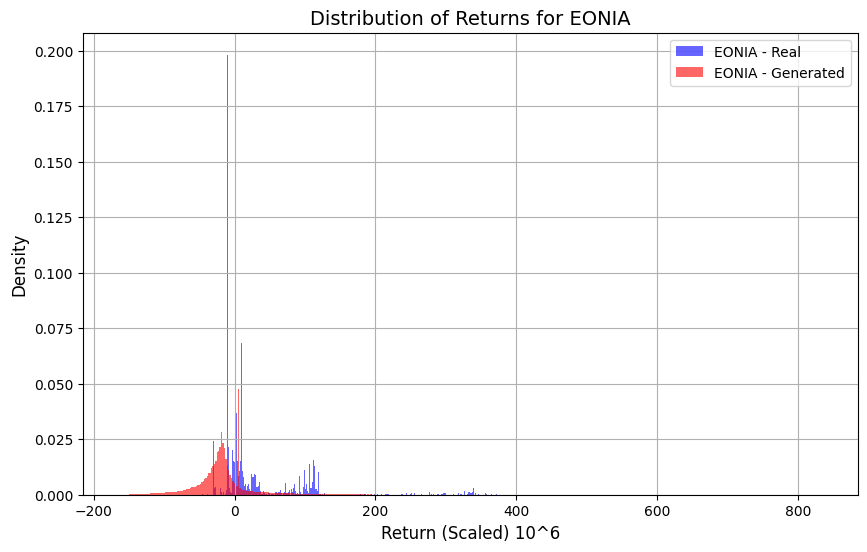

Variance of Real Data: 0.000000
Variance of Generated Data: 0.000000
⚠️ Warning: Possible Mode Collapse - Low Variance in Generated Data


Mean Pairwise Distance (Real): 0.001171
Mean Pairwise Distance (Generated): 0.000170
⚠️ Warning: Potential Mode Collapse - Samples are too similar


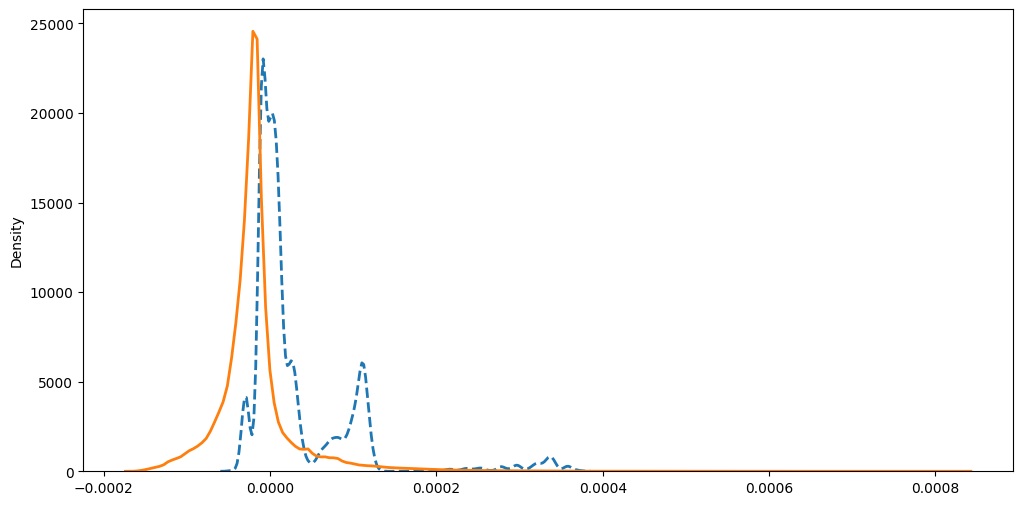

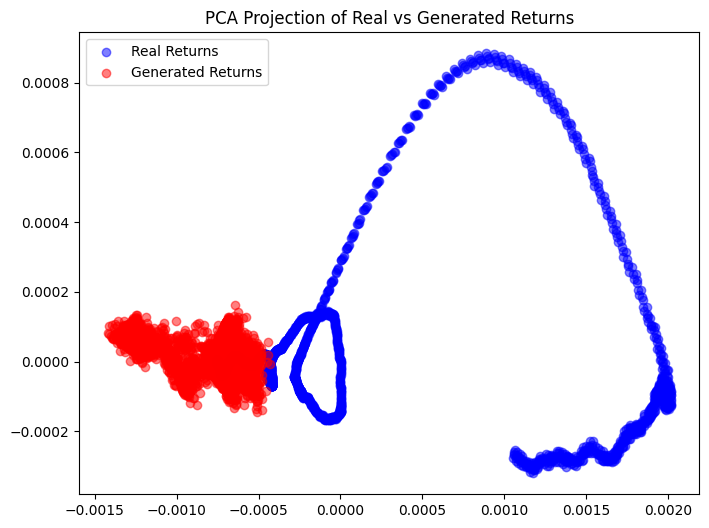

C:\Users\nicka\AppData\Local\Temp\ipykernel_19292\3665352069.py:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Assets', fontsize=12)


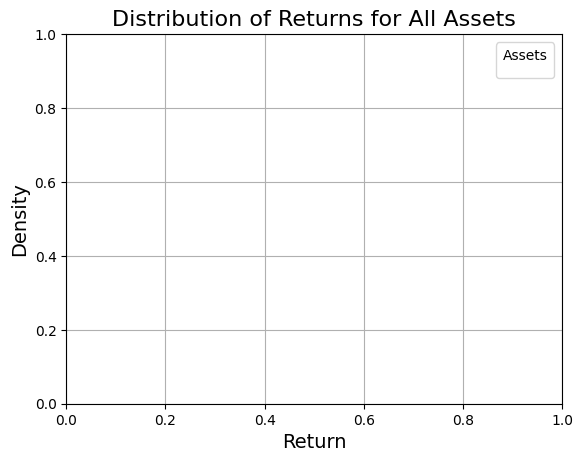

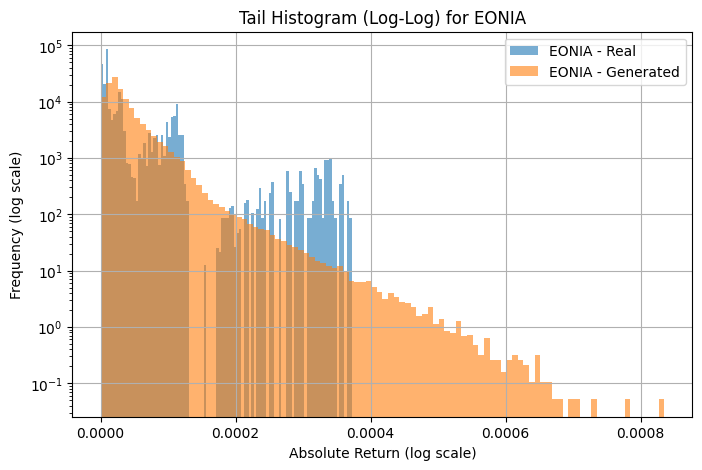

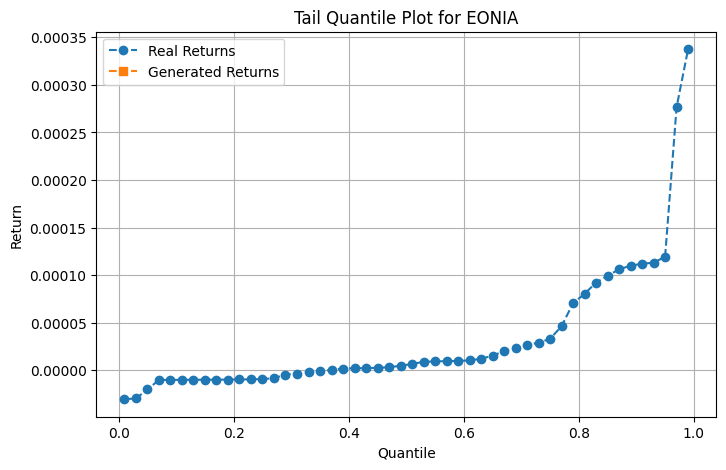

In [9]:
precomputed_rolling_returns = {asset: create_rolling_empirical(returns_df[asset].values) for asset in returns_df.columns}

# Call functions using precomputed returns
plot_histogram_distributions(returns_df, precomputed_rolling_returns)
plot_distributions_with_mode_collapse_check(returns_df, precomputed_rolling_returns)
extreme_value_analysis(returns_df, precomputed_rolling_returns)